# DMART Sales Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
import calendar
import datetime

In [2]:
#Importing dataset
ds = pd.read_csv("DT-Mart.csv")

### Understanding And Analysis of Dataset :

In [3]:
ds.shape

(6428, 18)

In [4]:
ds.head(5)

Order Date Order Priority  Ship Type       City      State     Country  \
0   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1   1/2/2015       Moderate  Named Day  Yingcheng      Hubei       China   
2   1/2/2015       Moderate  Named Day  Chongqing  Chongqing       China   
3   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category        Price  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   1205.000000   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts    528.235294   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts    215.686274   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts    528.235294   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts    137.450980   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   
2                    142.098039     145.098039   70.588235            0.0   
3                    318.823529     323.823529  204.411765            0.0   
4                     71.372549      76.372549   61.078431            1.0   

   Sales (shipping price included)  Profit  Quantity  
0                       869.294118     4.0         1  
1                       324.823529     3.0         1  
2                       145.098039     3.0         1  
3                       323.823529     5.0         1  
4                        77.372549     5.0         1

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order Date                       6428 non-null   object 
 1   Order Priority                   6428 non-null   object 
 2   Ship Type                        6428 non-null   object 
 3   City                             6428 non-null   object 
 4   State                            6428 non-null   object 
 5   Country                          6428 non-null   object 
 6   Region                           6428 non-null   object 
 7   Segment                          6428 non-null   object 
 8   Super Category                   6428 non-null   object 
 9   Category                         6428 non-null   object 
 10  Price                            6428 non-null   float64
 11  Operational/ Production Cost     5028 non-null   float64
 12  Selling Price       

In [6]:
ds.duplicated().sum()

15

In [7]:
print(f'Total columns are :{ds.columns} ')

Total columns are :Index(['Order Date', 'Order Priority', 'Ship Type', 'City', 'State', 'Country',
       'Region', 'Segment', 'Super Category', 'Category', 'Price',
       'Operational/ Production Cost', 'Selling Price', 'Discount',
       'Shipping Cost', 'Sales (shipping price included)', 'Profit',
       'Quantity'],
      dtype='object') 


In [8]:
ds.isnull().sum()

Order Date                            0
Order Priority                        0
Ship Type                             0
City                                  0
State                                 0
Country                               0
Region                                0
Segment                               0
Super Category                        0
Category                              0
Price                                 0
Operational/ Production Cost       1400
Selling Price                         0
Discount                              0
Shipping Cost                         0
Sales (shipping price included)       0
Profit                                0
Quantity                              0
dtype: int64

In [9]:
ds.corr()

Price  Operational/ Production Cost  \
Price                            1.000000                      0.968439   
Operational/ Production Cost     0.968439                      1.000000   
Selling Price                    0.994740                      0.970469   
Discount                         0.137775                      0.055950   
Shipping Cost                    0.817612                      0.804798   
Sales (shipping price included)  0.991675                      0.968471   
Profit                           0.739390                      0.567572   
Quantity                         0.081689                      0.089103   

                                 Selling Price  Discount  Shipping Cost  \
Price                                 0.994740  0.137775       0.817612   
Operational/ Production Cost          0.970469  0.055950       0.804798   
Selling Price                         1.000000  0.035596       0.832765   
Discount                              0.035596  1.000000      -0.075453   
Shipping Cost                         0.832765 -0.075453       1.000000   
Sales (shipping price included)       0.998110  0.023970       0.865208   
Profit                                0.751985 -0.057525       0.629674   
Quantity                              0.083726 -0.012592       0.084744   

                                 Sales (shipping price included)    Profit  \
Price                                                   0.991675  0.739390   
Operational/ Production Cost                            0.968471  0.567572   
Selling Price                                           0.998110  0.751985   
Discount                                                0.023970 -0.057525   
Shipping Cost                                           0.865208  0.629674   
Sales (shipping price included)                         1.000000  0.750995   
Profit                                                  0.750995  1.000000   
Quantity                                                0.085229  0.036015   

                                 Quantity  
Price                            0.081689  
Operational/ Production Cost     0.089103  
Selling Price                    0.083726  
Discount                        -0.012592  
Shipping Cost                    0.084744  
Sales (shipping price included)  0.085229  
Profit                           0.036015  
Quantity                         1.000000

In [10]:
cols = ds.columns.to_list()
num_cols= ds._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['Price', 'Operational/ Production Cost', 'Selling Price', 'Discount', 'Shipping Cost', 'Sales (shipping price included)', 'Profit', 'Quantity']

Categorical Columns
['Order Priority', 'City', 'Category', 'Country', 'Segment', 'Order Date', 'State', 'Super Category', 'Region', 'Ship Type']


In [11]:
#there are 8 numerical coumns and 10 categorical column

## Problem Statement:

### 1. Perform Basic EDA

#### a. Boxplot – All Numeric Variables 

In [12]:
categorical_cols = ds.select_dtypes(include = ['object'])
categorical_cols.head()

Order Date Order Priority  Ship Type       City      State     Country  \
0   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1   1/2/2015       Moderate  Named Day  Yingcheng      Hubei       China   
2   1/2/2015       Moderate  Named Day  Chongqing  Chongqing       China   
3   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category  
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts

<AxesSubplot:xlabel='Shipping Cost', ylabel='Profit'>

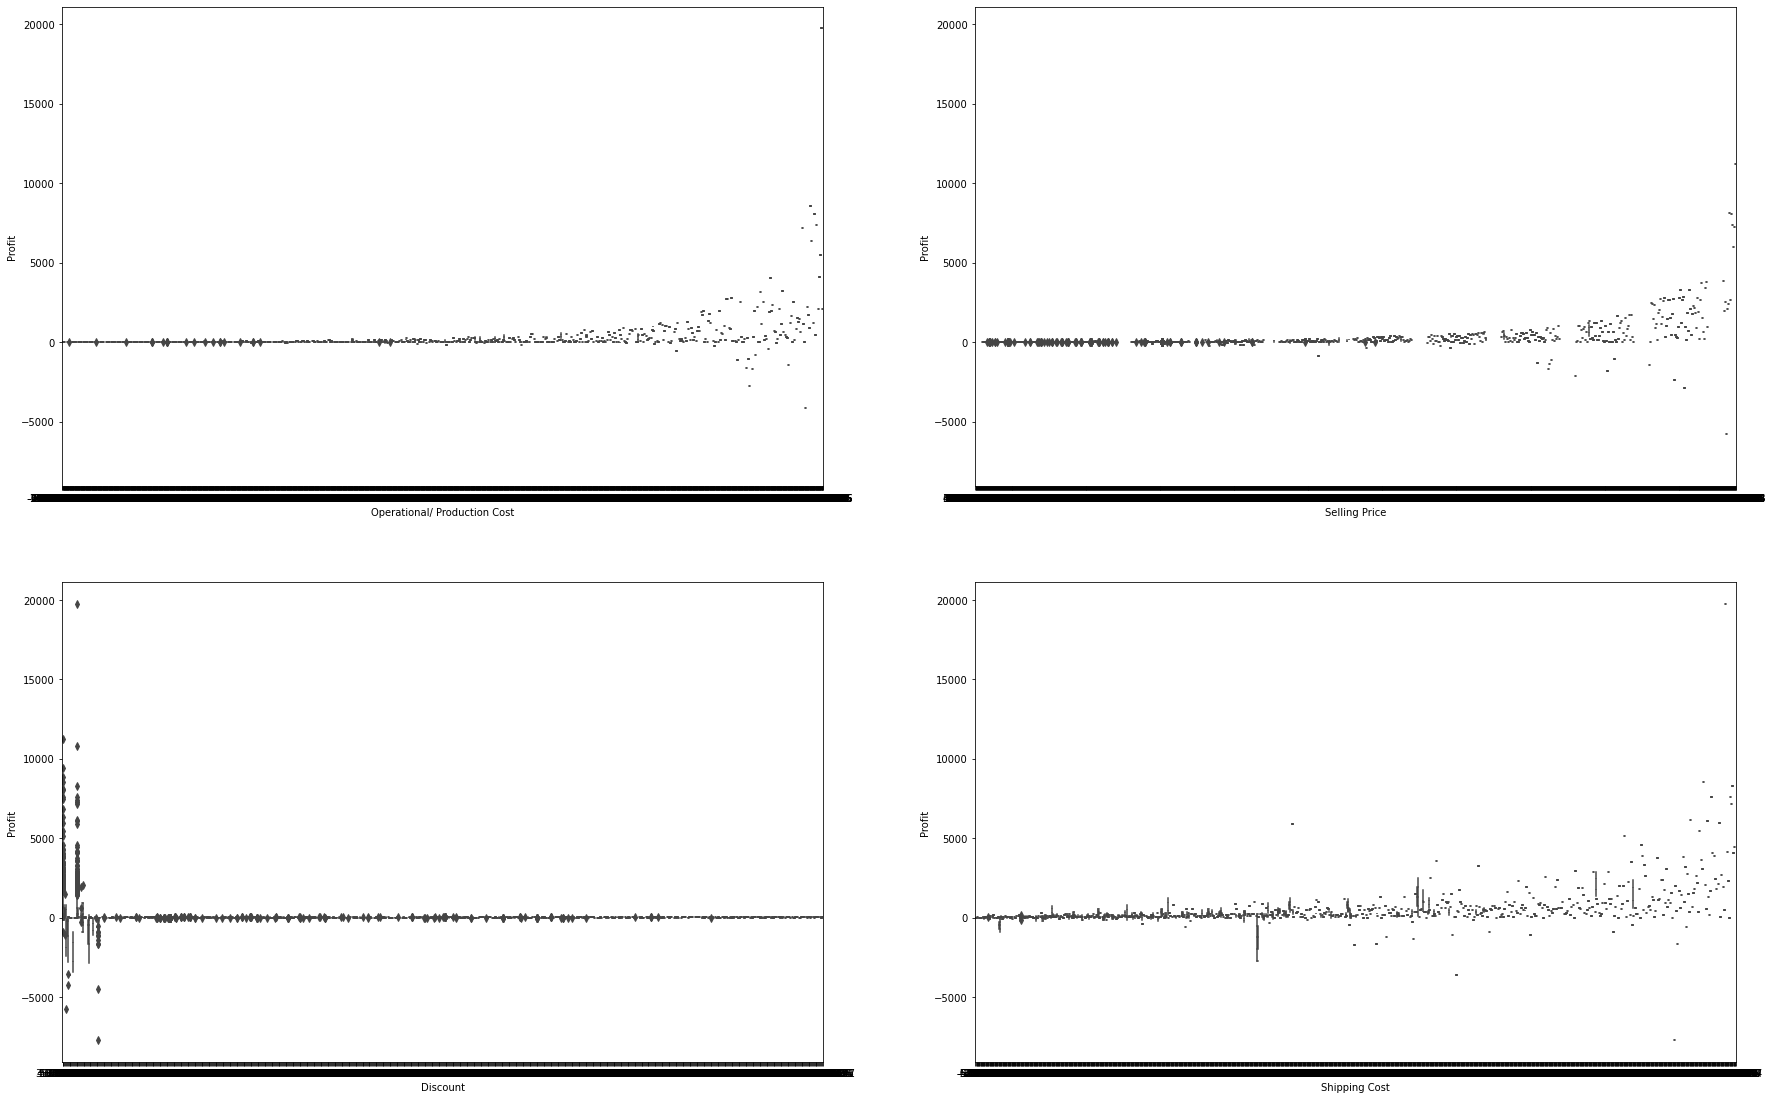

In [13]:
plt.figure(figsize = (30,30))
plt.subplot(3,2,1)
sns.boxplot(x = 'Operational/ Production Cost', y = 'Profit', data = ds)
plt.subplot(3,2,2)
sns.boxplot(x = 'Selling Price', y = 'Profit', data = ds)
plt.subplot(3,2,3)
sns.boxplot(x = 'Discount', y = 'Profit', data = ds)
plt.subplot(3,2,4)
sns.boxplot(x = 'Shipping Cost', y = 'Profit', data = ds)


In [14]:
ds['Super Category'].value_counts()

Clothing                              1400
Jewellery                             1120
Office Supplies                        845
Mobiles & Accessories                  574
Computers                              411
Technology                             372
Furniture                              356
Home Furnishing                        245
Baby Care                              204
Home Decor & Festive Needs             182
Automotive                             127
Footwear                                94
Kitchen & Dining                        80
Beauty and Personal Care                63
Pens & Stationery                       63
Cameras & Accessories                   61
Bags, Wallets & Belts                   44
Tools & Hardware                        36
Home Improvement                        36
Toys & School Supplies                  31
Sports & Fitness                        23
Home & Kitchen                          11
Furniture                               11
Health & Pe

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

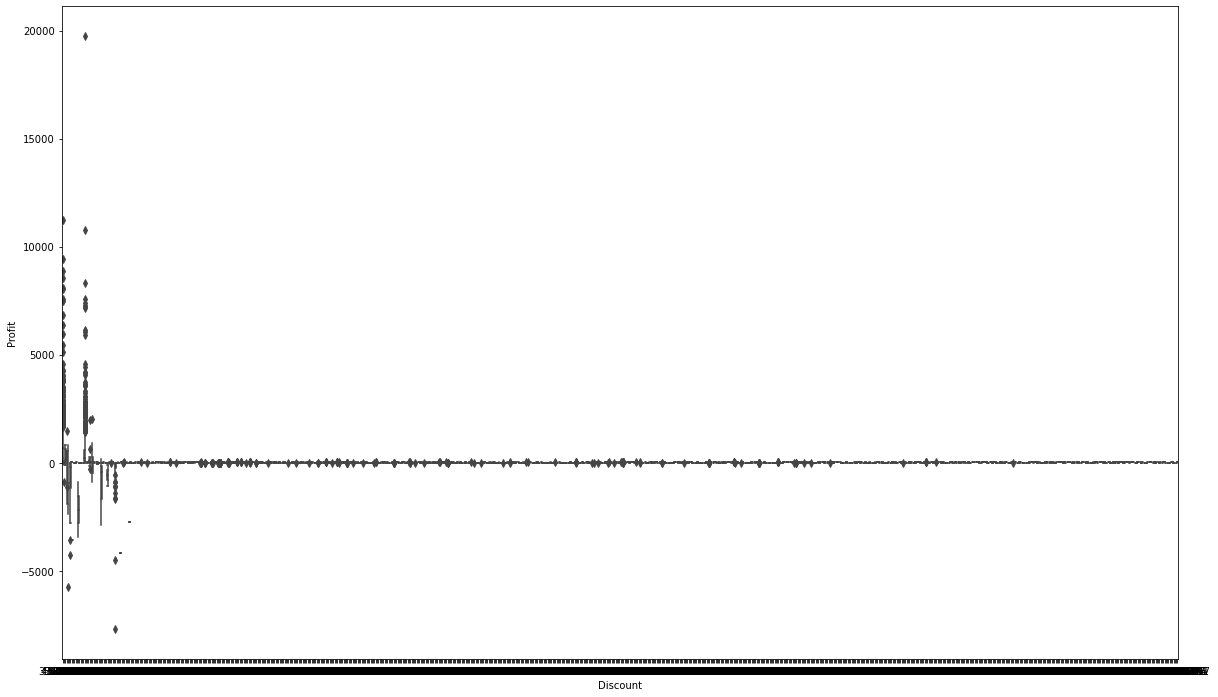

In [15]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'Discount', y = 'Profit', data = ds)

#### b. Histogram – All Numeric Variables

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Operational/ Production Cost'}>,
        <AxesSubplot:title={'center':'Selling Price'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Shipping Cost'}>,
        <AxesSubplot:title={'center':'Sales (shipping price included)'}>],
       [<AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Quantity'}>, <AxesSubplot:>]],
      dtype=object)

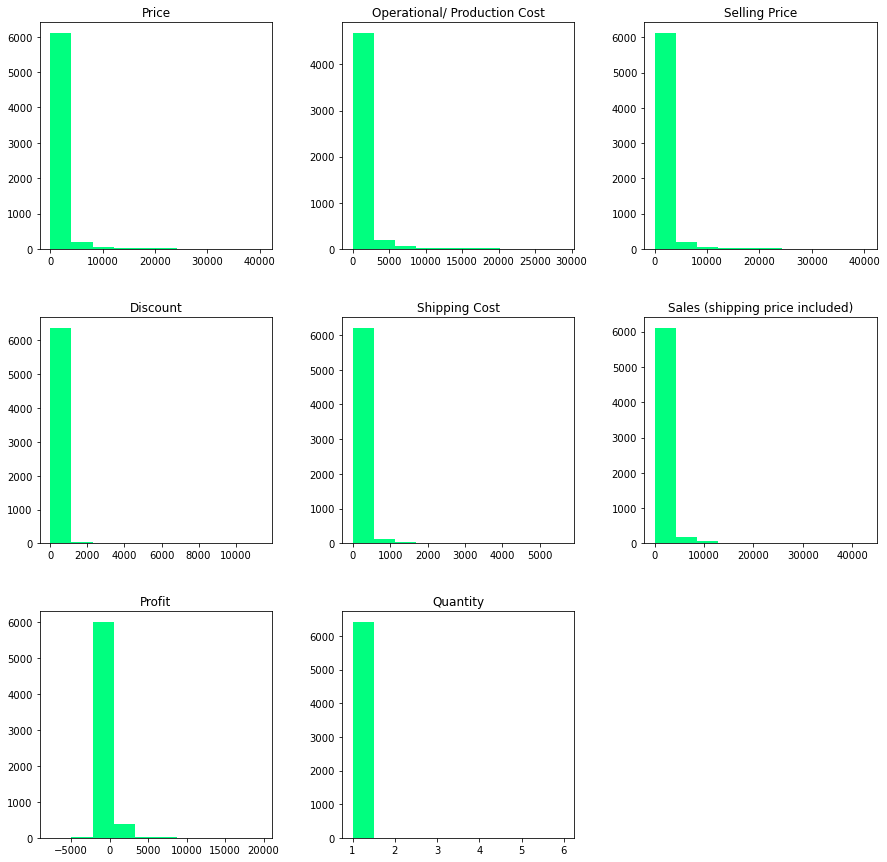

In [16]:
ds.hist(figsize=(15, 15),grid=False,color = "springgreen")

#### c. Distribution Plot – All Numeric Variables 

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

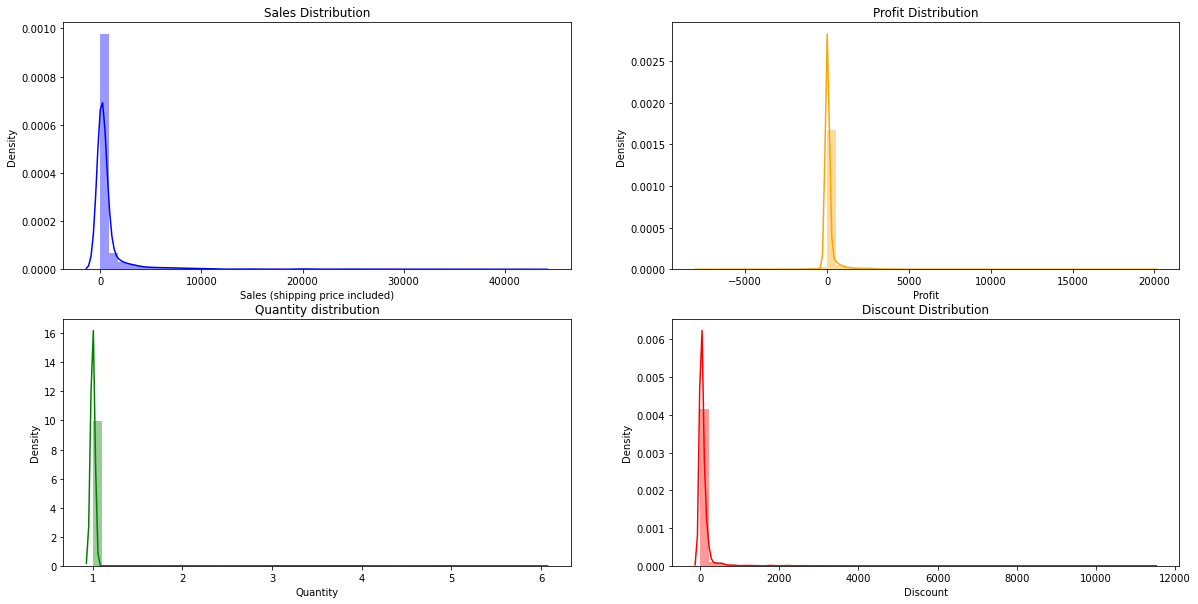

In [17]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
sns.distplot(ds['Sales (shipping price included)'], color = 'blue',  ax = axs[0][0])
sns.distplot(ds['Profit'], color = 'orange',  ax = axs[0][1])
sns.distplot(ds['Quantity'], color = 'green',  ax = axs[1][0])
sns.distplot(ds['Discount'], color = 'red',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 12)
axs[0][1].set_title('Profit Distribution', fontsize = 12)
axs[1][0].set_title('Quantity distribution', fontsize = 12)
axs[1][1].set_title('Discount Distribution', fontsize = 12)
plt.show()

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

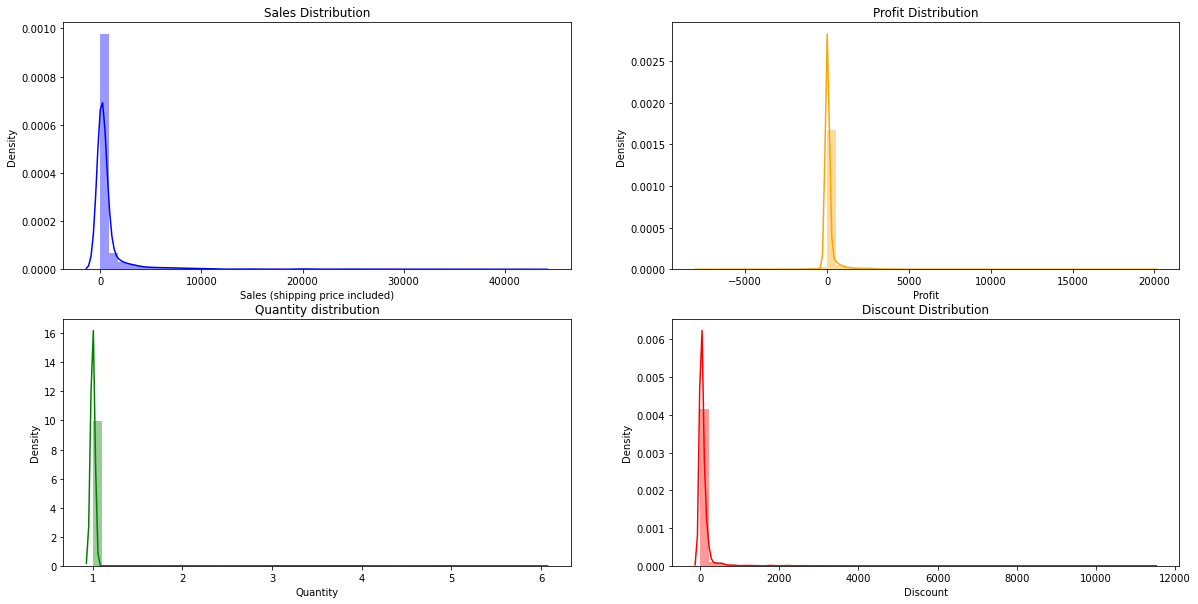

In [18]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
sns.distplot(ds['Sales (shipping price included)'], color = 'blue',  ax = axs[0][0])
sns.distplot(ds['Profit'], color = 'orange',  ax = axs[0][1])
sns.distplot(ds['Quantity'], color = 'green',  ax = axs[1][0])
sns.distplot(ds['Discount'], color = 'red',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 12)
axs[0][1].set_title('Profit Distribution', fontsize = 12)
axs[1][0].set_title('Quantity distribution', fontsize = 12)
axs[1][1].set_title('Discount Distribution', fontsize = 12)
plt.show()

#### d. Aggregation for all numerical Columns 

In [19]:
ds.describe()

Price  Operational/ Production Cost  Selling Price  \
count   6428.000000                   5028.000000    6428.000000   
mean     876.516801                    801.573313     795.291310   
std     2412.198794                   2149.972447    2390.710076   
min        7.058824                    -13.470588       3.529412   
25%      117.549020                     72.196078      78.431373   
50%      197.671640                    161.274510     137.880041   
75%      479.901961                    467.496900     367.615065   
max    40395.405400                  28953.823600   40388.395400   

           Discount  Shipping Cost  Sales (shipping price included)  \
count   6428.000000    6428.000000                      6428.000000   
mean      81.225491      70.878435                       865.233384   
std      247.240296     293.157801                      2639.154865   
min        0.000000      -6.238900                         4.529412   
25%       10.515000       0.000000                        80.333333   
50%       36.911765       1.000000                       140.441176   
75%       71.568627       2.000000                       391.028056   
max    11401.176470    5639.825400                     42854.863900   

             Profit     Quantity  
count   6428.000000  6428.000000  
mean     137.115094     1.005445  
std      696.420860     0.137103  
min    -7698.942800     1.000000  
25%        3.000000     1.000000  
50%       14.000000     1.000000  
75%       18.000000     1.000000  
max    19747.099900     6.000000

#### e. Unique Values across all columns 

In [20]:
pd.Series({col:ds[col].unique() for col in ds})

Order Date                         [1/2/2015, 1/6/2015, 1/7/2015, 1/8/2015, 1/9/2...
Order Priority                                        [Moderate, Low, High, Extreme]
Ship Type                          [Named Day, Standard Delivery, Next Day, Same ...
City                               [Dhaka, Yingcheng, Chongqing, Jaipur, Yuci, Sh...
State                              [Dhaka, Hubei, Chongqing, Rajasthan, Shanxi, S...
Country                            [Bangladesh, China, India, Singapore, Myanmar ...
Region                                    [Central Asia, North Asia, Southeast Asia]
Segment                                              [Retail, Corporate, Whole Sale]
Super Category                     [Baby Care , Jewellery , Automotive , Pet Supp...
Category                           [ Baby & Kids Gifts ,  Bangles, Bracelets & Ar...
Price                              [1205.0, 528.2352941, 215.6862745, 137.4509804...
Operational/ Production Cost       [866.2941176, 320.8235294, 142

#### f. Duplicate values across all columns

In [21]:
ds[ds.duplicated(keep=False)]

Order Date Order Priority          Ship Type           City  \
105     2/2/2015           High           Next Day        Yunyang   
109     2/2/2015           High           Next Day        Yunyang   
795    6/10/2015            Low  Standard Delivery          Delhi   
797    6/10/2015            Low  Standard Delivery          Delhi   
2087   7/12/2016           High           Next Day        Wuchuan   
2090   7/12/2016           High           Next Day        Wuchuan   
2091   7/12/2016           High           Next Day        Wuchuan   
2092   7/12/2016           High           Next Day        Wuchuan   
2094   7/12/2016       Moderate          Named Day         Foshan   
2095   7/12/2016       Moderate          Named Day         Foshan   
2871    2/8/2017       Moderate          Named Day           Pune   
2872    2/8/2017       Moderate          Named Day           Pune   
3068    4/5/2017           High           Next Day         Xiamen   
3070    4/5/2017           High           Next Day         Xiamen   
3396   6/12/2017            Low  Standard Delivery      Changchun   
3397   6/12/2017            Low  Standard Delivery      Changchun   
3595   7/10/2017       Moderate          Named Day         Kanpur   
3596   7/10/2017       Moderate          Named Day         Kanpur   
3662    8/5/2017           High           Next Day        Huizhou   
3668    8/5/2017           High           Next Day        Huizhou   
4224   12/8/2017            Low  Standard Delivery      Mangalore   
4225   12/8/2017            Low  Standard Delivery      Mangalore   
5403   6/11/2018            Low  Standard Delivery         Jhansi   
5404   6/11/2018            Low  Standard Delivery         Jhansi   
6337  12/11/2018            Low  Standard Delivery  Visakhapatnam   
6338  12/11/2018            Low  Standard Delivery  Visakhapatnam   
6339  12/11/2018            Low  Standard Delivery  Visakhapatnam   
6414  12/12/2018            Low  Standard Delivery       Hangzhou   
6415  12/12/2018            Low  Standard Delivery       Hangzhou   

               State Country        Region Segment          Super Category  \
105            Henan   China    North Asia  Retail              Baby Care    
109            Henan   China    North Asia  Retail              Baby Care    
795            Delhi   India  Central Asia  Retail  Mobiles & Accessories    
797            Delhi   India  Central Asia  Retail  Mobiles & Accessories    
2087       Guangdong   China    North Asia  Retail               Clothing    
2090       Guangdong   China    North Asia  Retail               Clothing    
2091       Guangdong   China    North Asia  Retail               Clothing    
2092       Guangdong   China    North Asia  Retail               Clothing    
2094       Guangdong   China    North Asia  Retail               Clothing    
2095       Guangdong   China    North Asia  Retail               Clothing    
2871     Maharashtra   India  Central Asia  Retail  Mobiles & Accessories    
2872     Maharashtra   India  Central Asia  Retail  Mobiles & Accessories    
3068          Fujian   China    North Asia  Retail  Mobiles & Accessories    
3070          Fujian   China    North Asia  Retail  Mobiles & Accessories    
3396           Jilin   China    North Asia  Retail               Clothing    
3397           Jilin   China    North Asia  Retail               Clothing    
3595   Uttar Pradesh   India  Central Asia  Retail  Mobiles & Accessories    
3596   Uttar Pradesh   India  Central Asia  Retail  Mobiles & Accessories    
3662       Guangdong   China    North Asia  Retail  Mobiles & Accessories    
3668       Guangdong   China    North Asia  Retail  Mobiles & Accessories    
4224       Karnataka   India  Central Asia  Retail               Clothing    
4225       Karnataka   India  Central Asia  Retail               Clothing    
5403   Uttar Pradesh   India  Central Asia  Retail               Clothing    
5404   Uttar Pradesh   India  Central Asia  Retail             

#### g. Correlation – Heatmap - All Numeric Variables 

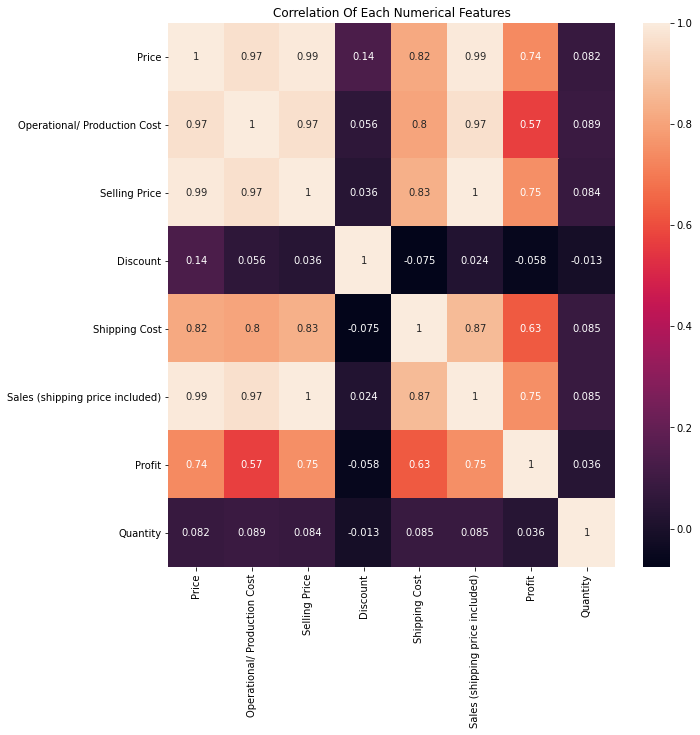

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(), annot = True)
plt.title("Correlation Of Each Numerical Features")
plt.show()

#### h. Regression Plot - All Numeric Variables 

In [23]:
print('Numerical Columns')
print(num_cols)

Numerical Columns
['Price', 'Operational/ Production Cost', 'Selling Price', 'Discount', 'Shipping Cost', 'Sales (shipping price included)', 'Profit', 'Quantity']


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


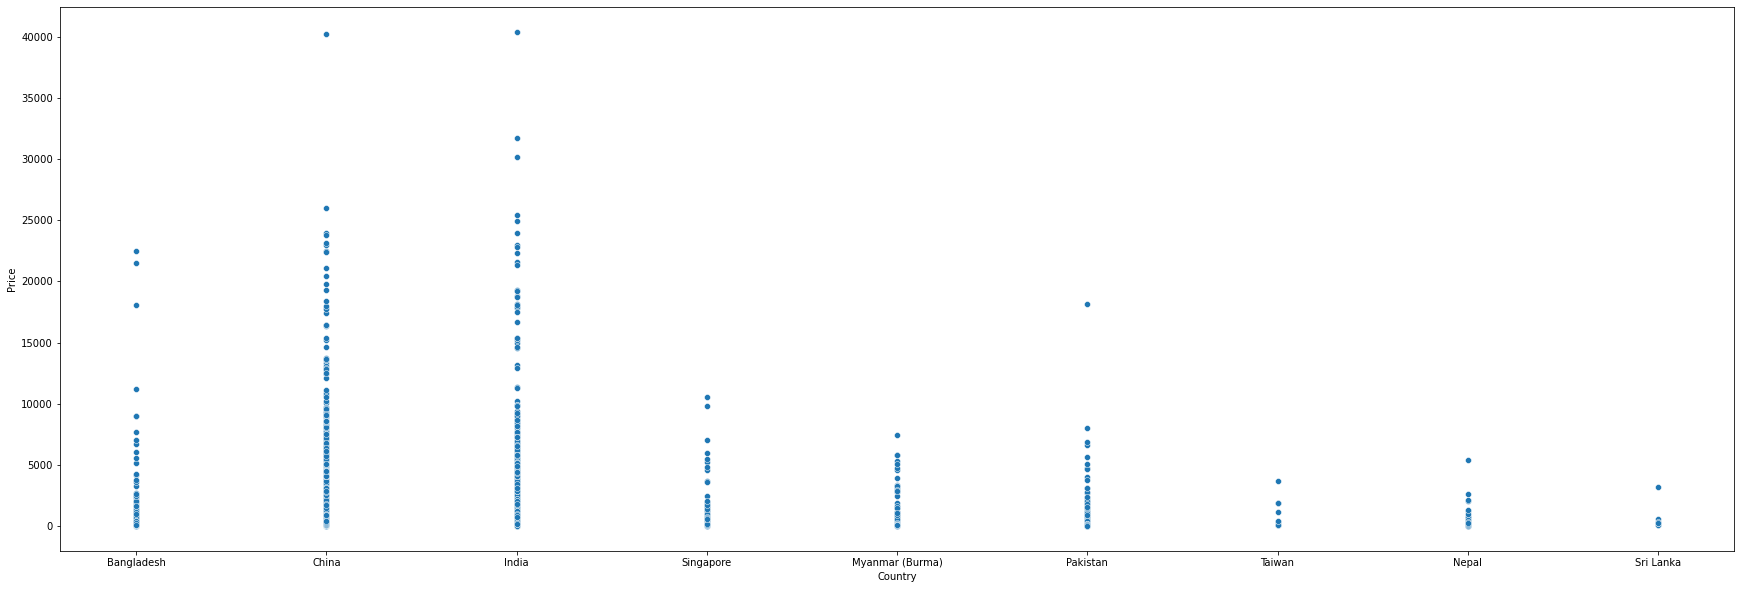

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


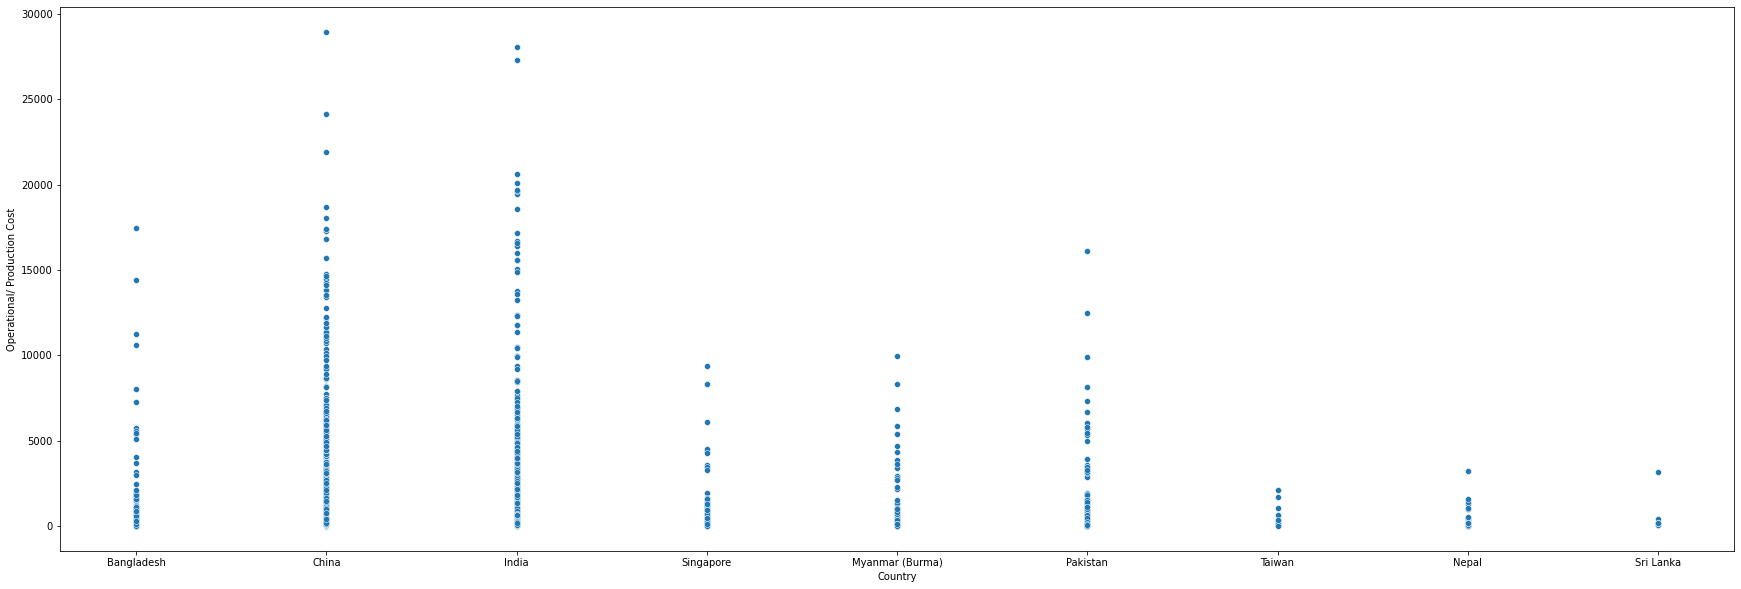

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


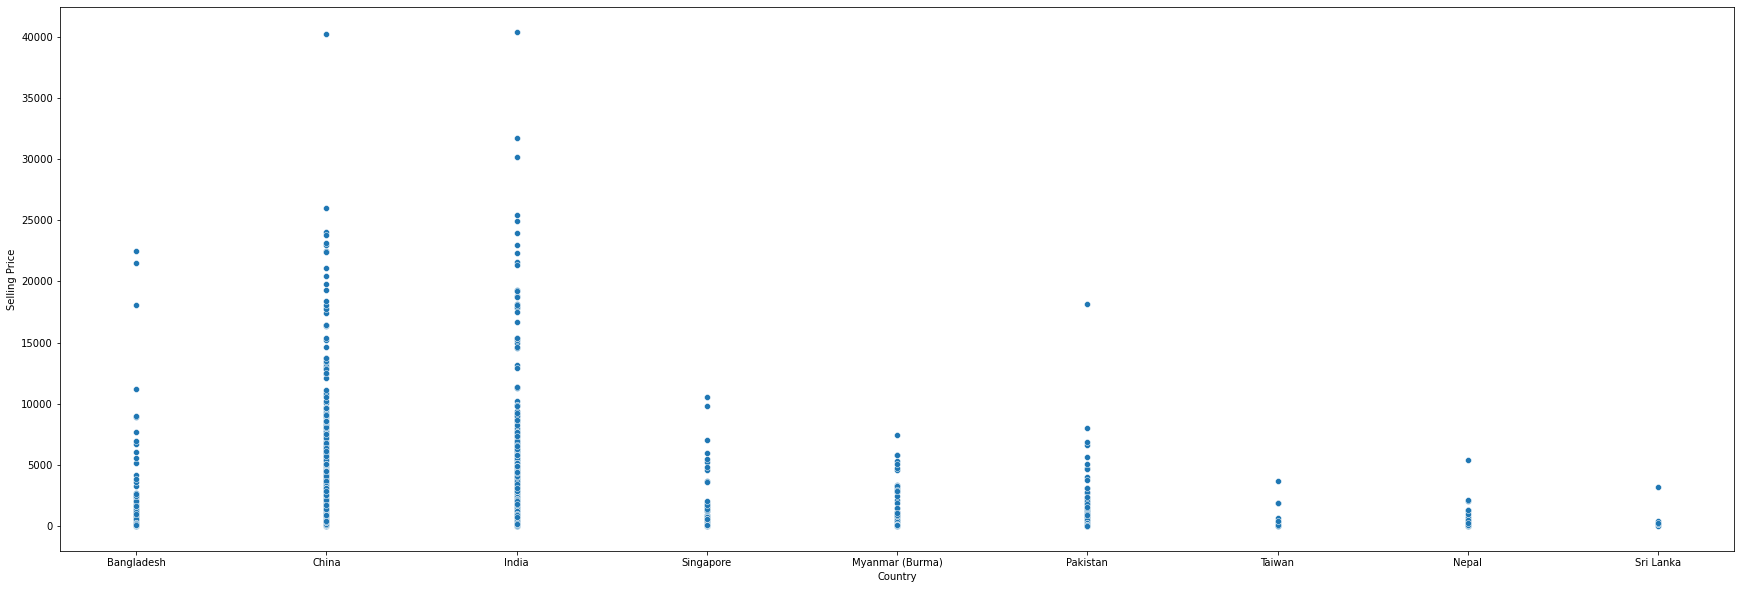

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


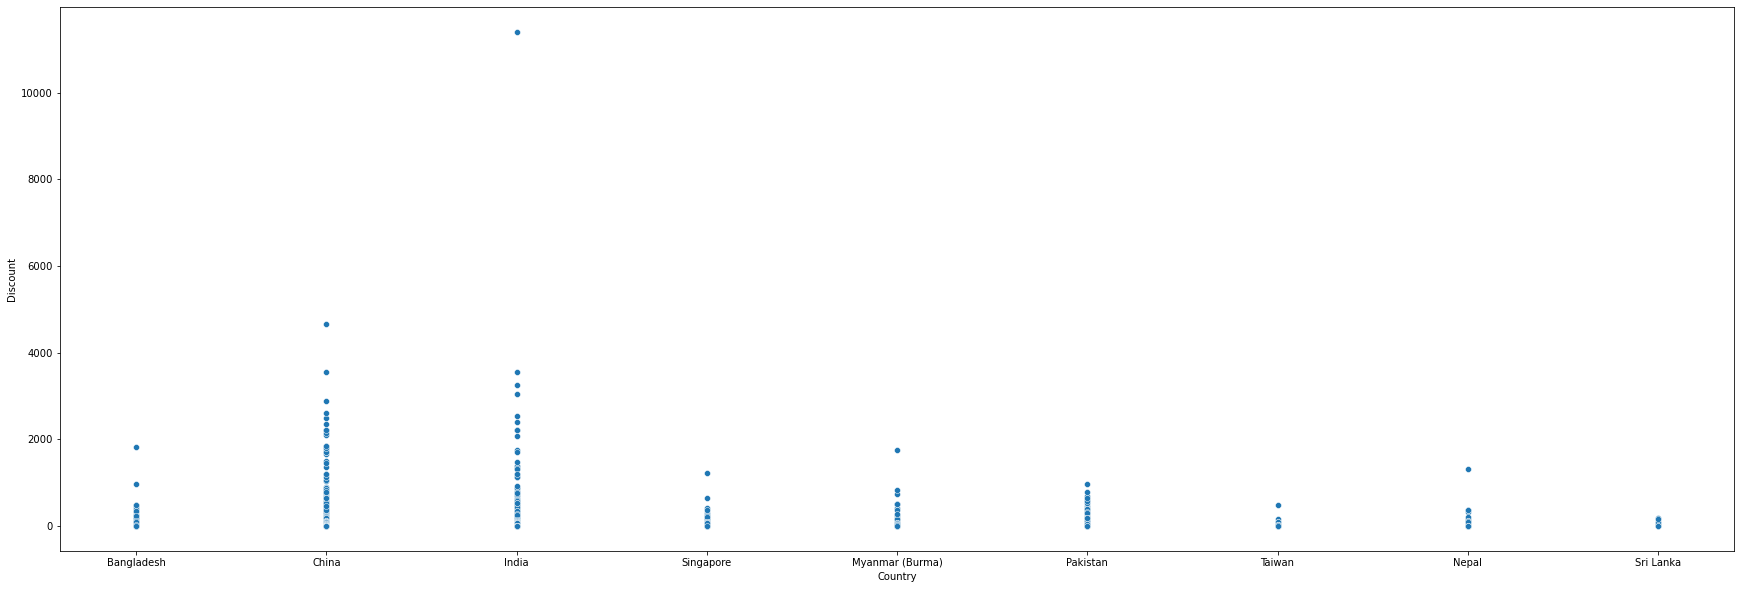

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


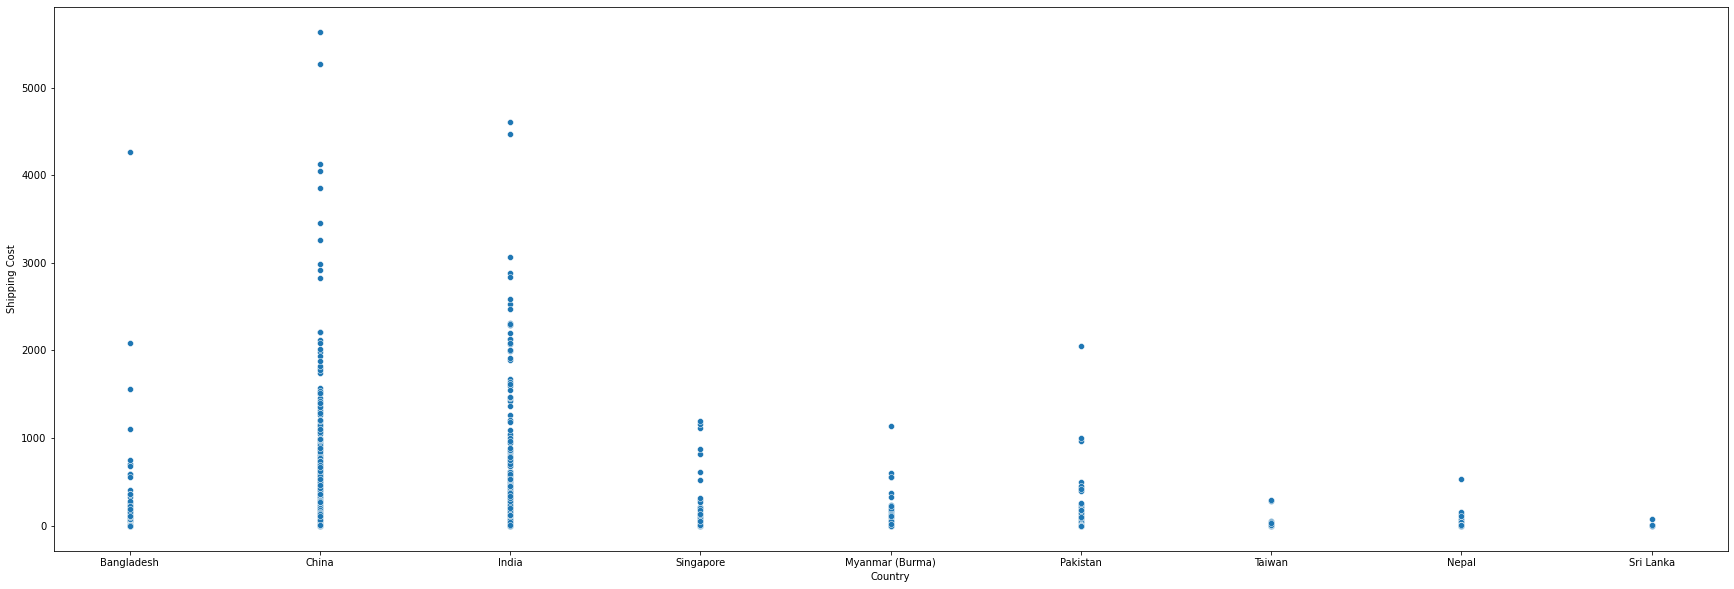

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


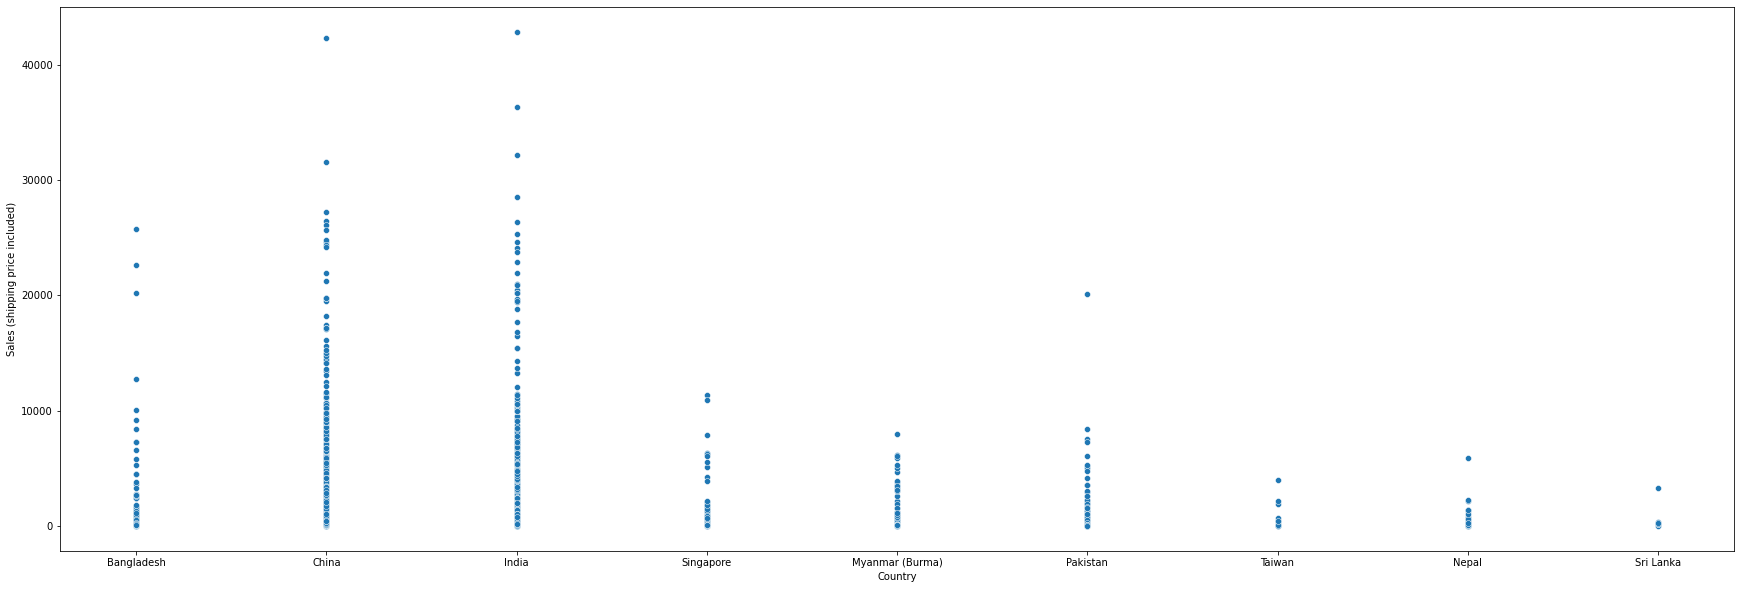

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


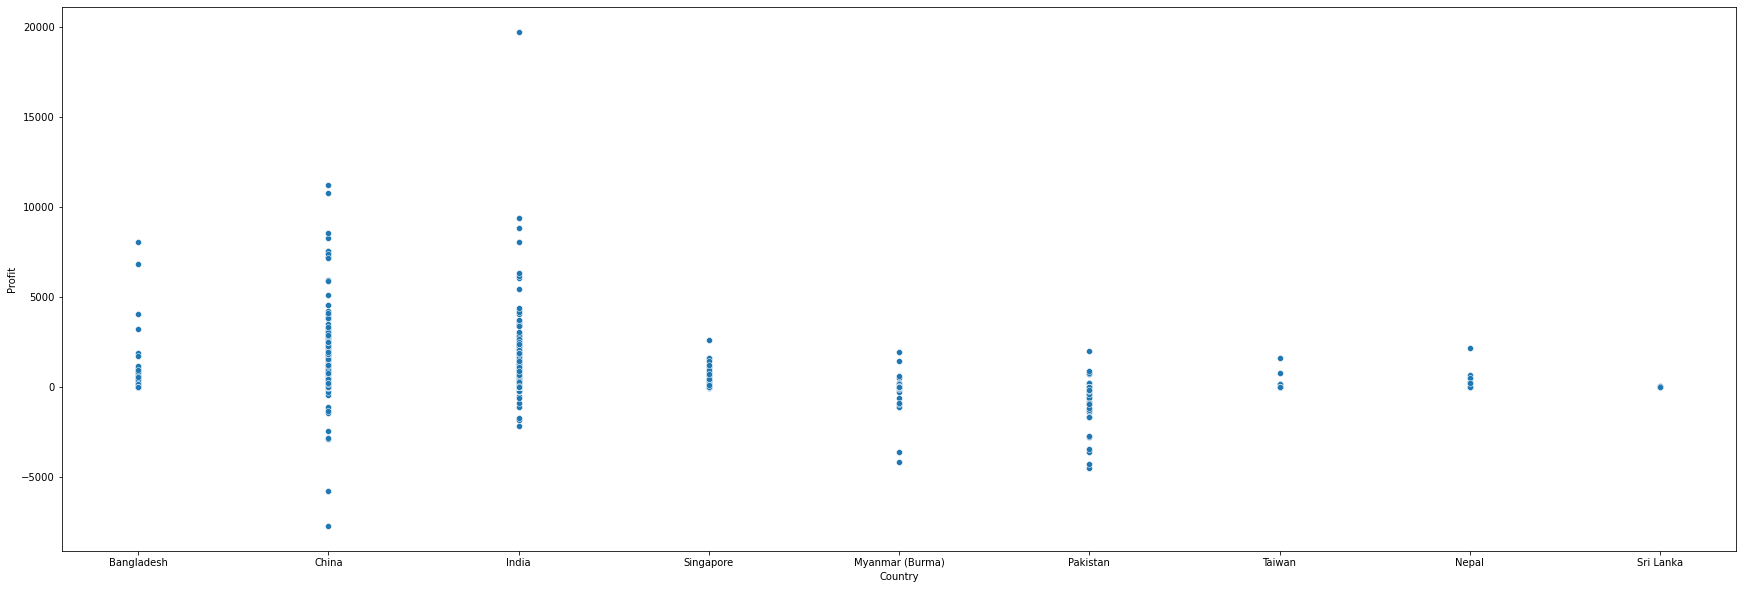

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


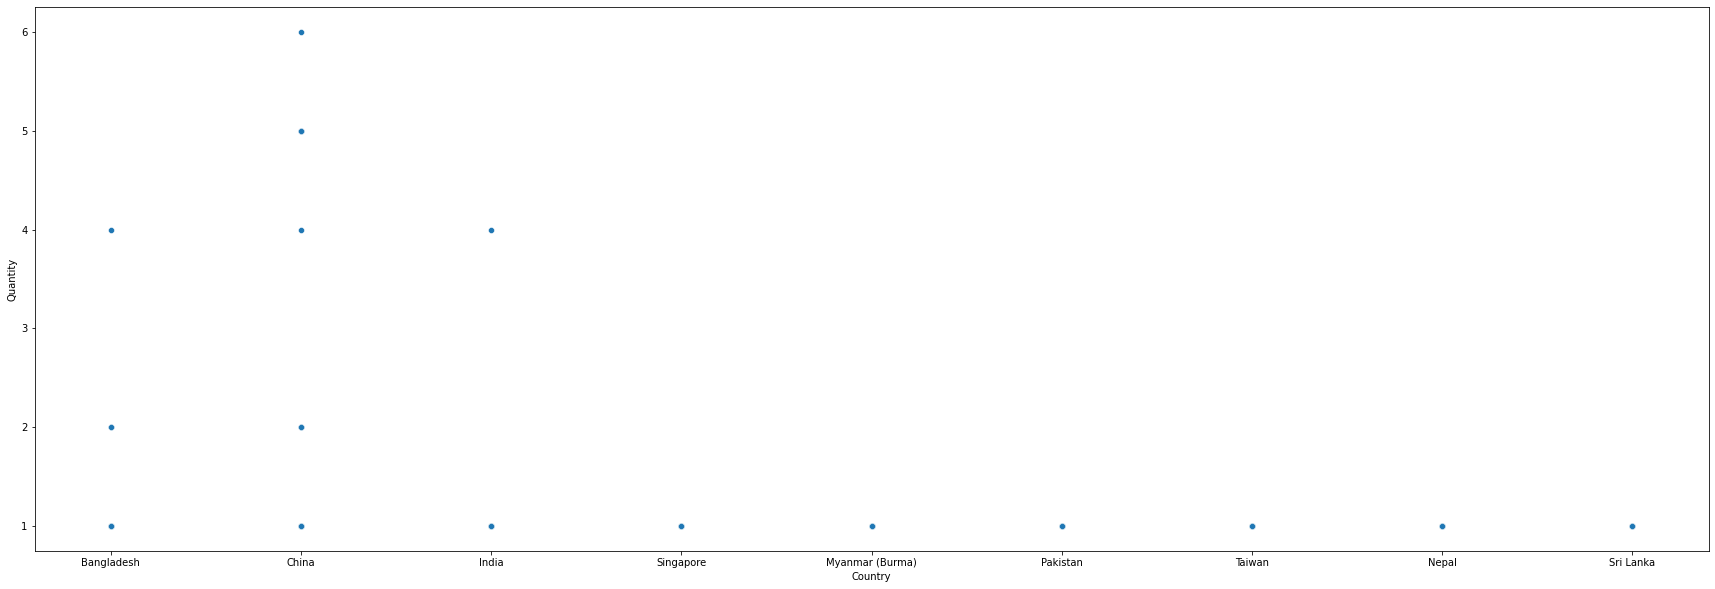

Visualizing Numerical Features with Country


In [24]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Country'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Country")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


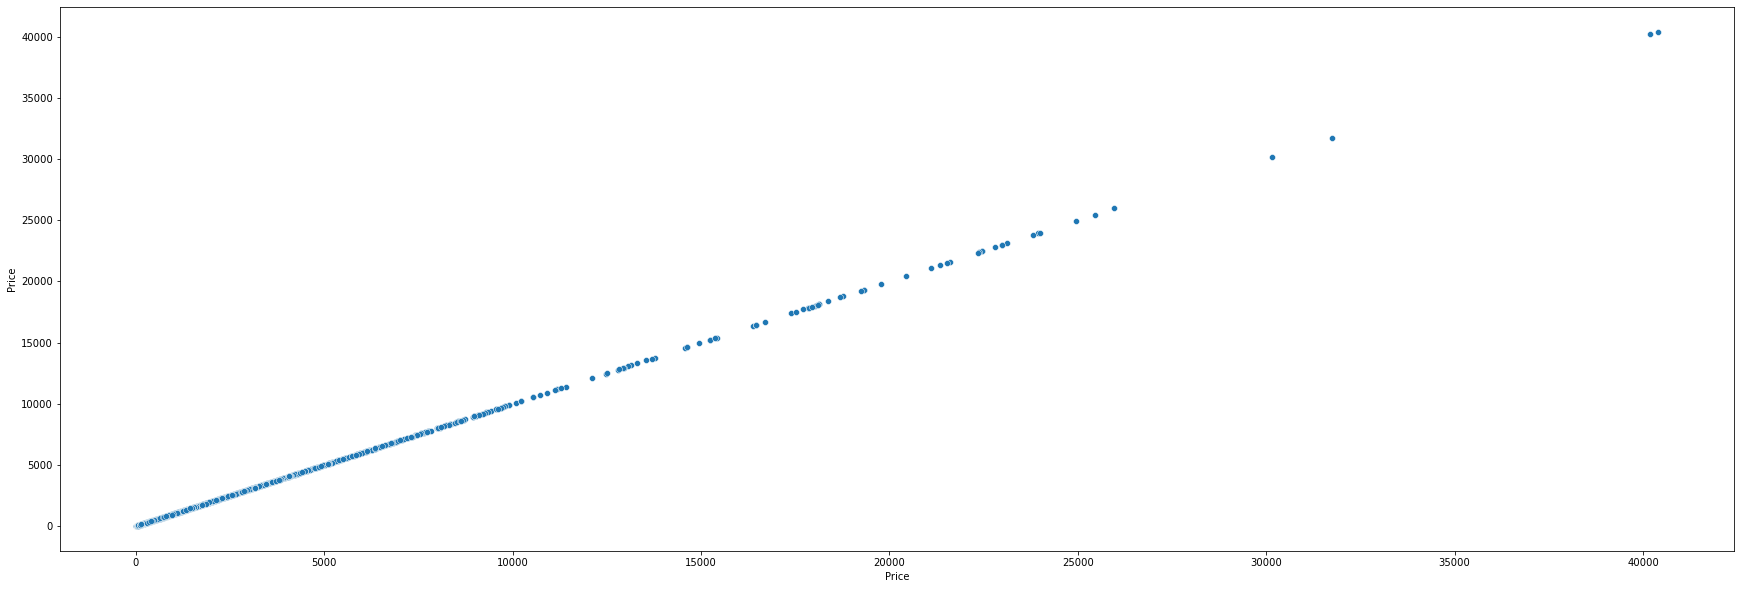

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


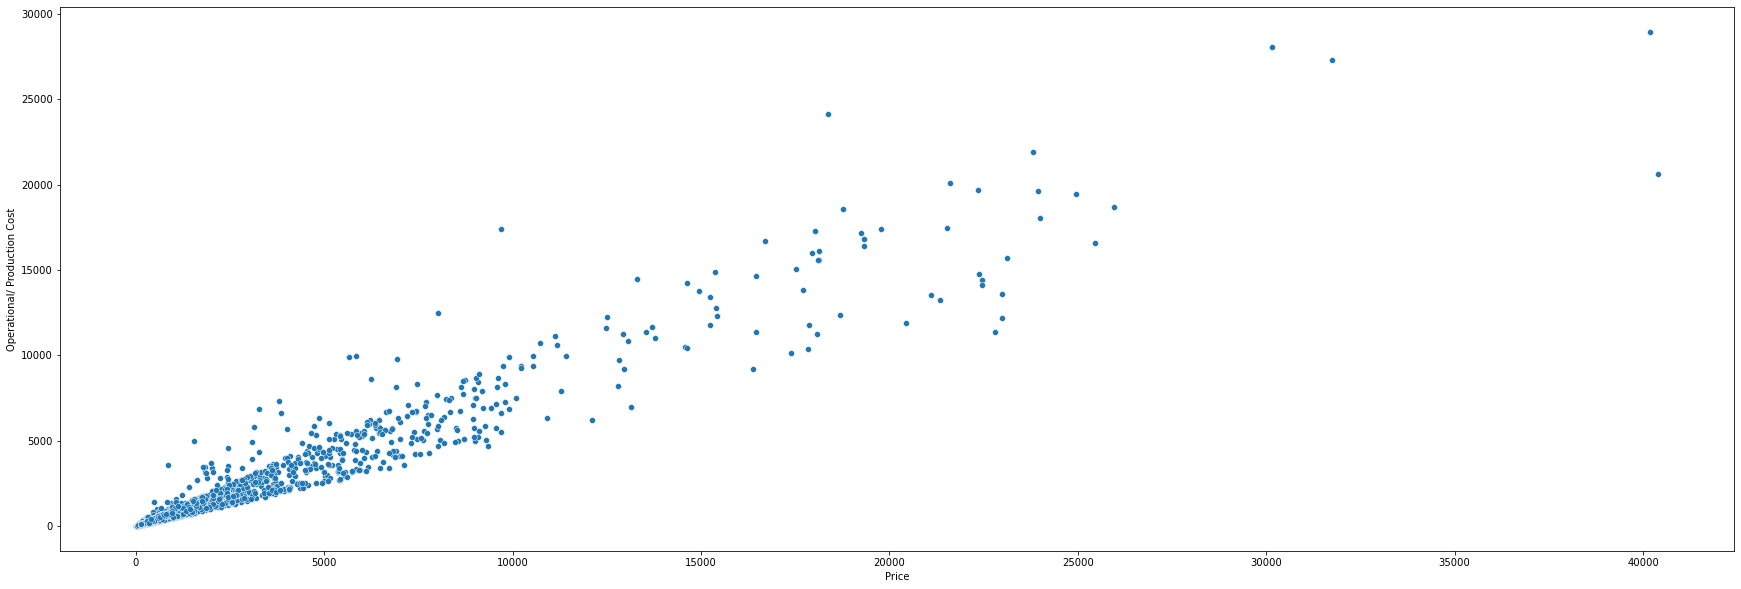

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


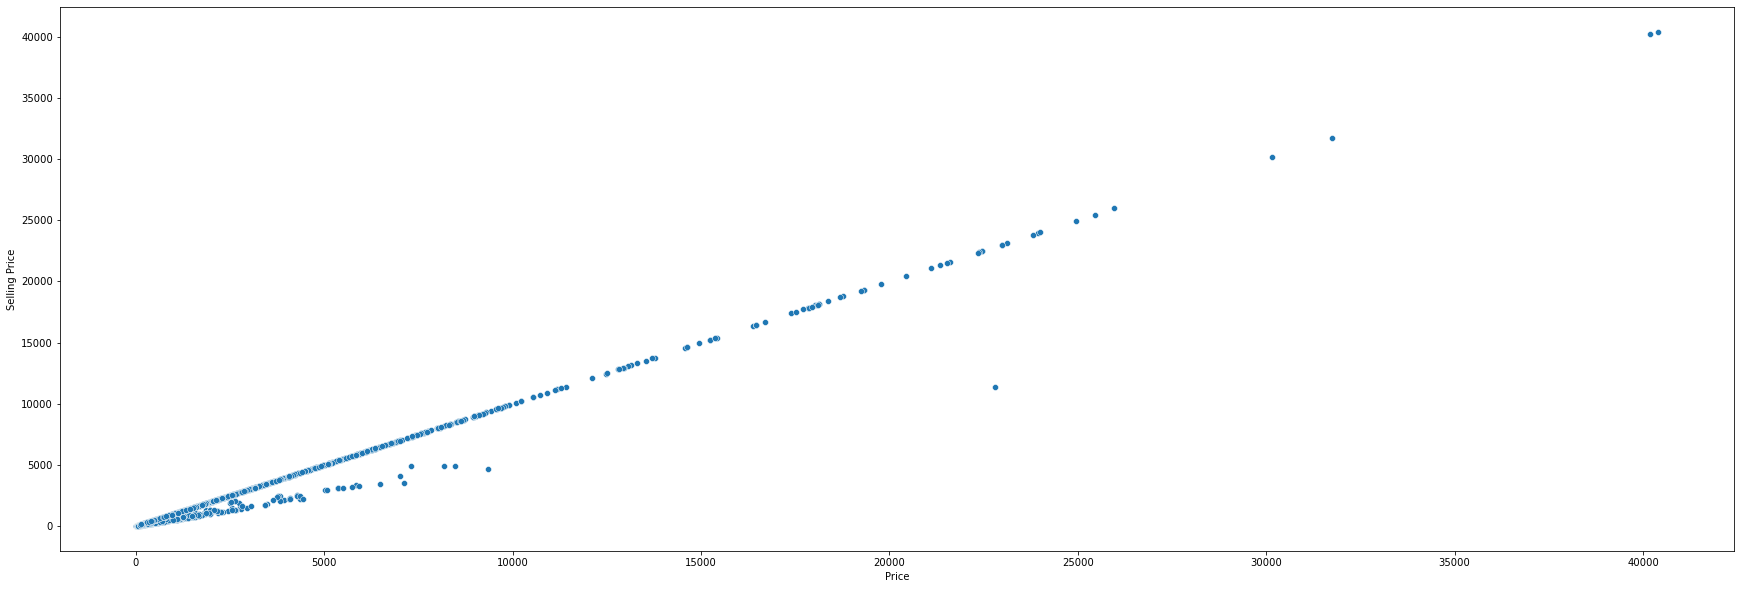

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


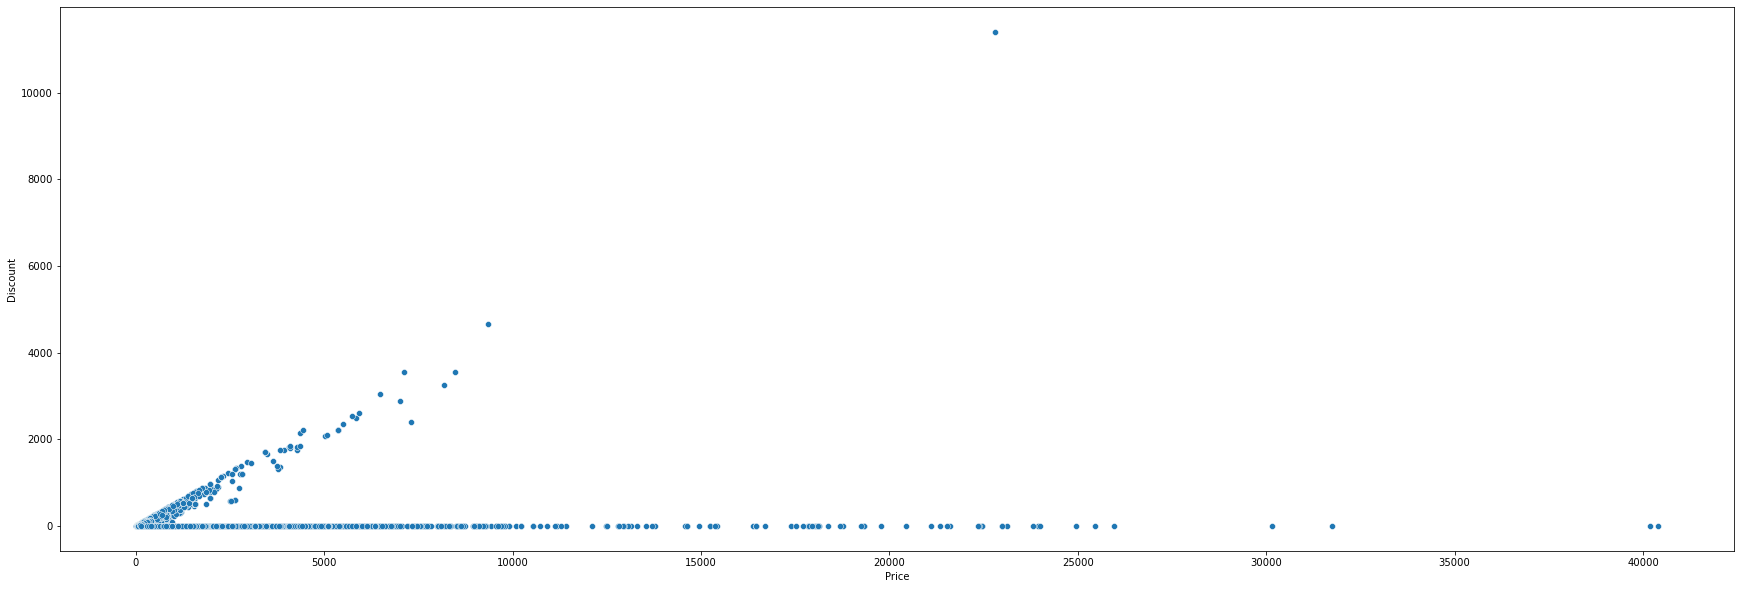

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


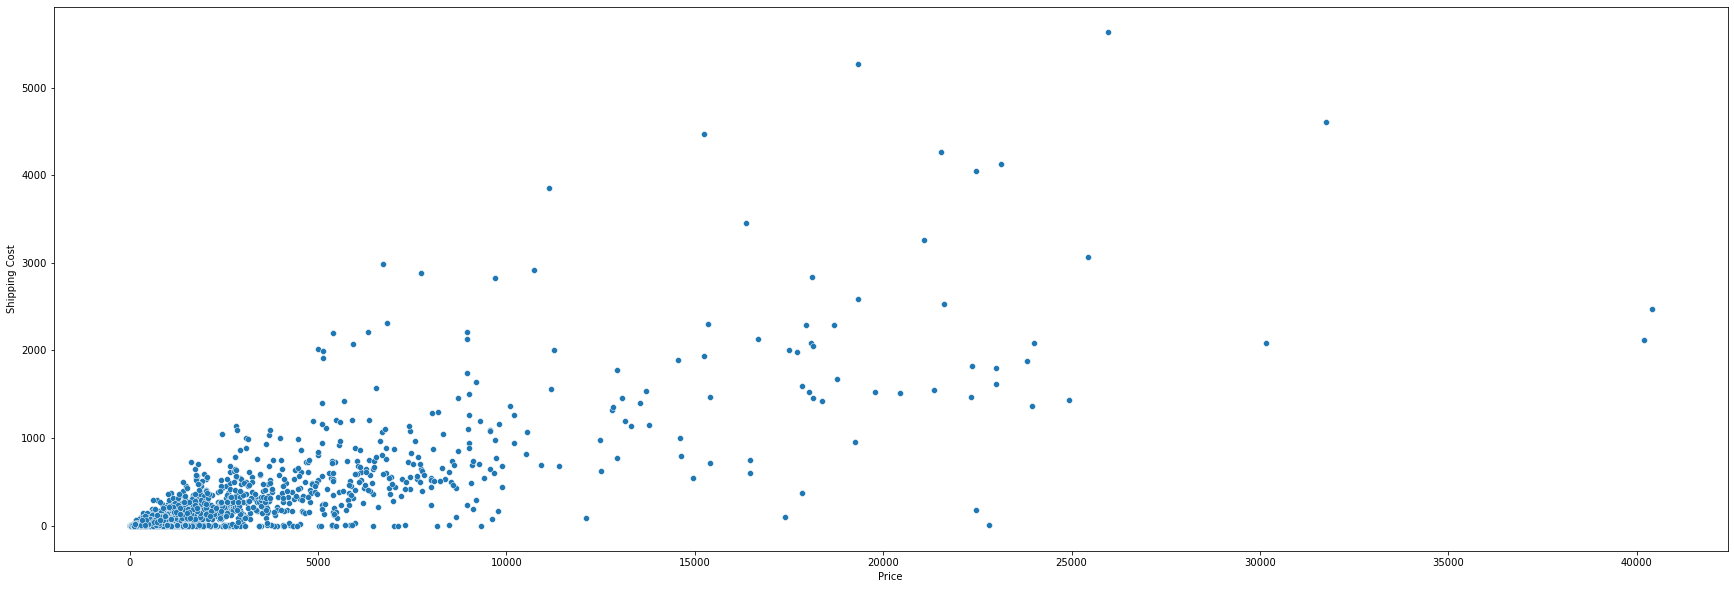

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


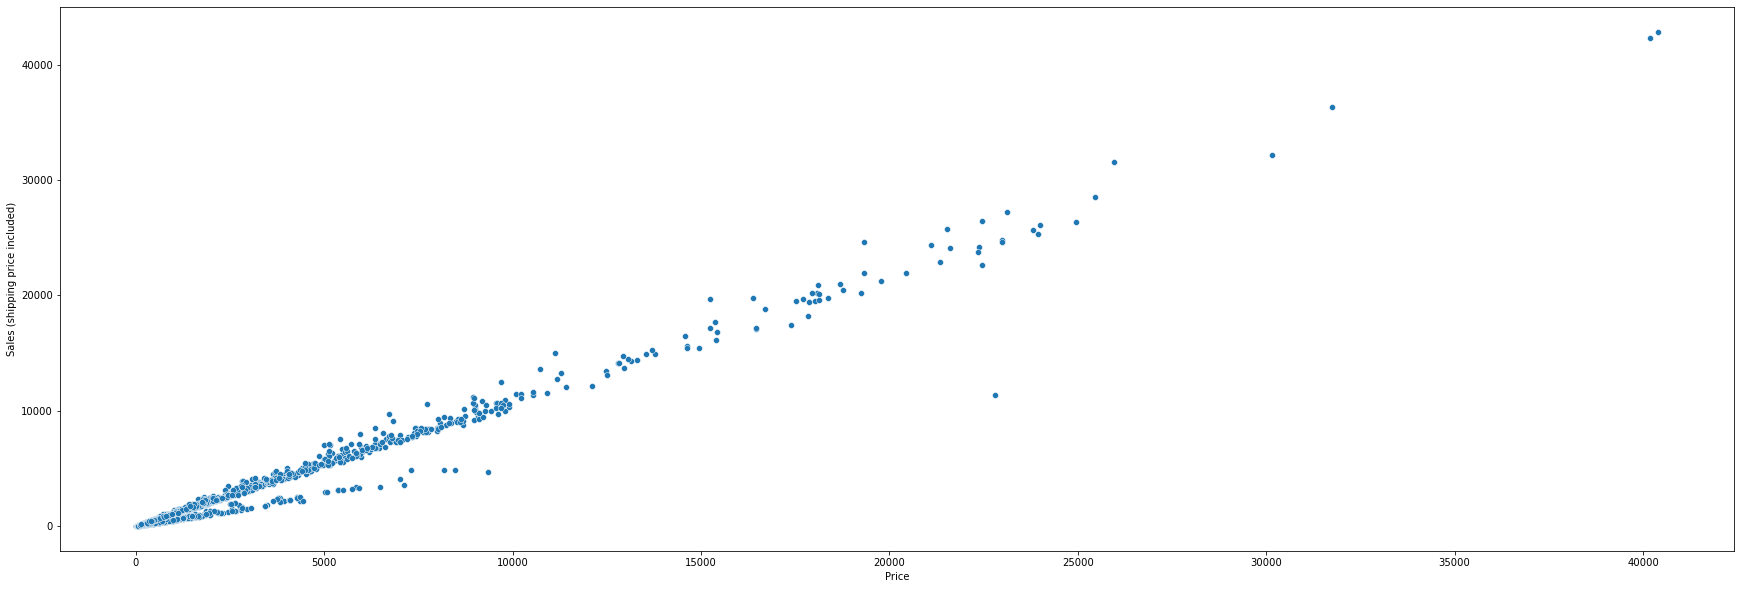

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


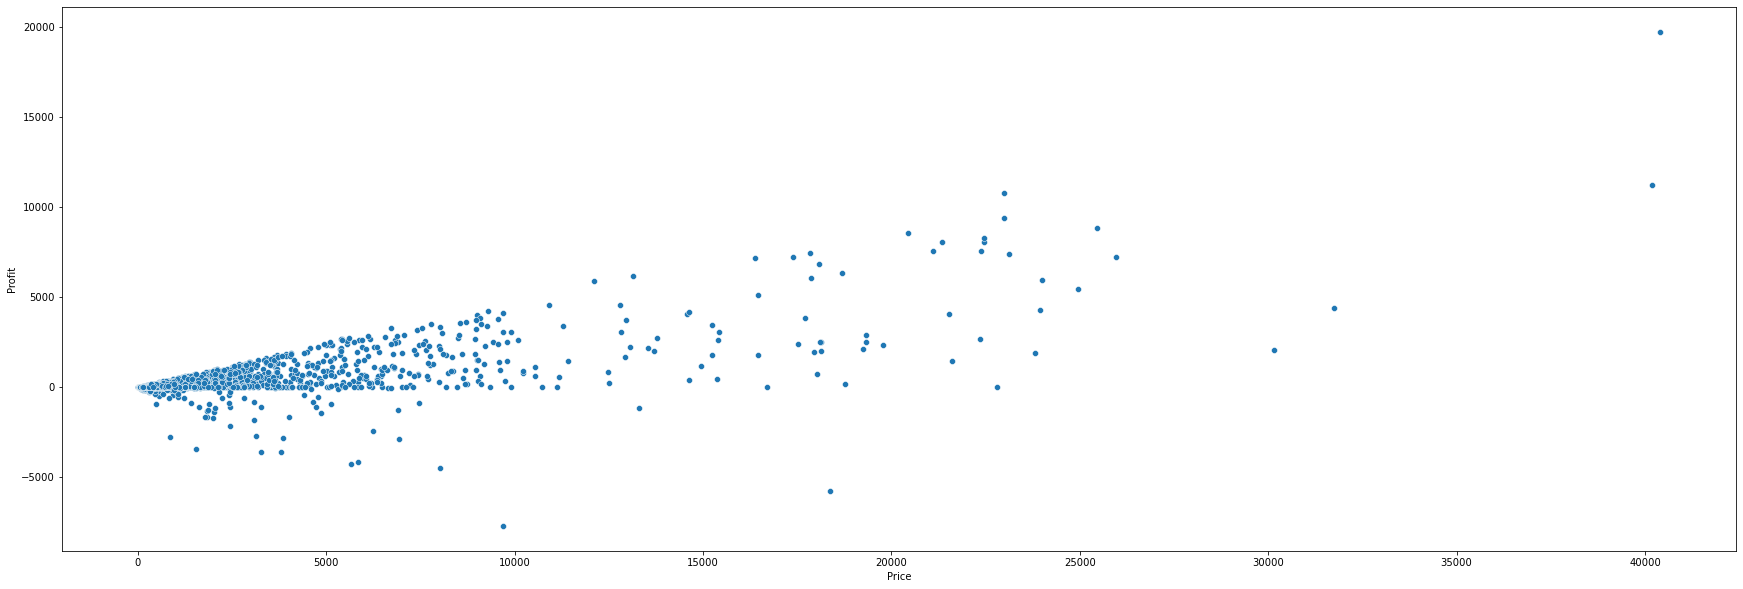

Visualizing Numerical Features with Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


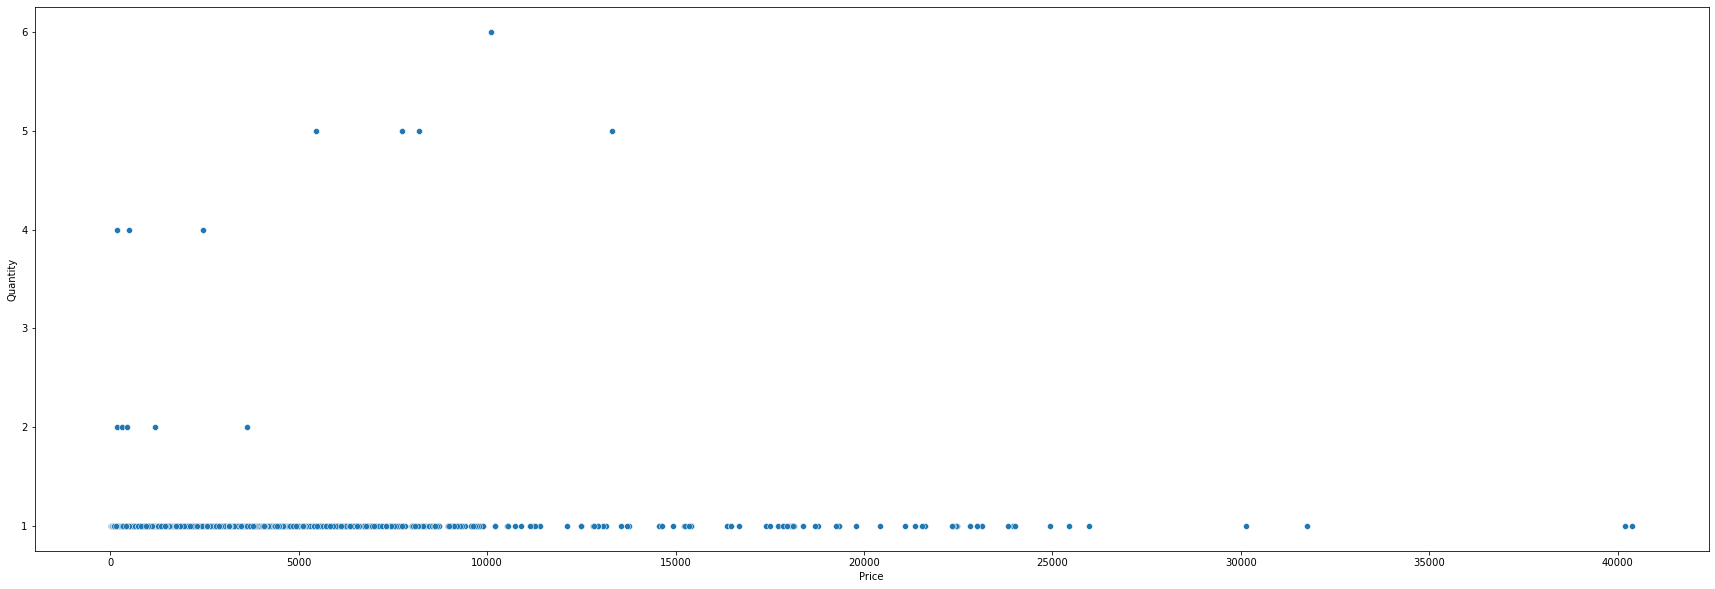

Visualizing Numerical Features with Price


In [25]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Price'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Price")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


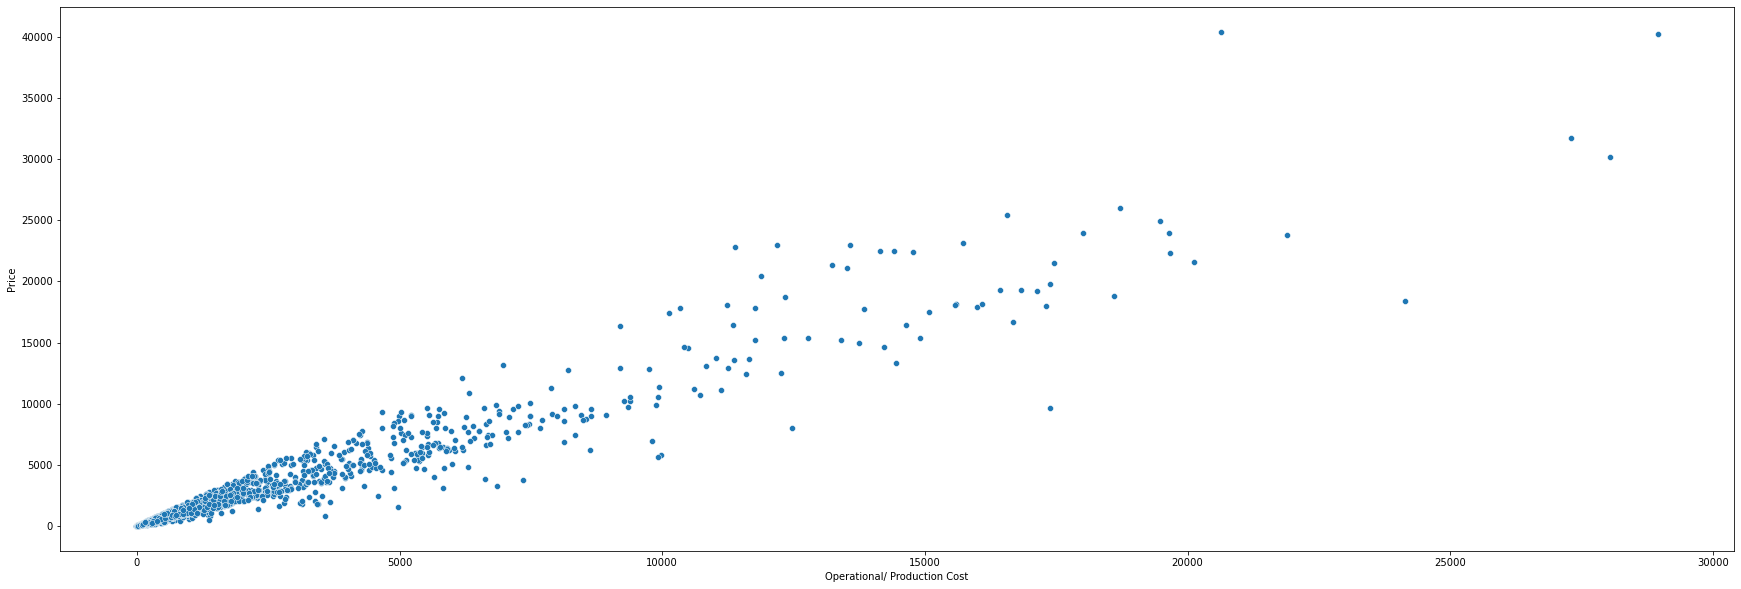

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


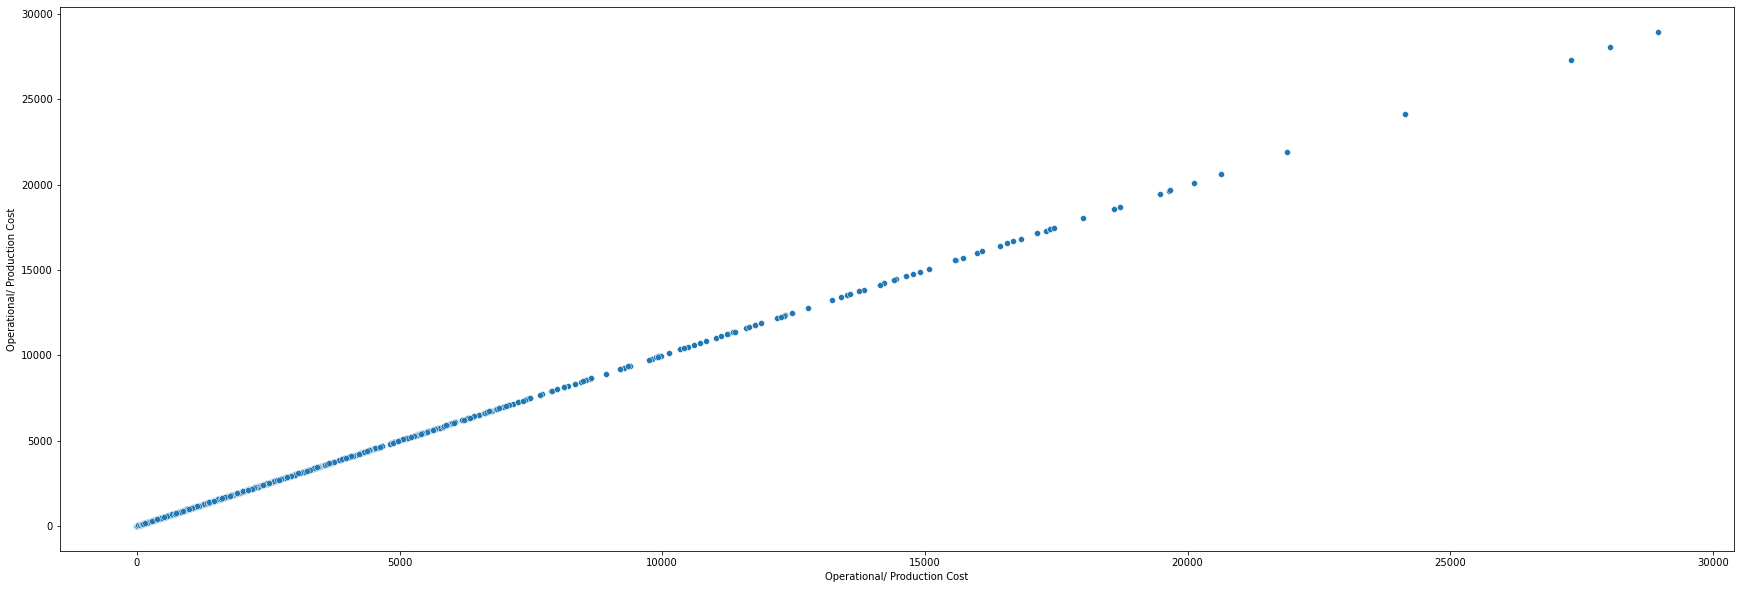

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


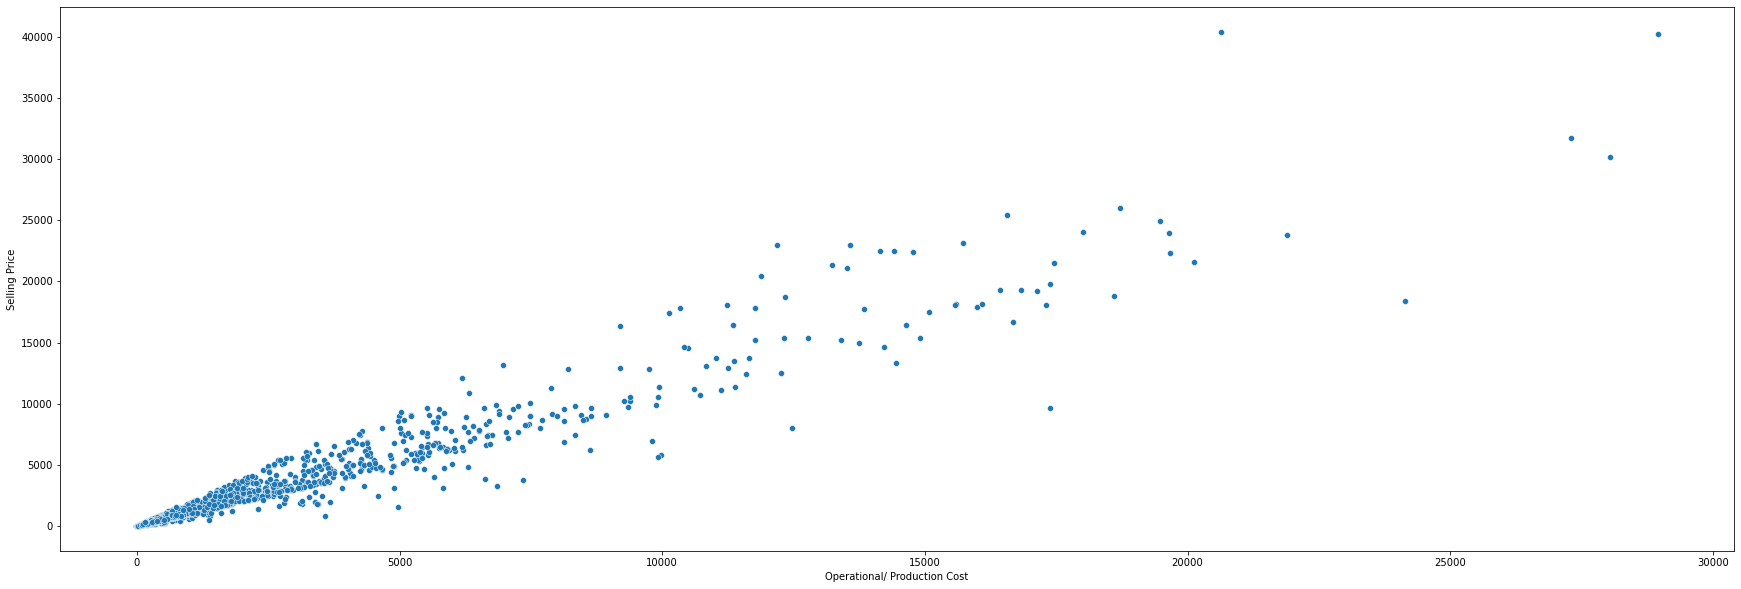

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


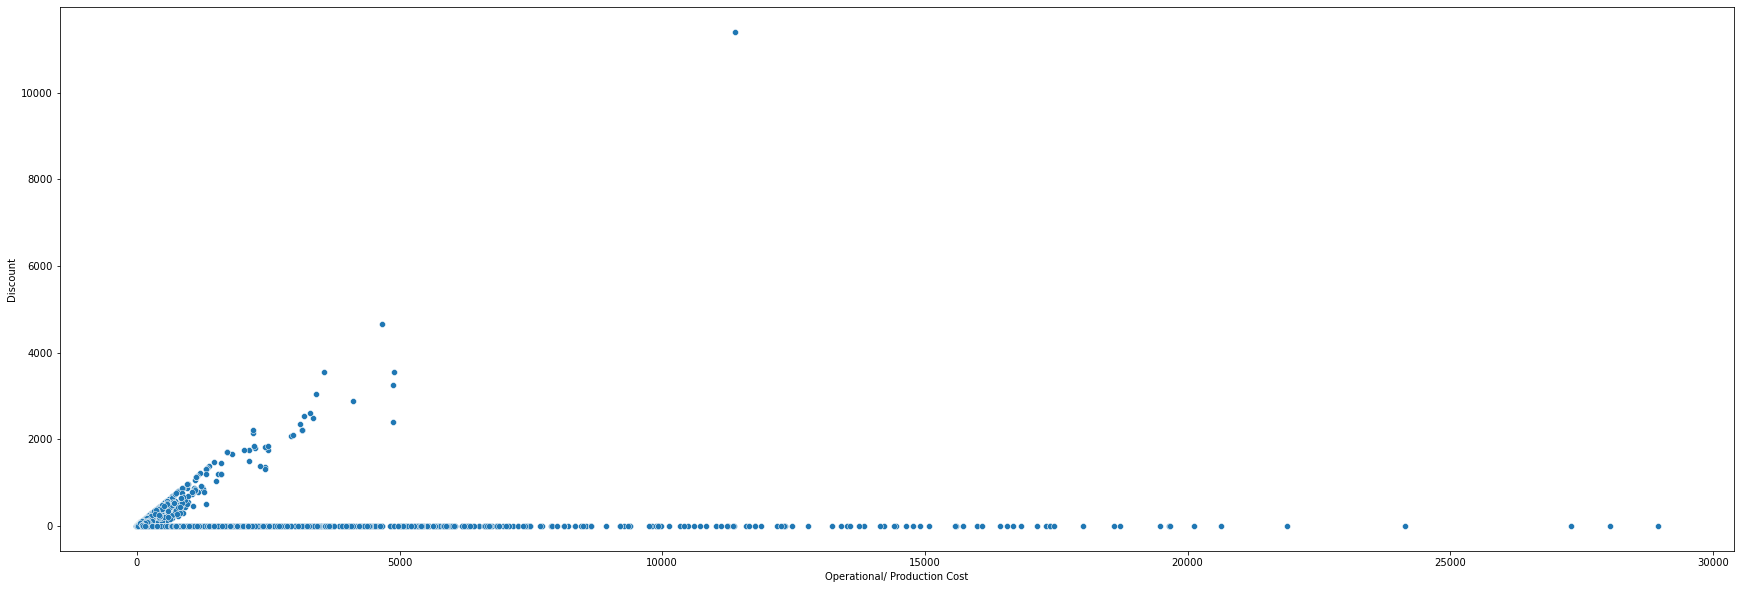

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


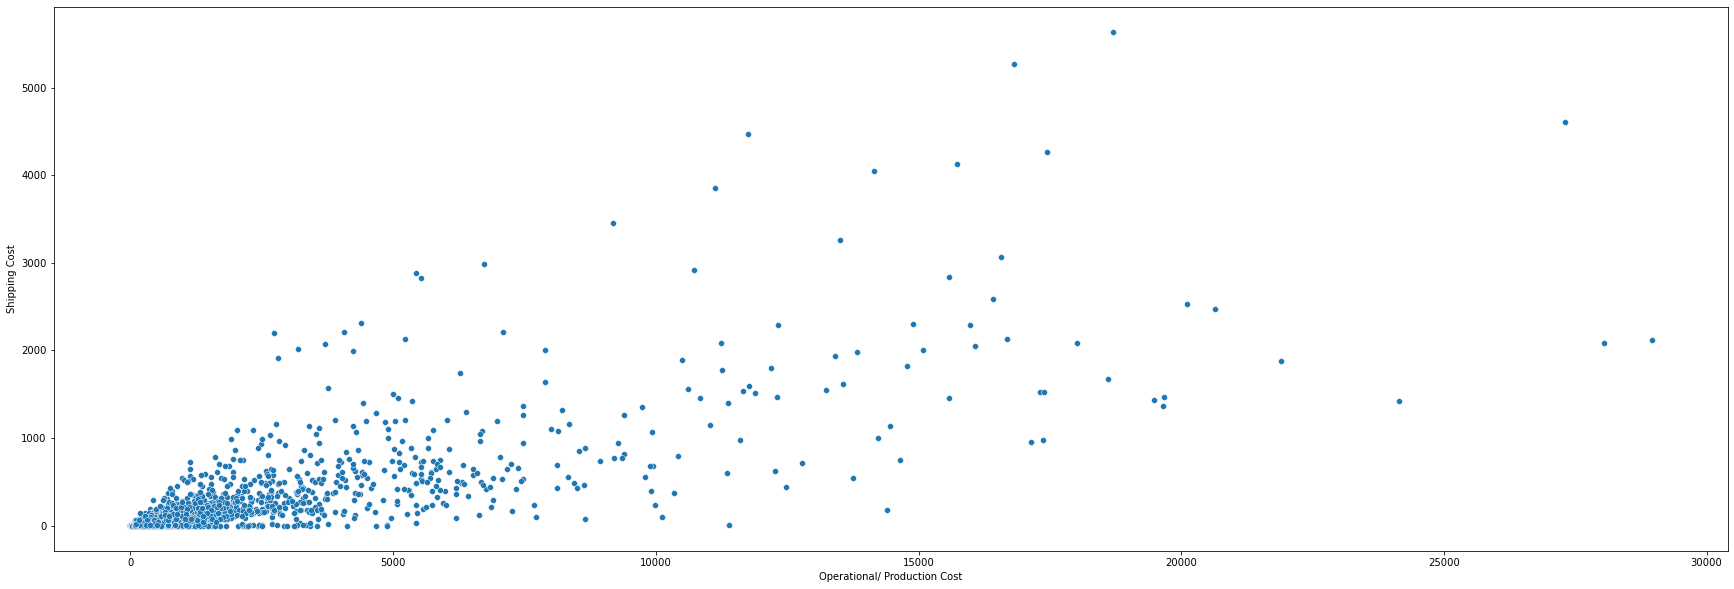

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


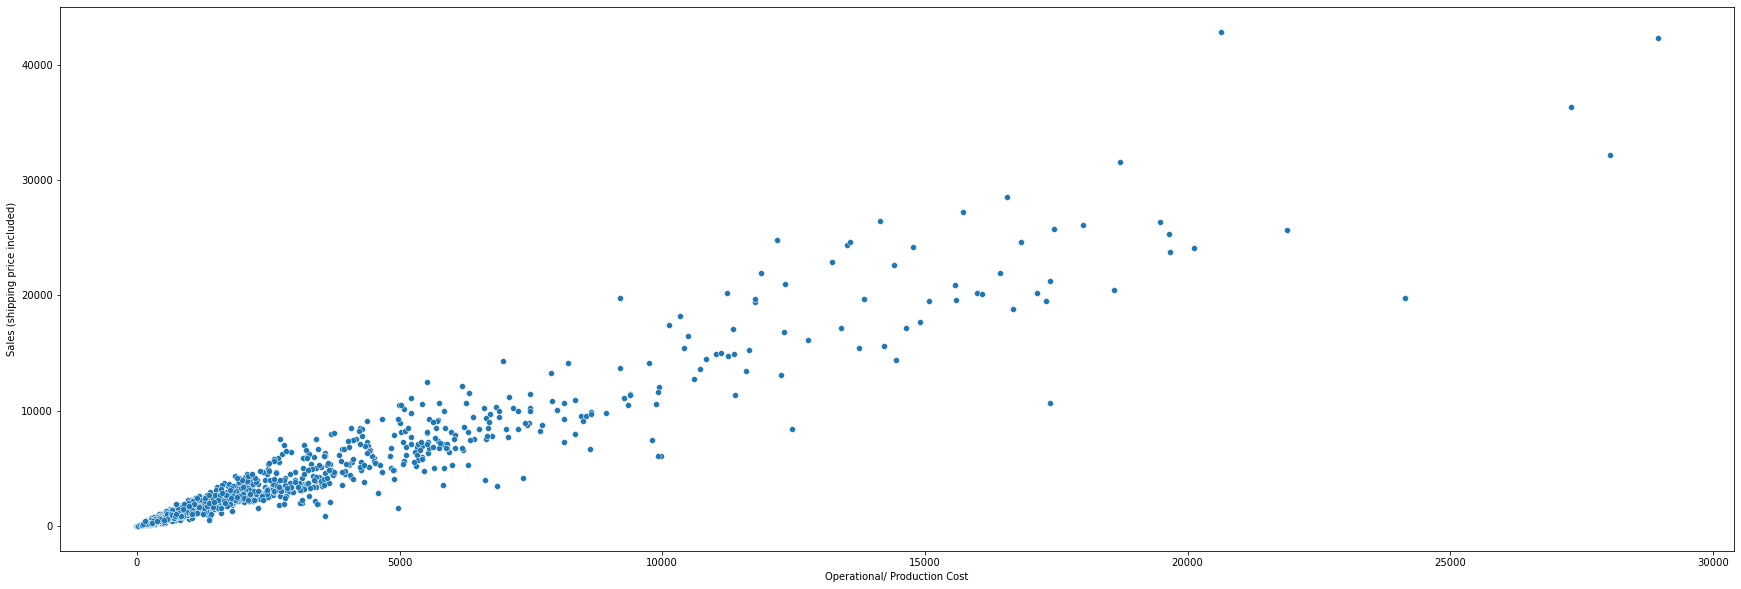

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


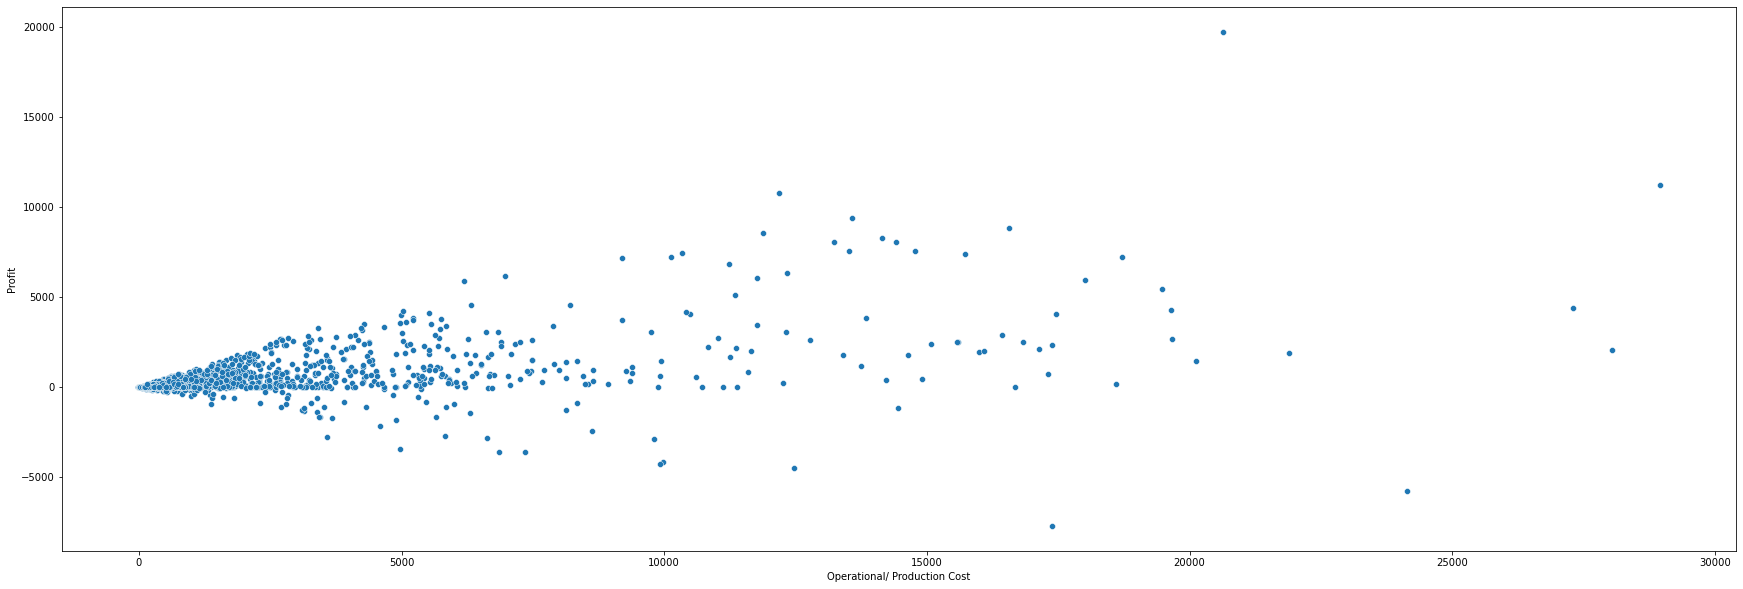

Visualizing Numerical Features with Operational/ Production Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


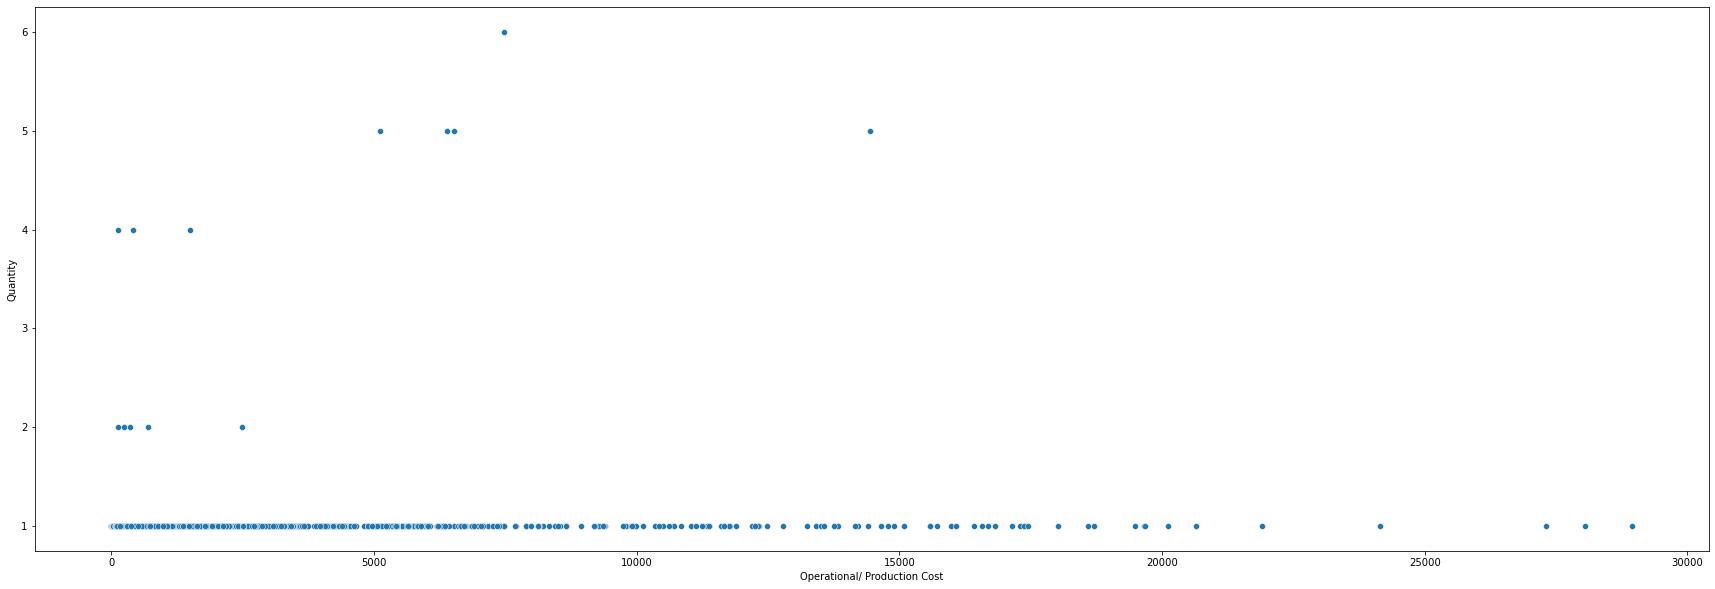

Visualizing Numerical Features with Operational/ Production Cost


In [26]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Operational/ Production Cost'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Operational/ Production Cost")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


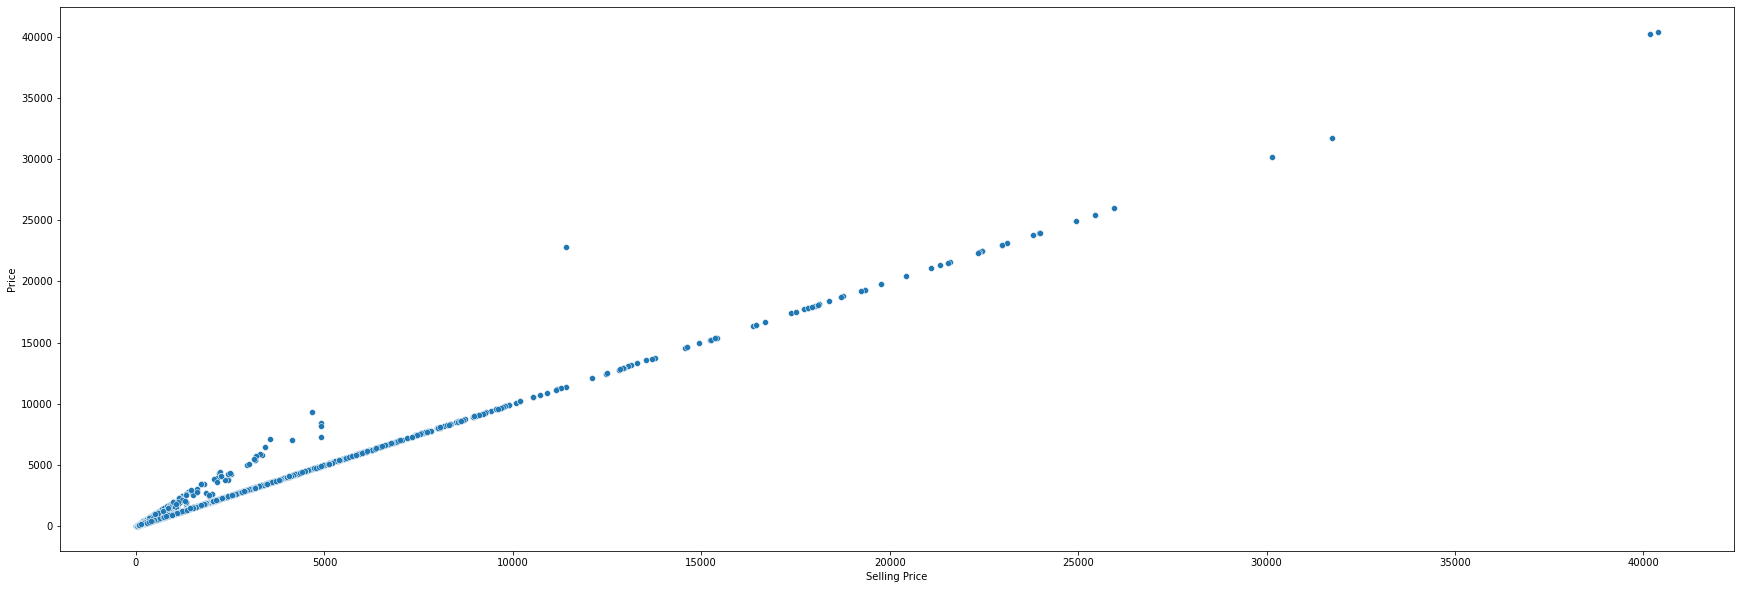

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


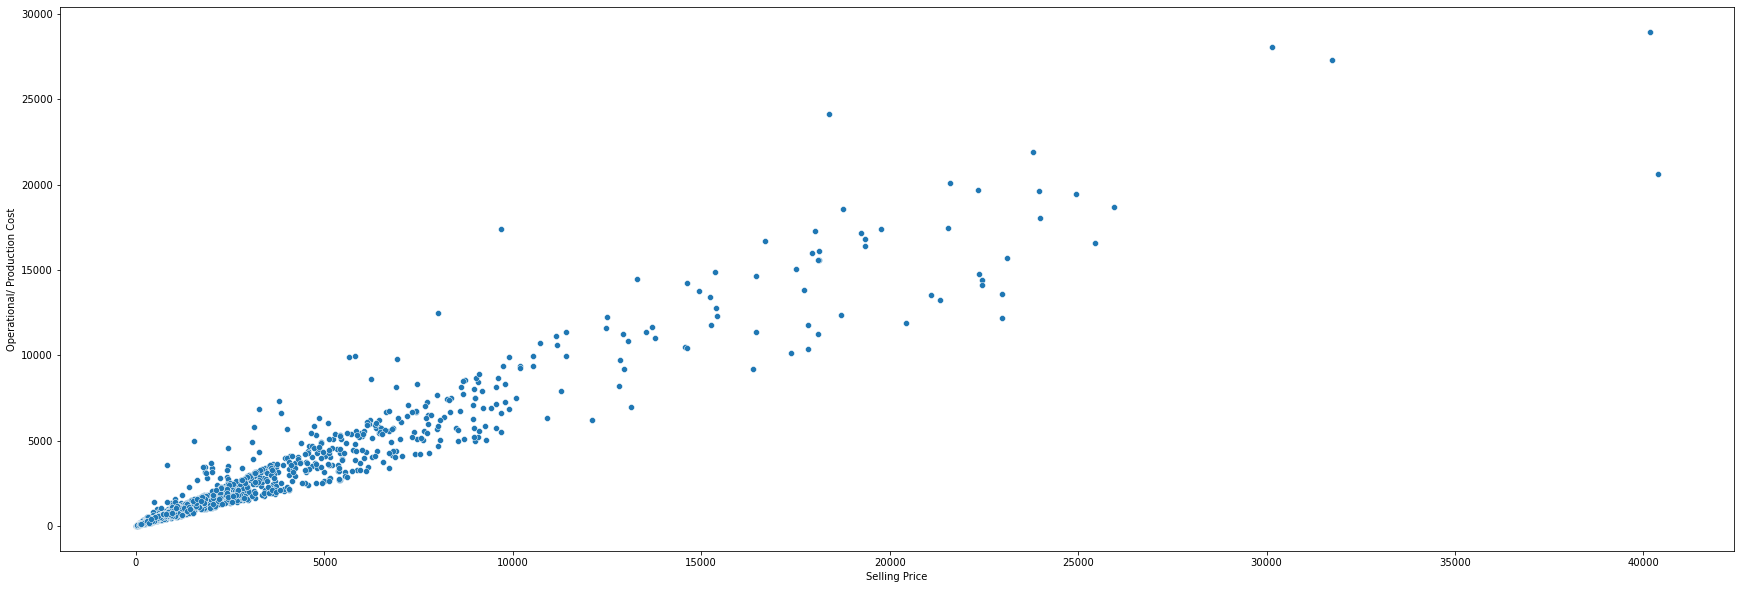

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


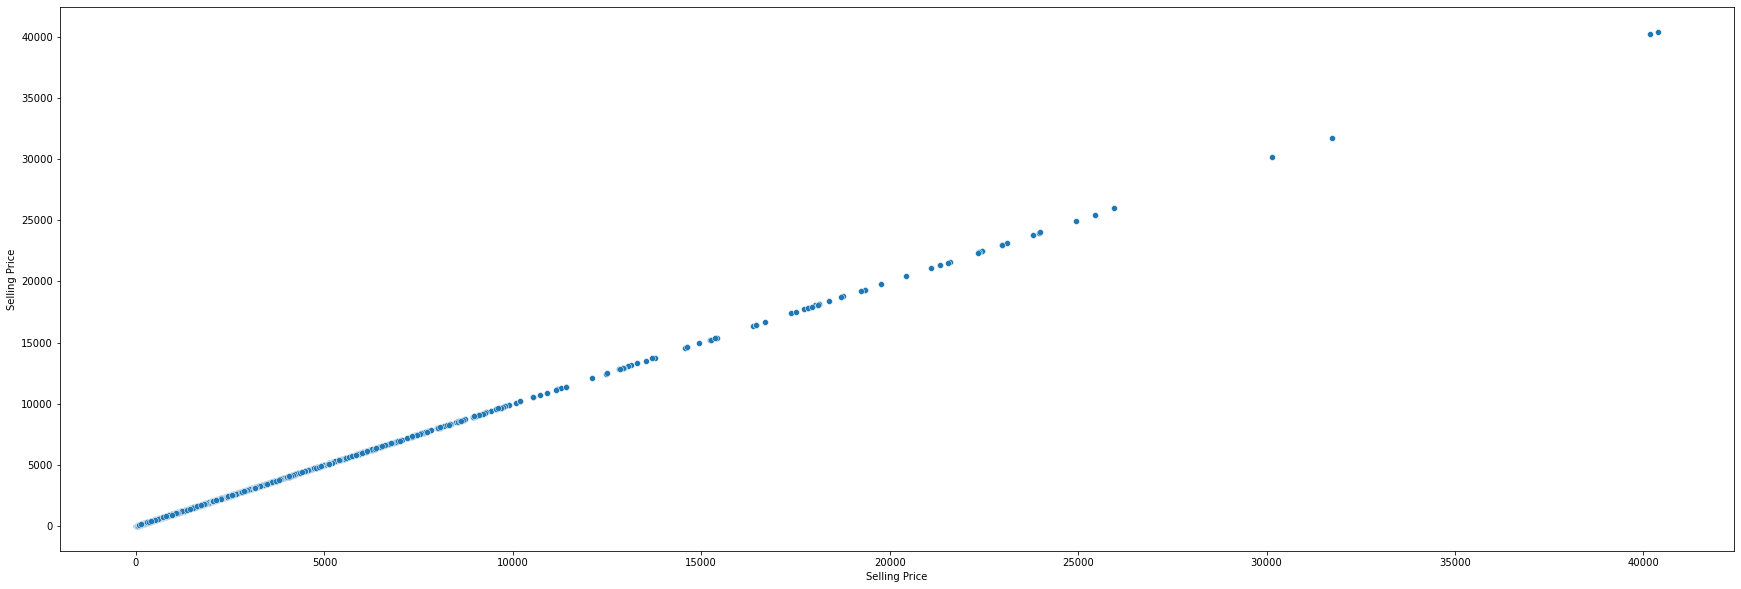

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


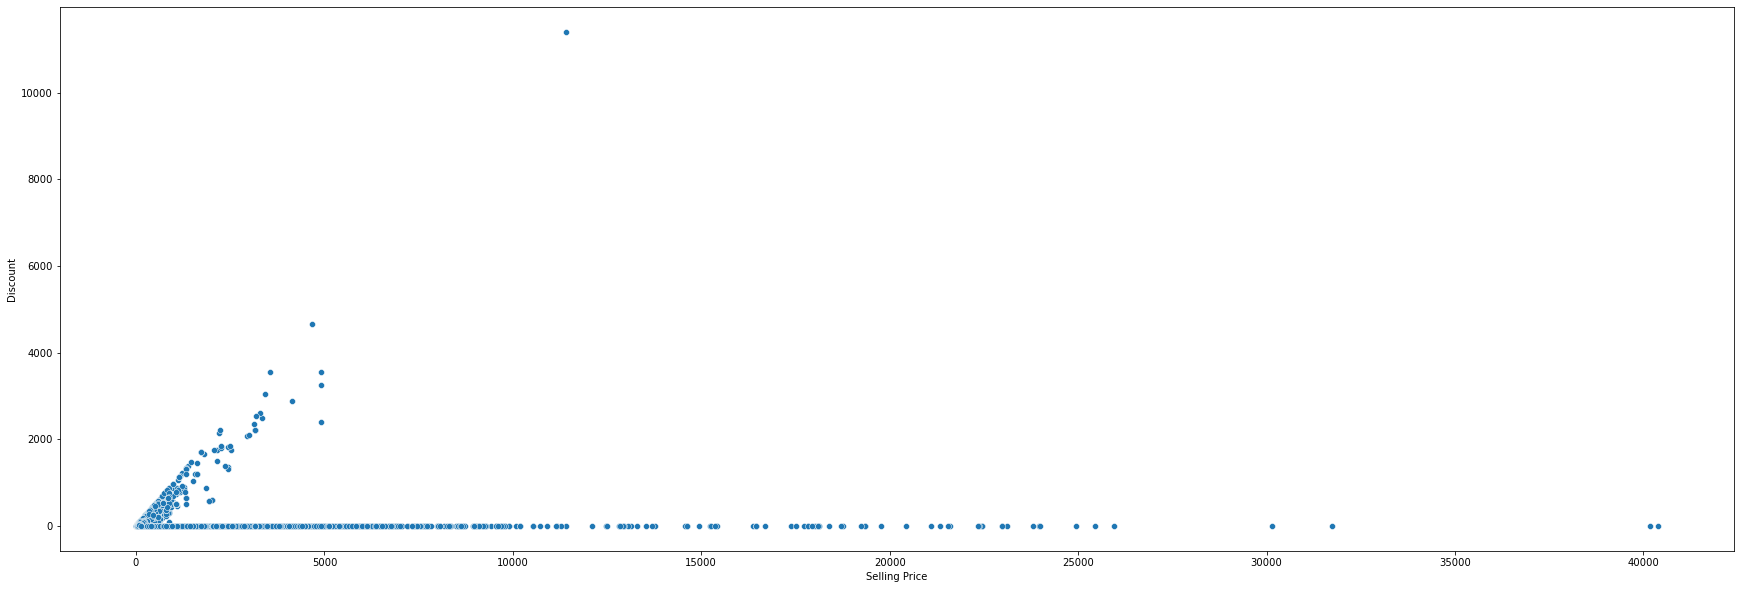

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


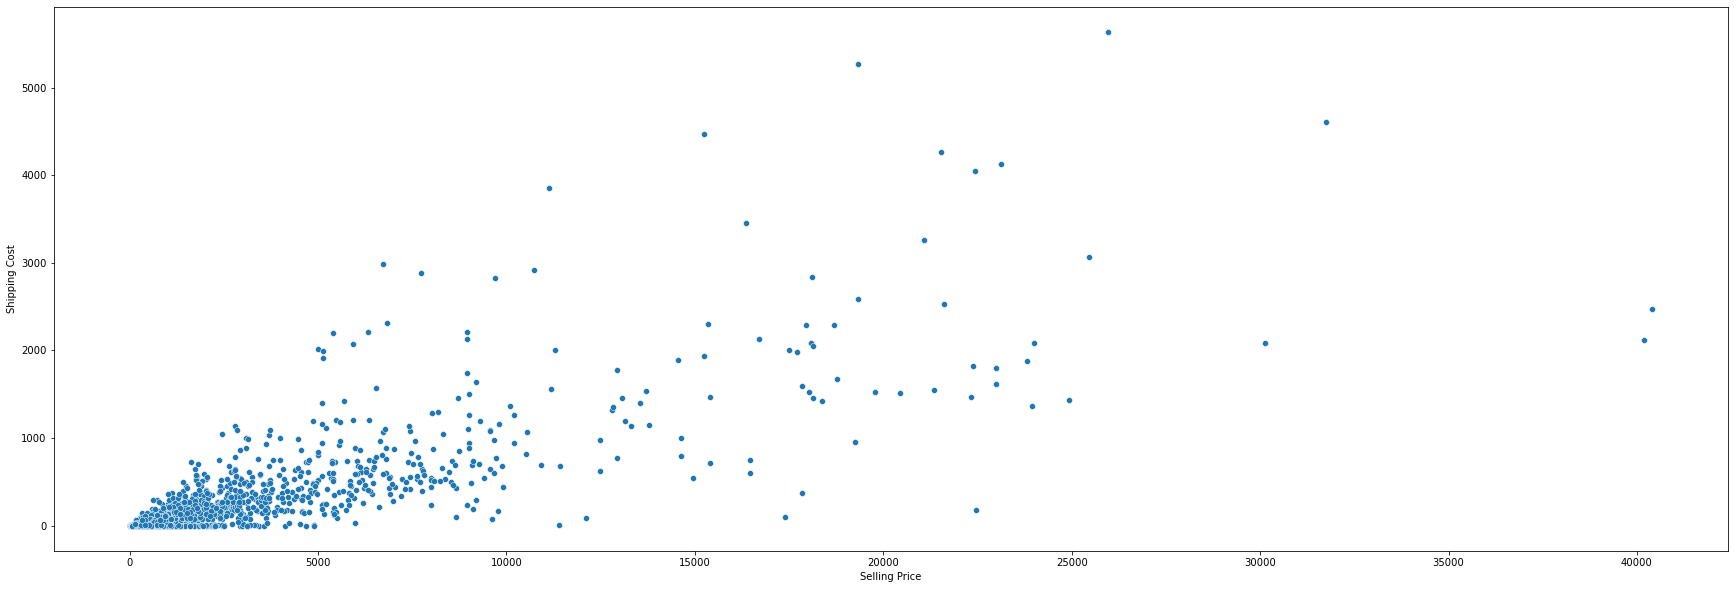

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


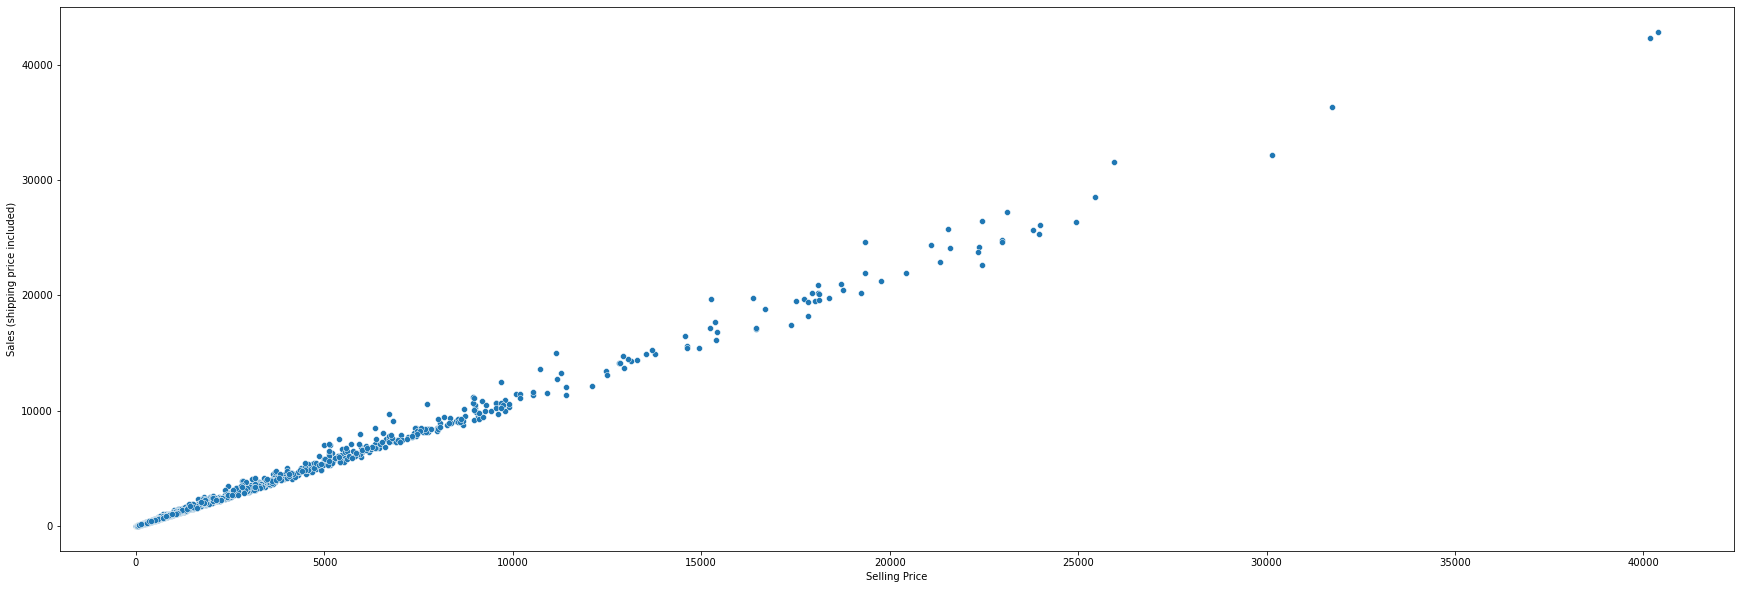

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


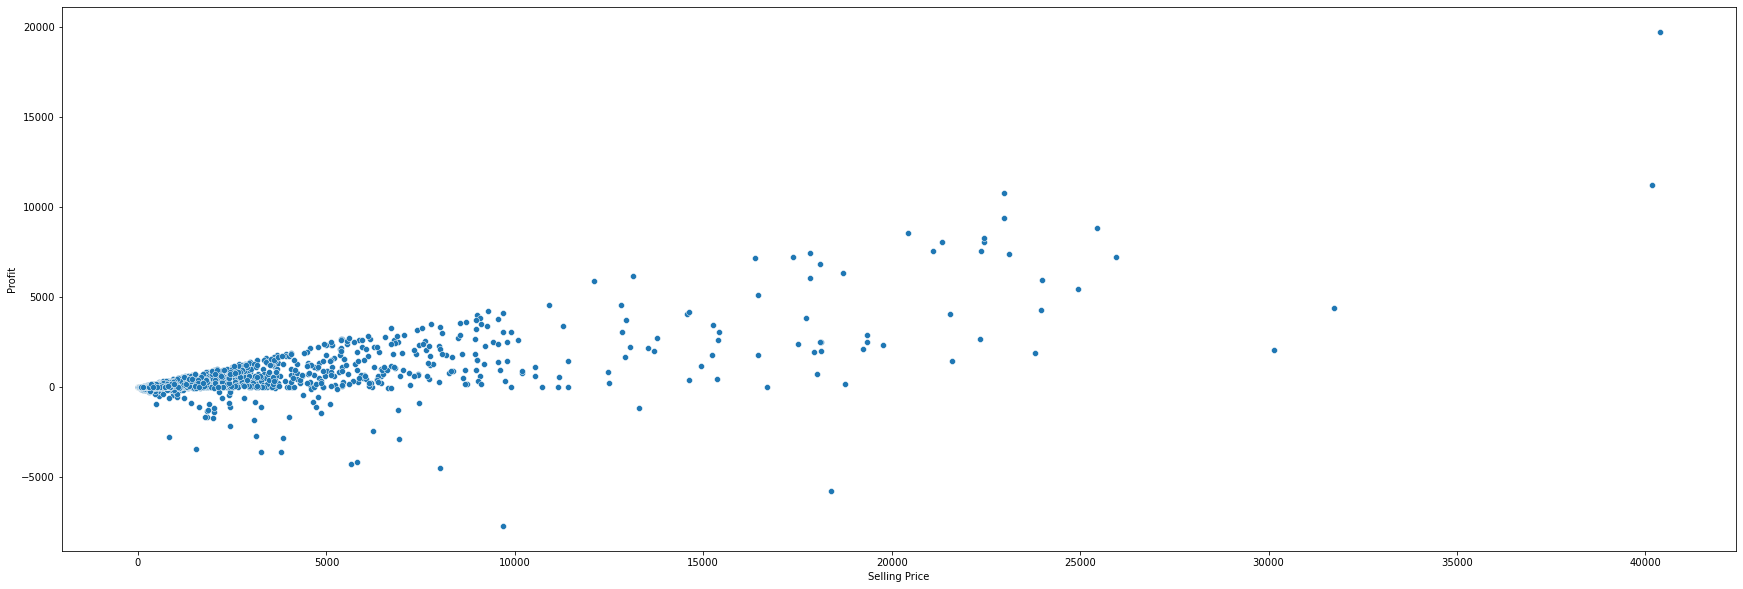

Visualizing Numerical Features with Selling Price


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


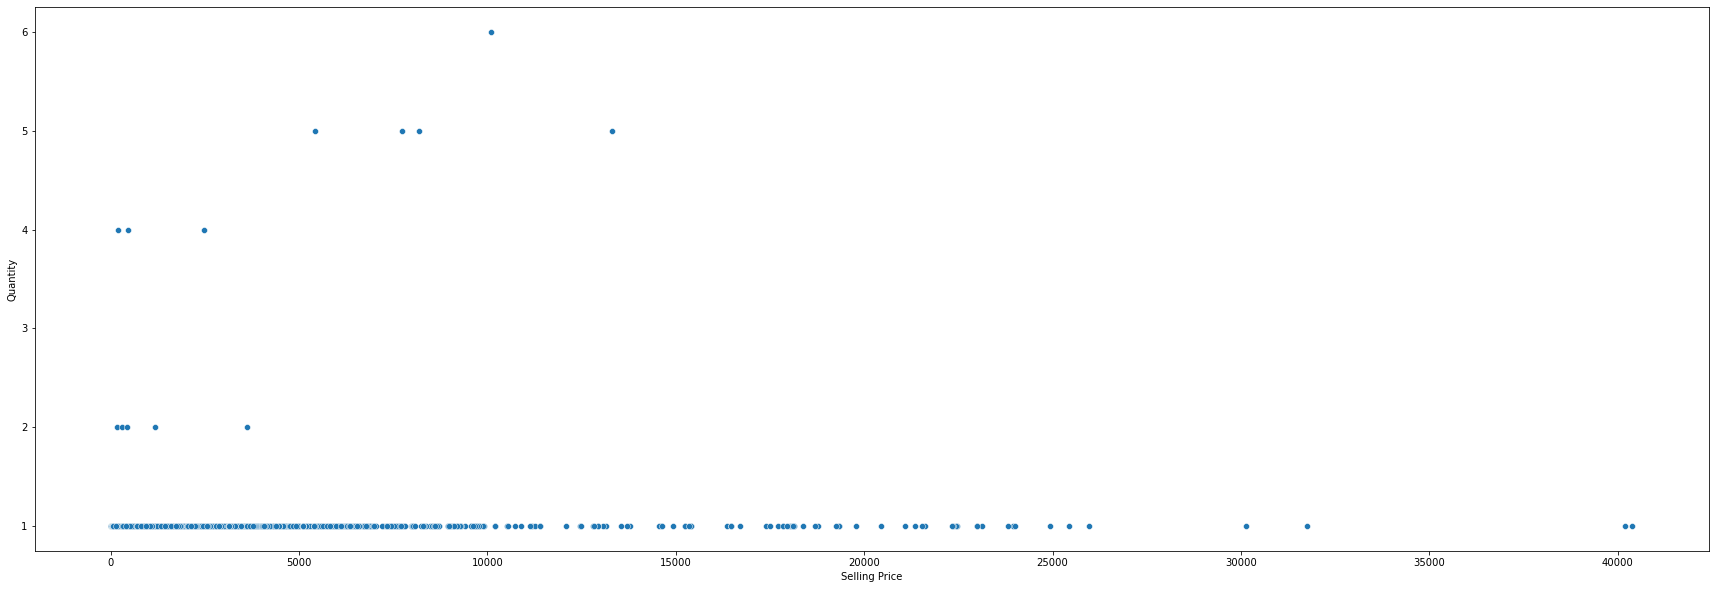

Visualizing Numerical Features with Selling Price


In [27]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Selling Price'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Selling Price")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


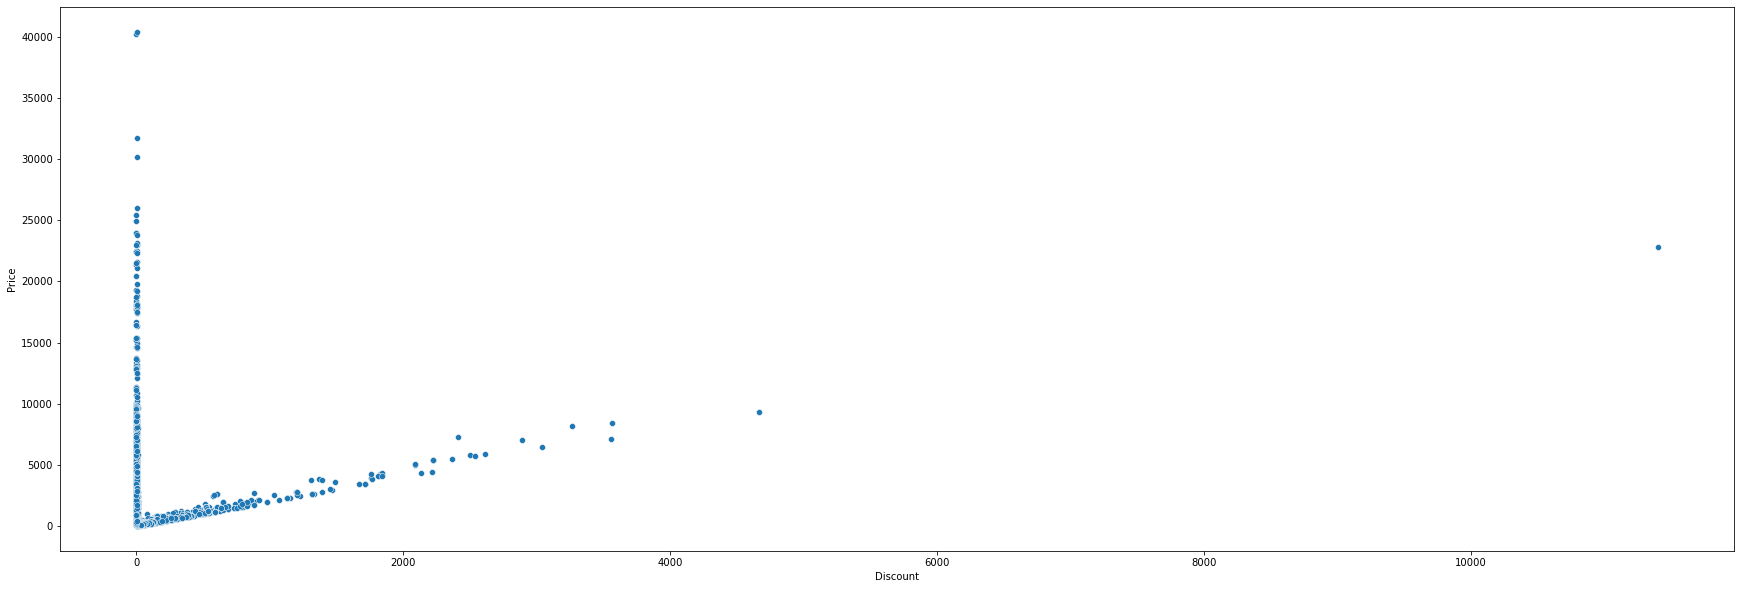

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


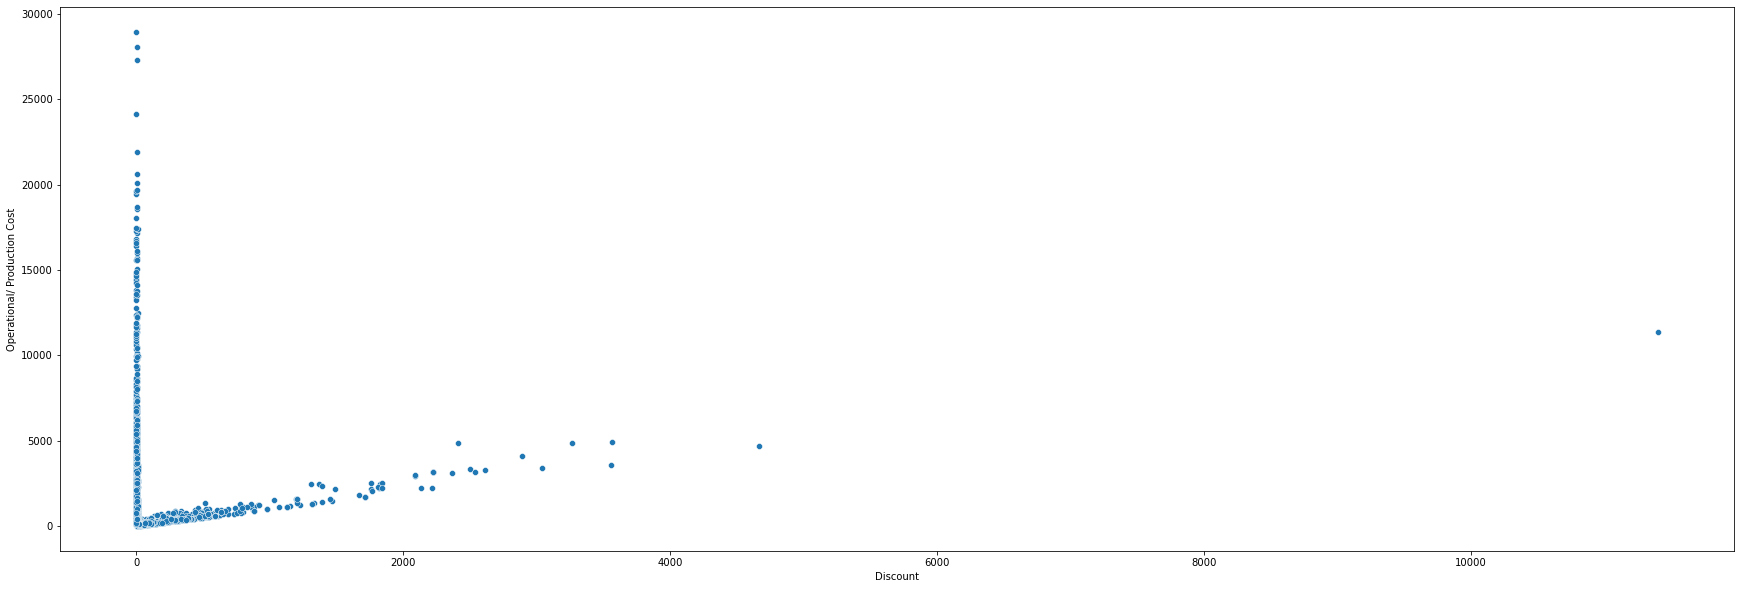

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


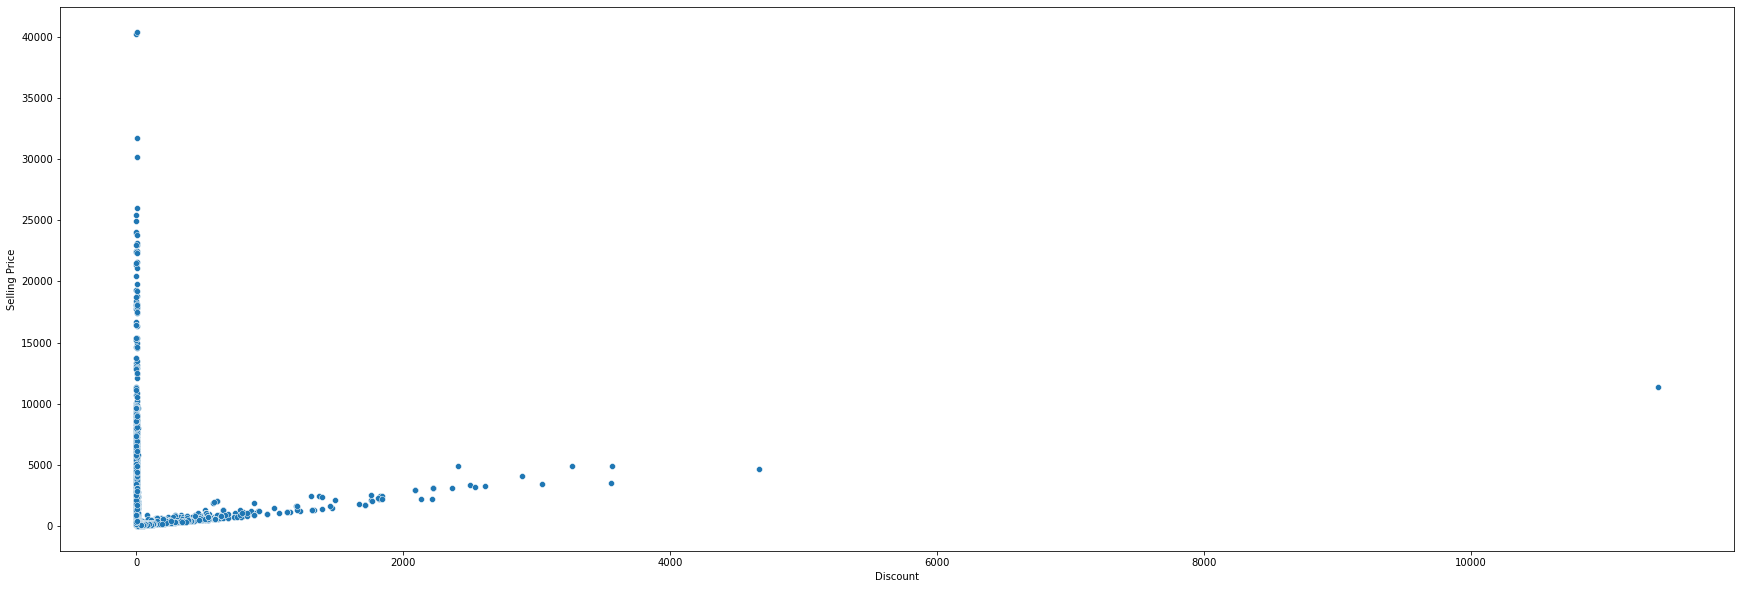

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


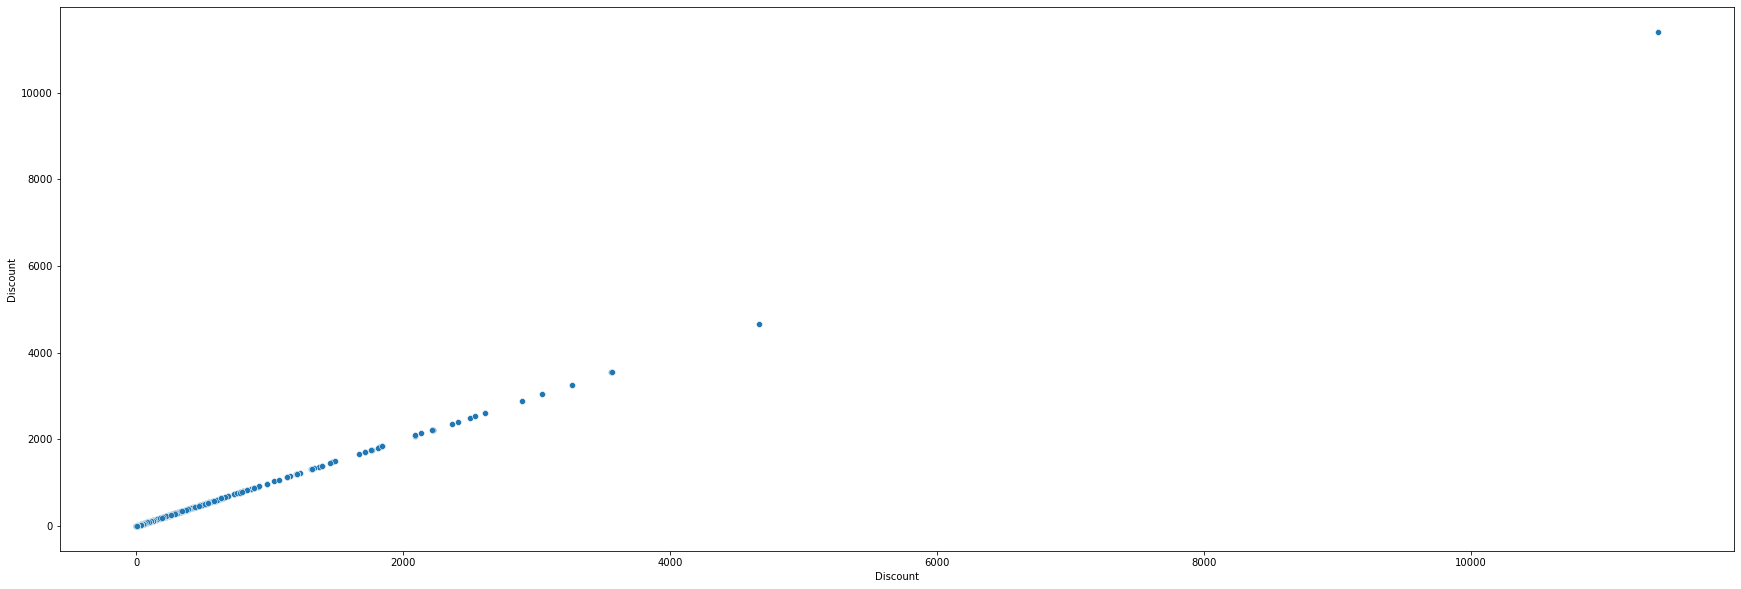

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


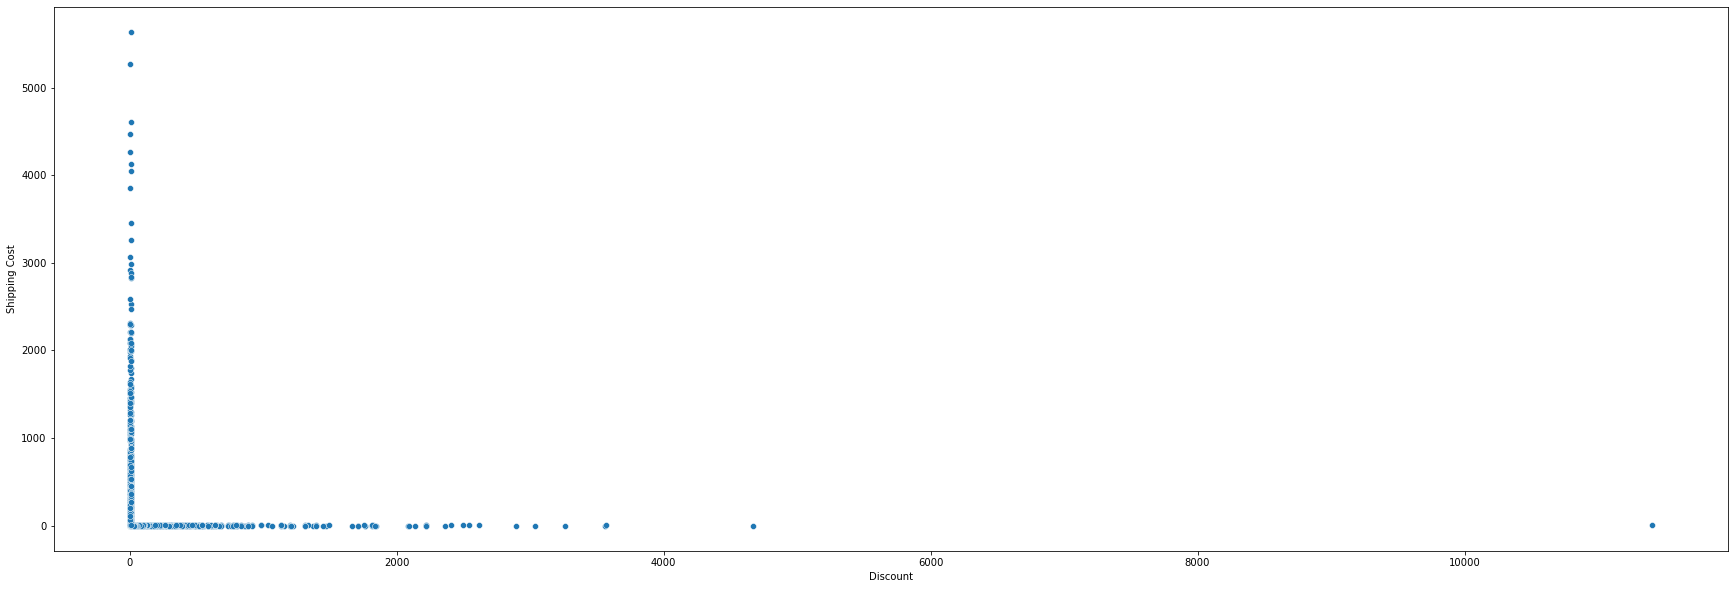

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


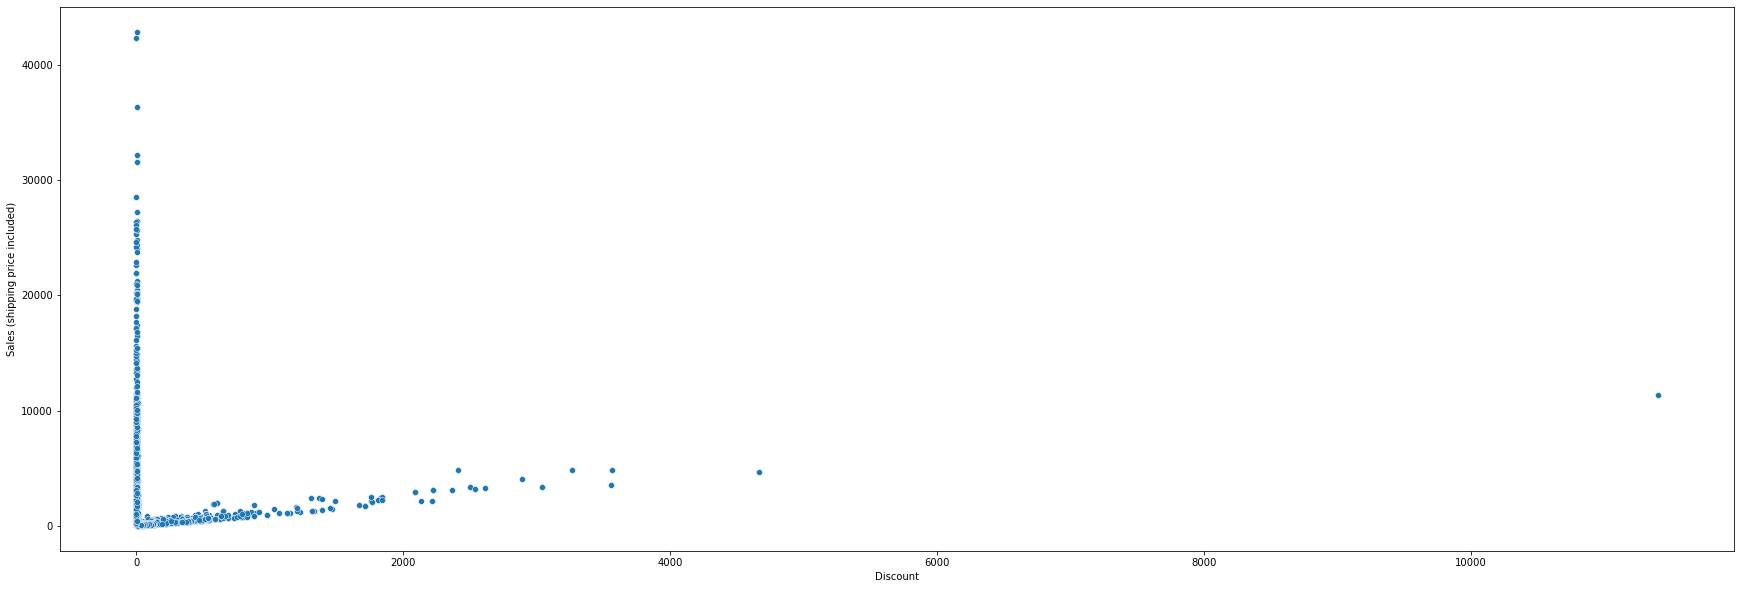

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


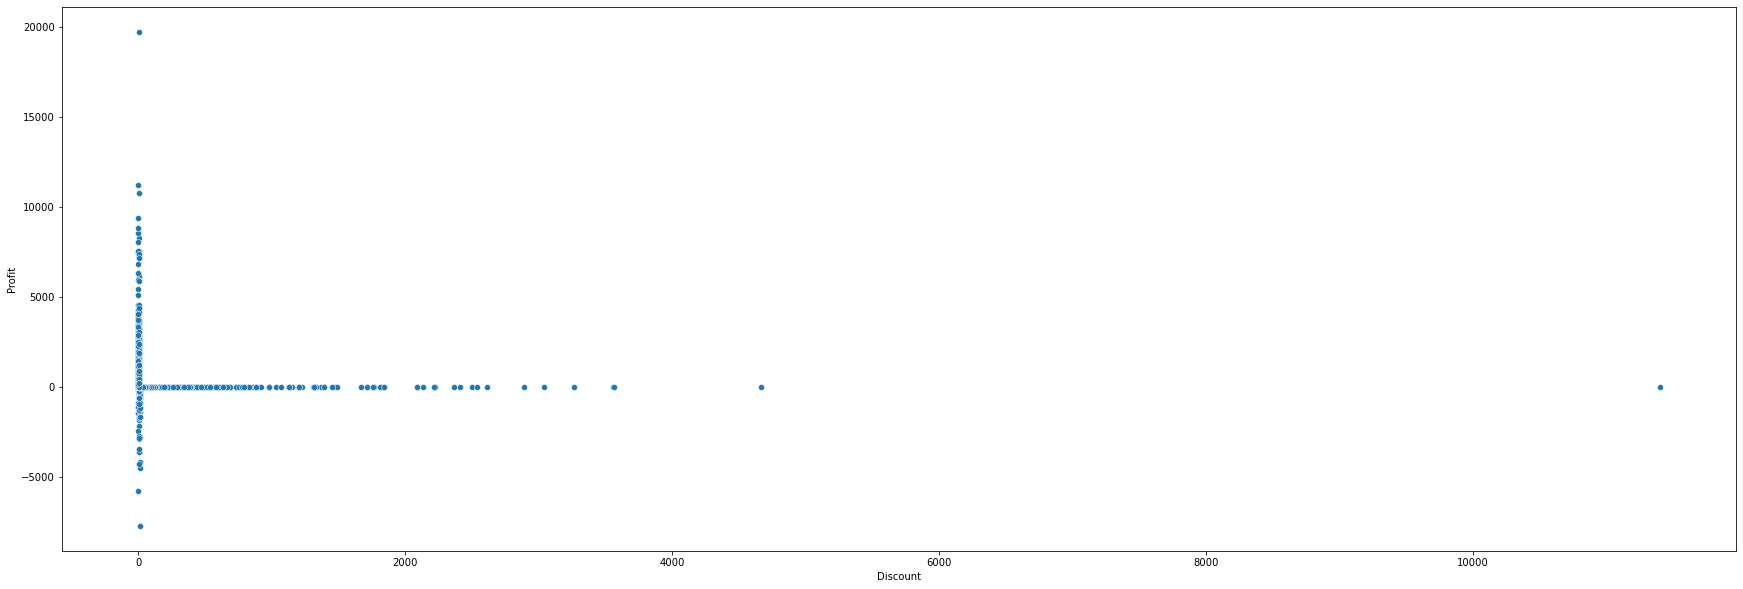

Visualizing Numerical Features with Discount


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


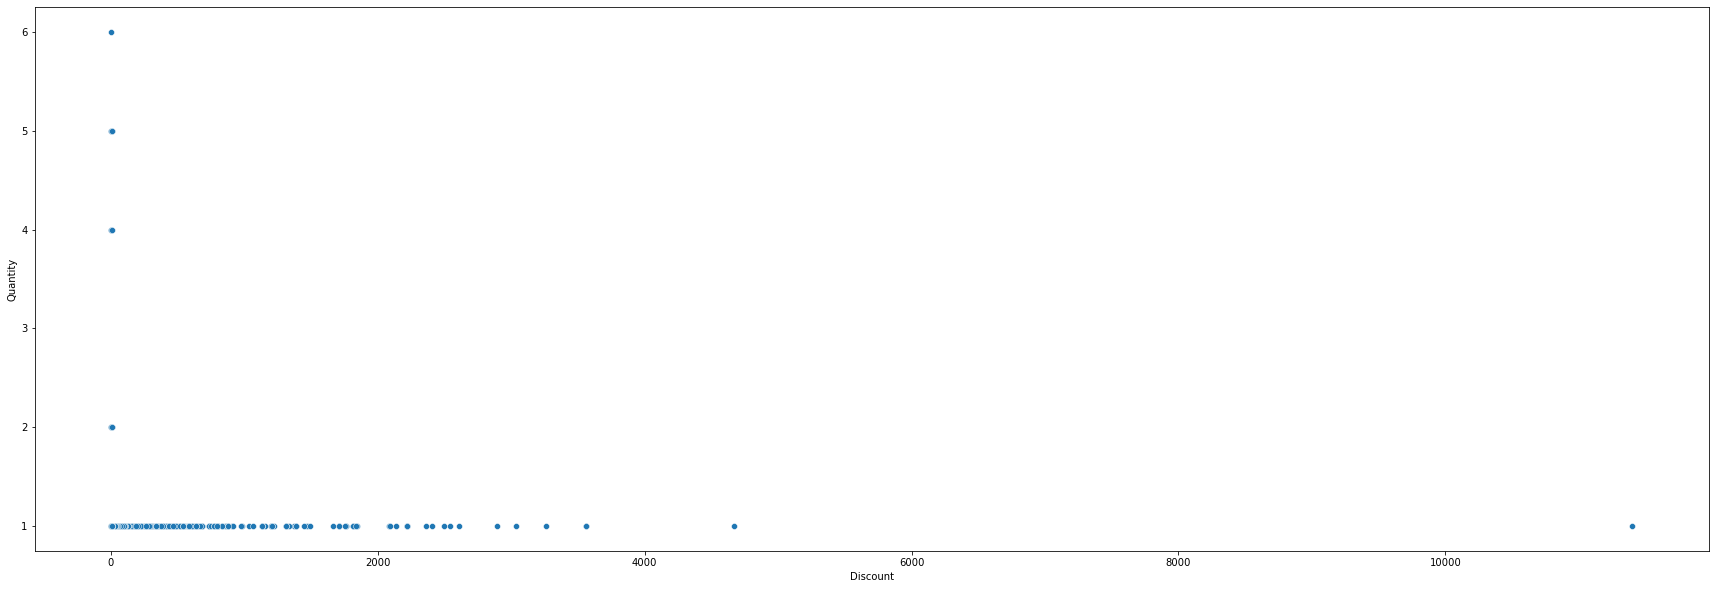

Visualizing Numerical Features with Discount


In [28]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Discount'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Discount")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


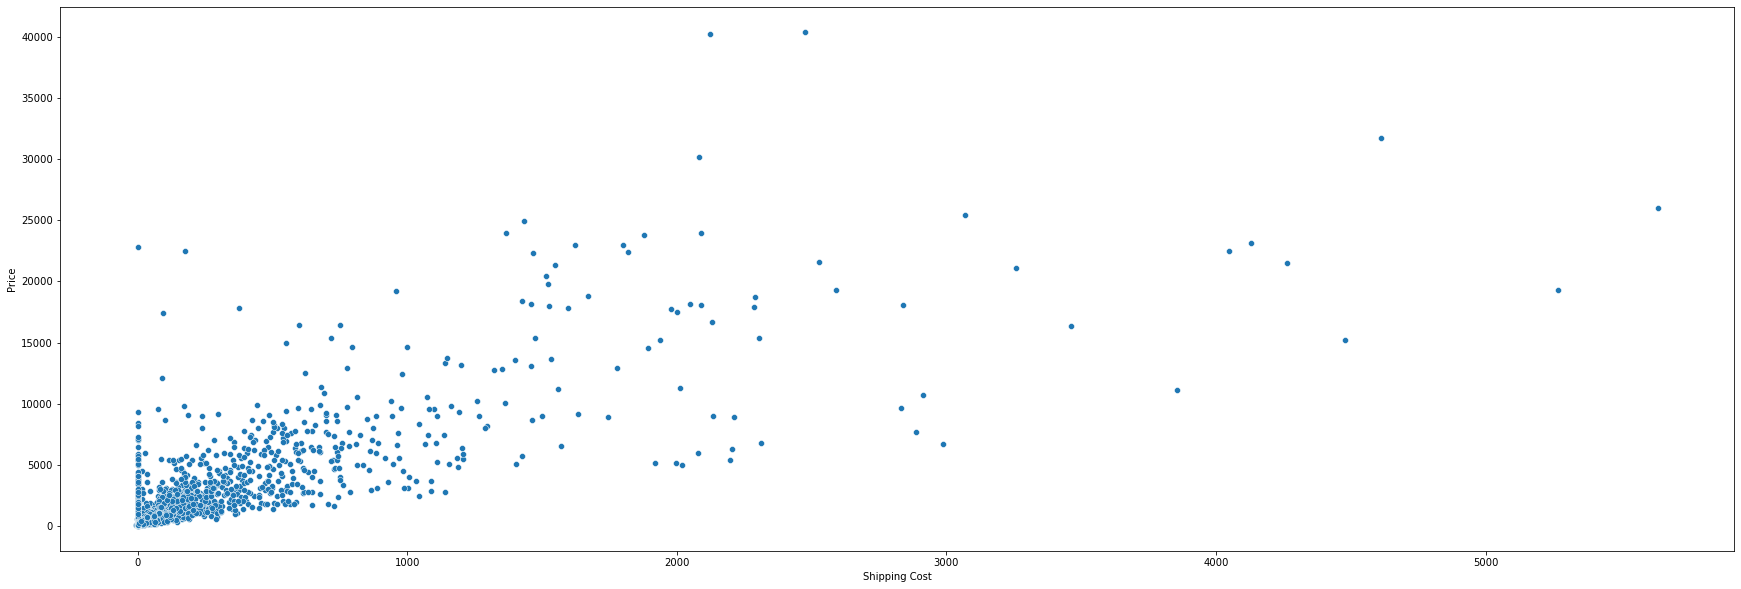

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


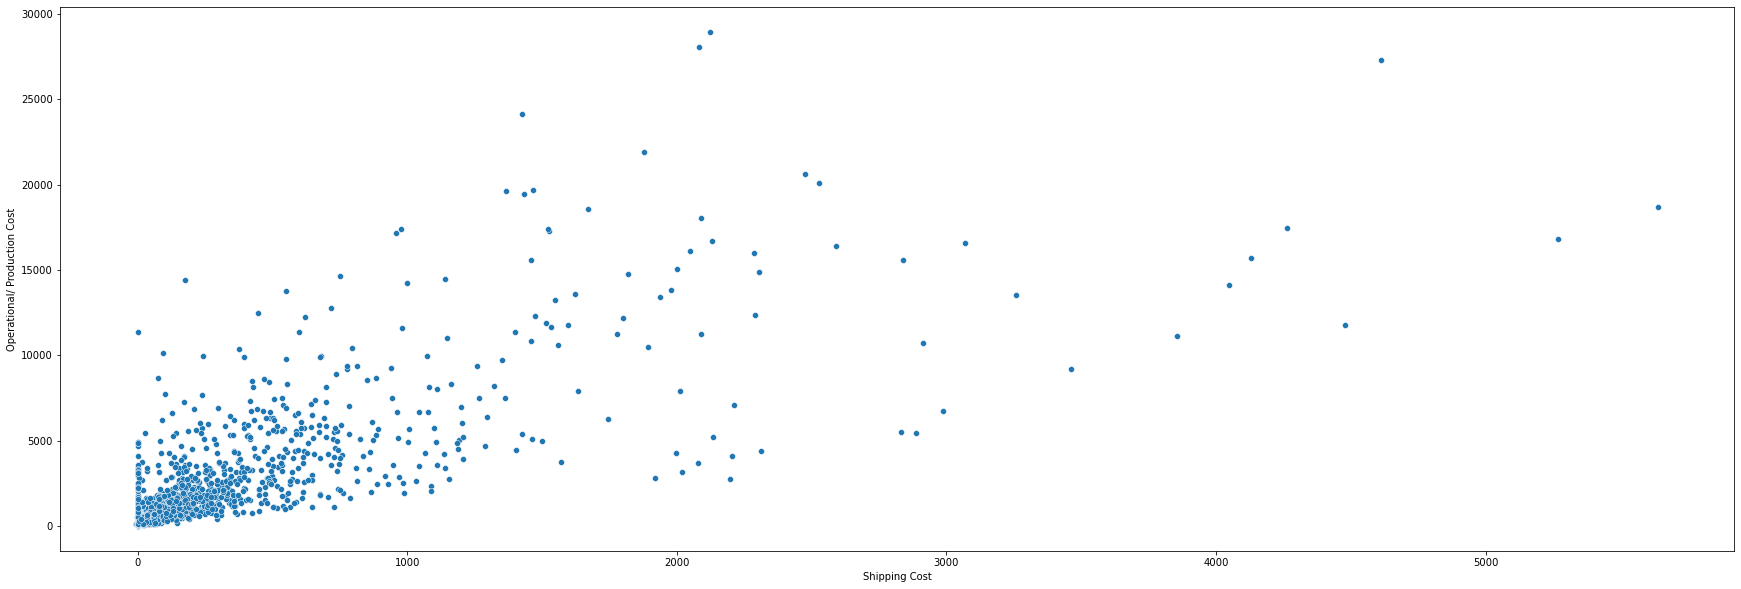

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


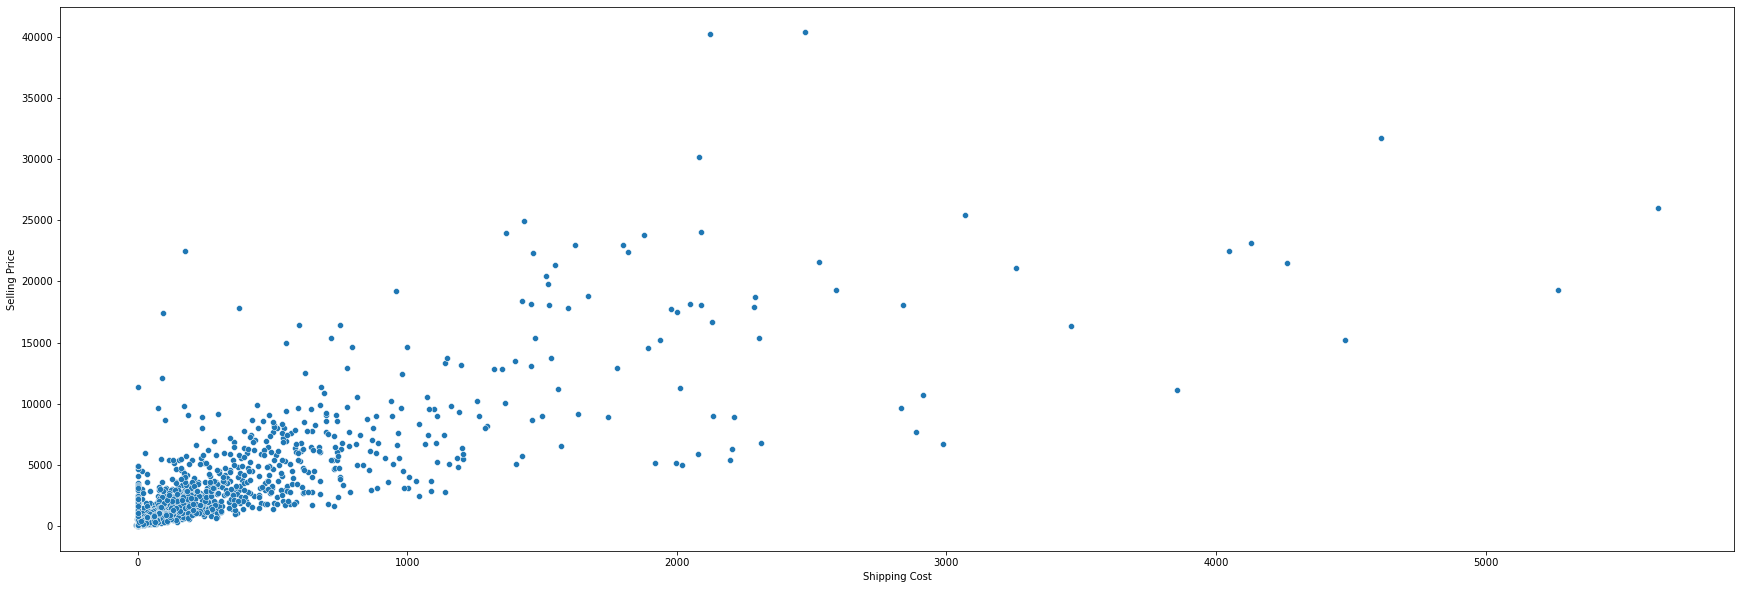

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


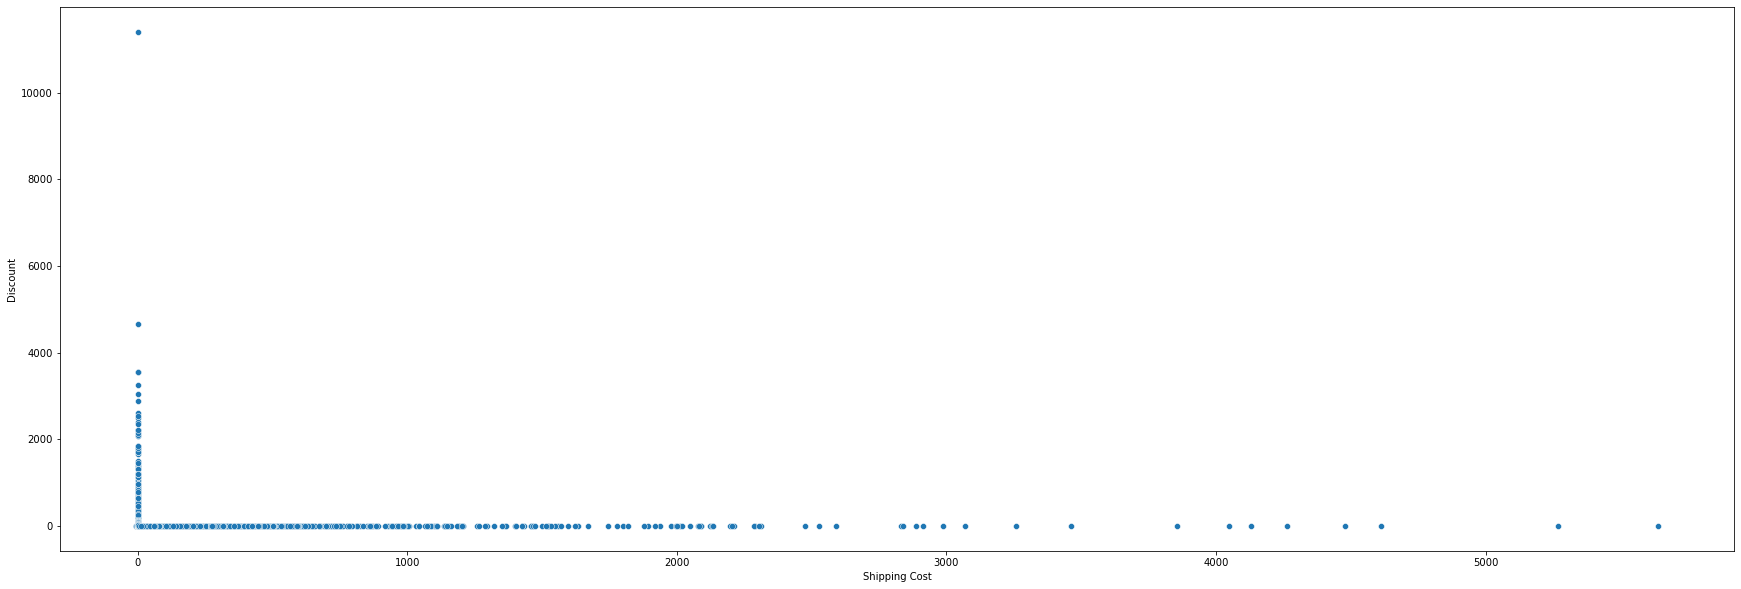

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


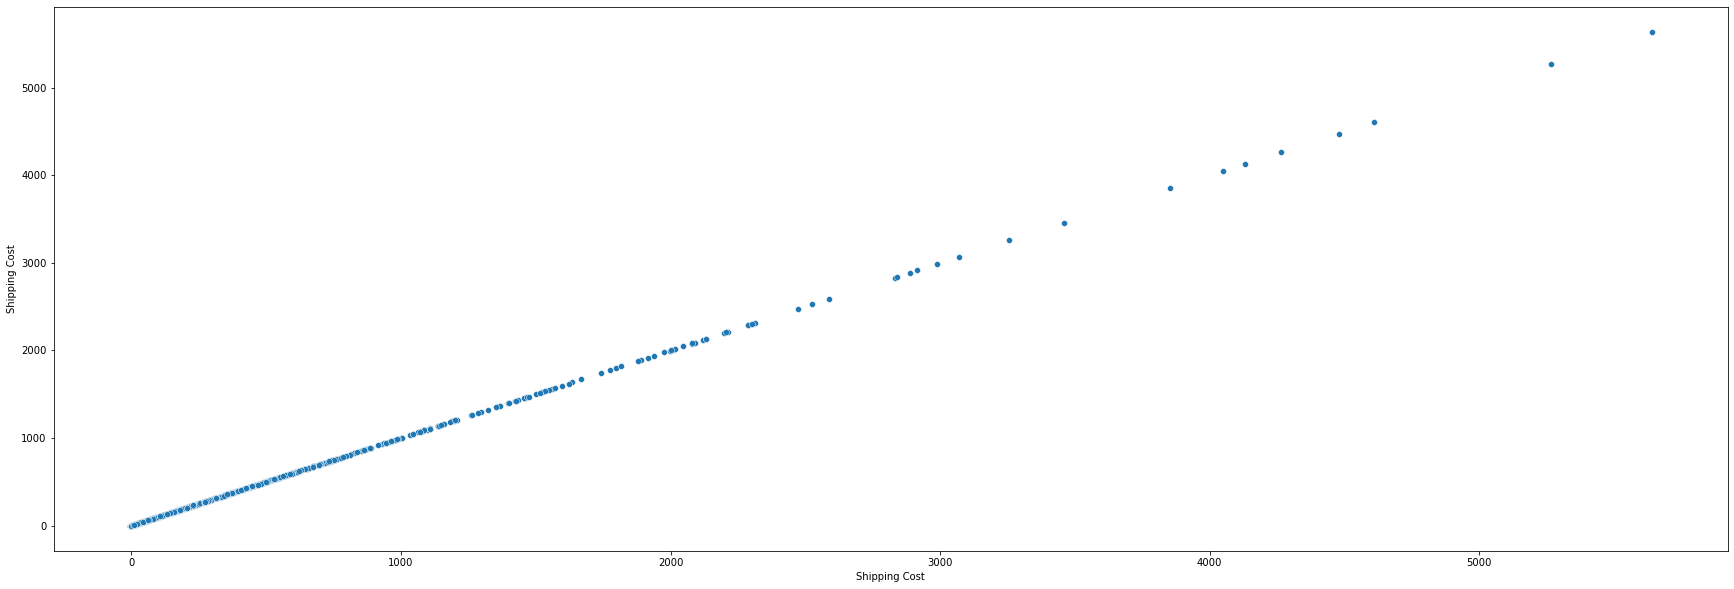

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


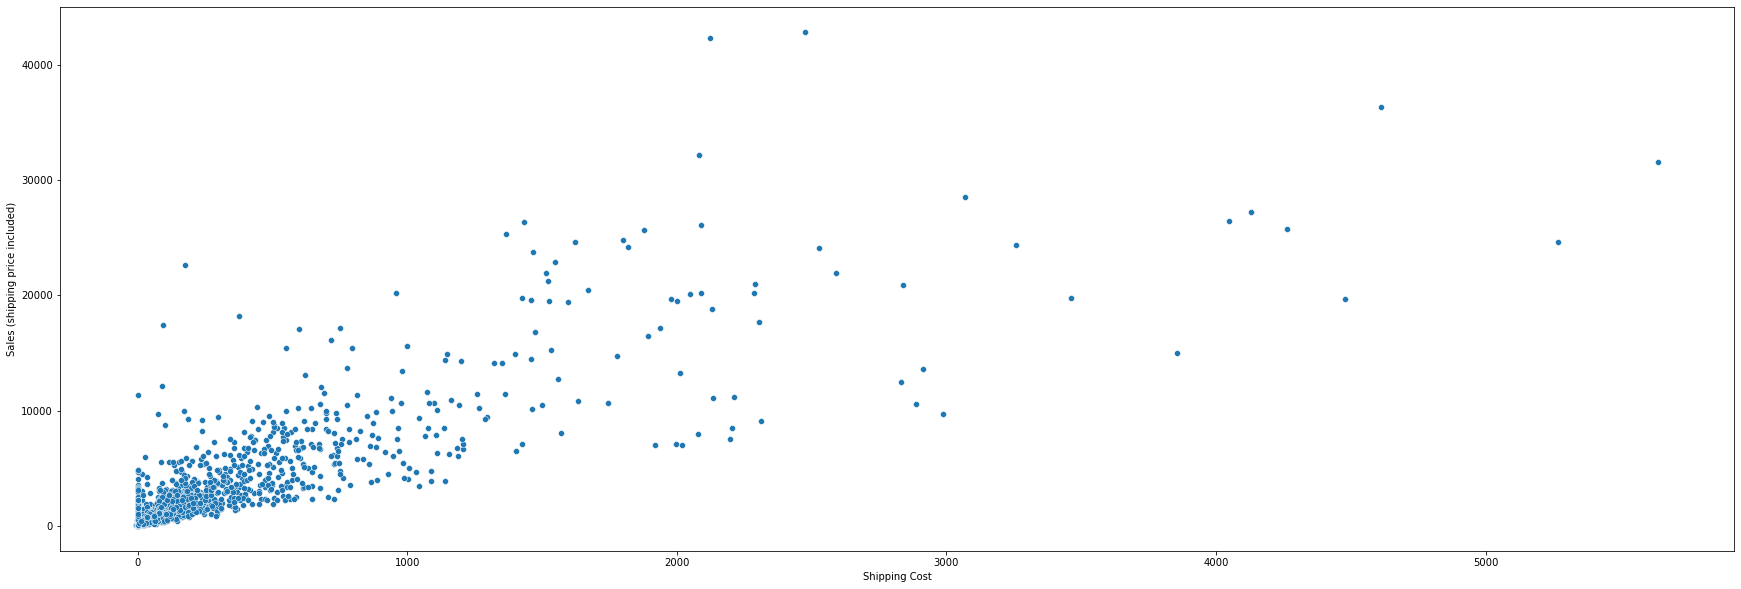

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


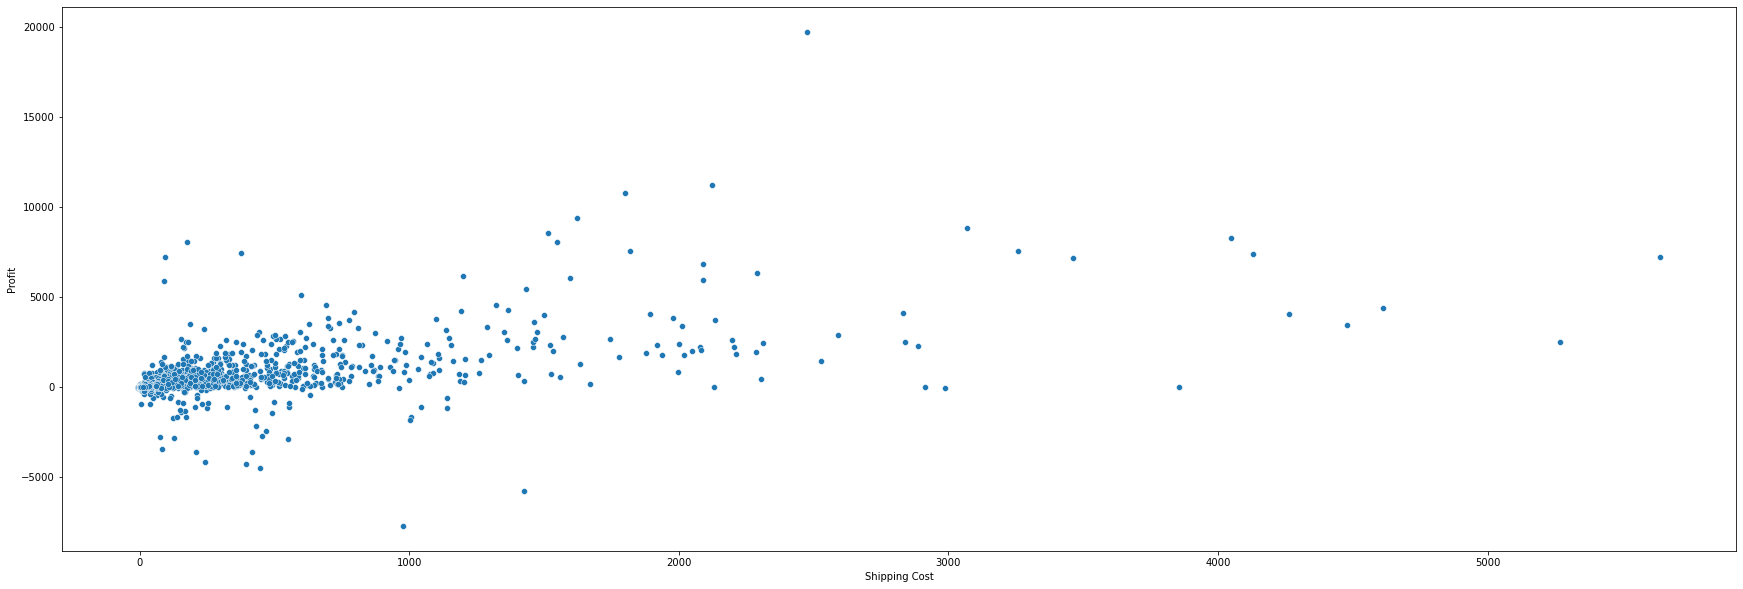

Visualizing Numerical Features with Shipping Cost


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


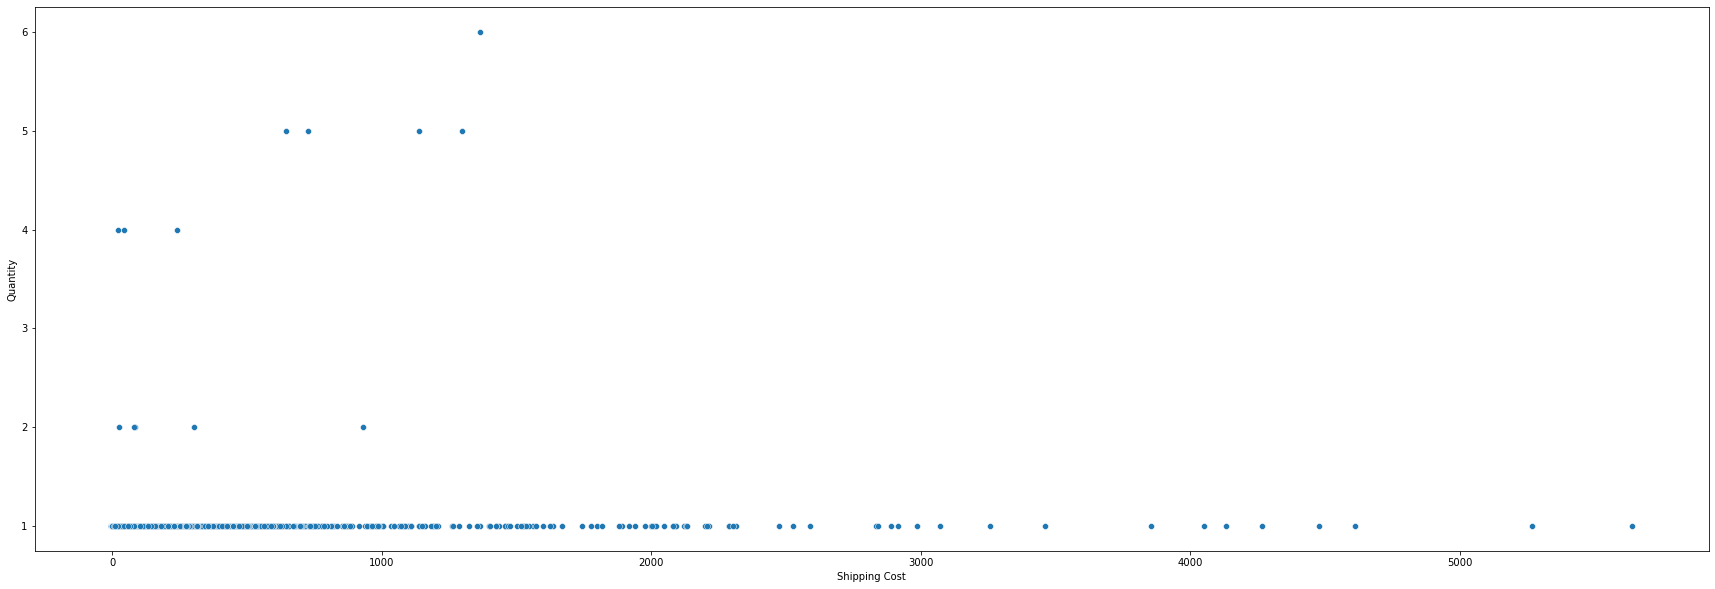

Visualizing Numerical Features with Shipping Cost


In [29]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Shipping Cost'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Shipping Cost")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


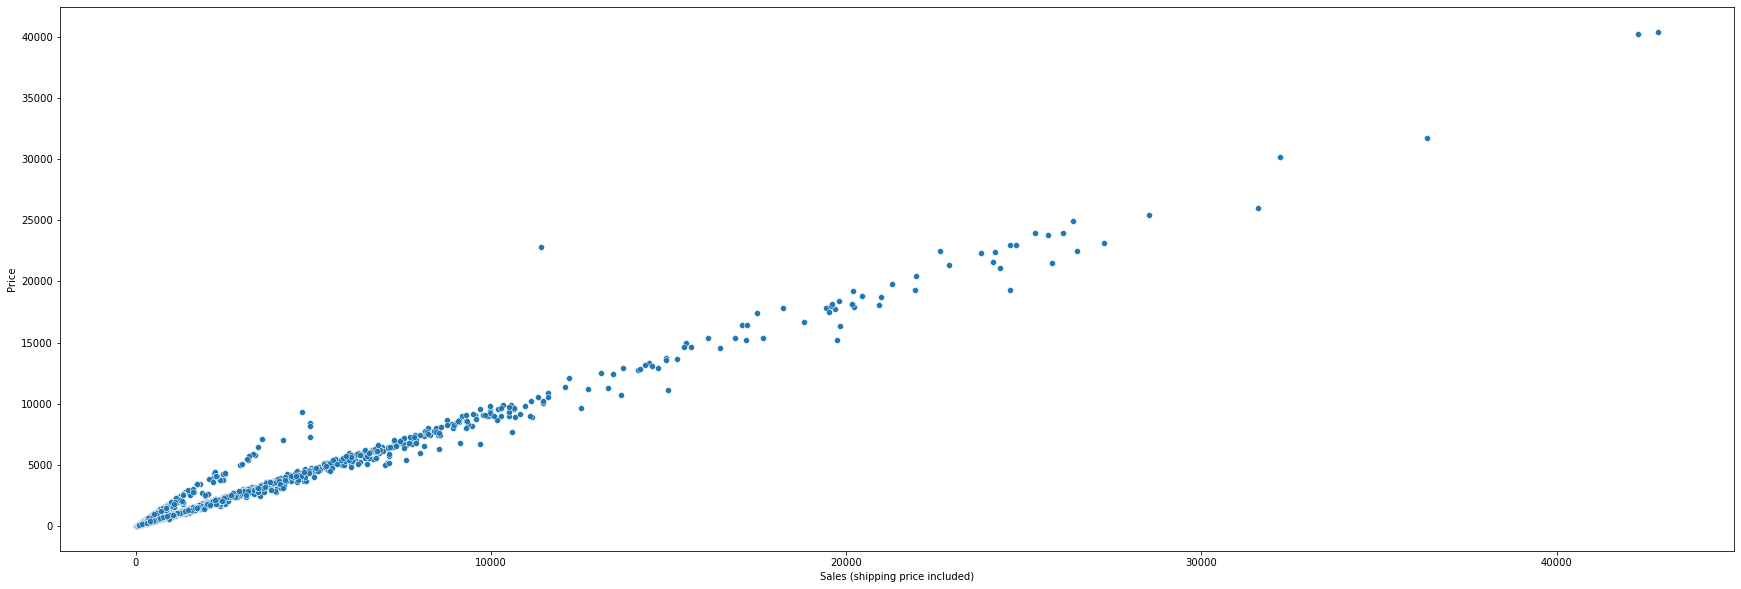

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


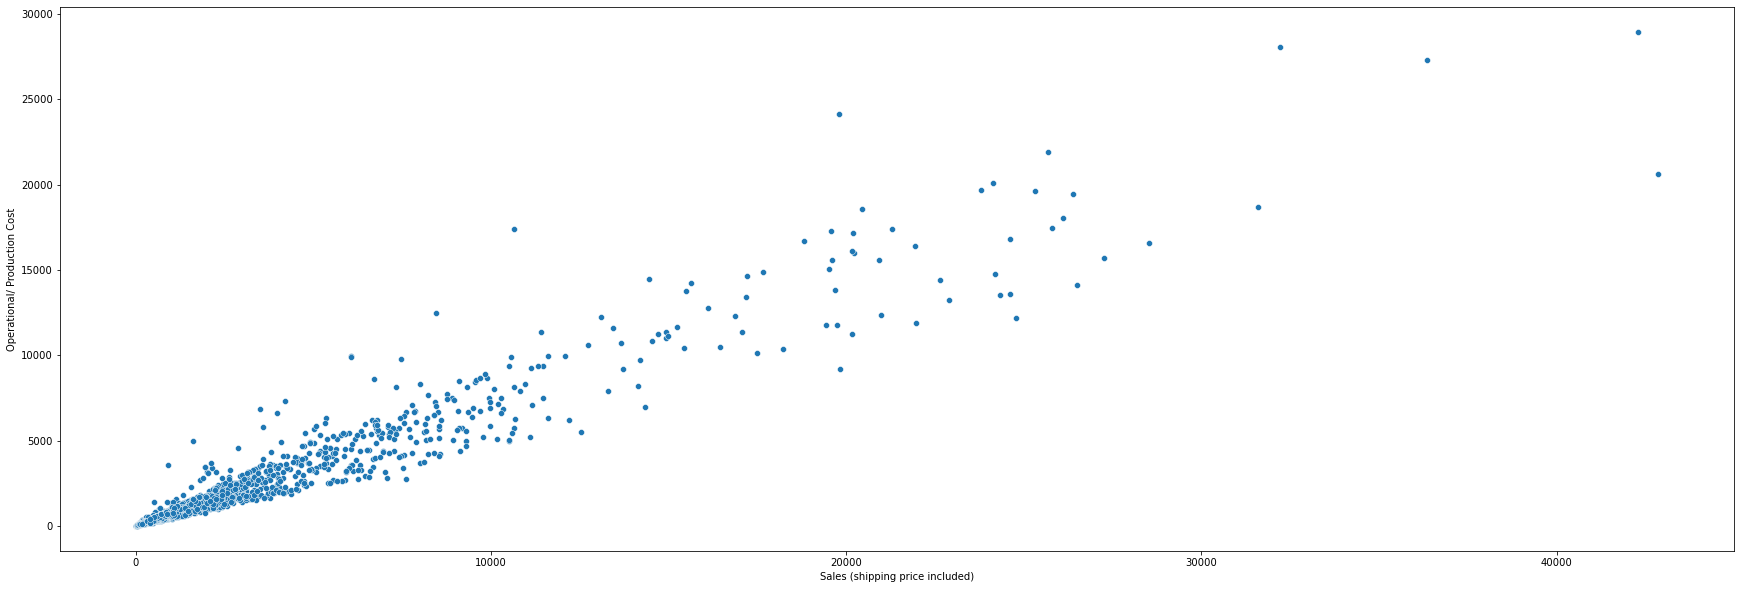

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


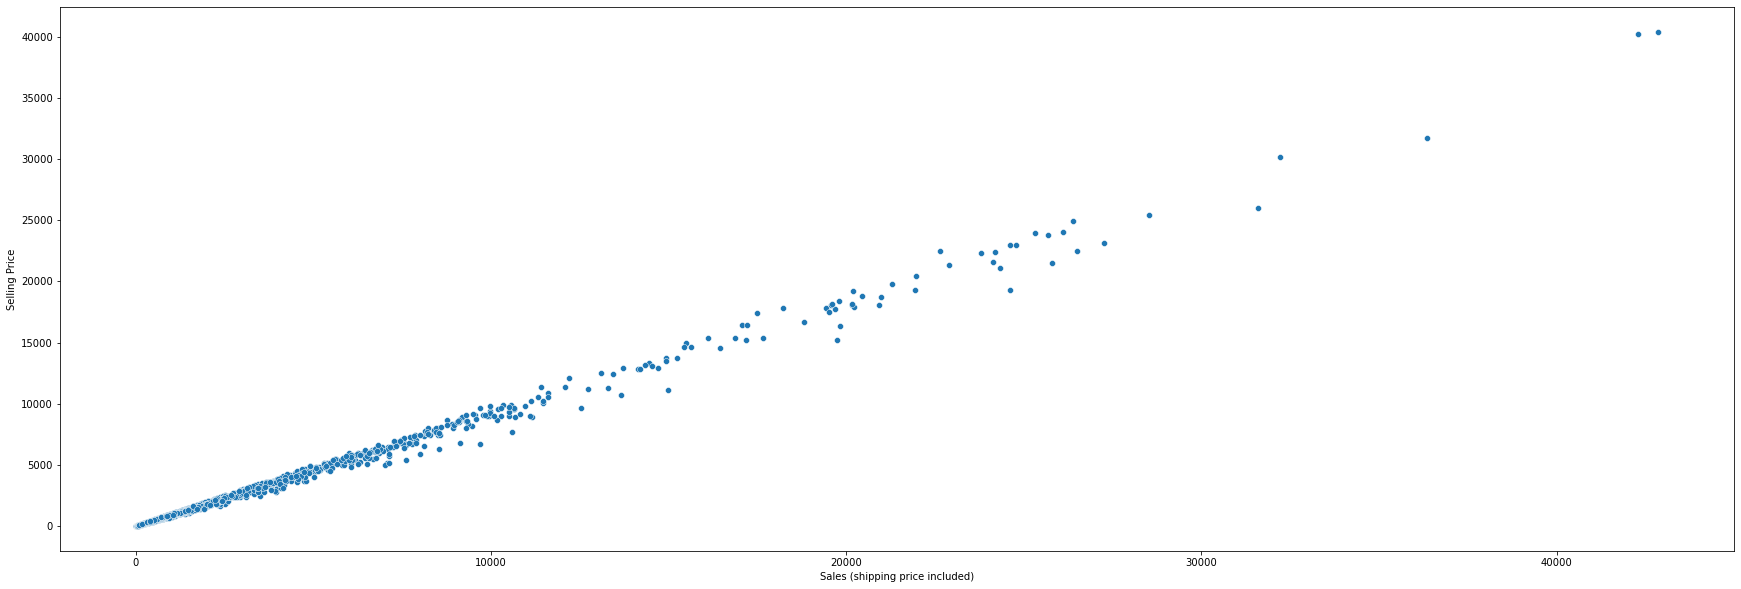

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


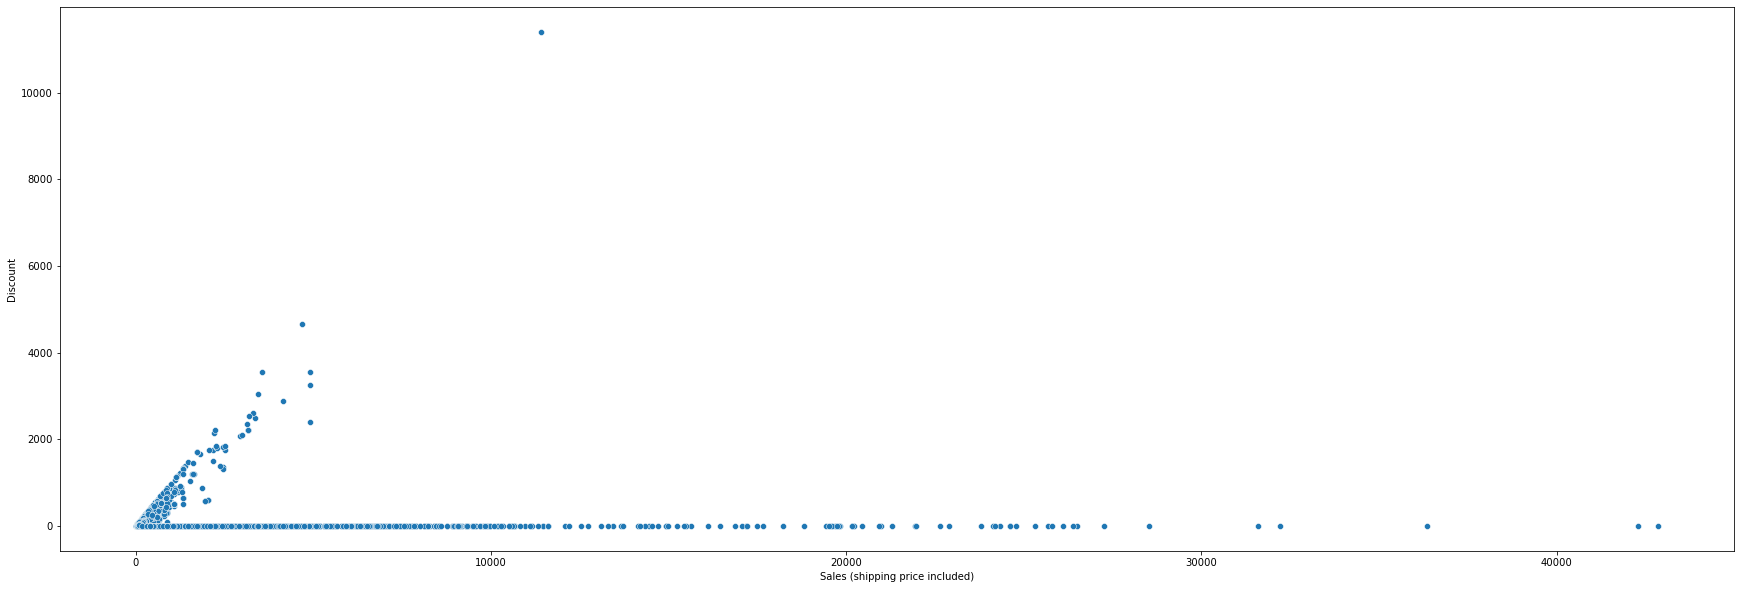

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


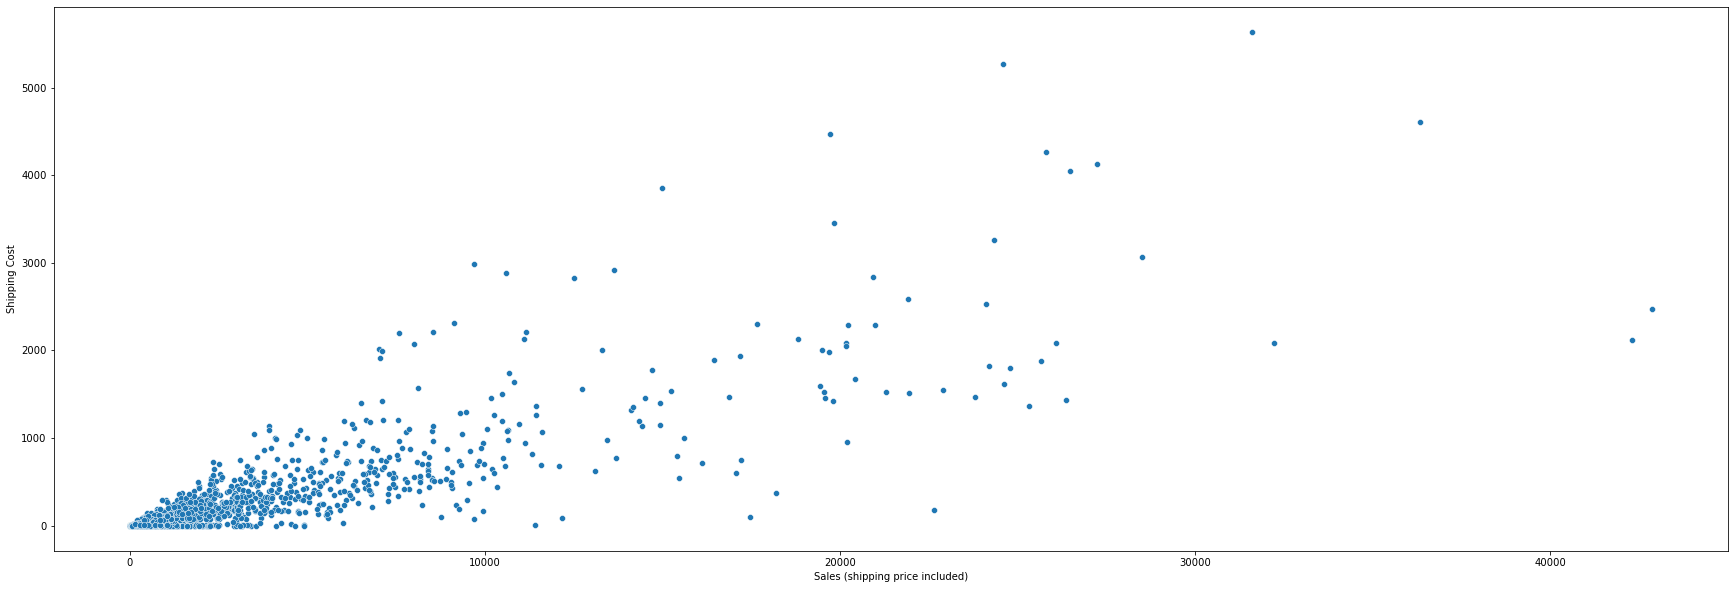

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


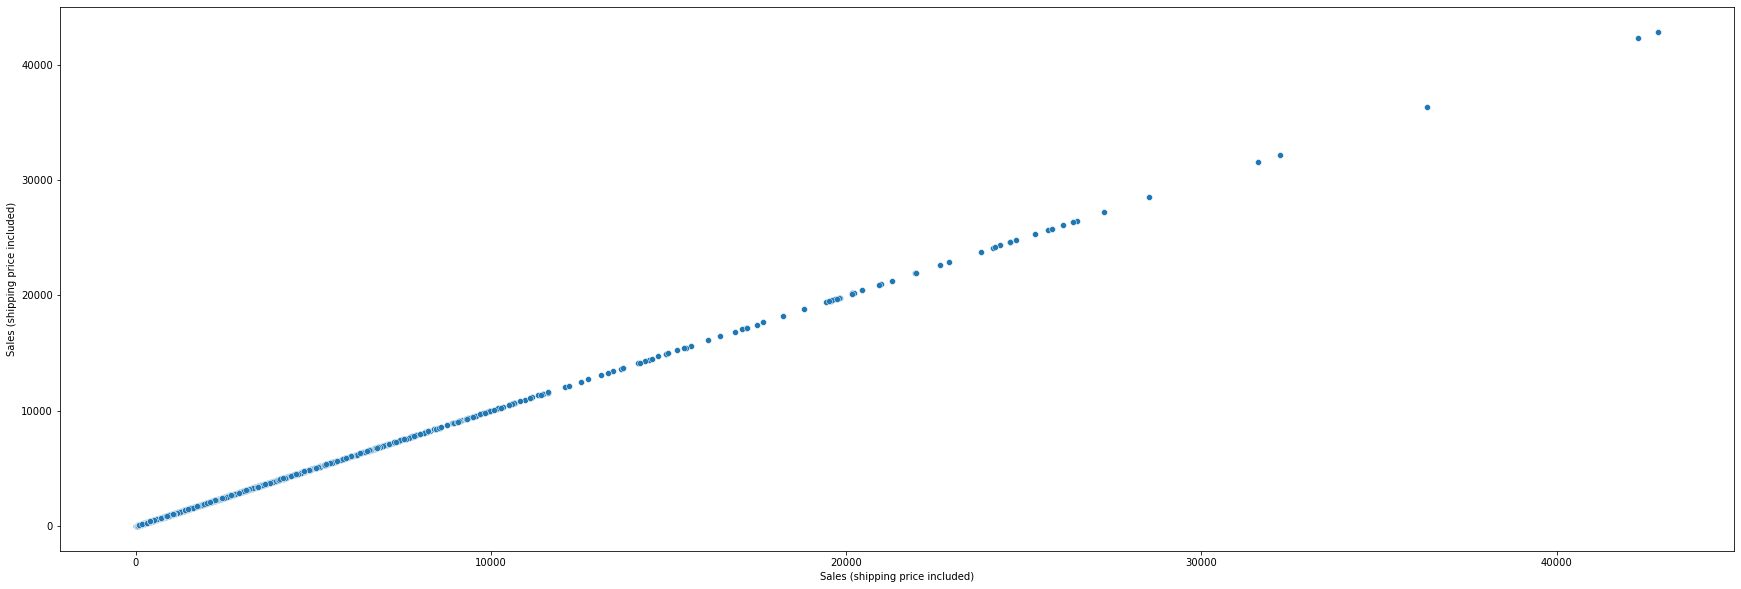

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


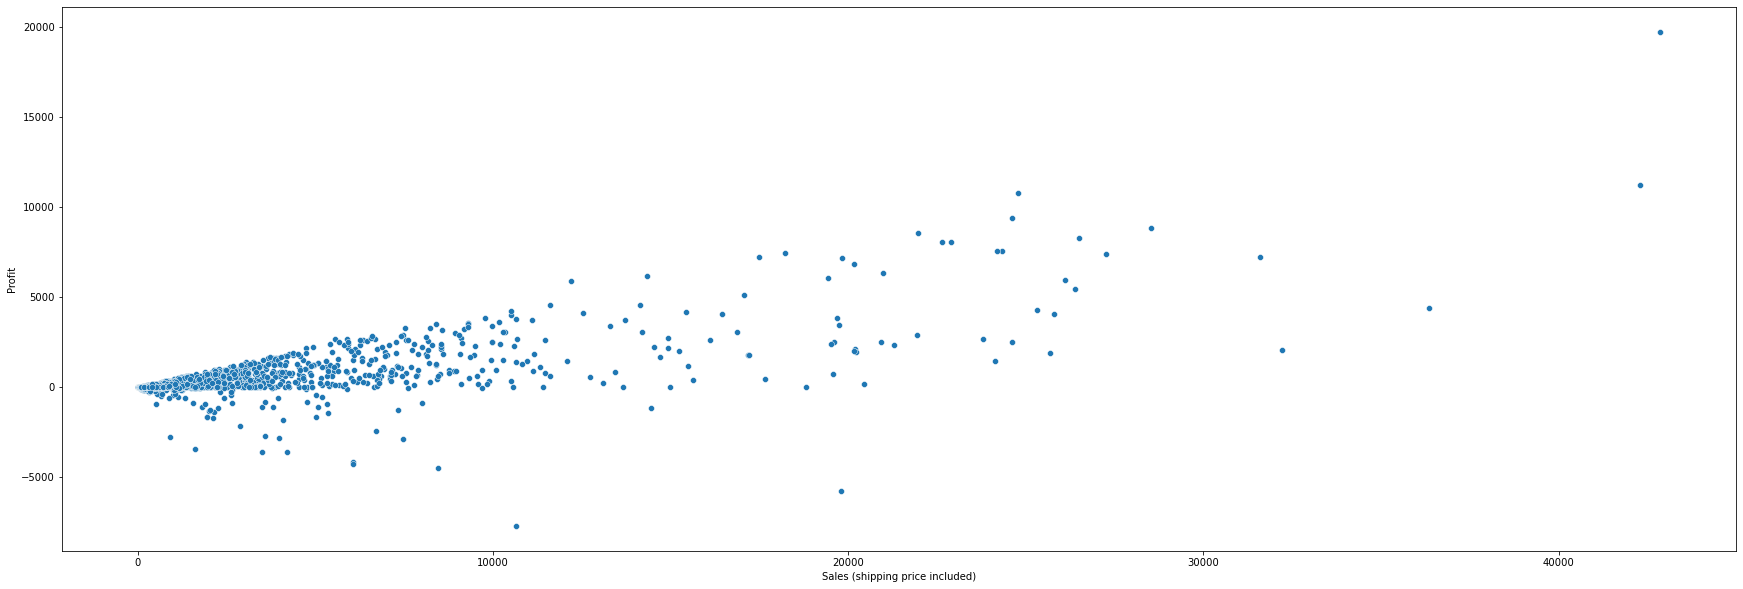

Visualizing Numerical Features with Sales (shipping price included)


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


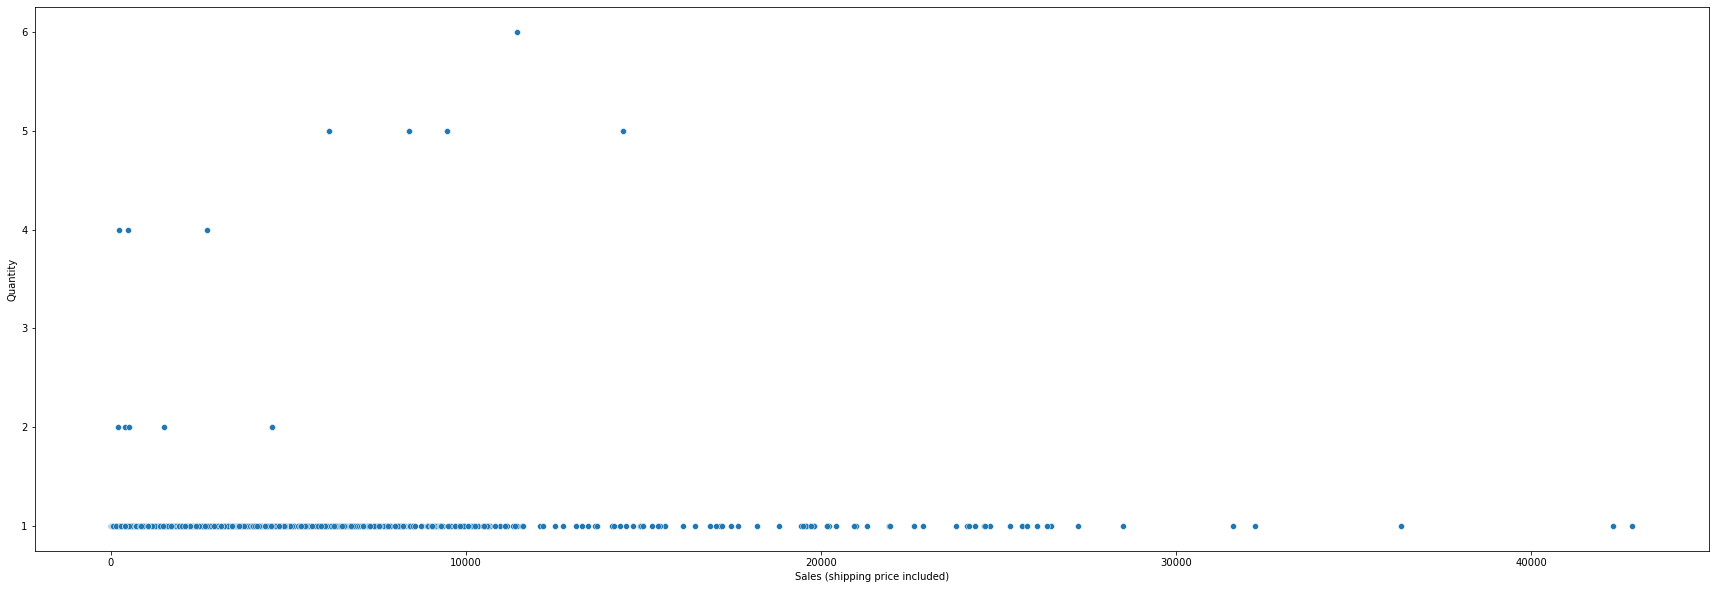

Visualizing Numerical Features with Sales (shipping price included)


In [30]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Sales (shipping price included)'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Sales (shipping price included)")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


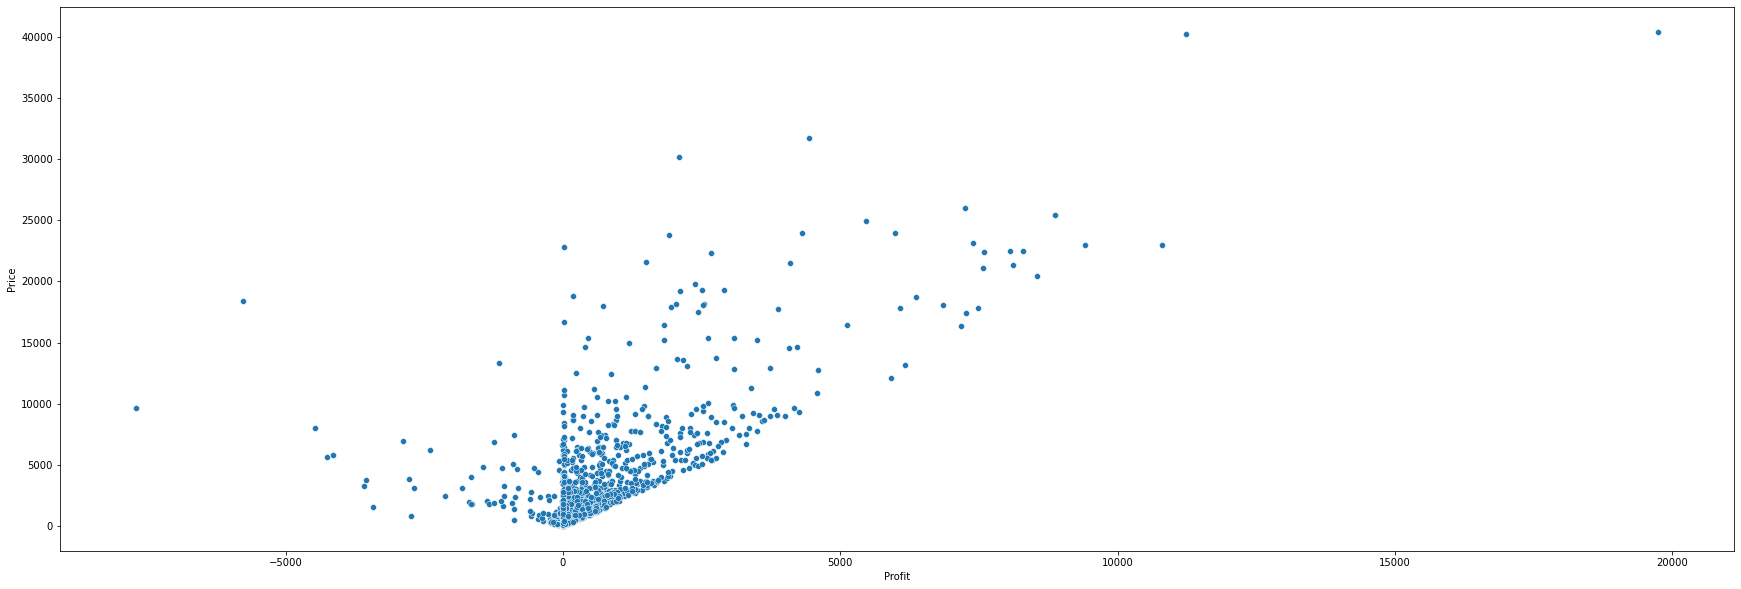

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


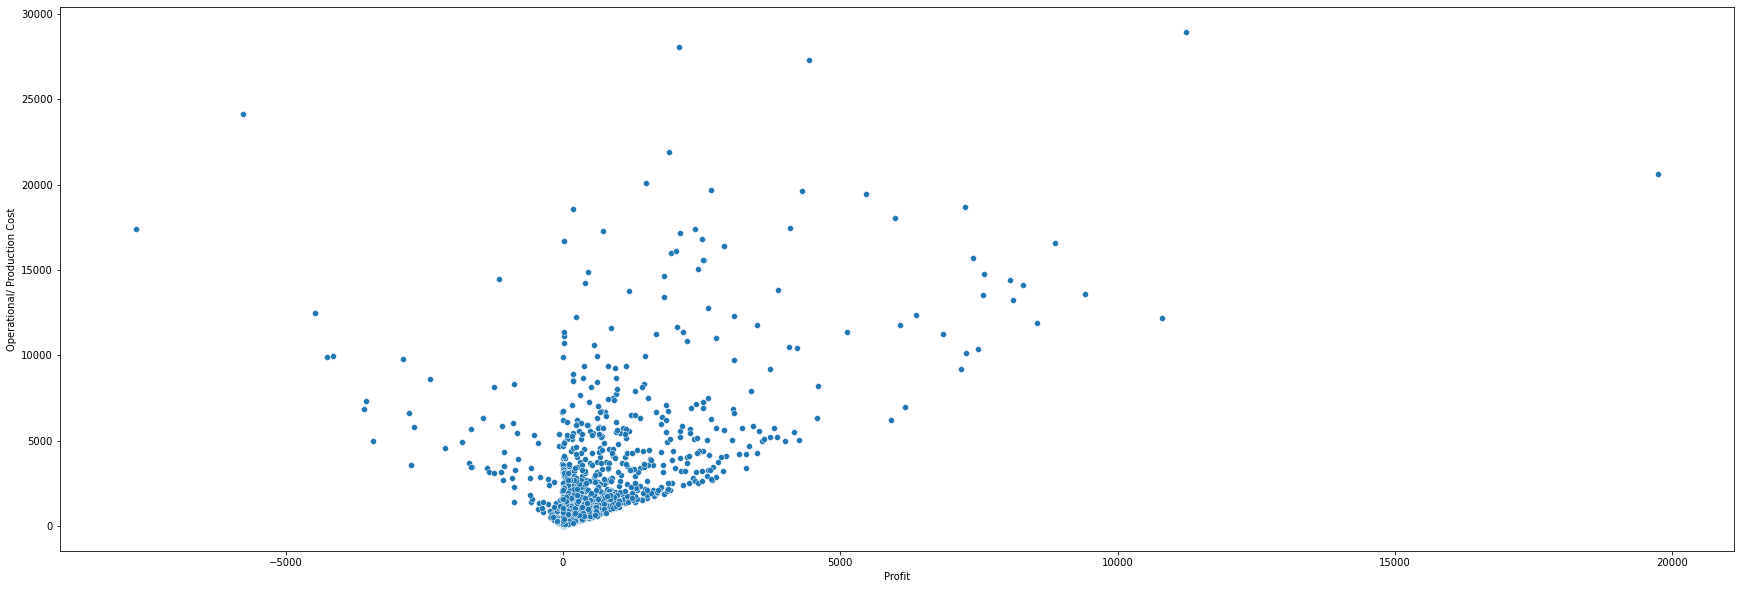

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


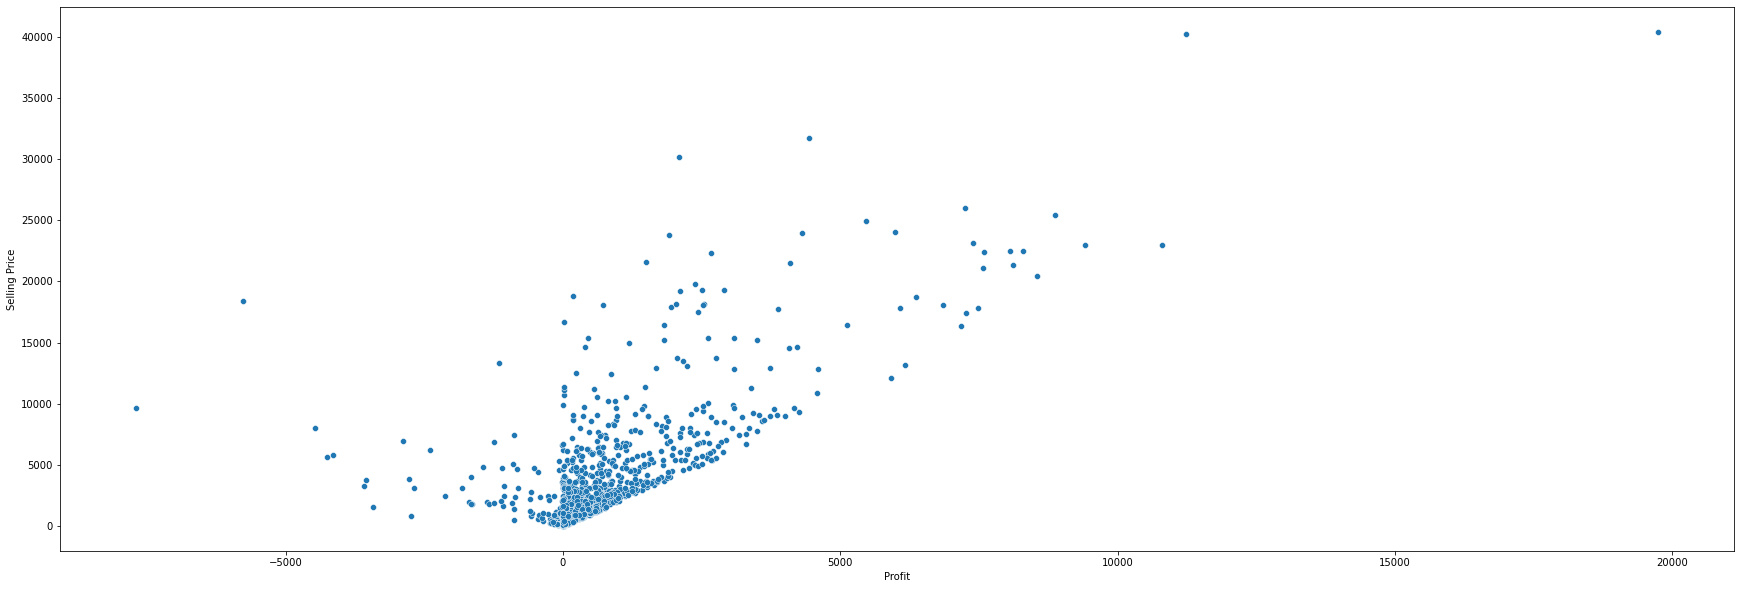

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


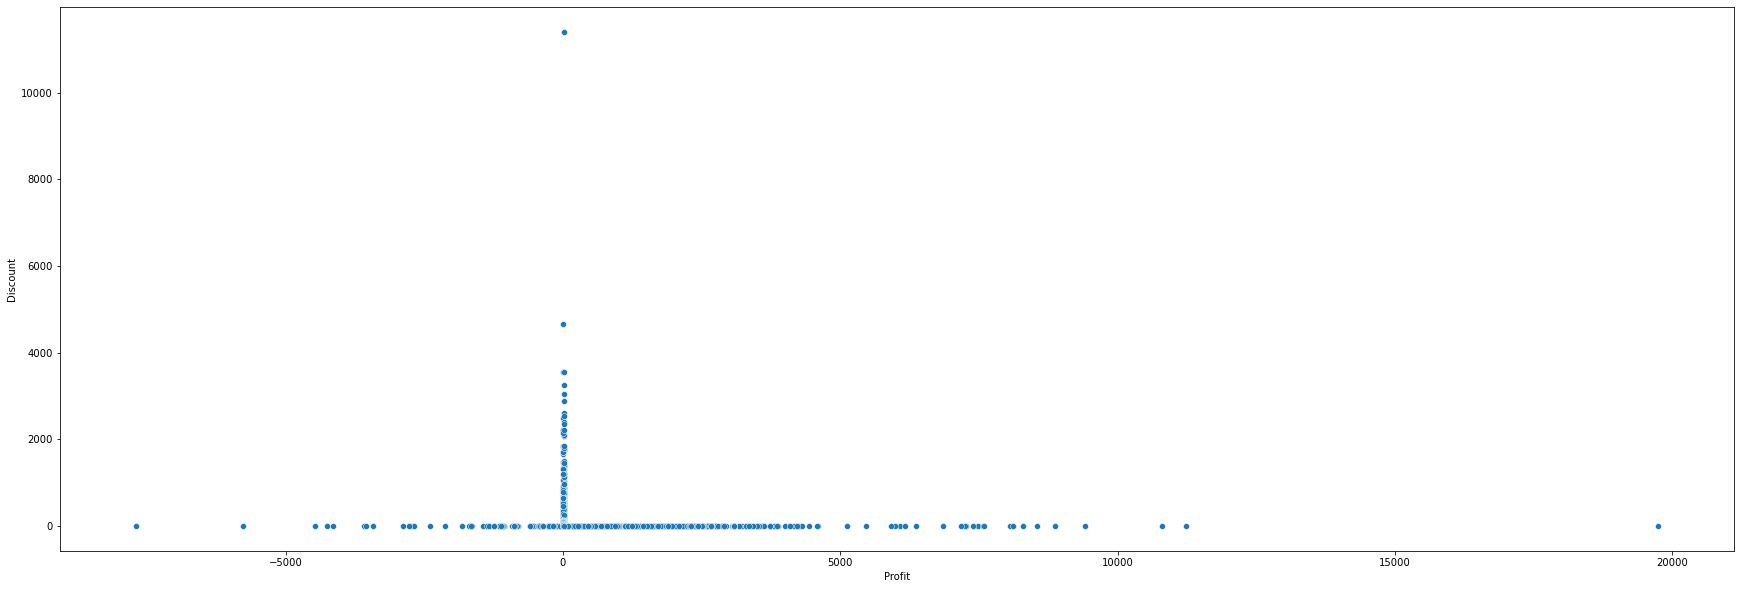

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


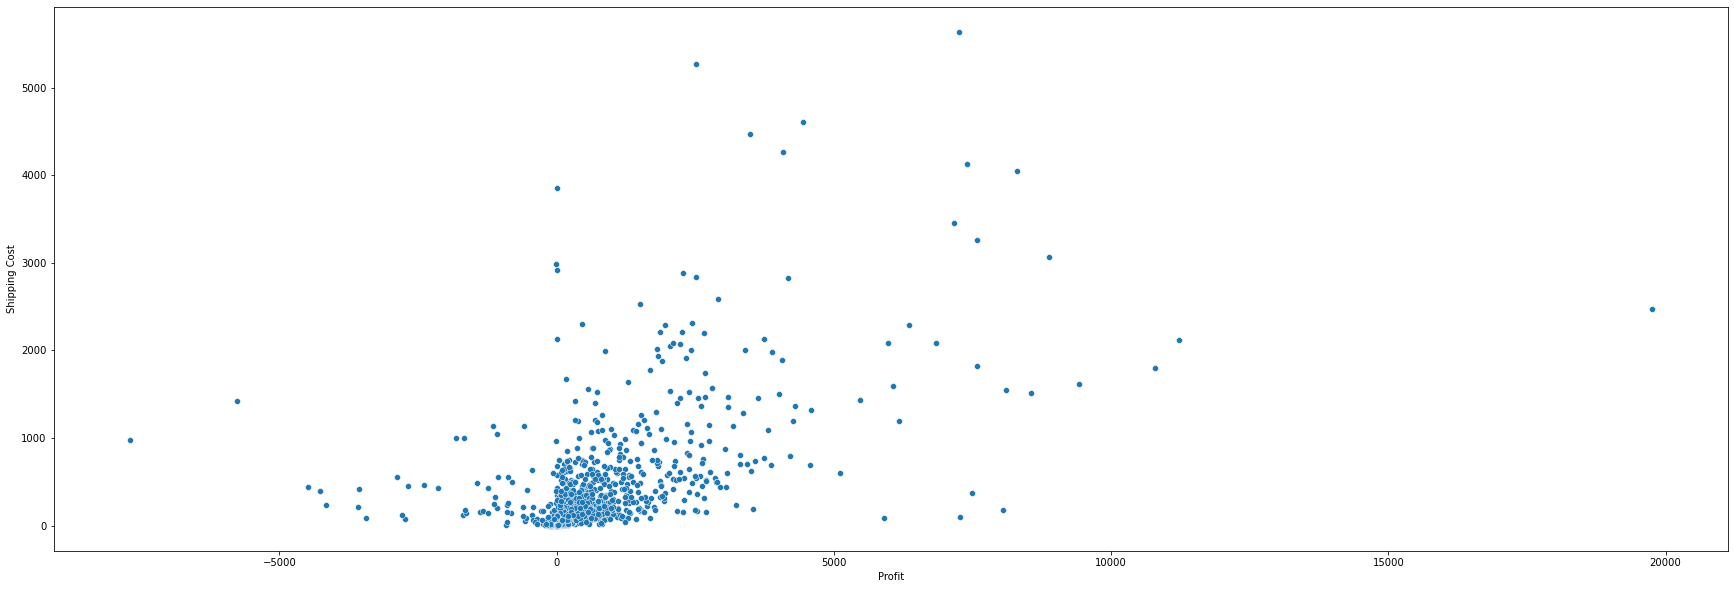

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


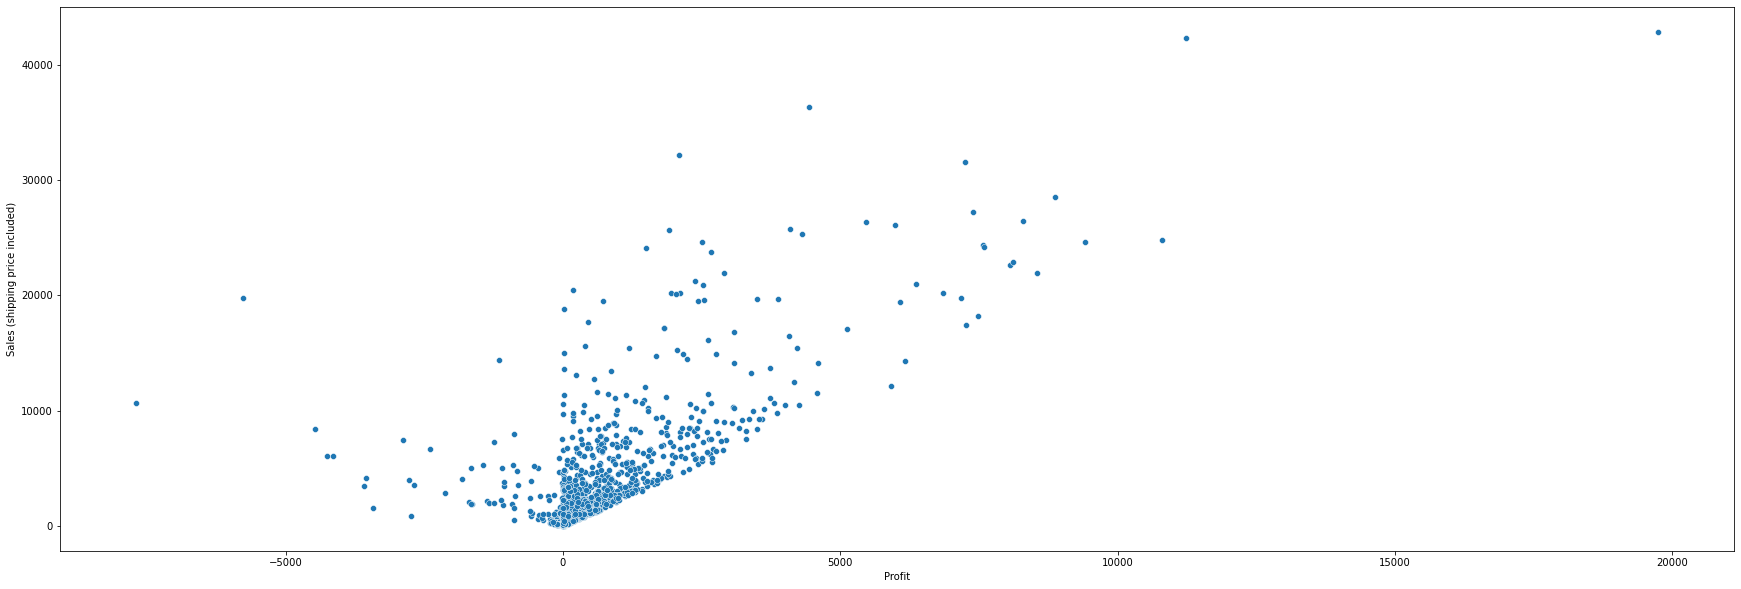

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


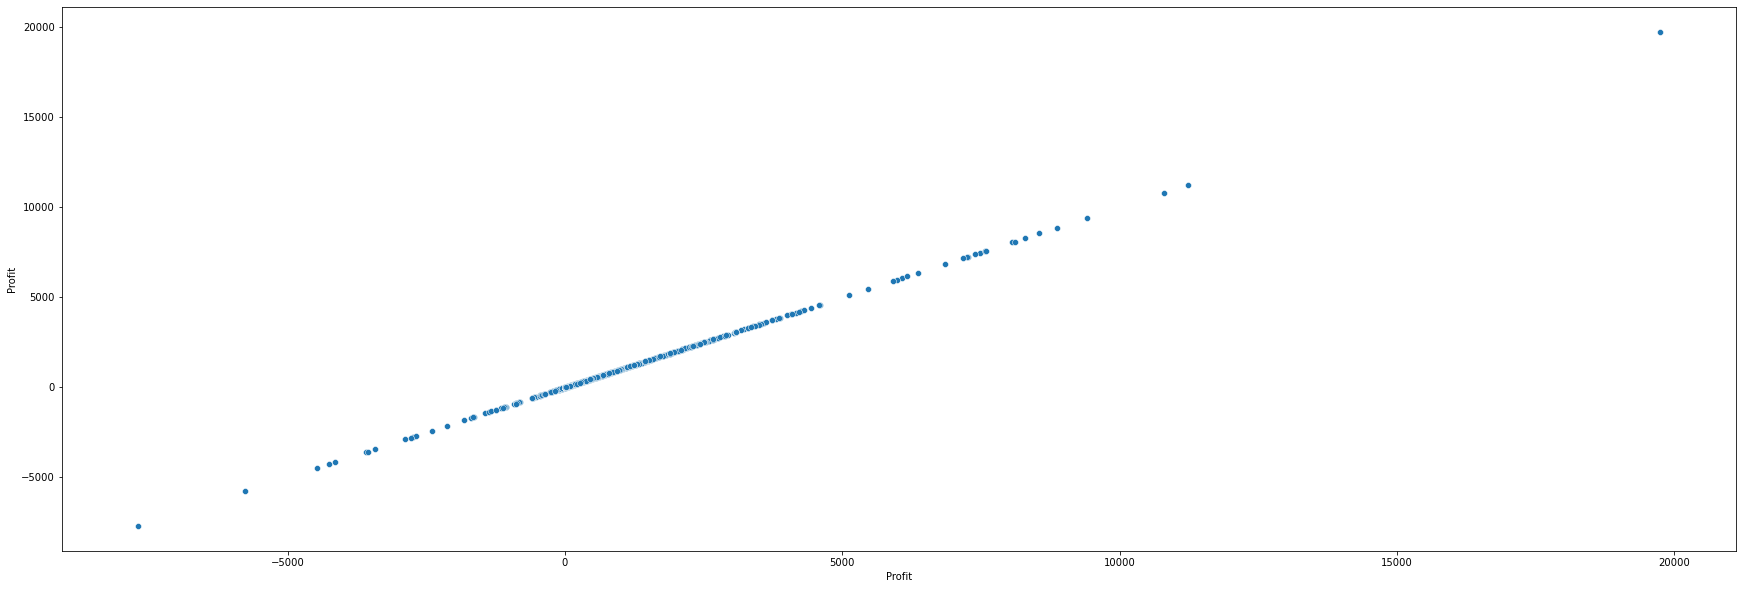

Visualizing Numerical Features with Profit


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


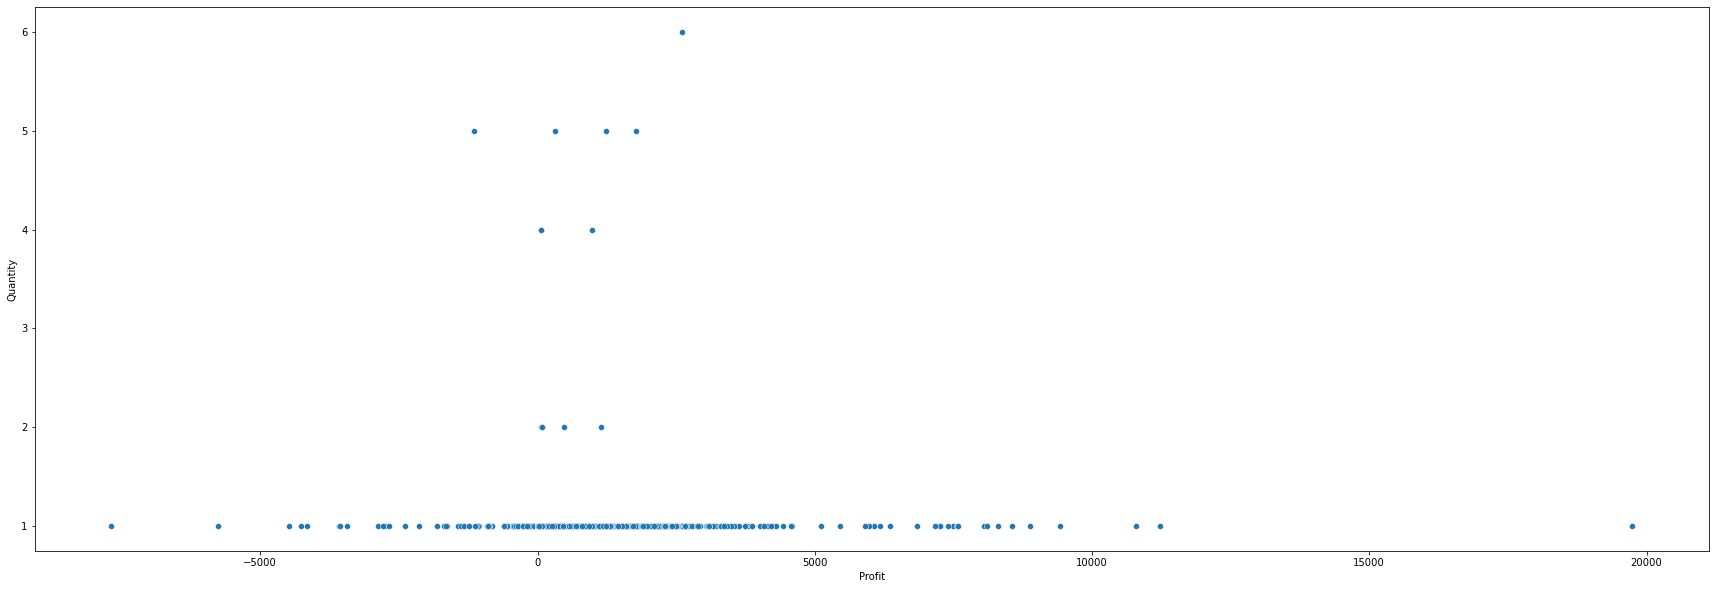

Visualizing Numerical Features with Profit


In [31]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Profit'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Profit")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


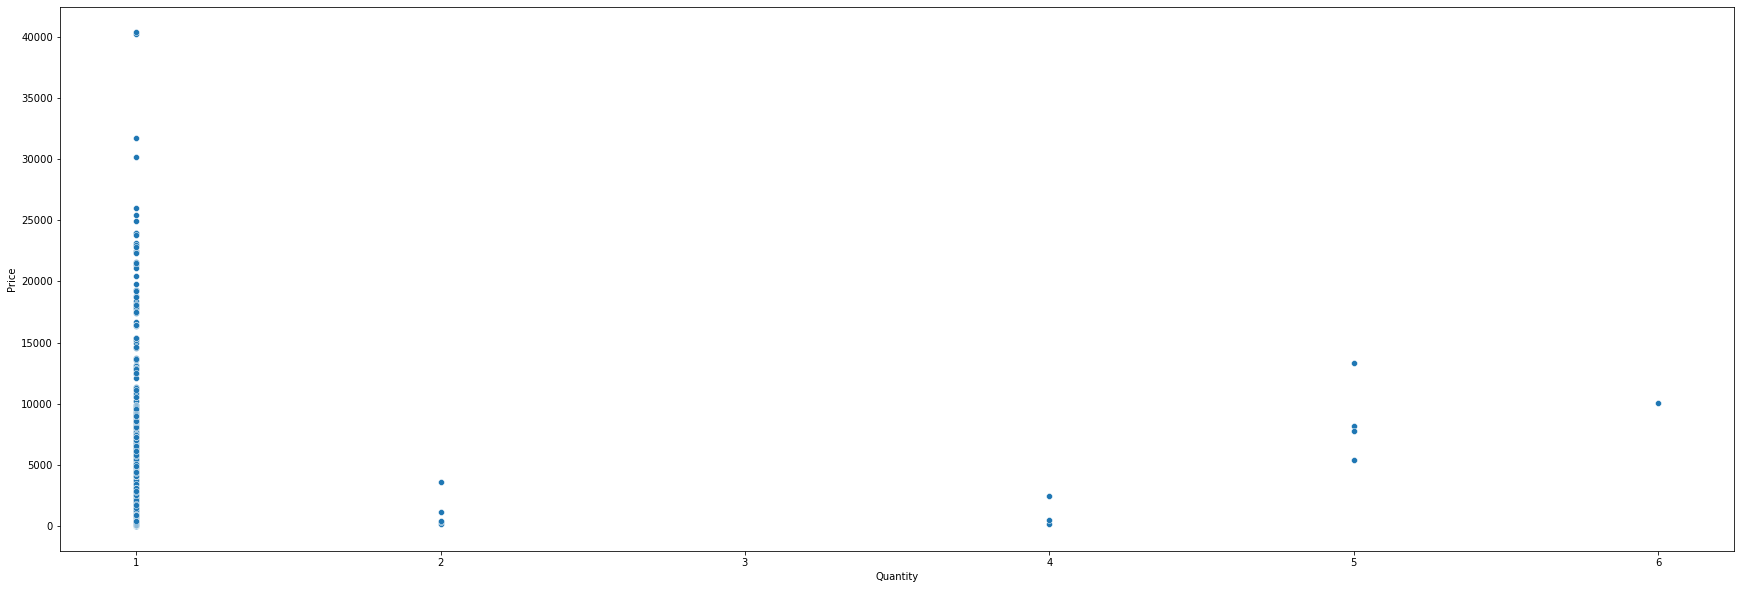

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


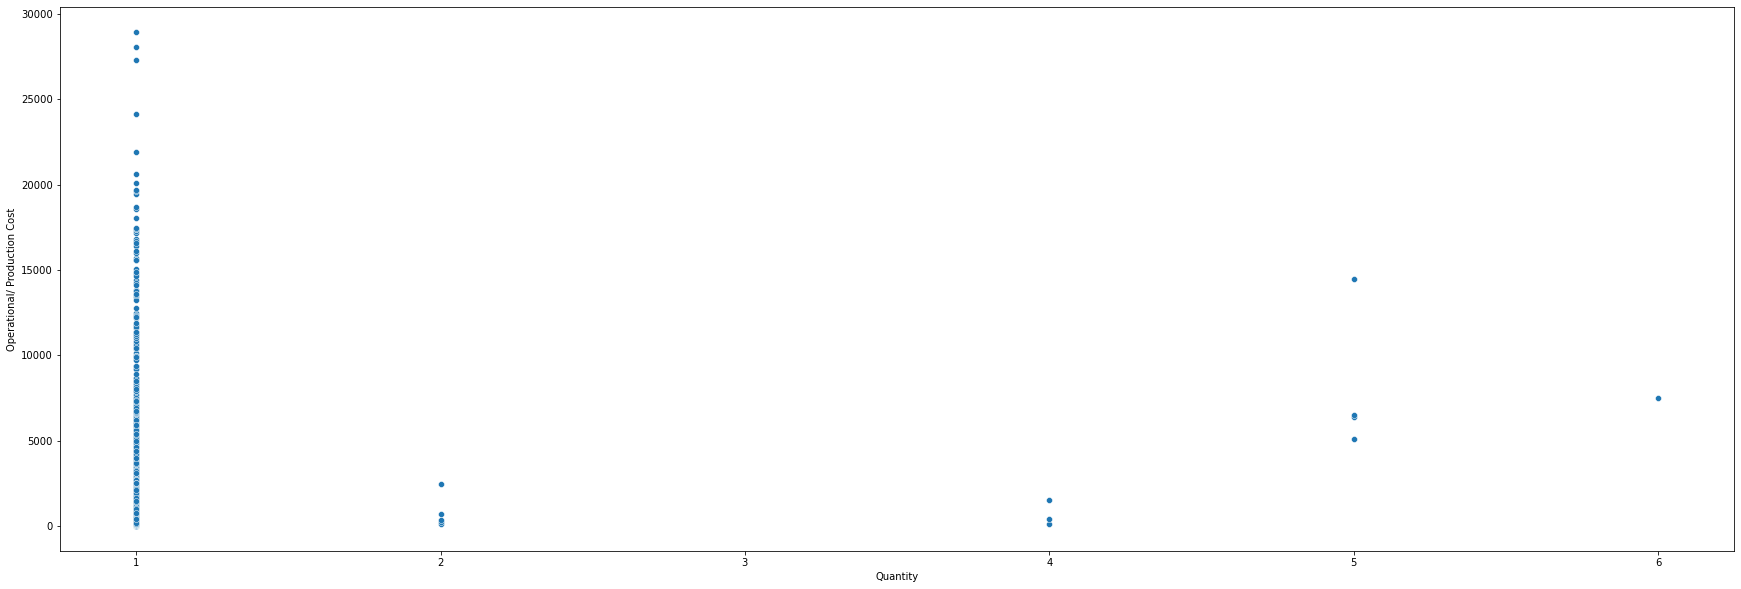

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


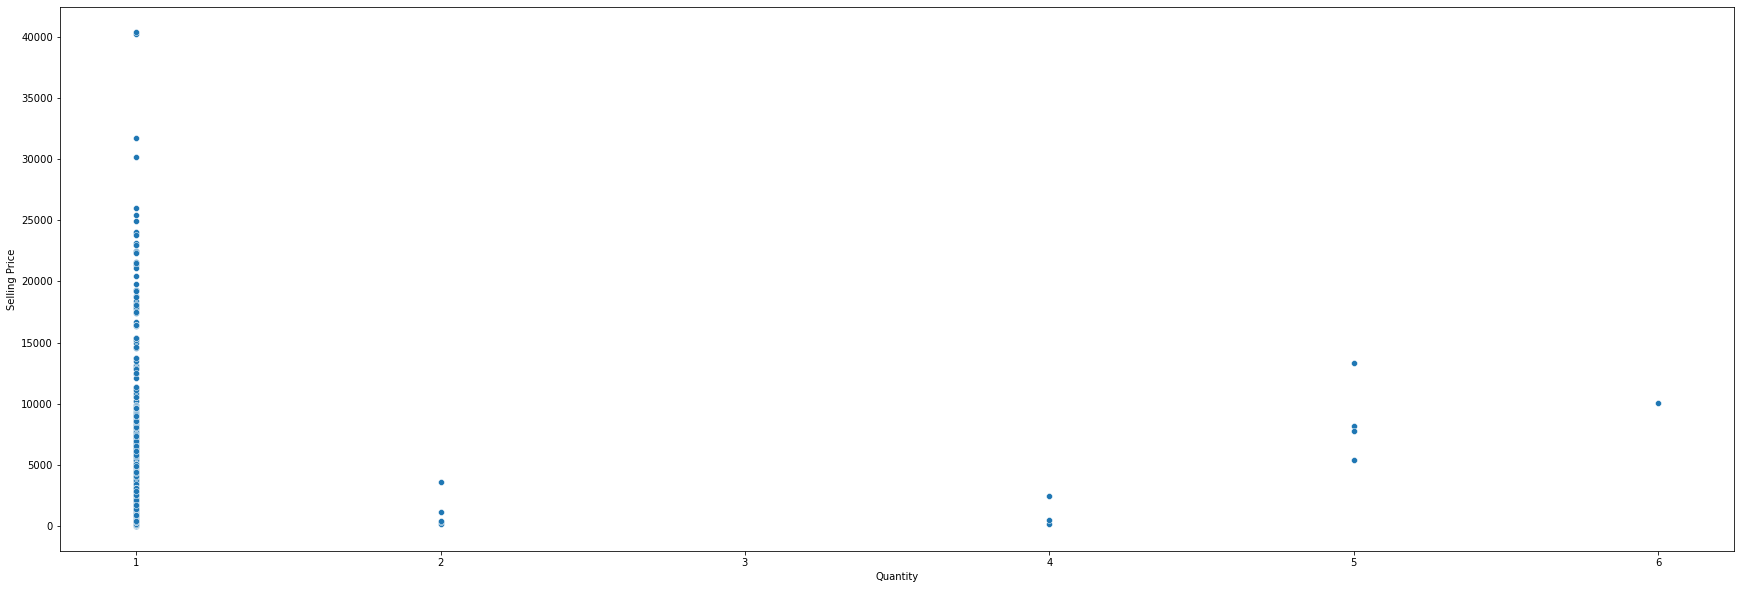

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


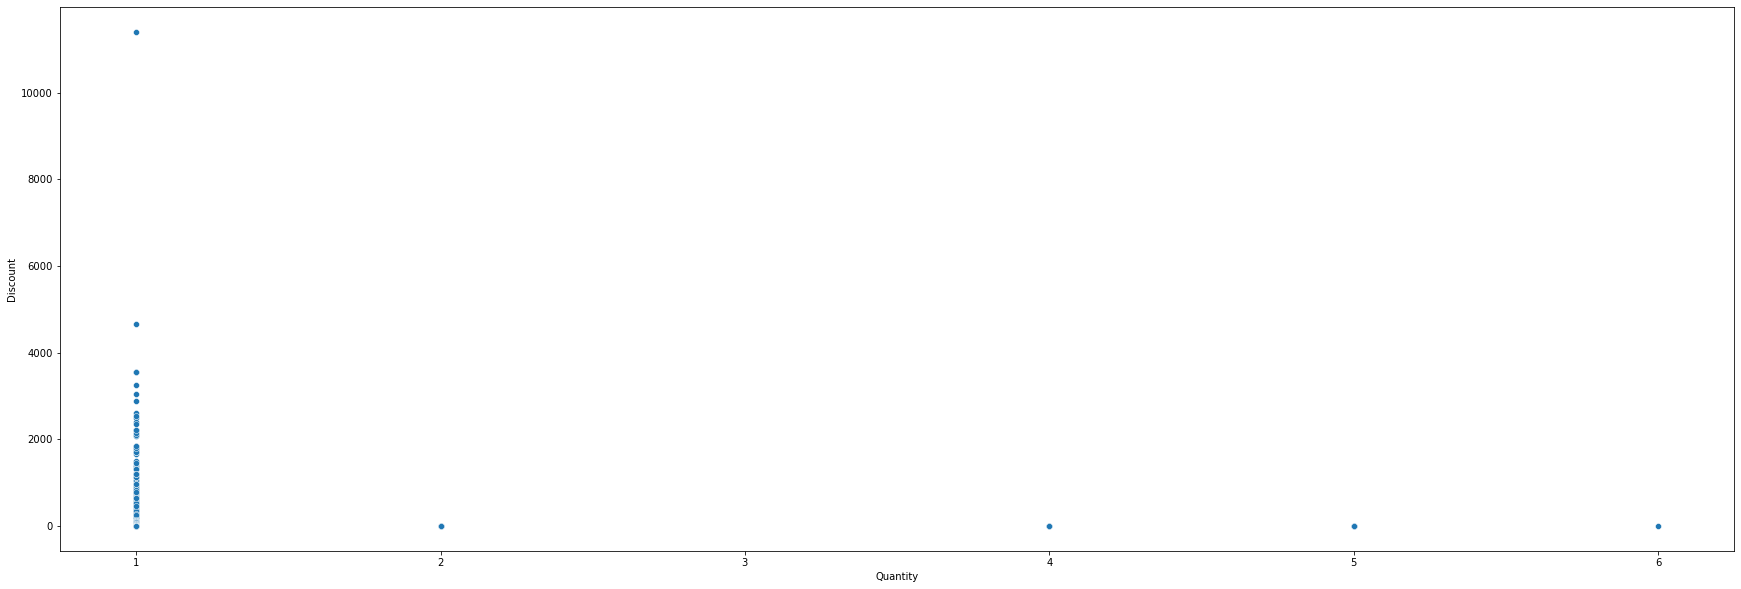

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


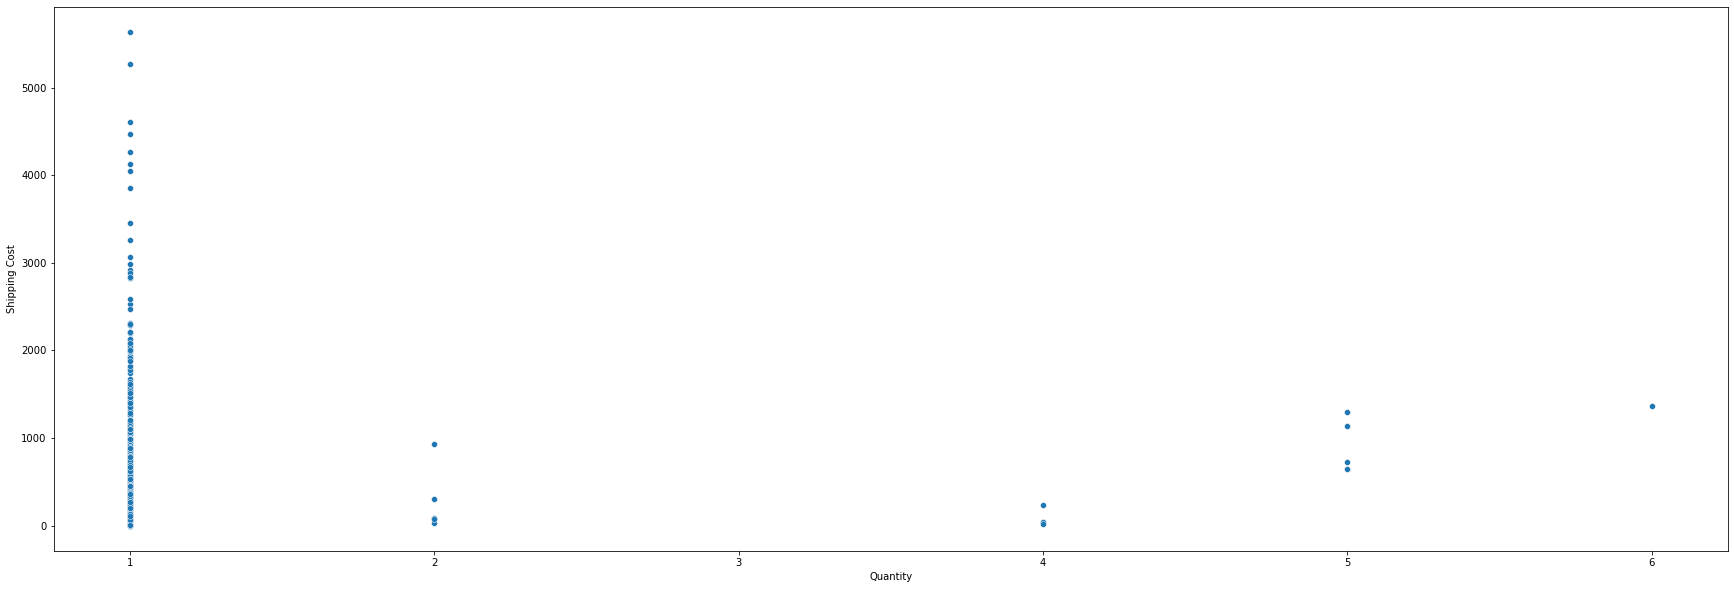

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


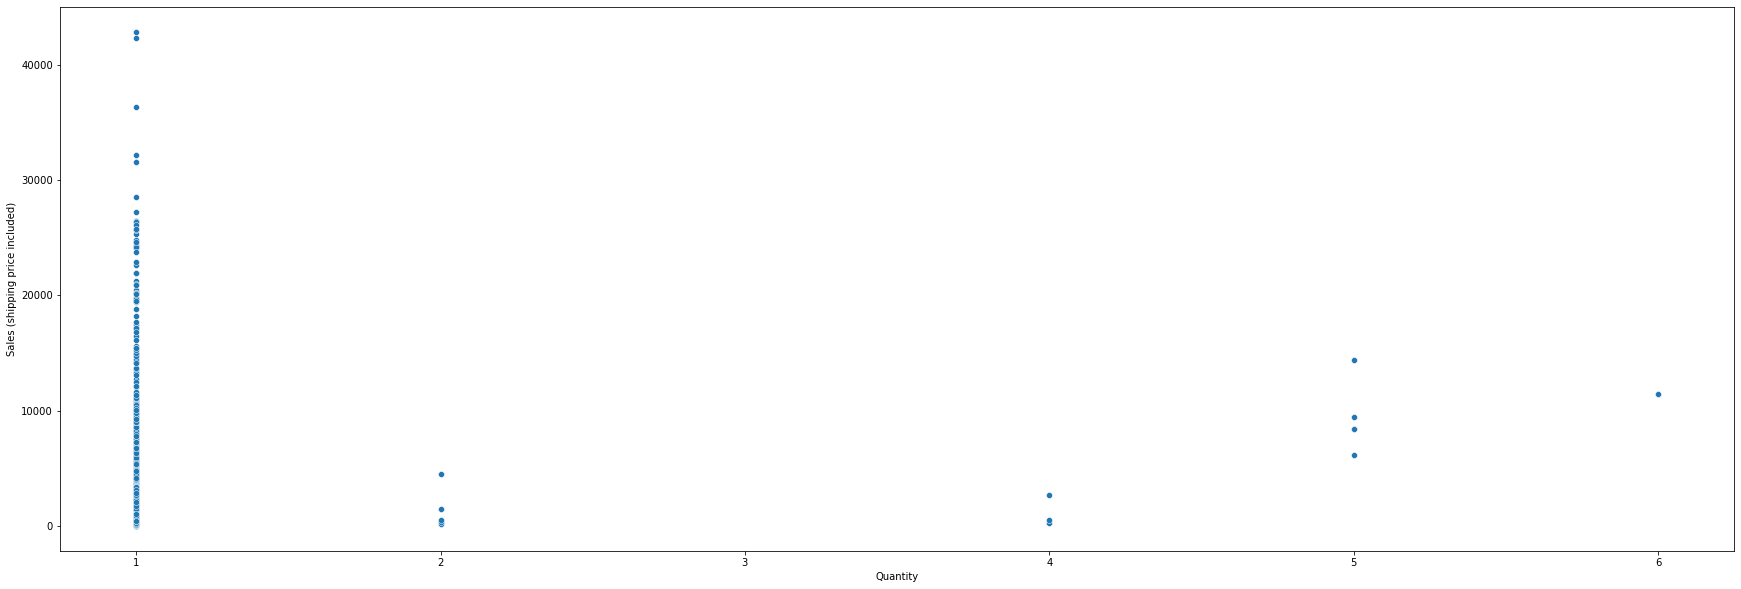

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


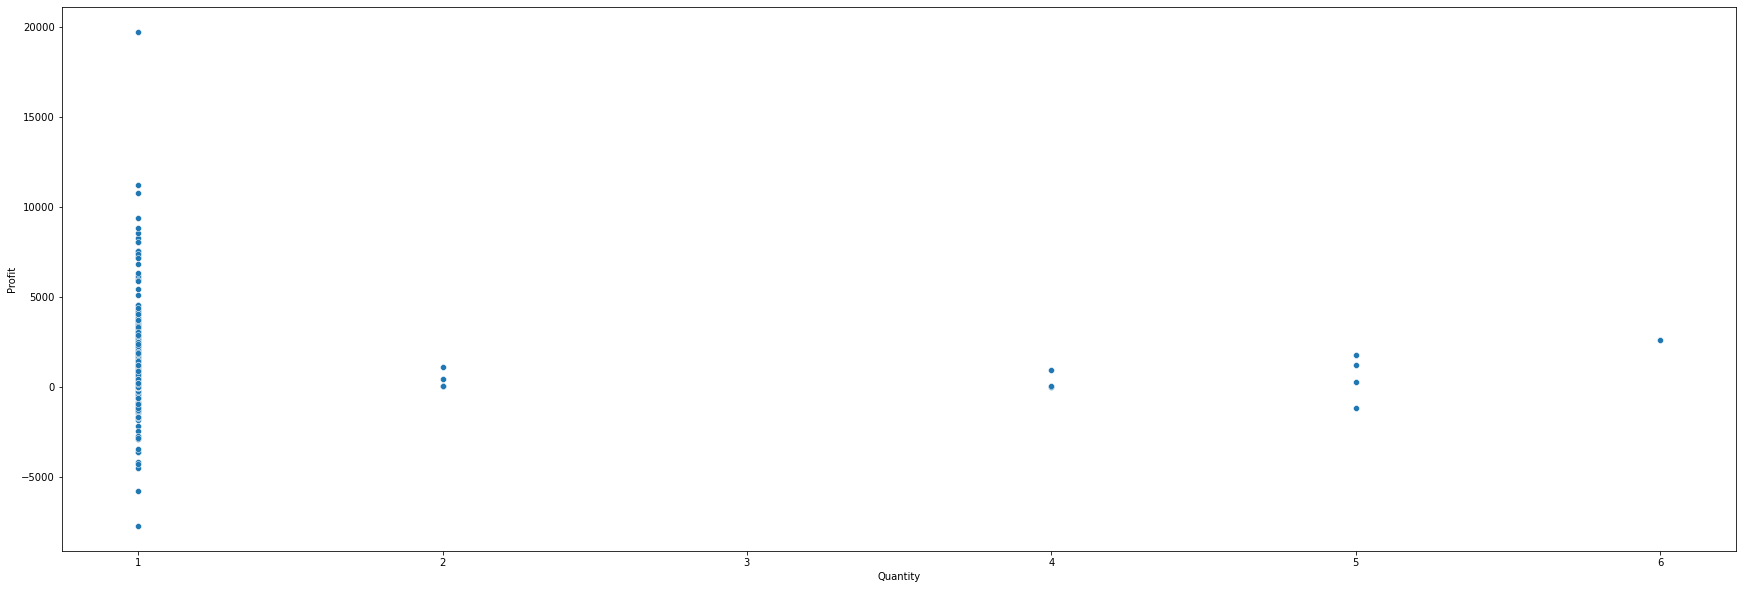

Visualizing Numerical Features with Quantity


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


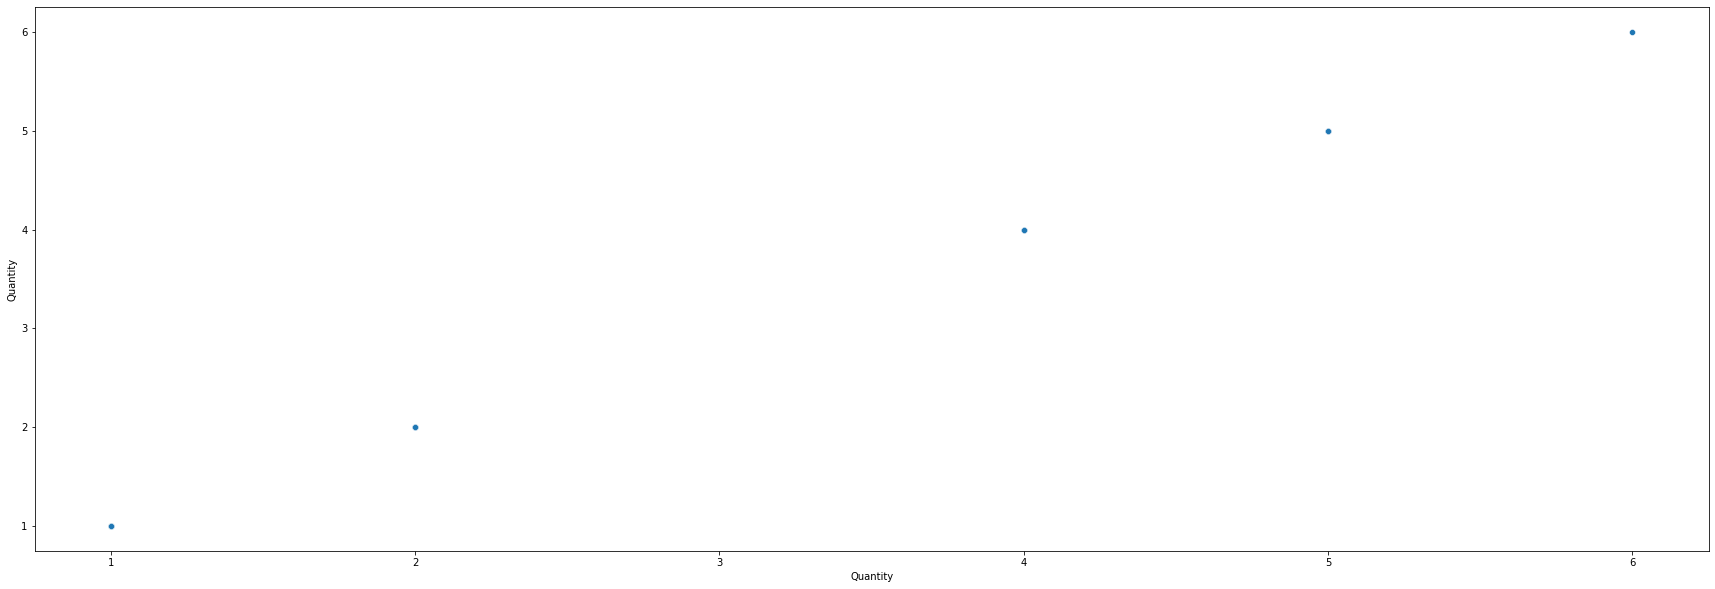

Visualizing Numerical Features with Quantity


In [32]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(ds['Quantity'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Quantity")

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


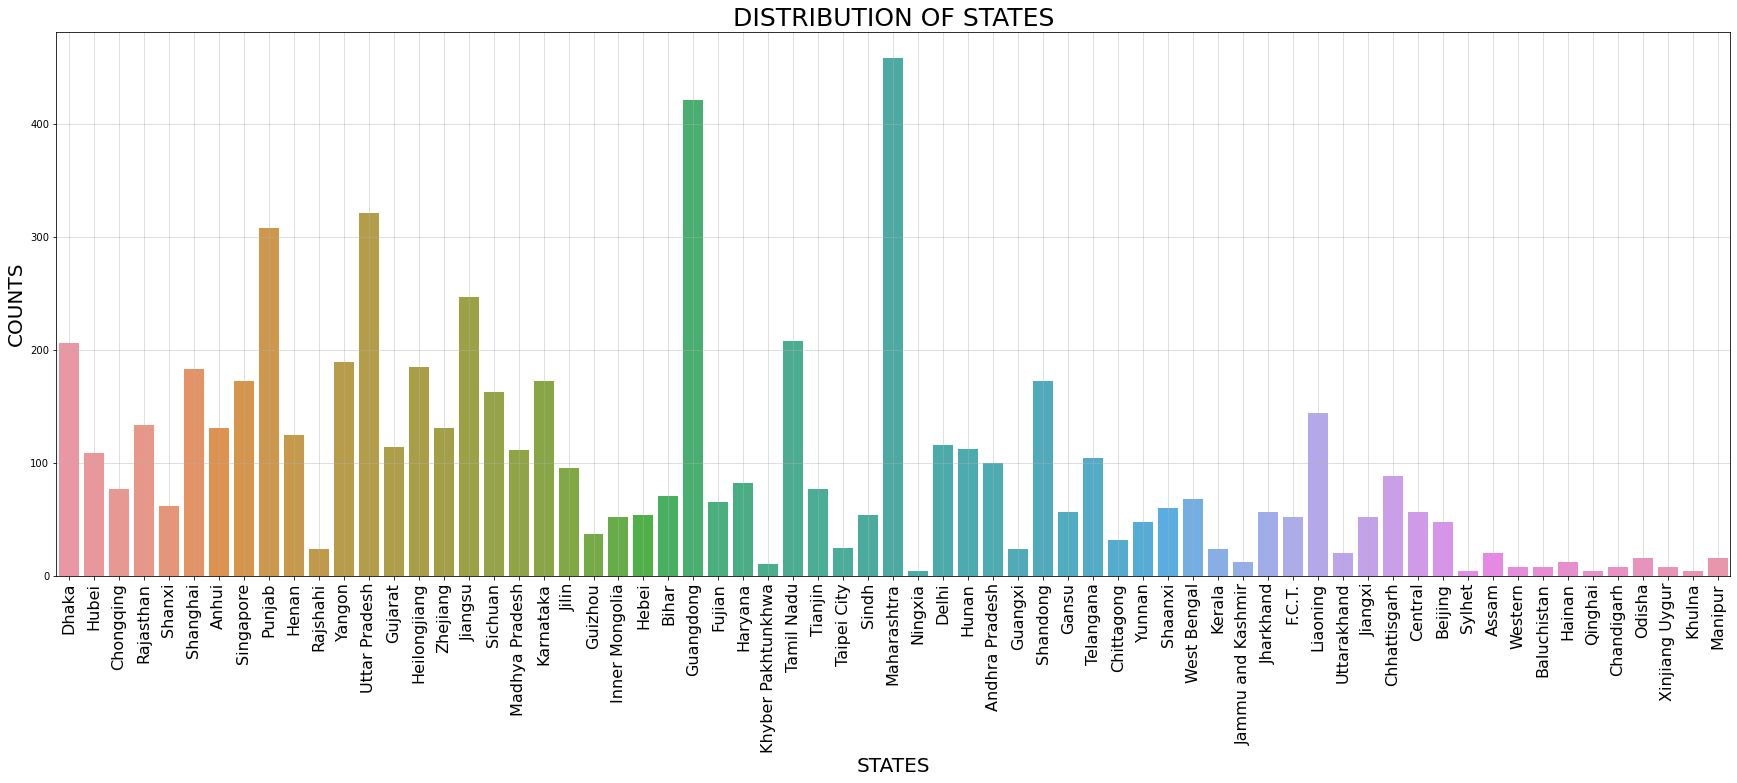

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(ds['State'])
plt.xticks(fontsize=16,rotation=90)
plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('STATES',fontsize=20)
plt.title('DISTRIBUTION OF STATES',fontsize=25);
plt.grid(alpha=0.5)
plt.show()

In [34]:
print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['Price', 'Operational/ Production Cost', 'Selling Price', 'Discount', 'Shipping Cost', 'Sales (shipping price included)', 'Profit', 'Quantity']

Categorical Columns
['Order Priority', 'City', 'Category', 'Country', 'Segment', 'Order Date', 'State', 'Super Category', 'Region', 'Ship Type']


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


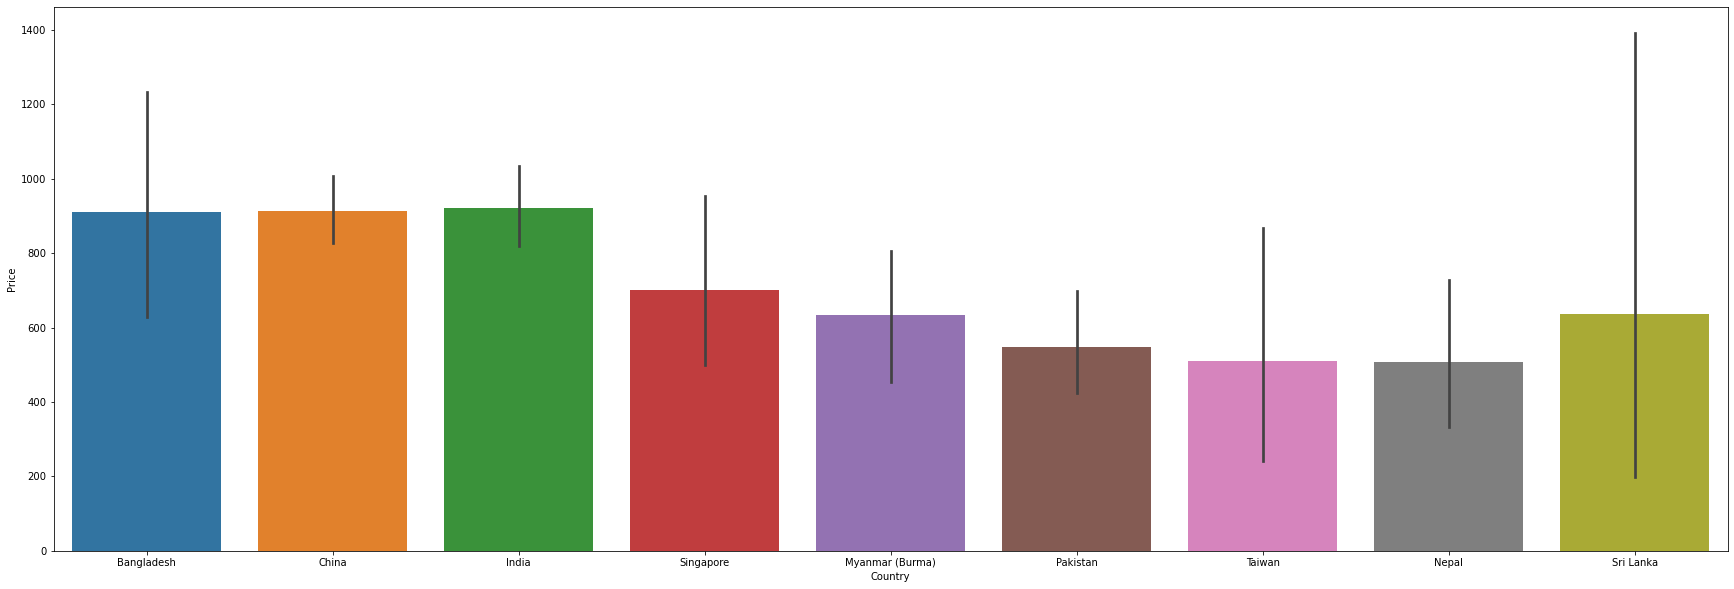

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


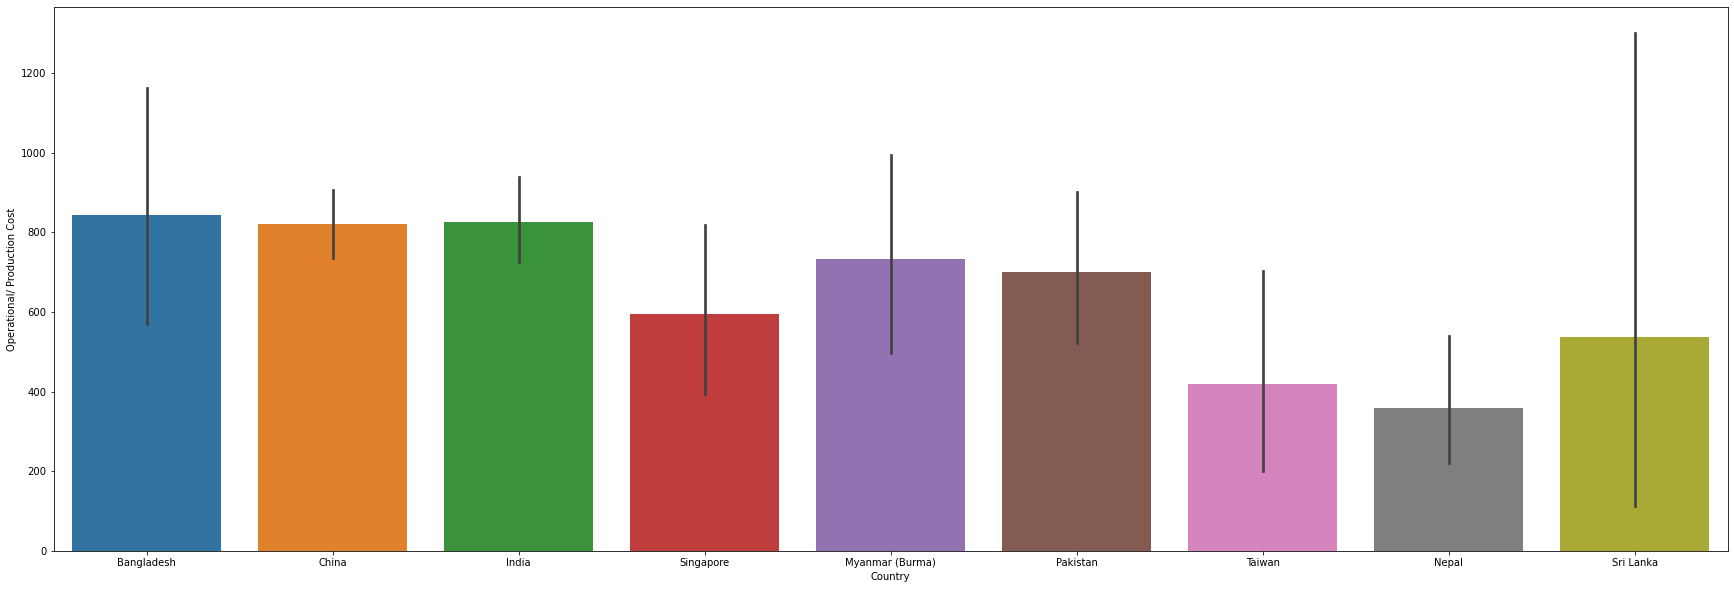

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


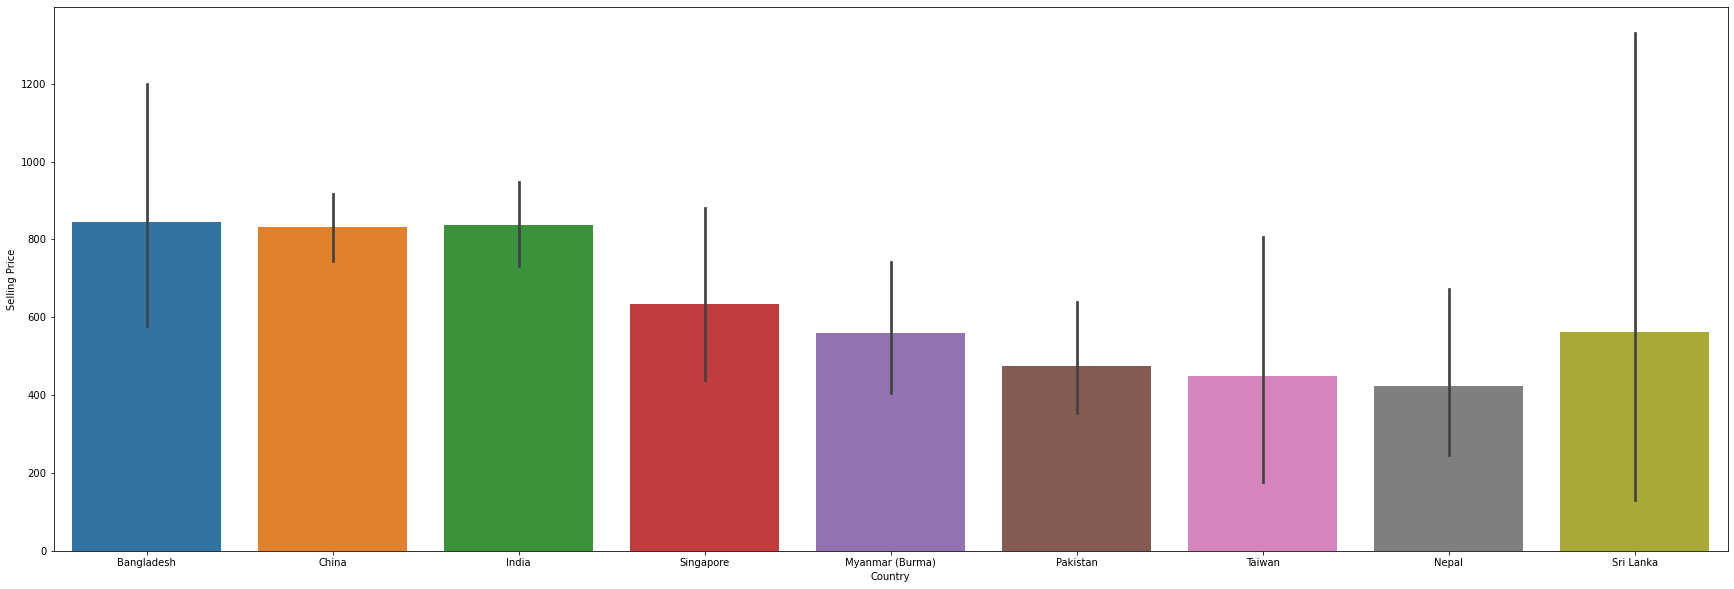

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


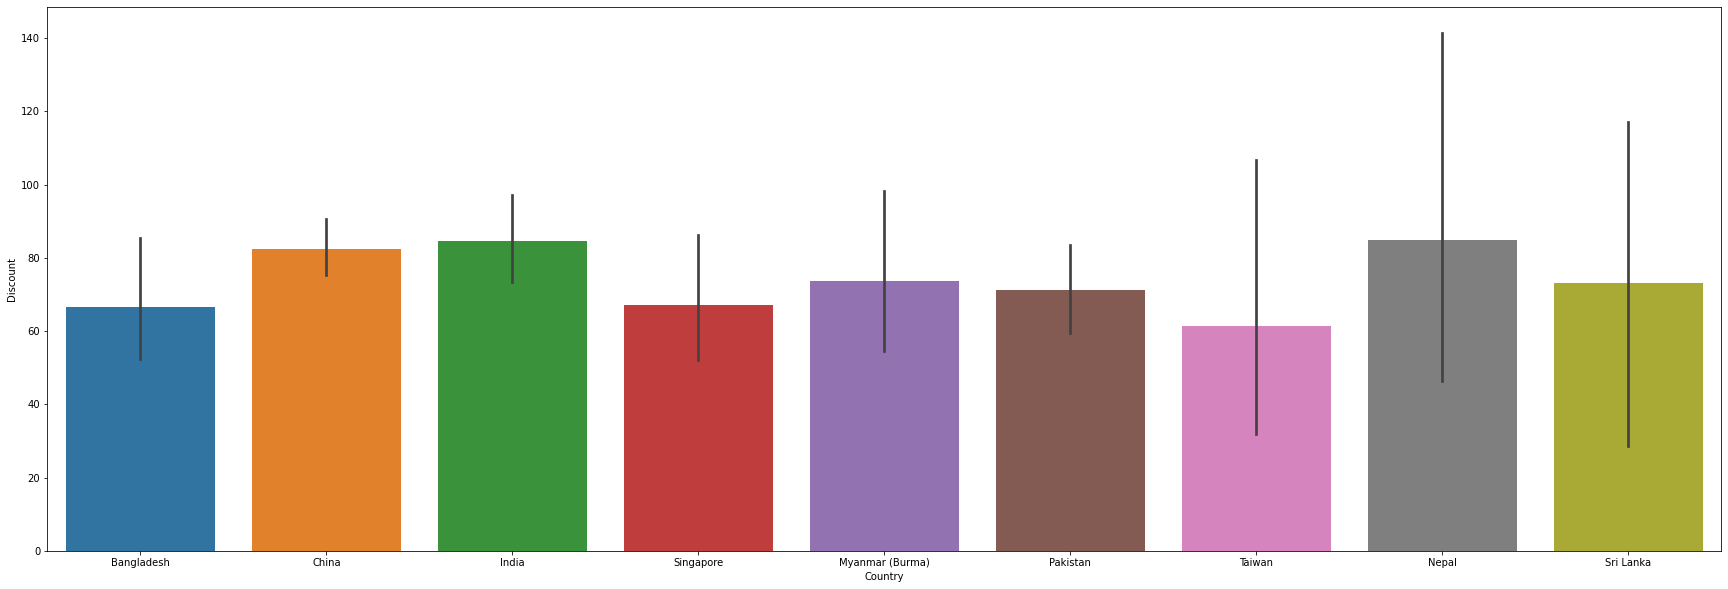

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


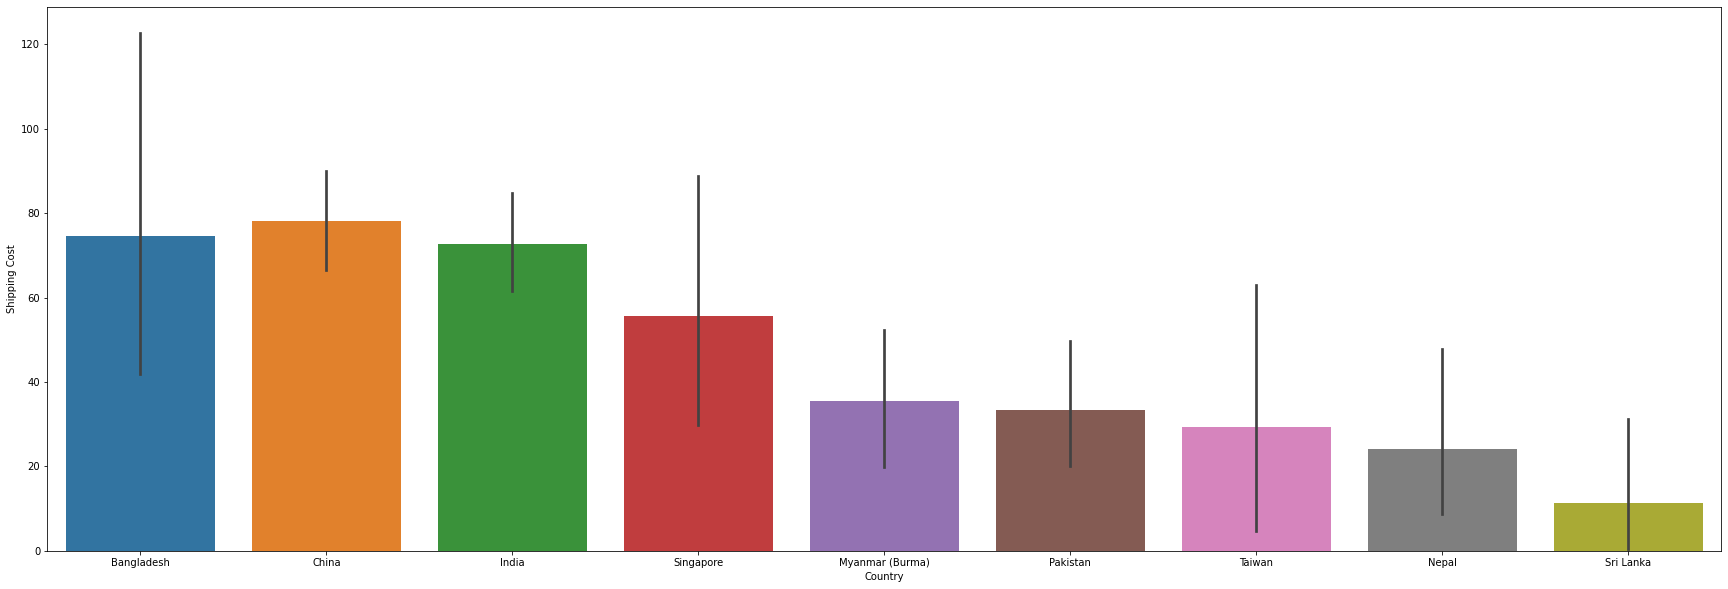

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


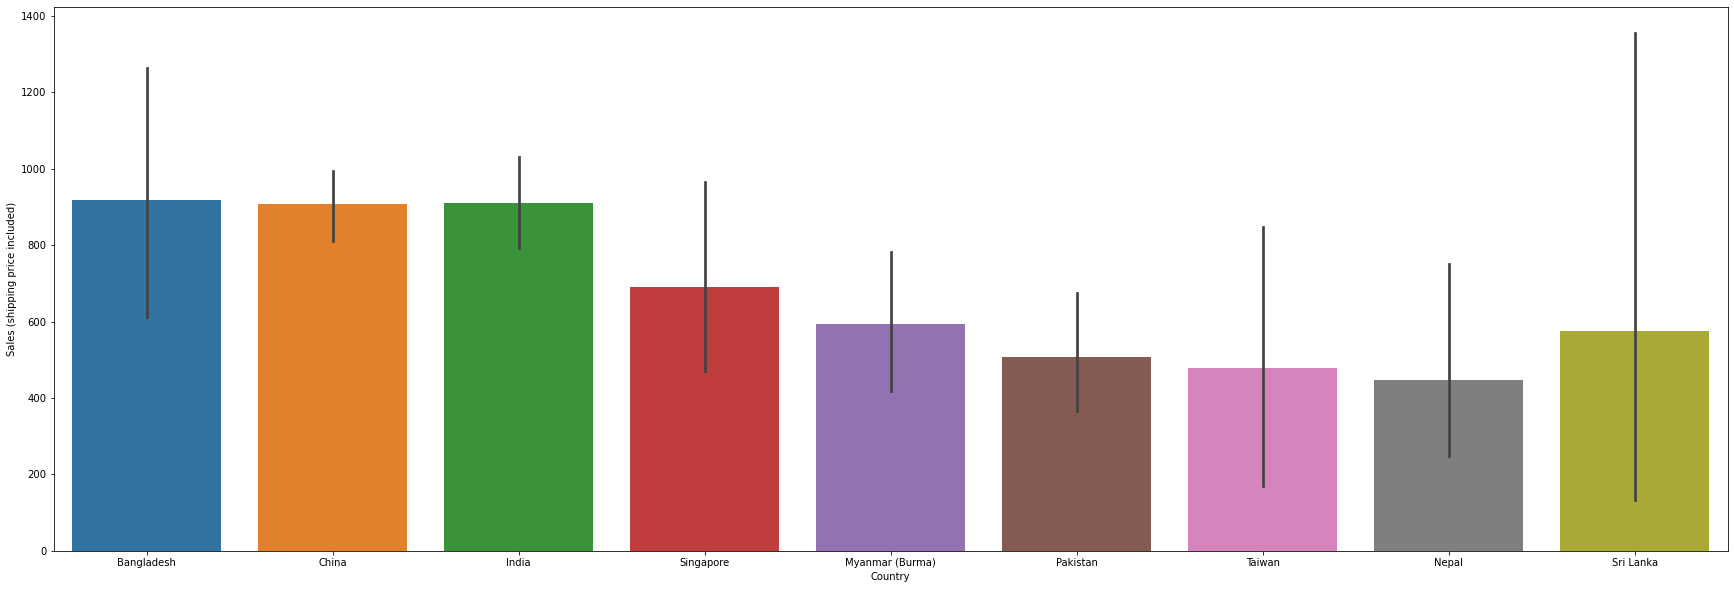

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


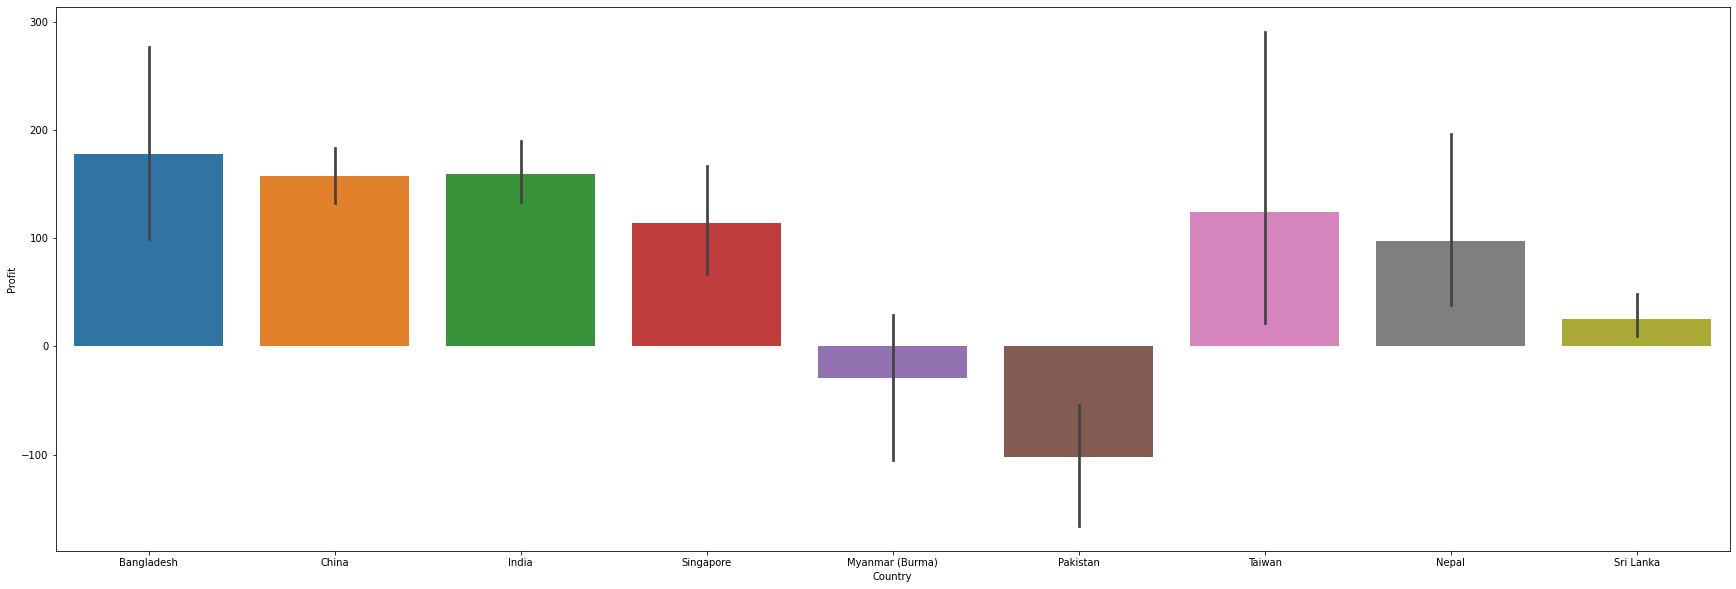

Visualizing Numerical Features with Country


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


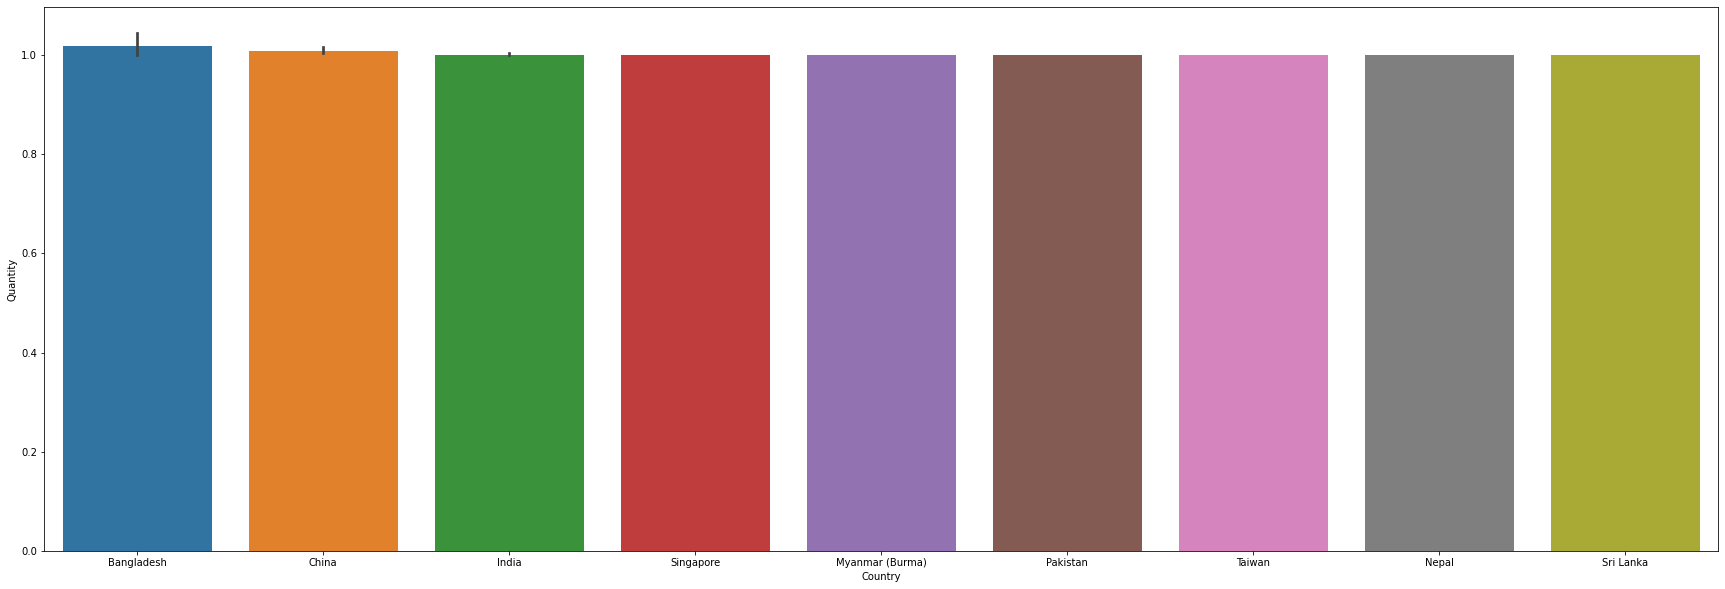

Visualizing Numerical Features with Country


In [35]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.barplot(ds['Country'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Country")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


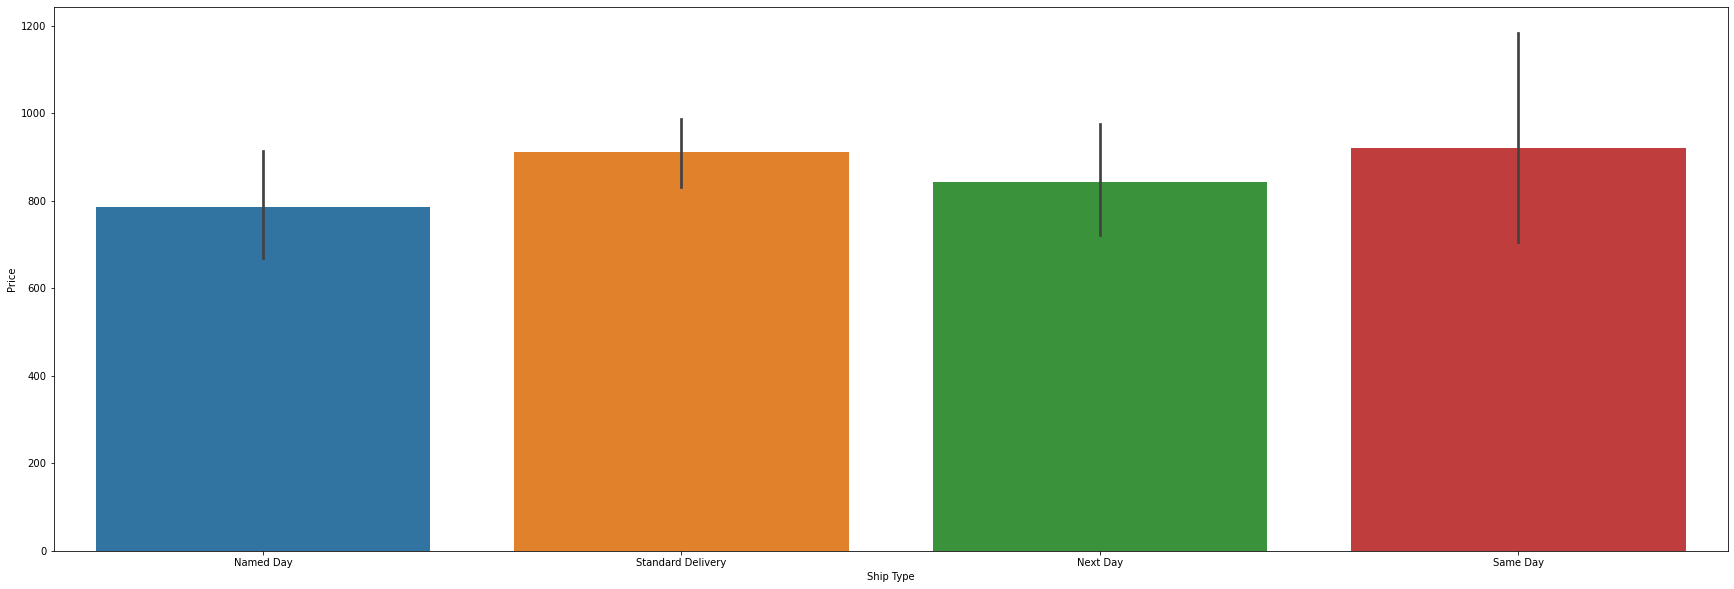

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


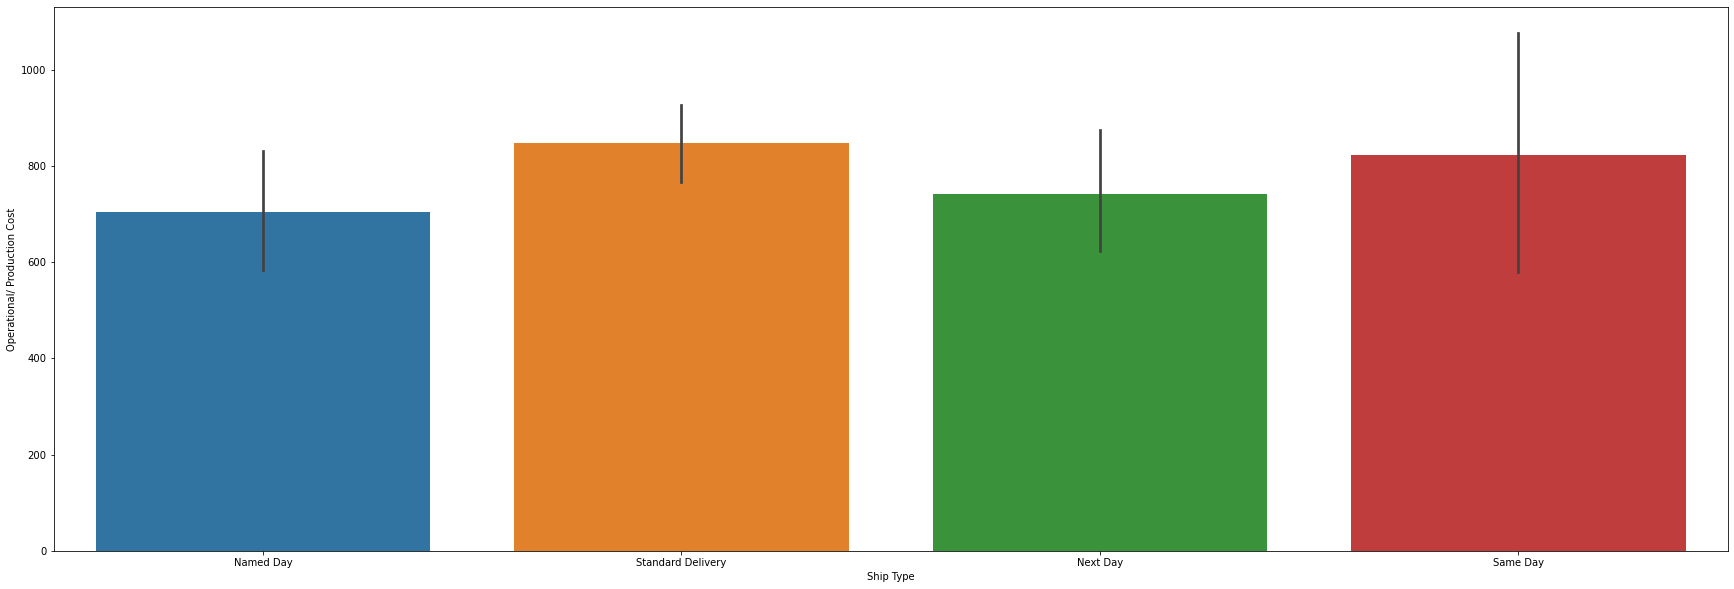

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


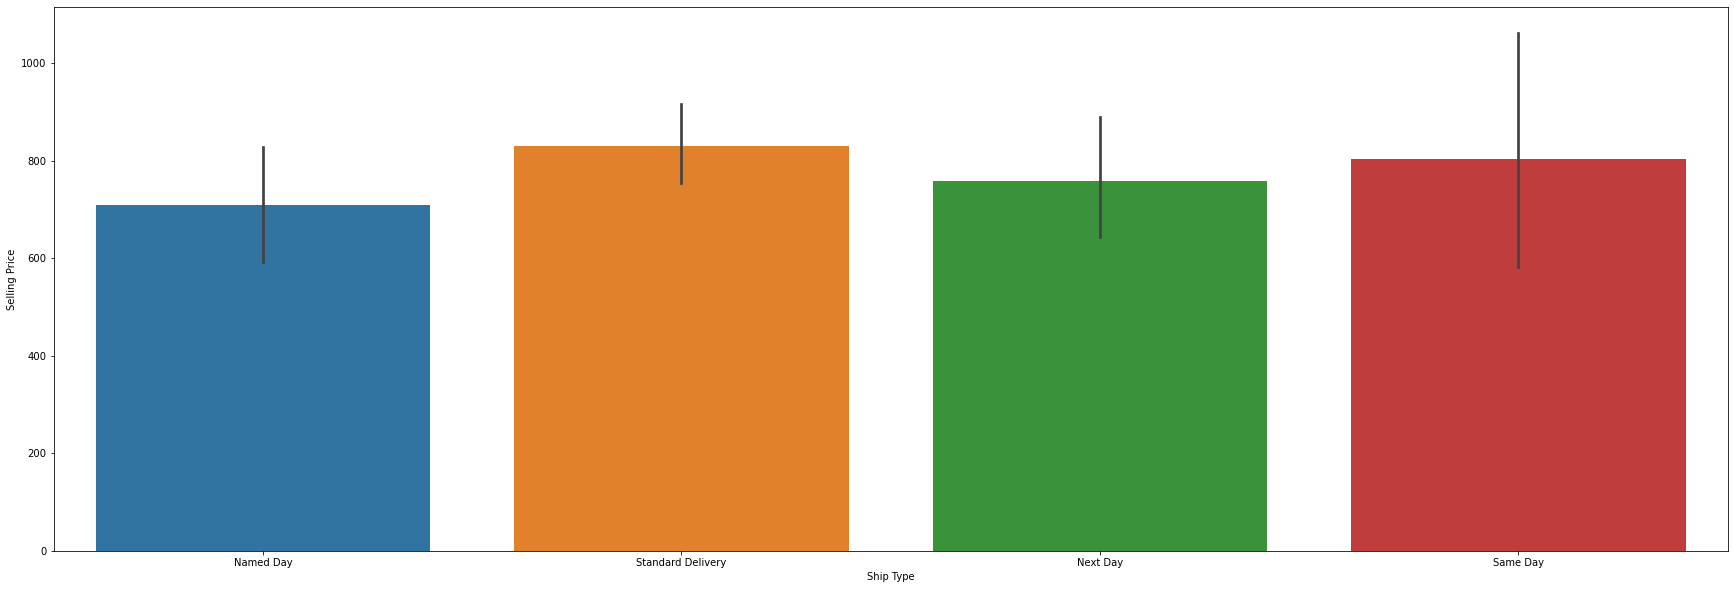

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


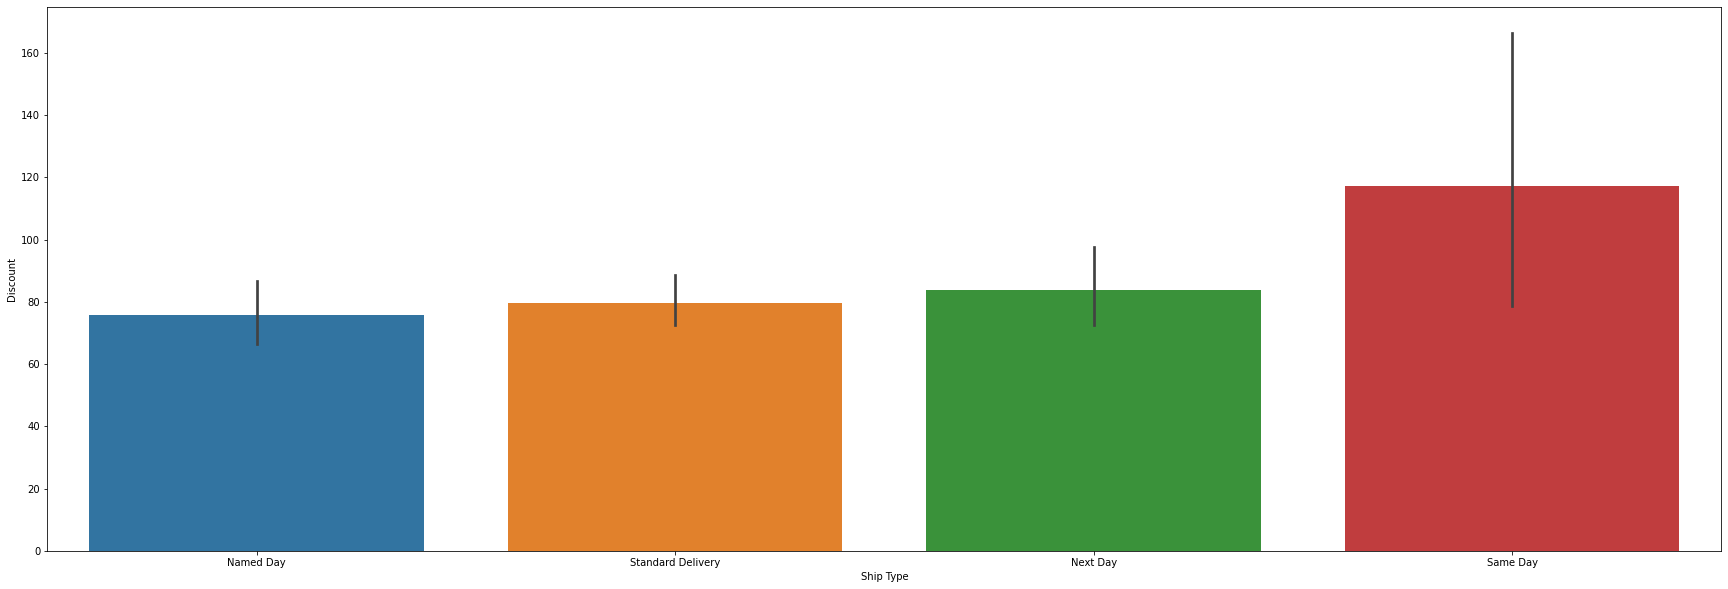

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


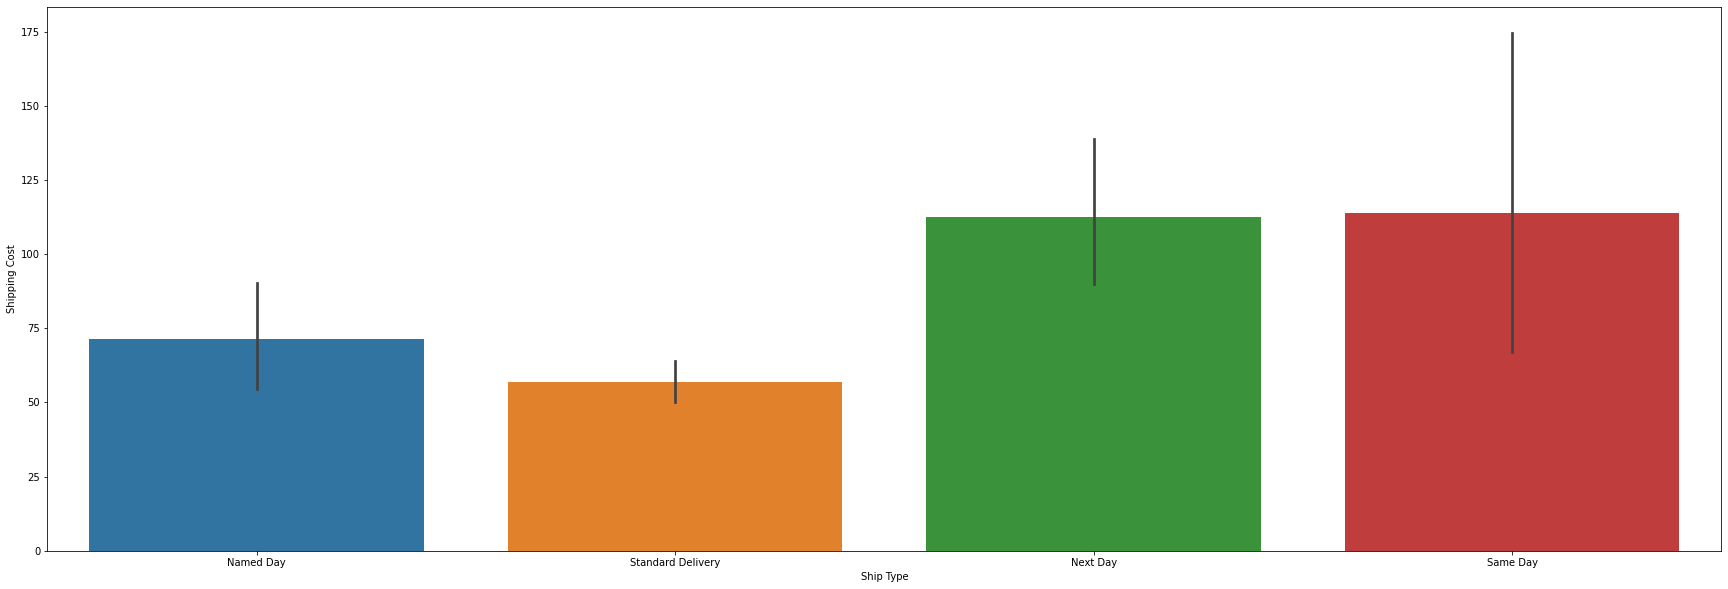

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


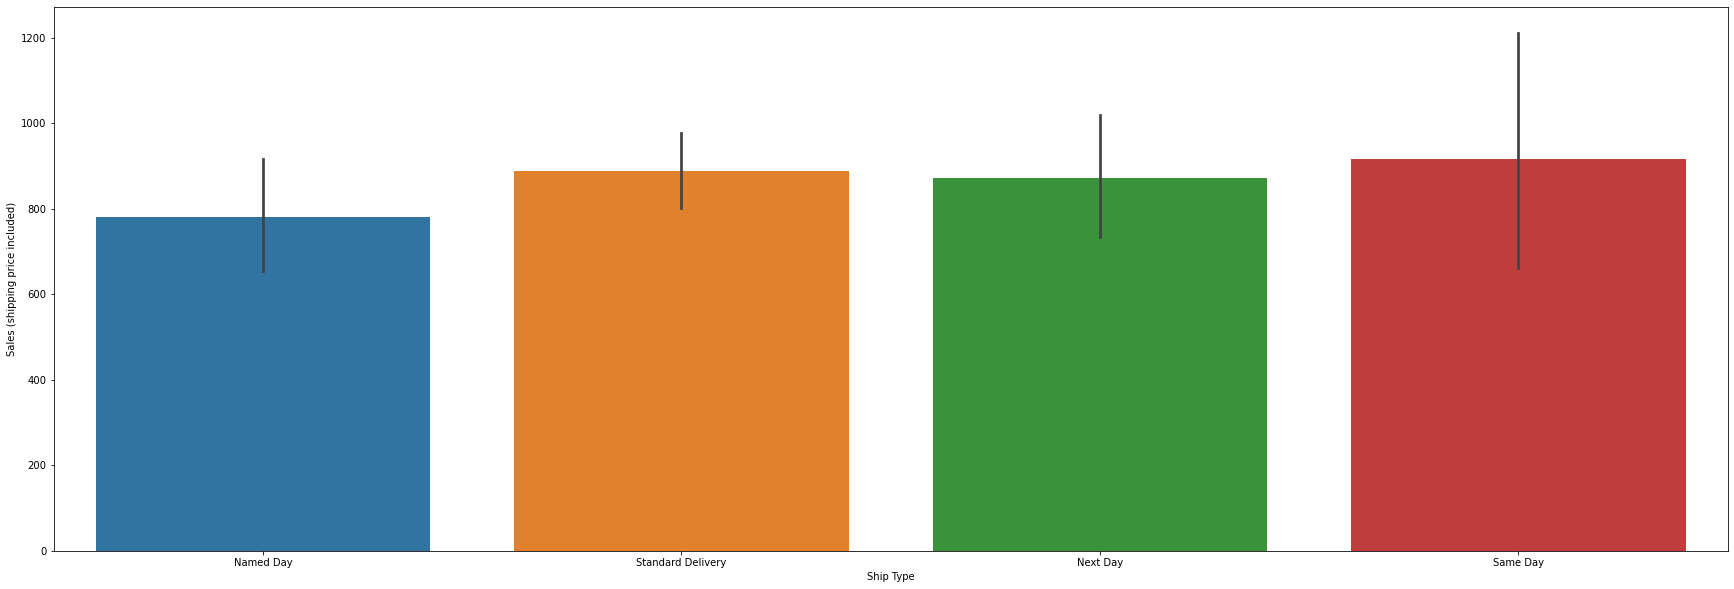

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


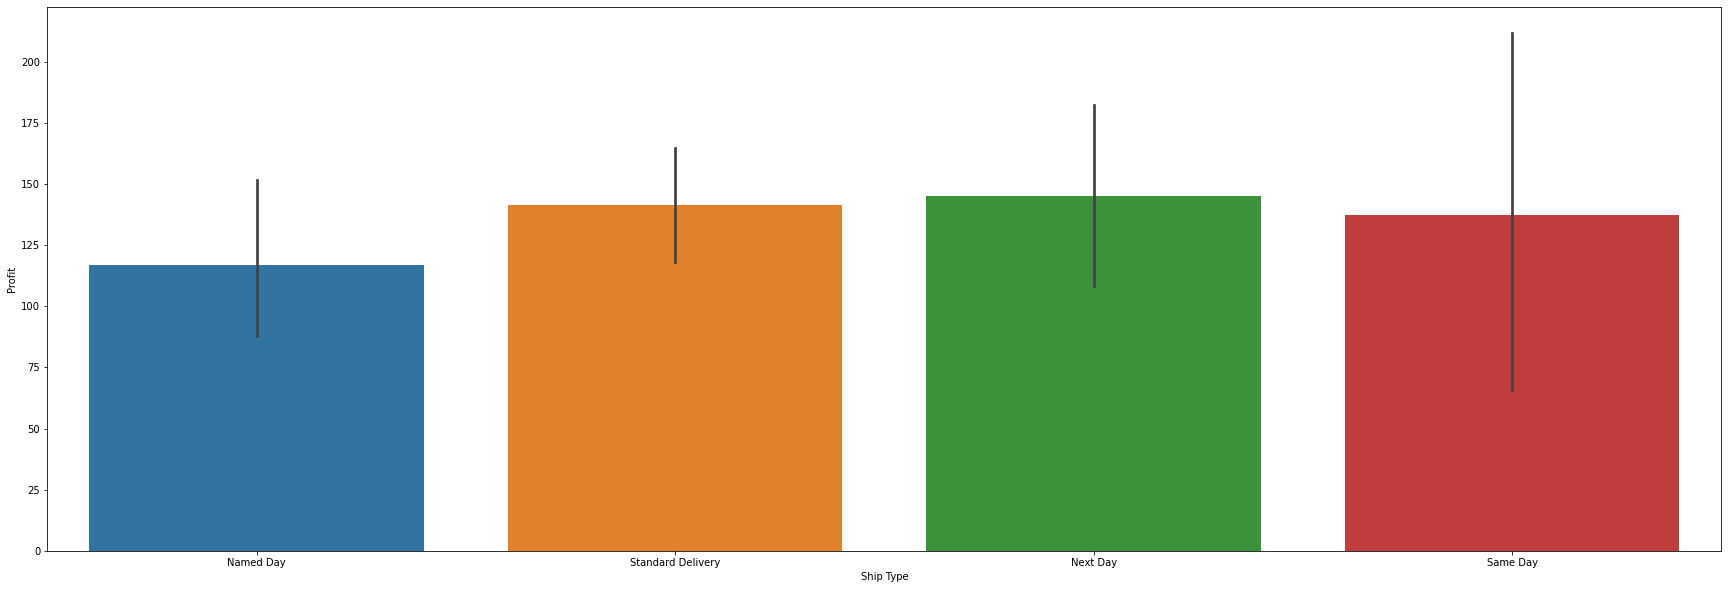

Visualizing Numerical Features with Ship Type


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


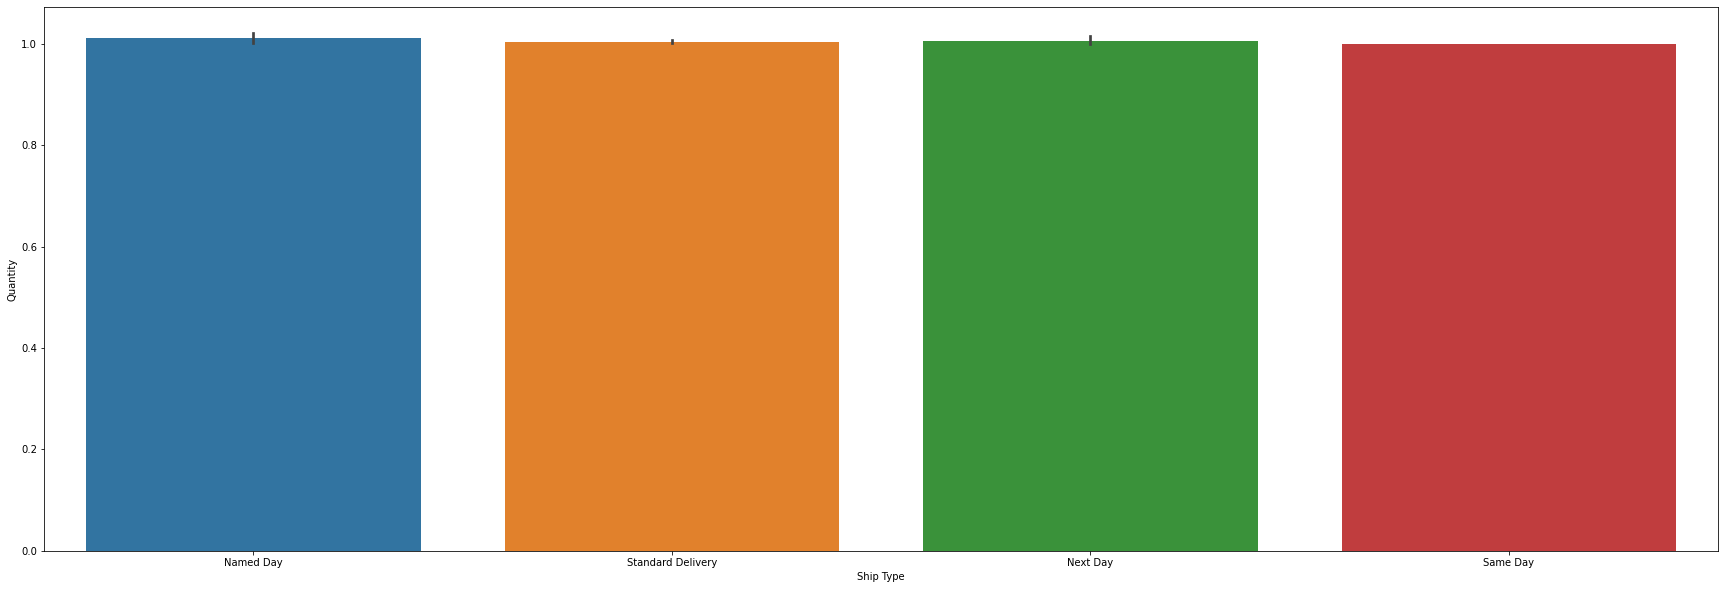

Visualizing Numerical Features with Ship Type


In [36]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.barplot(ds['Ship Type'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Ship Type")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


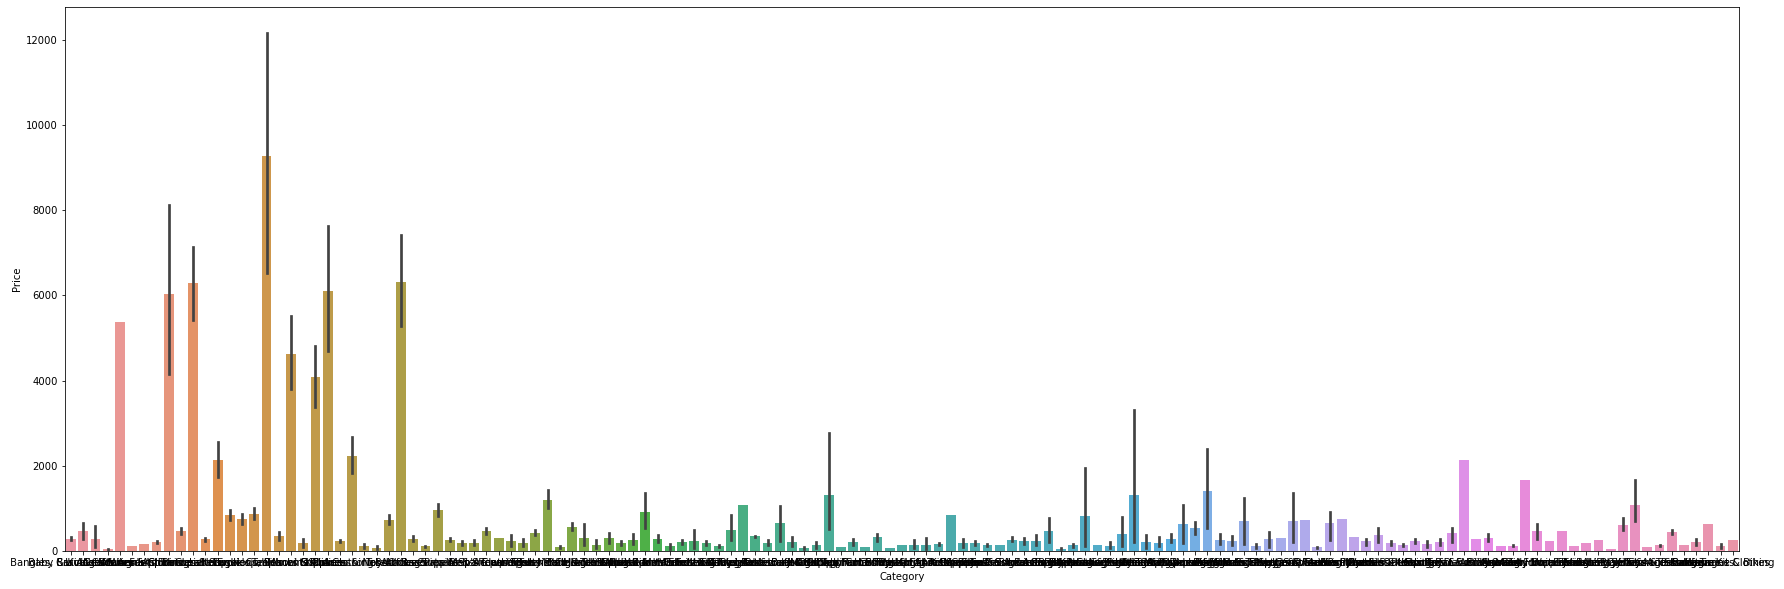

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


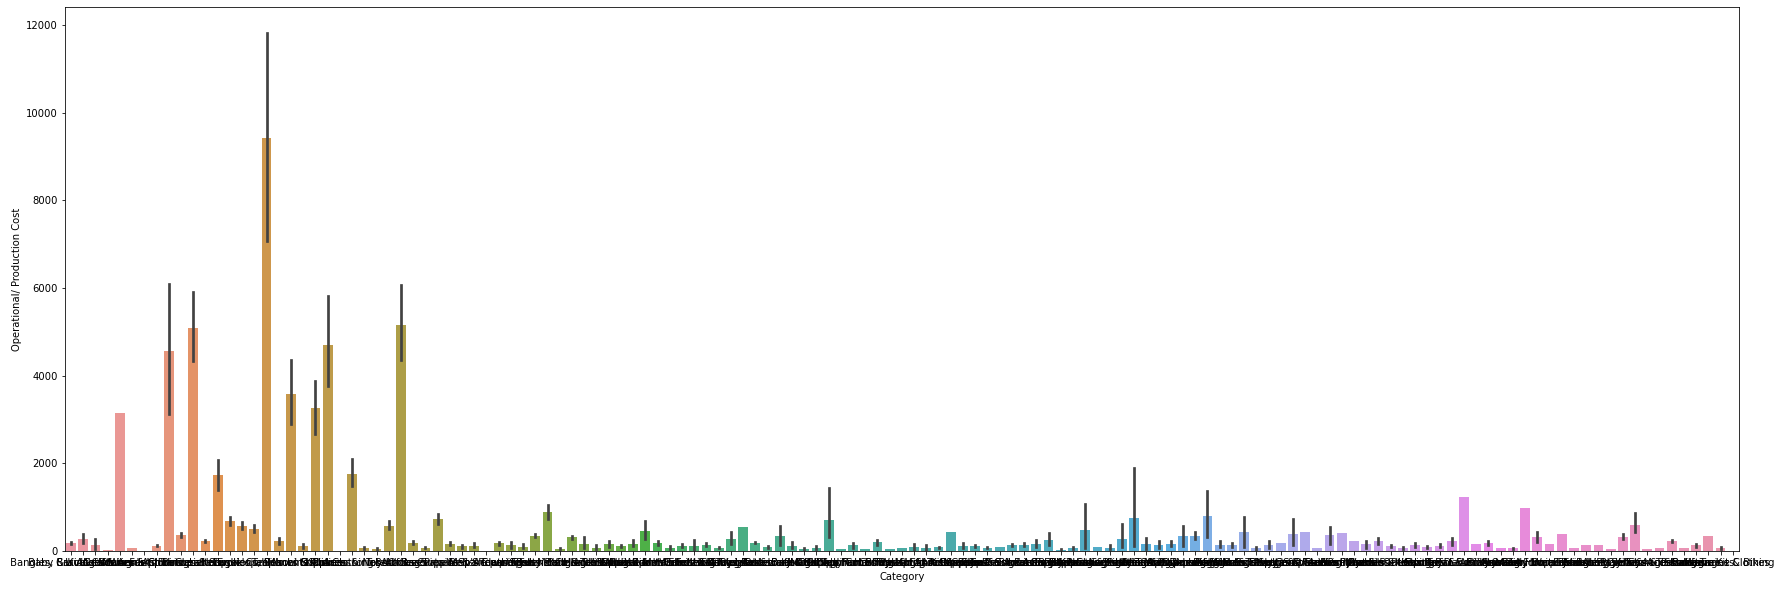

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


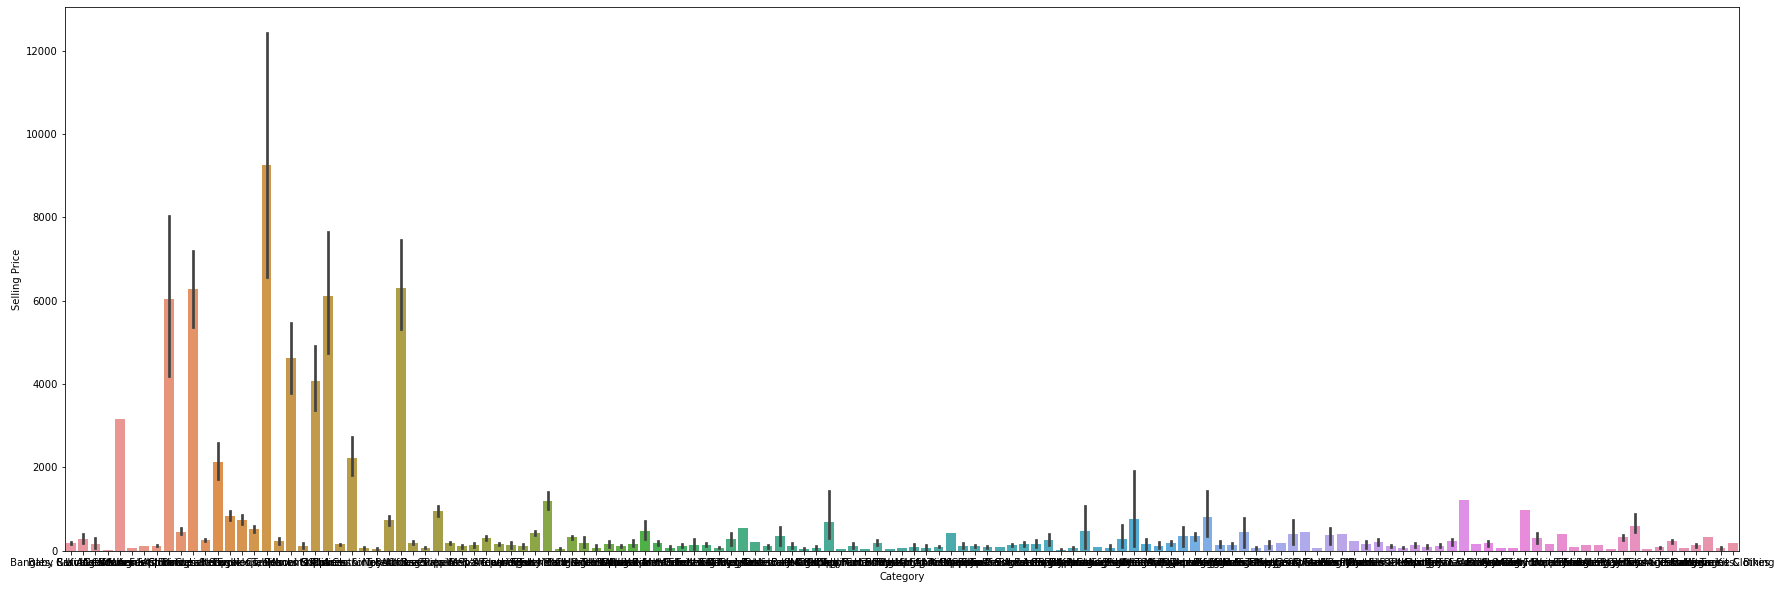

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


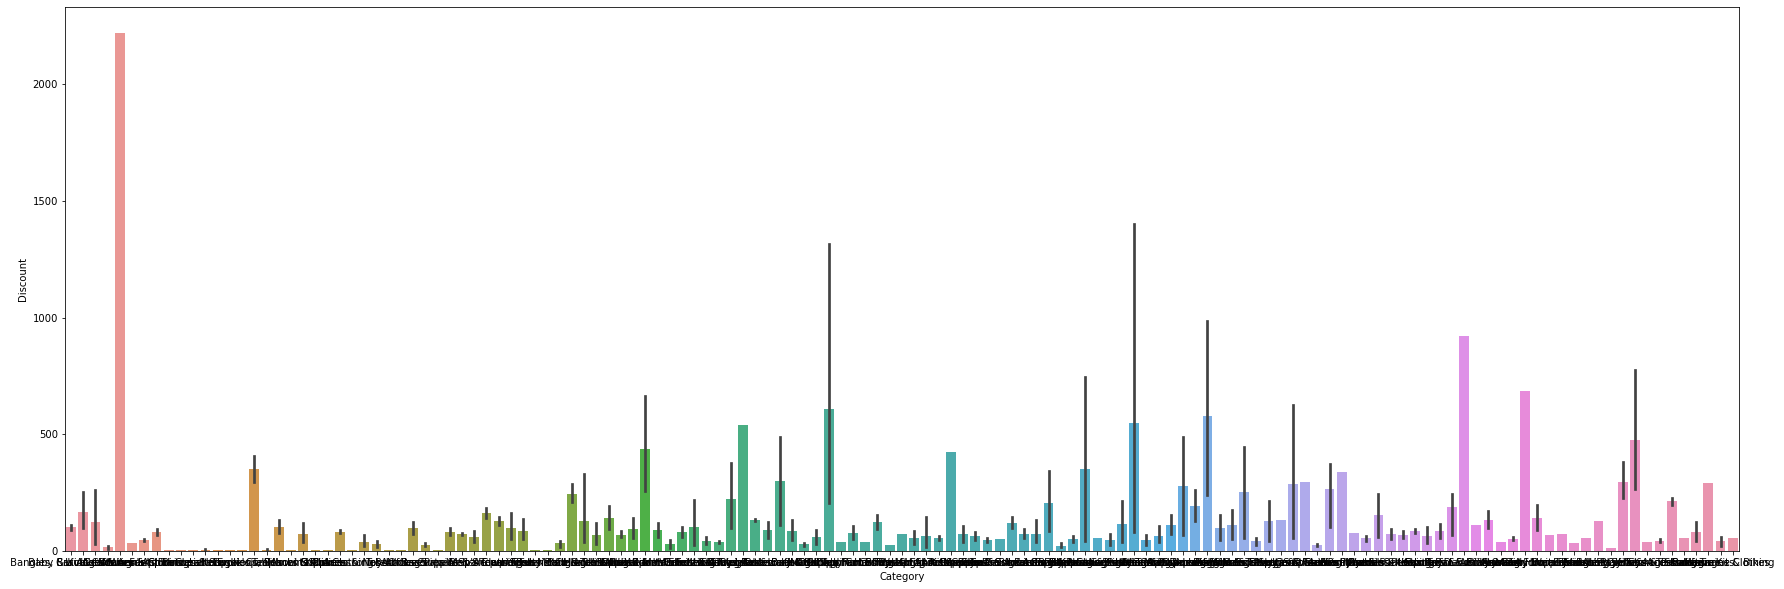

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


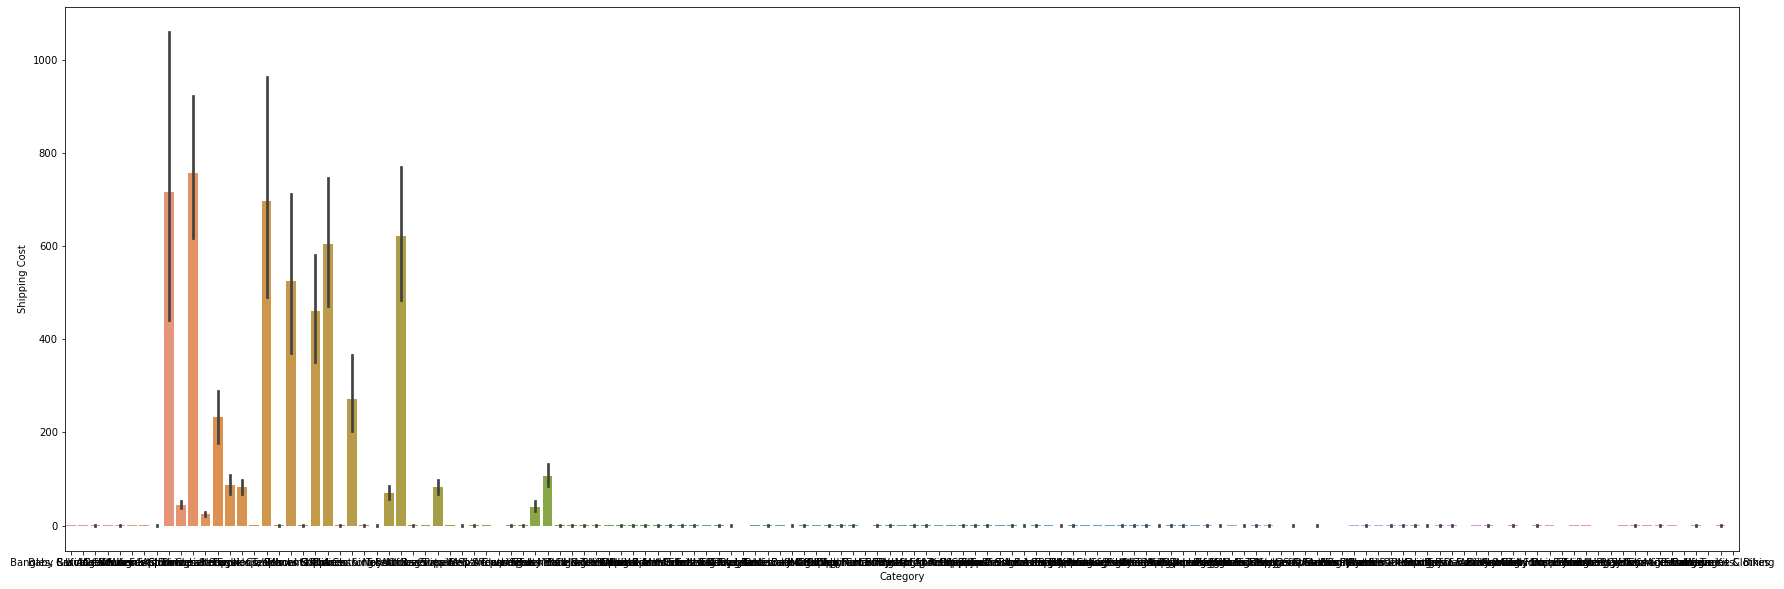

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


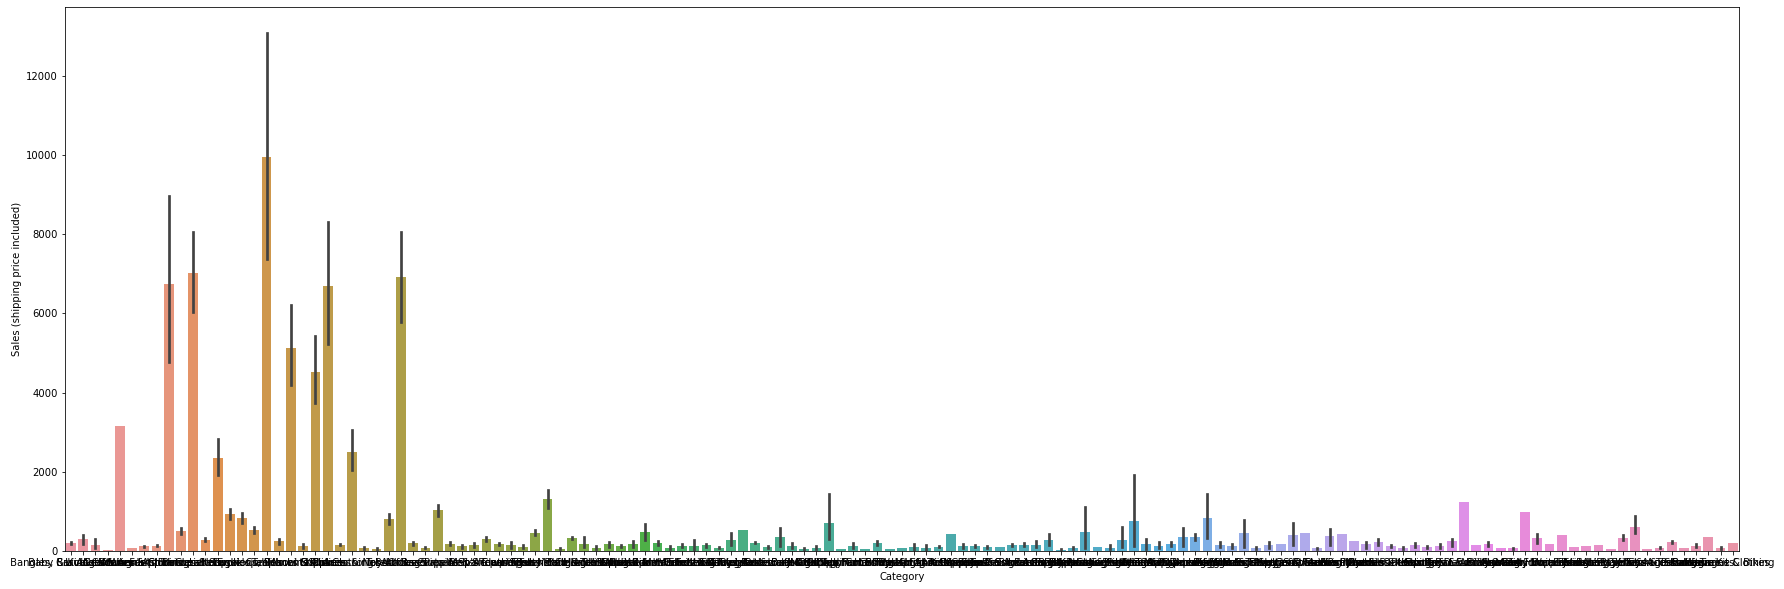

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


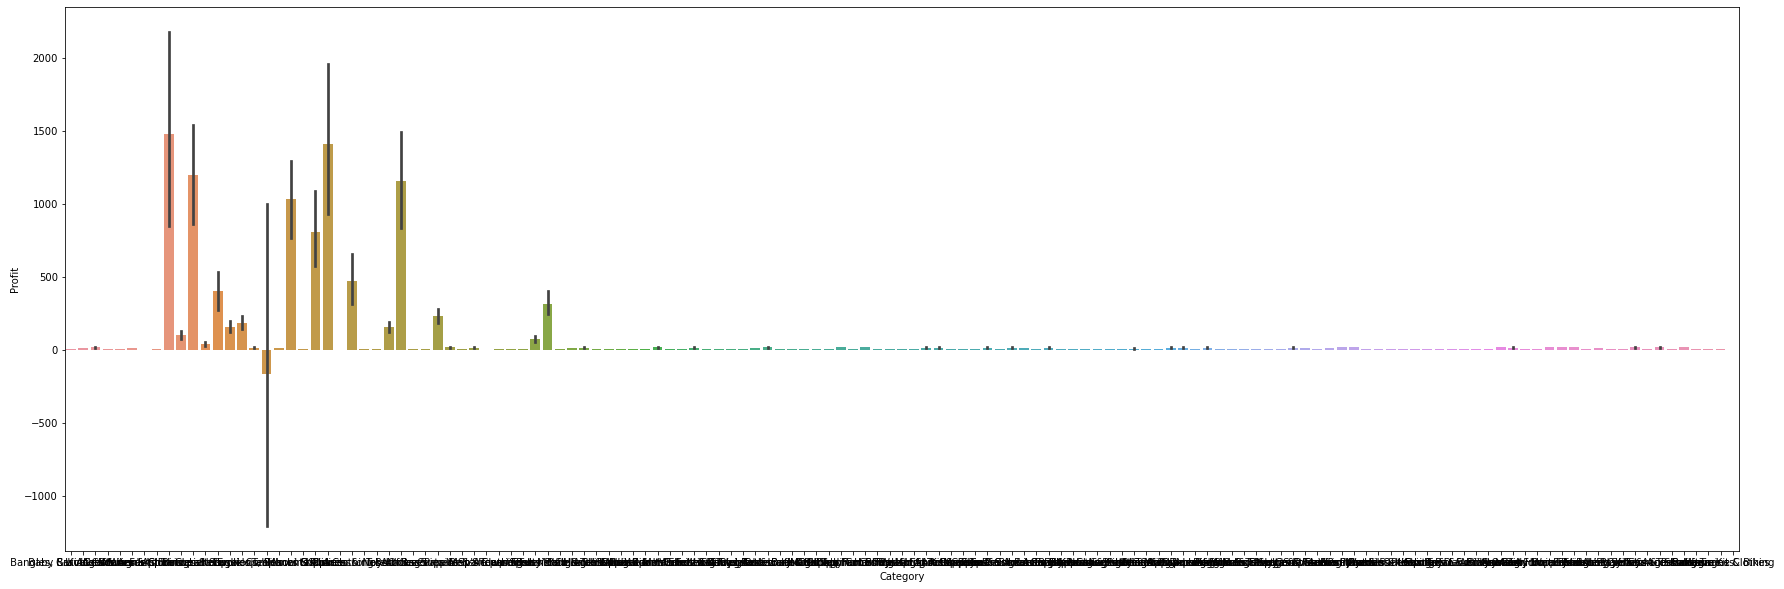

Visualizing Numerical Features with Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


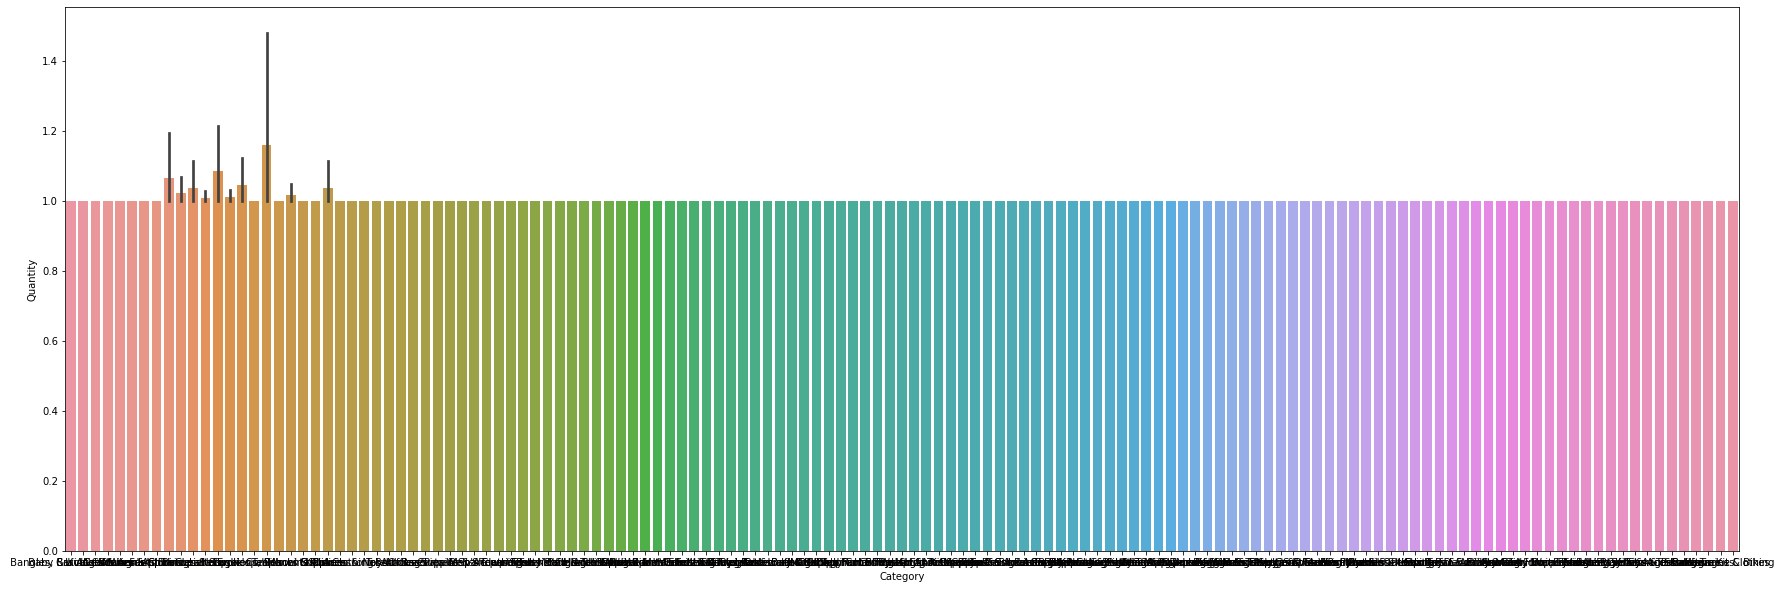

Visualizing Numerical Features with Category


In [37]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.barplot(ds['Category'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Category")

In [38]:
#for i in ds[num_cols]:
#    plt.figure(figsize=(30,10))
#    sns.barplot(ds['Order Date'],ds[i])
#    plt.show()
#    print("Visualizing Numerical Features with Order Date")
# with order date we can not make understandable bar plt

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


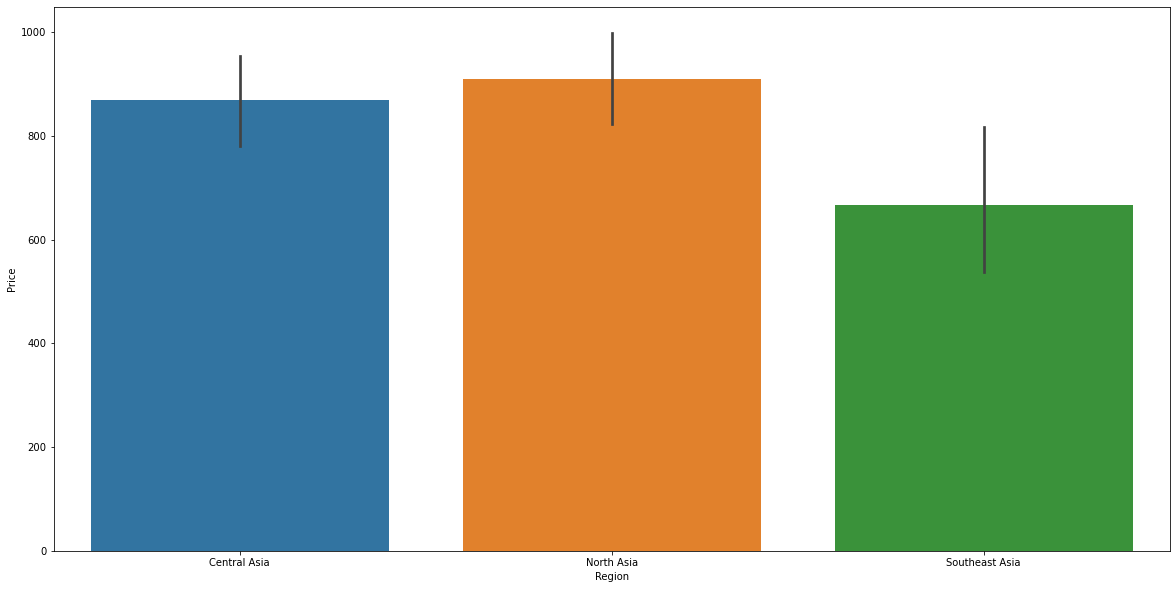

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


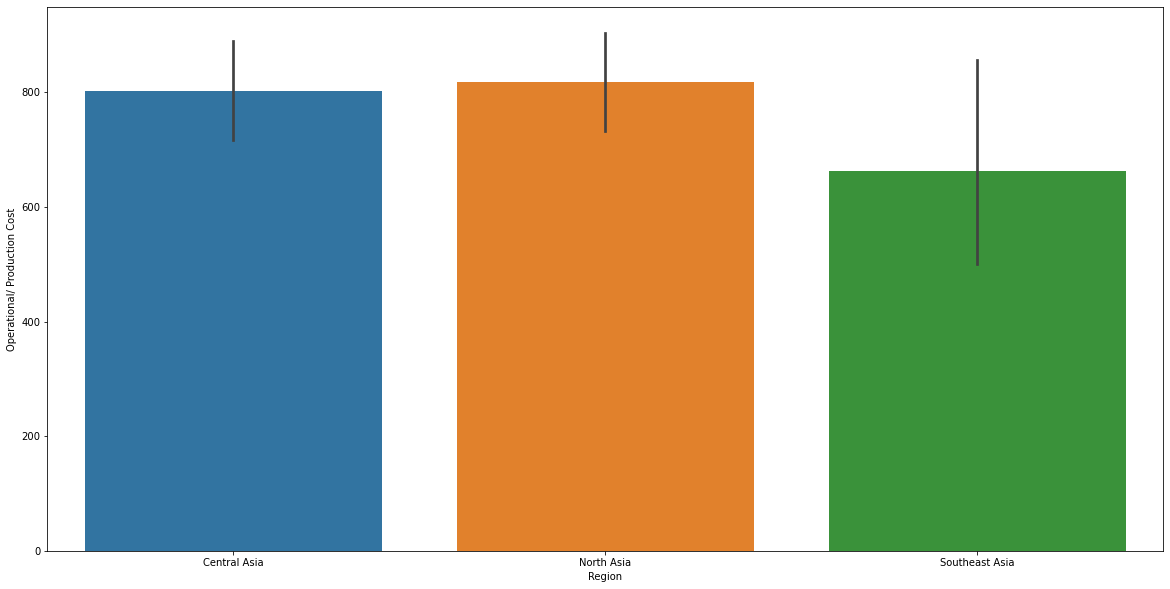

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


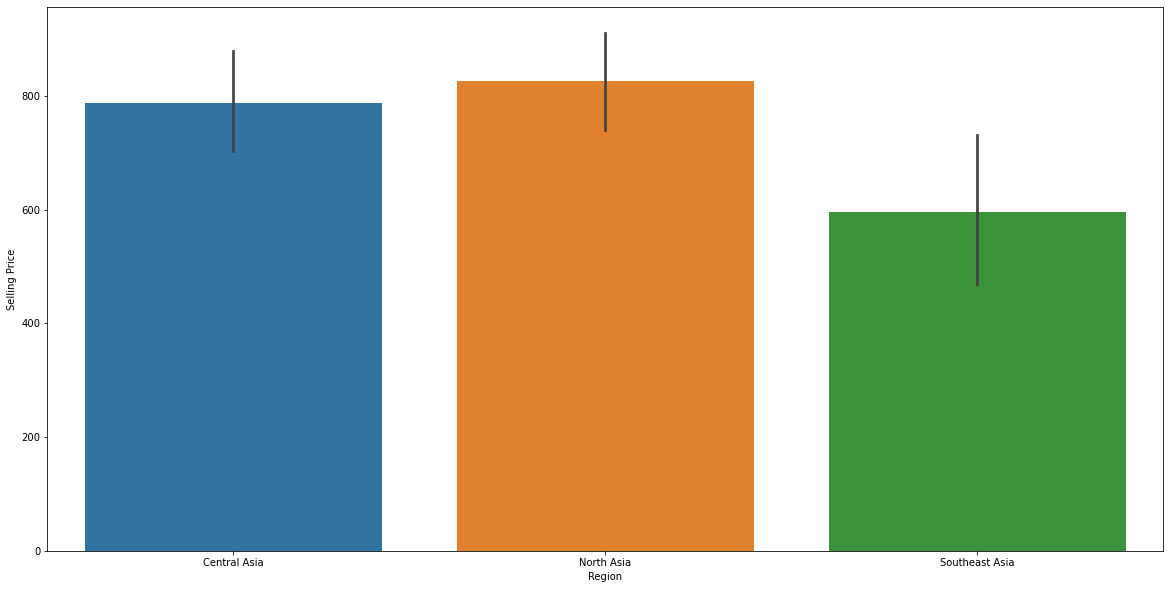

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


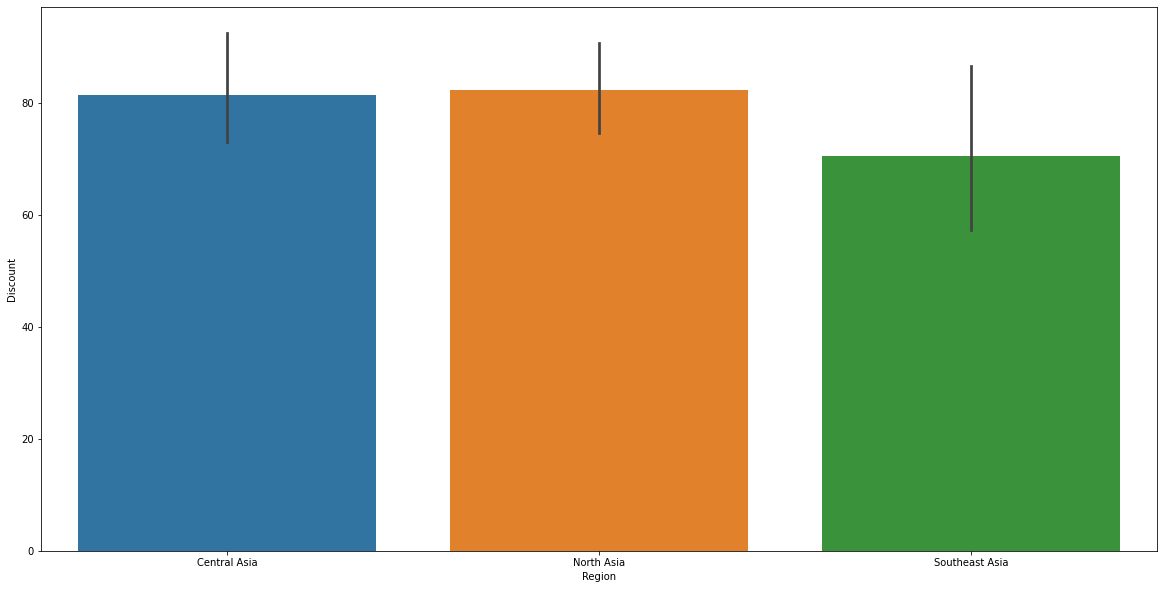

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


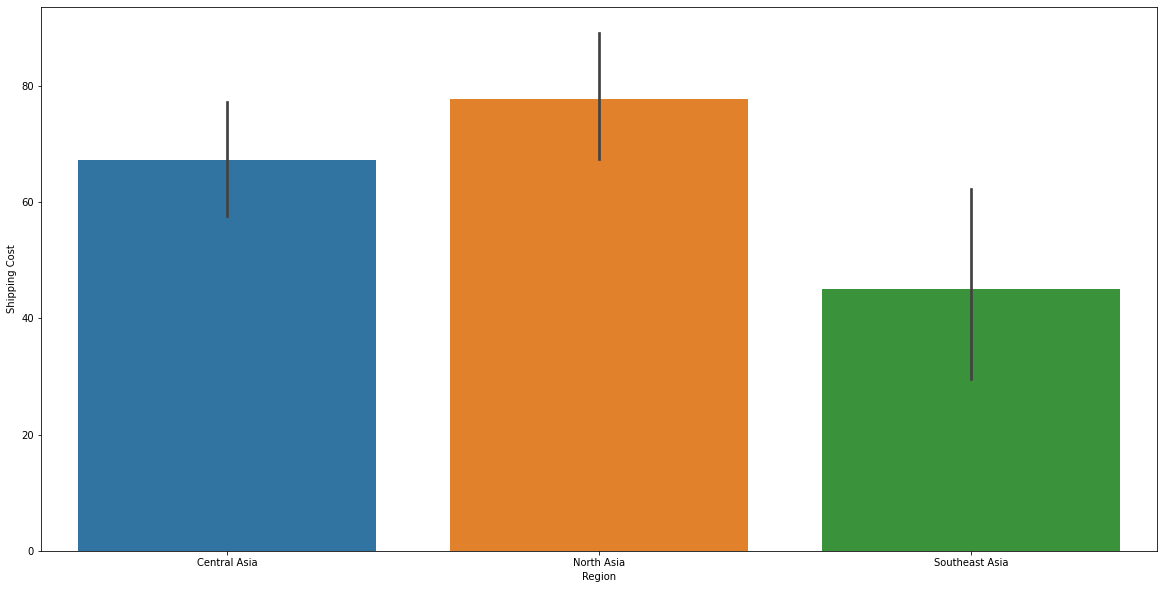

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


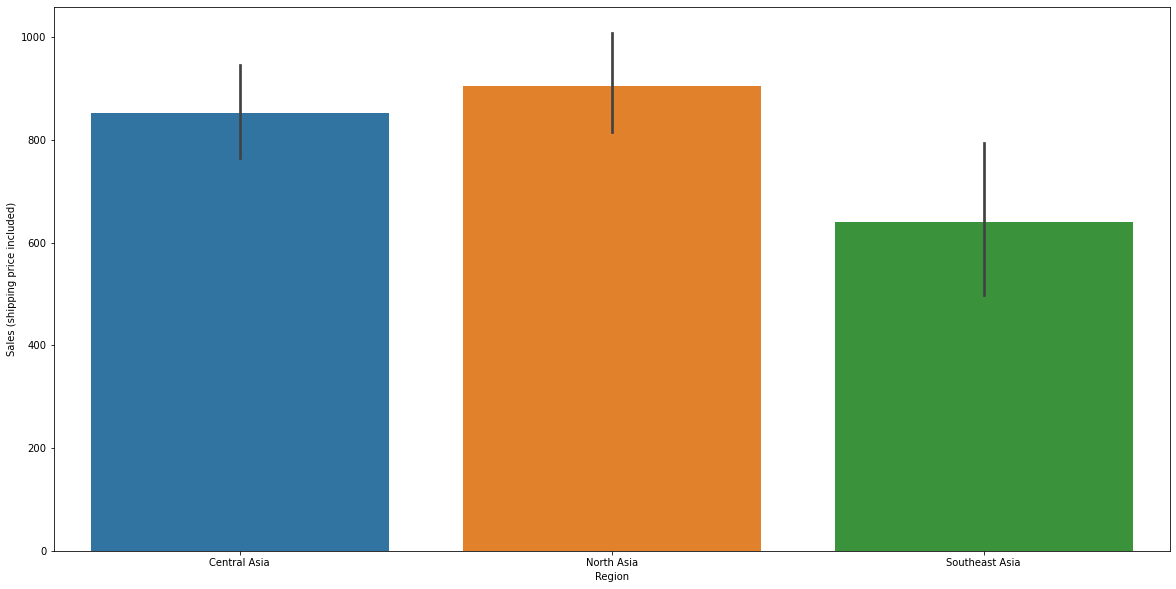

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


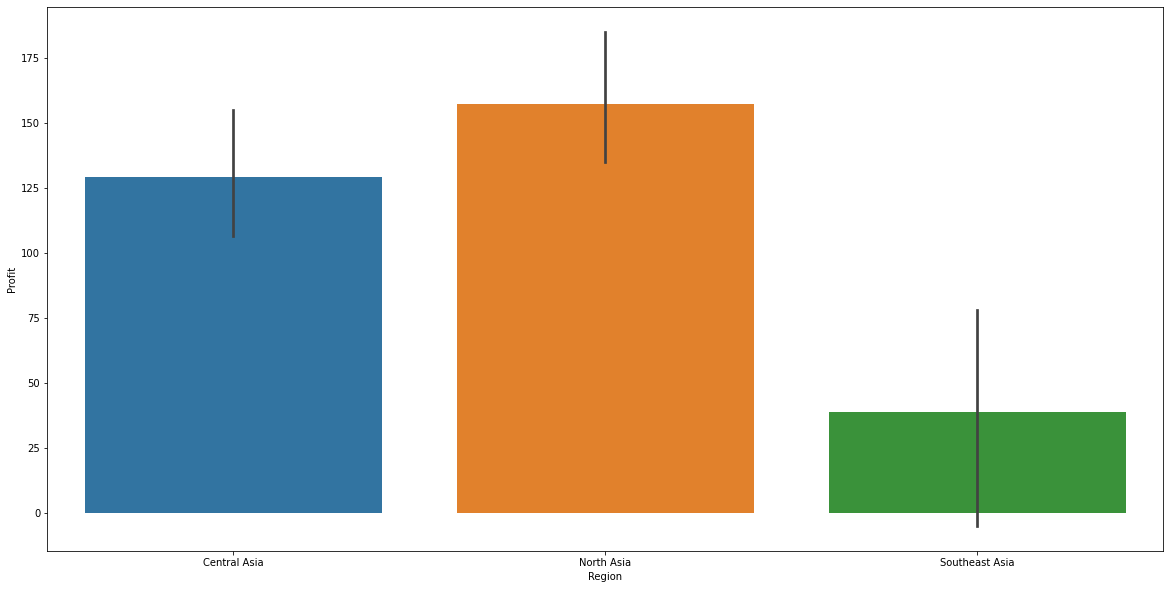

Visualizing Numerical Features with Region


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


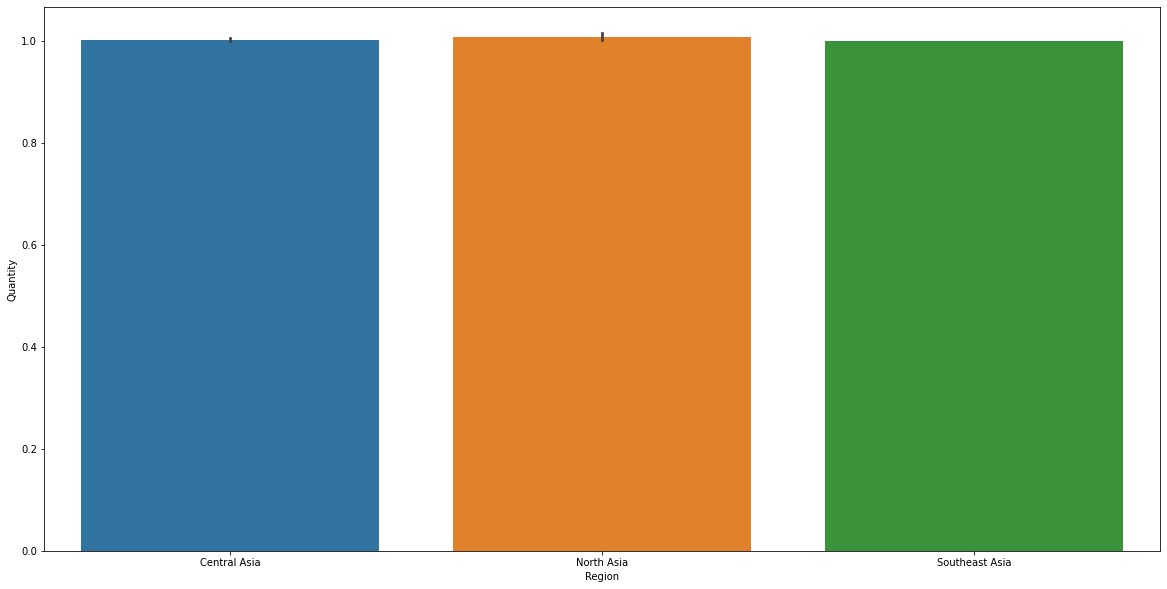

Visualizing Numerical Features with Region


In [39]:
for i in ds[num_cols]:
    plt.figure(figsize=(20,10))
    sns.barplot(ds['Region'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Region")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


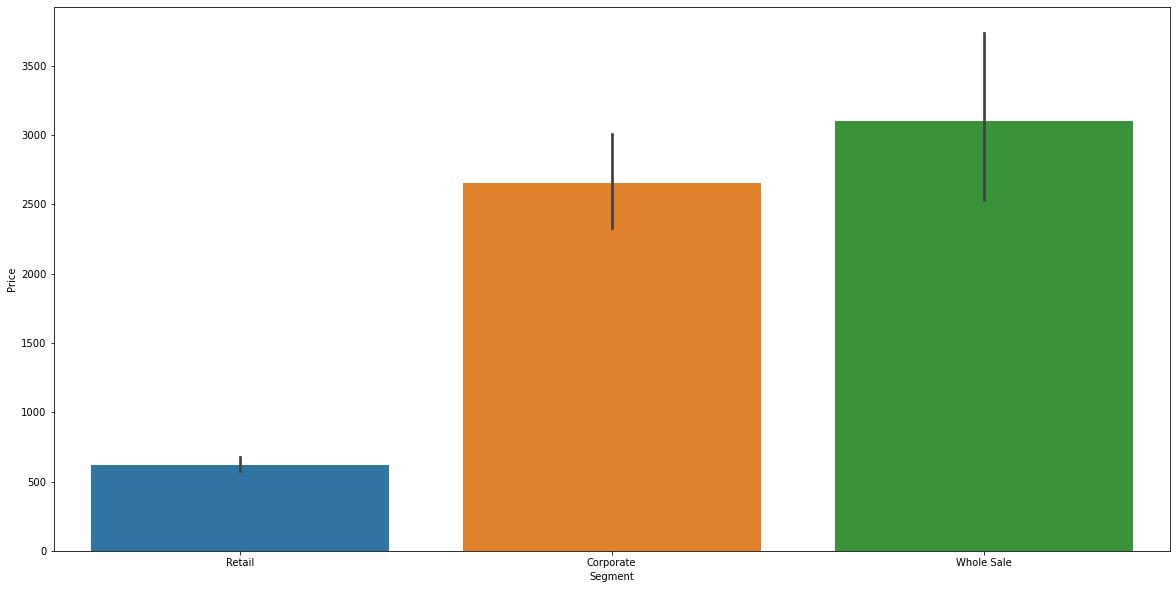

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


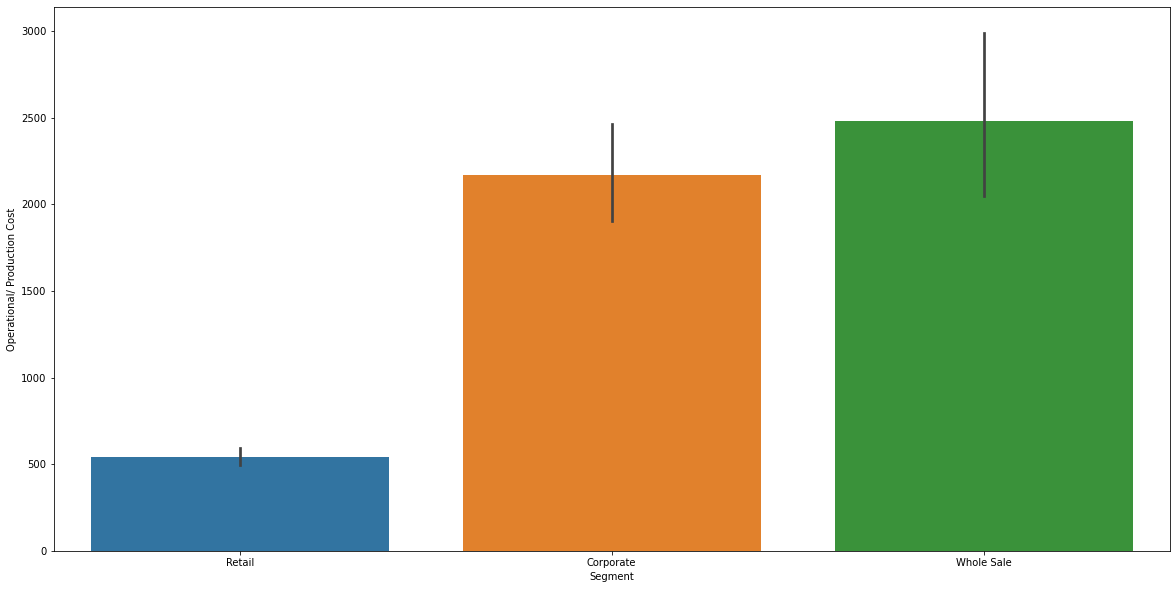

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


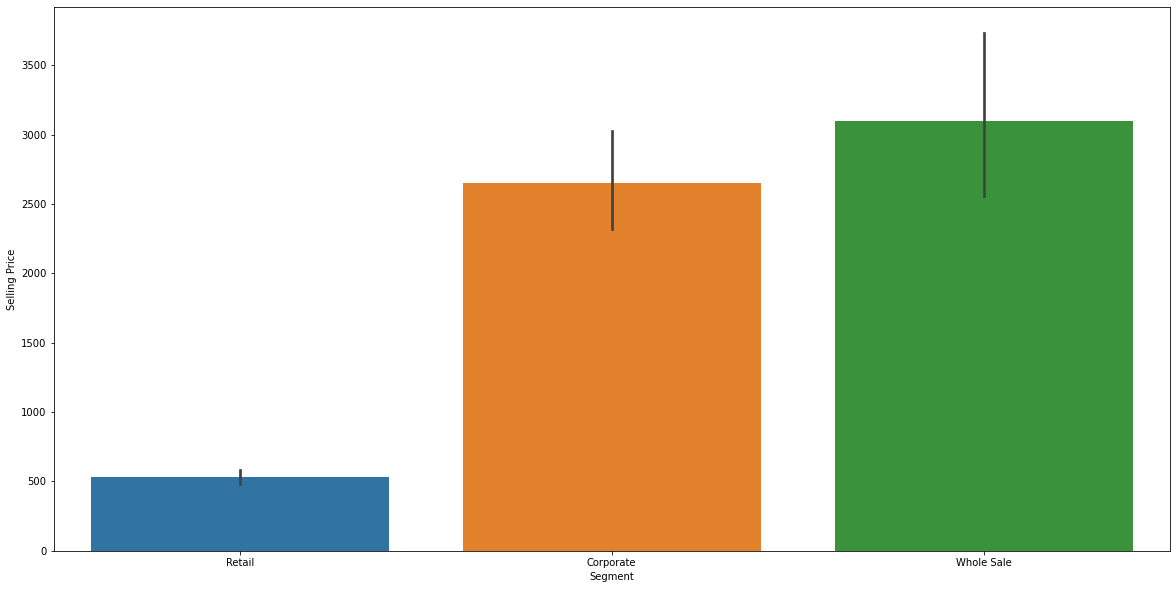

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


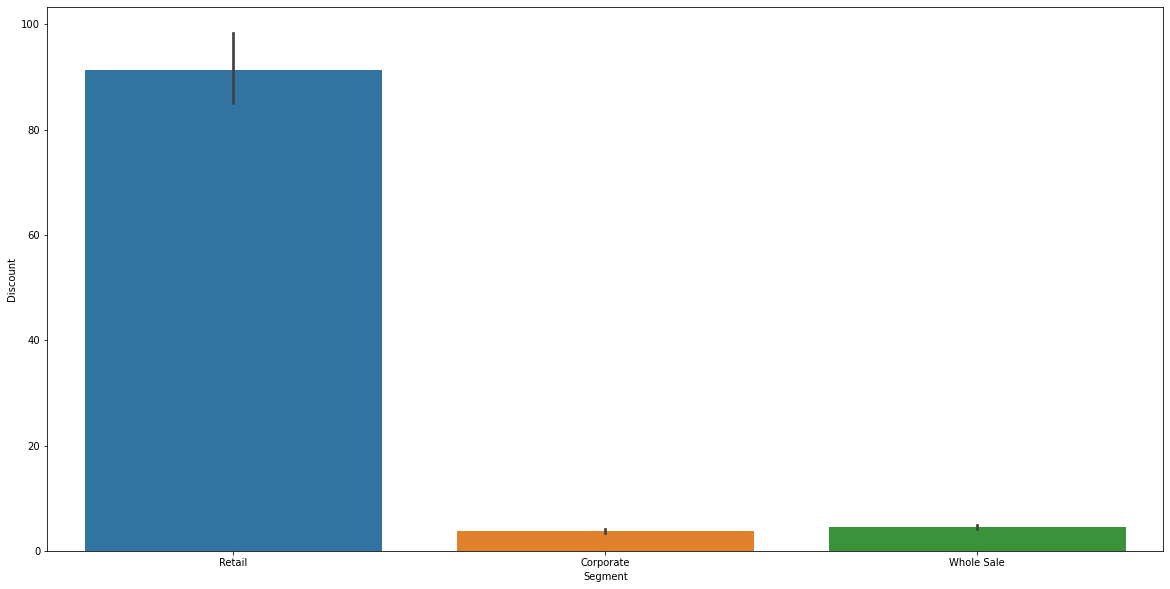

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


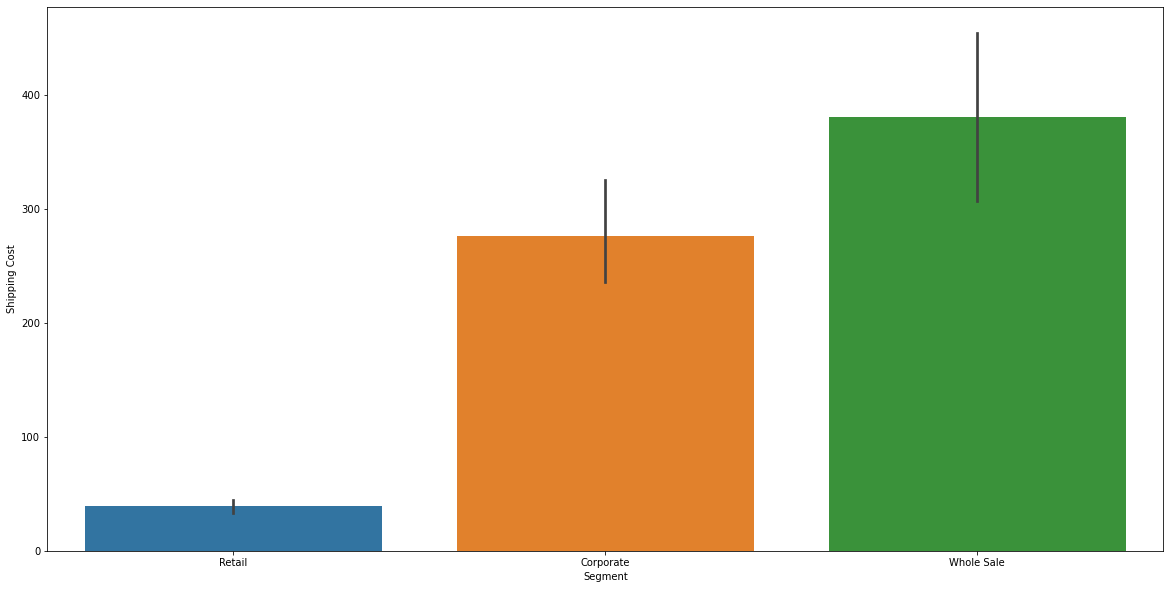

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


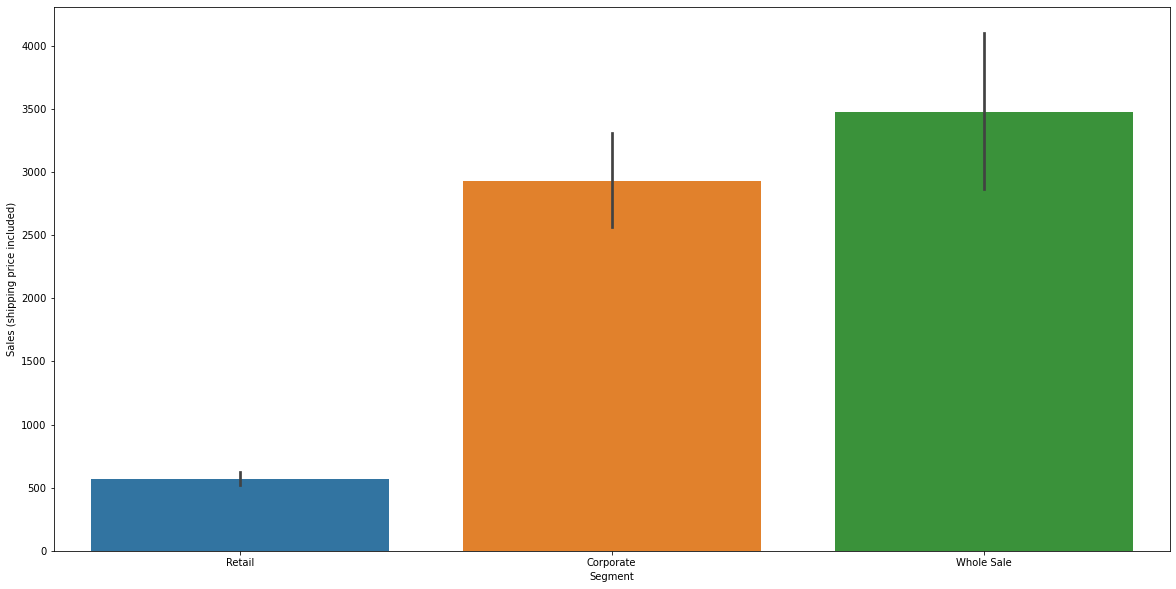

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


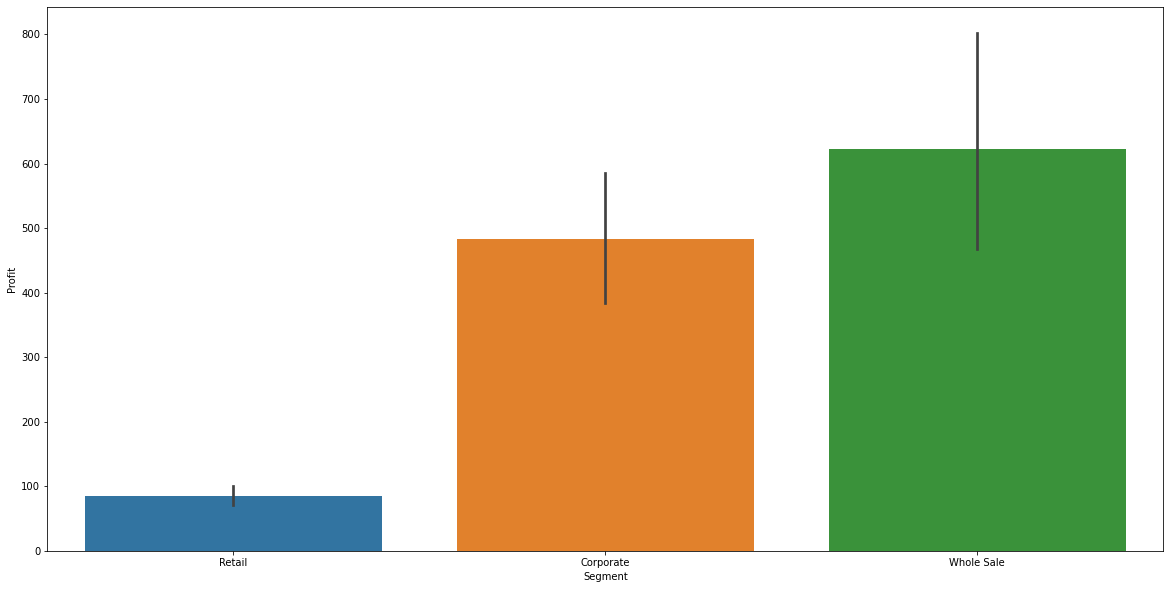

Visualizing Numerical Features with Segment


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


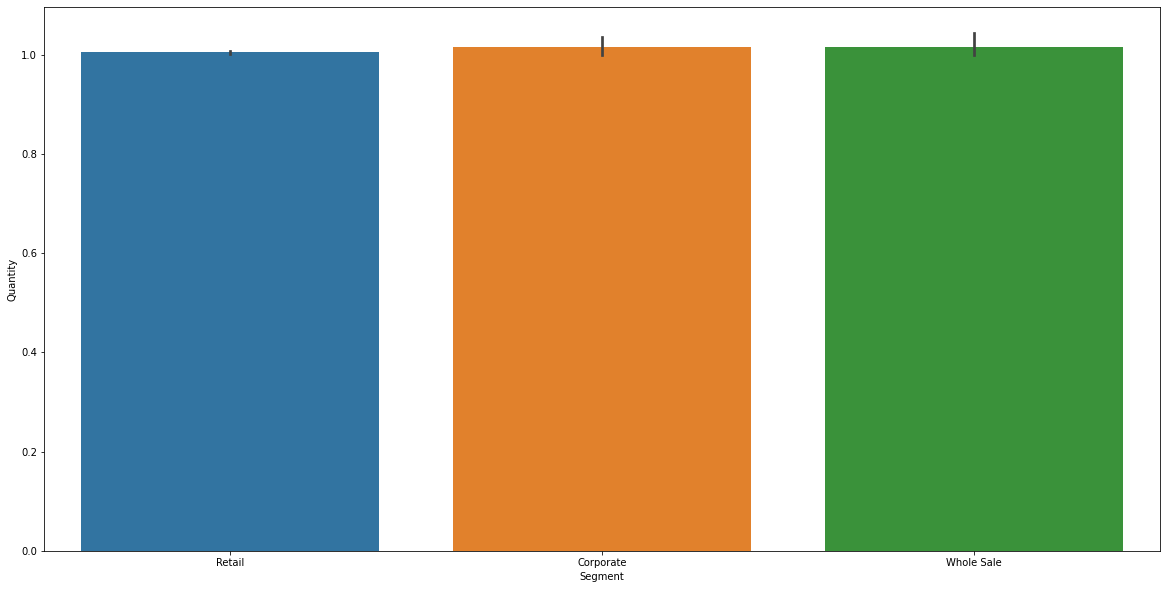

Visualizing Numerical Features with Segment


In [40]:
for i in ds[num_cols]:
    plt.figure(figsize=(20,10))
    sns.barplot(ds['Segment'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Segment")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


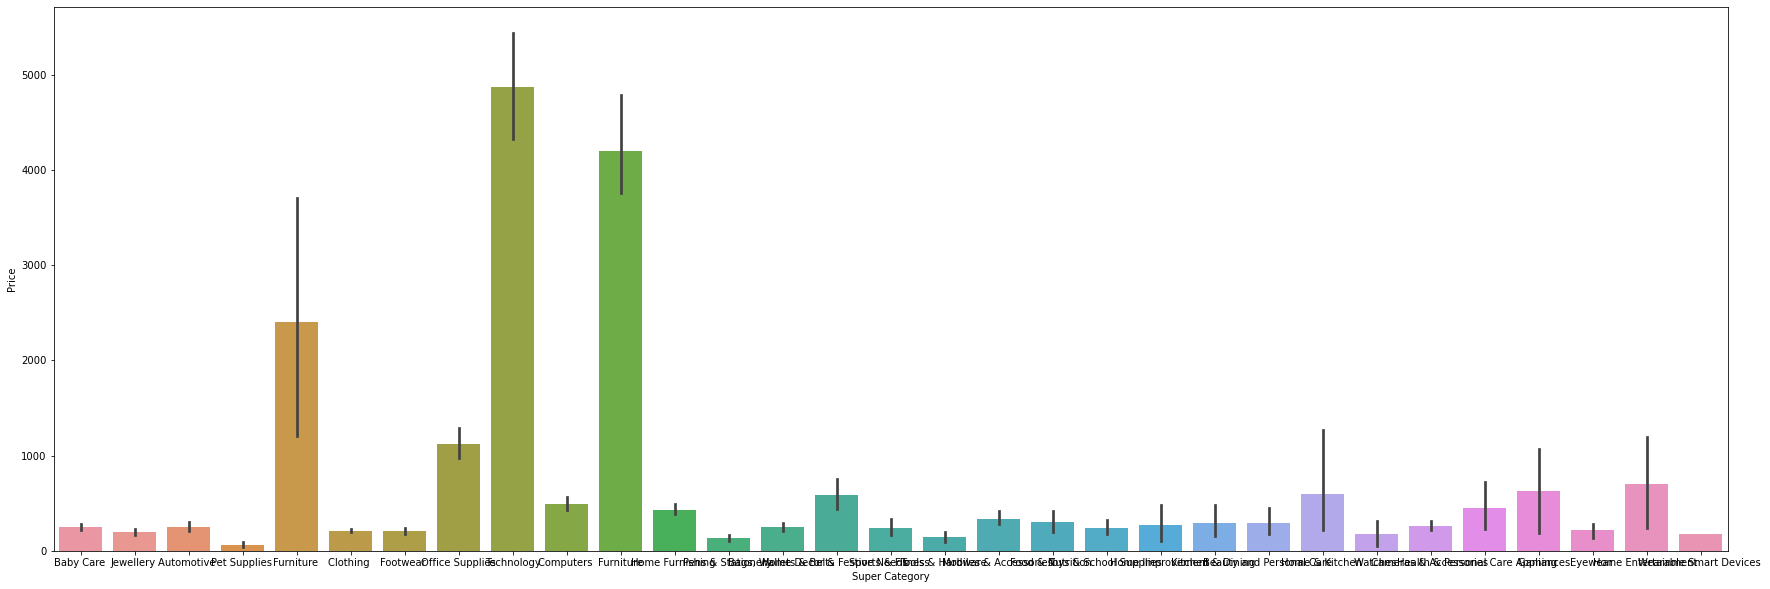

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


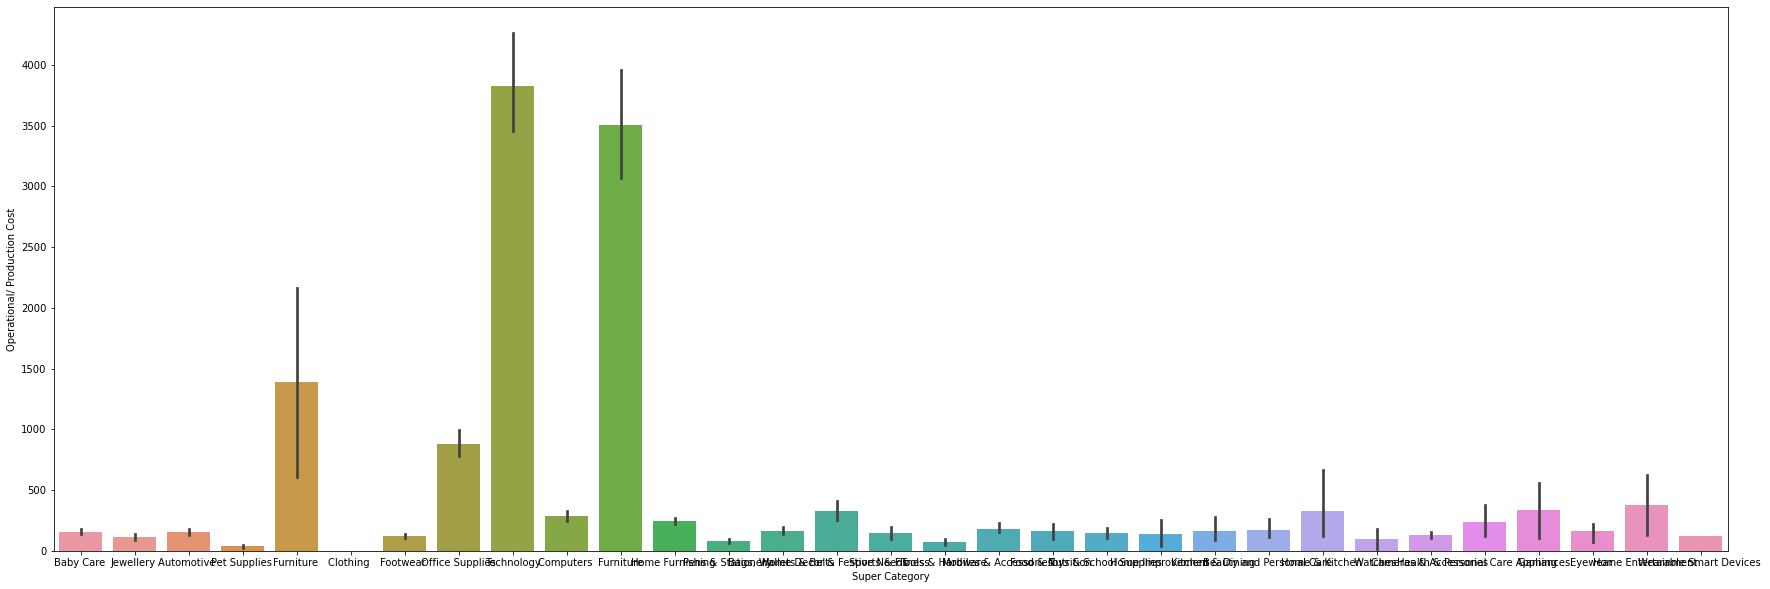

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


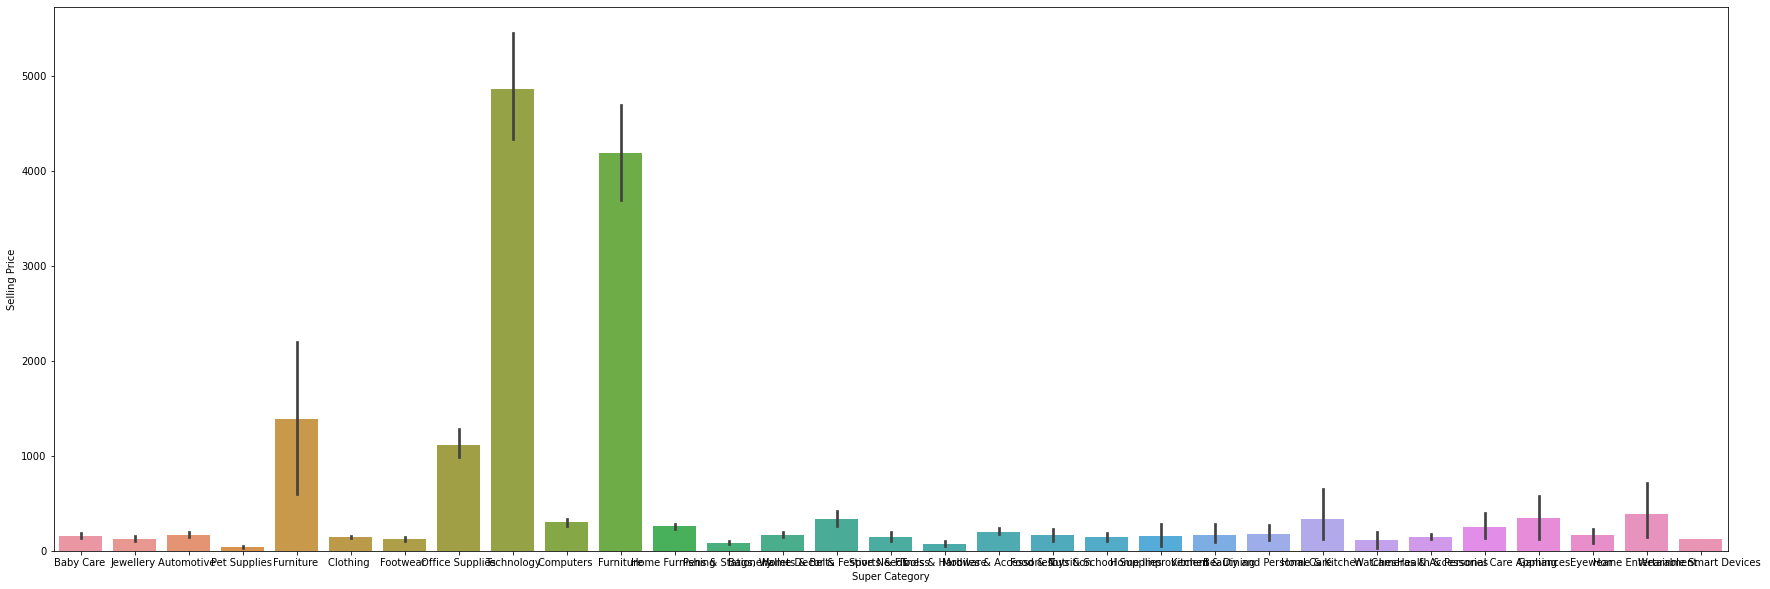

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


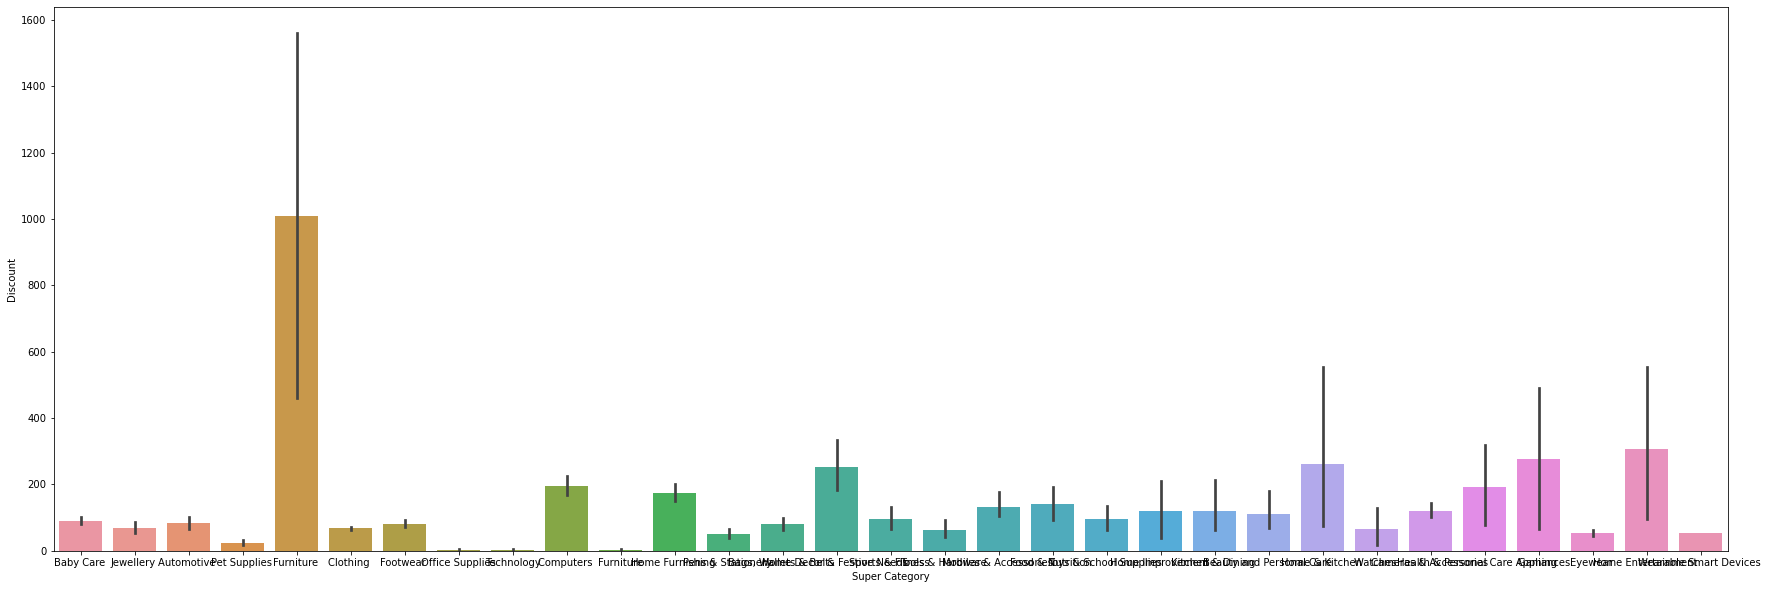

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


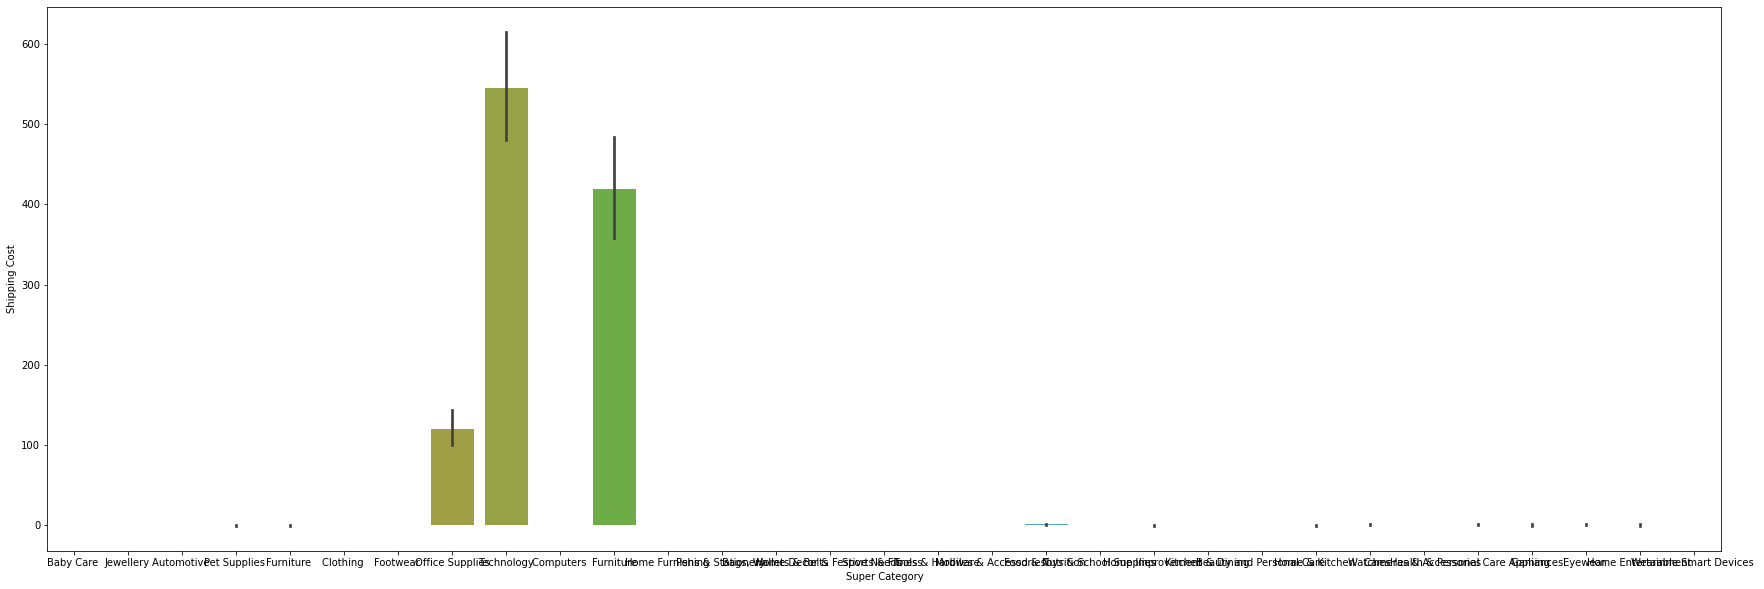

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


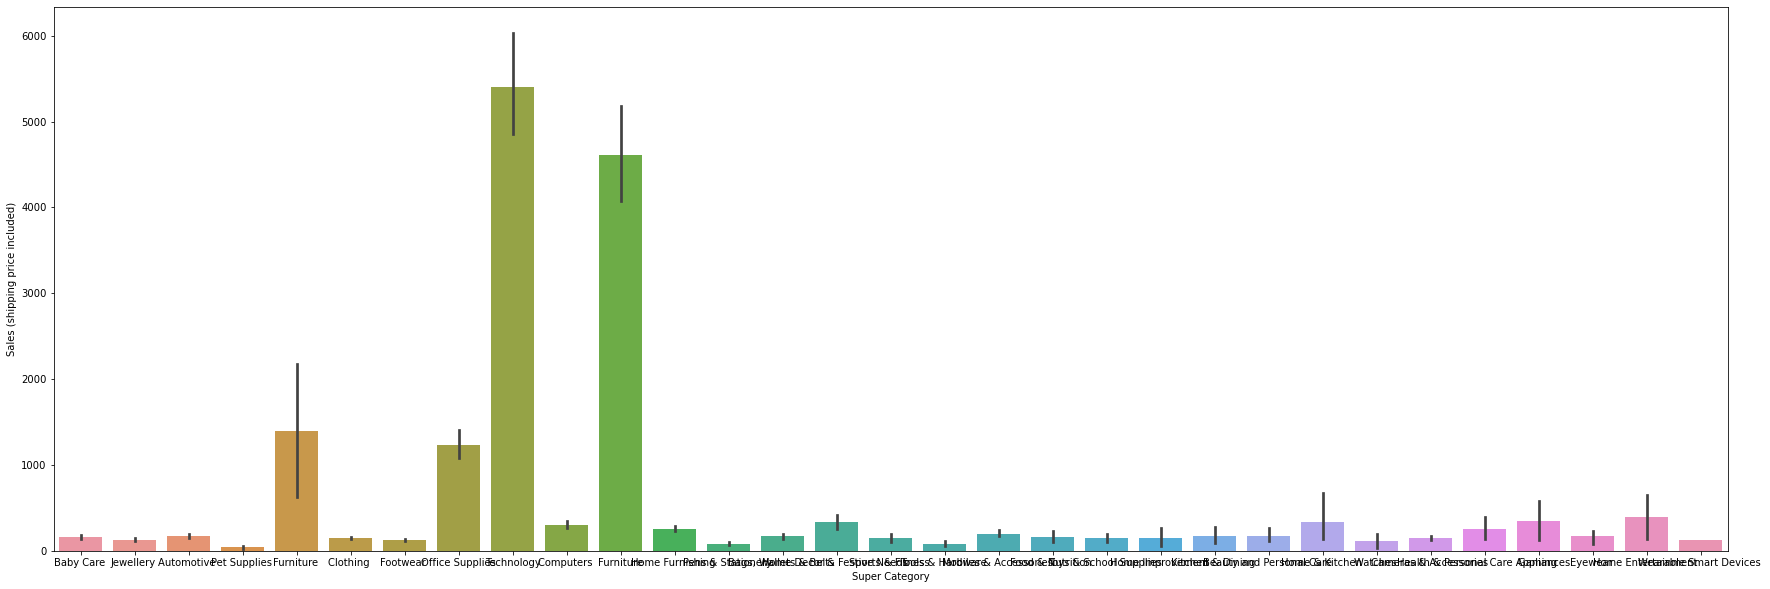

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


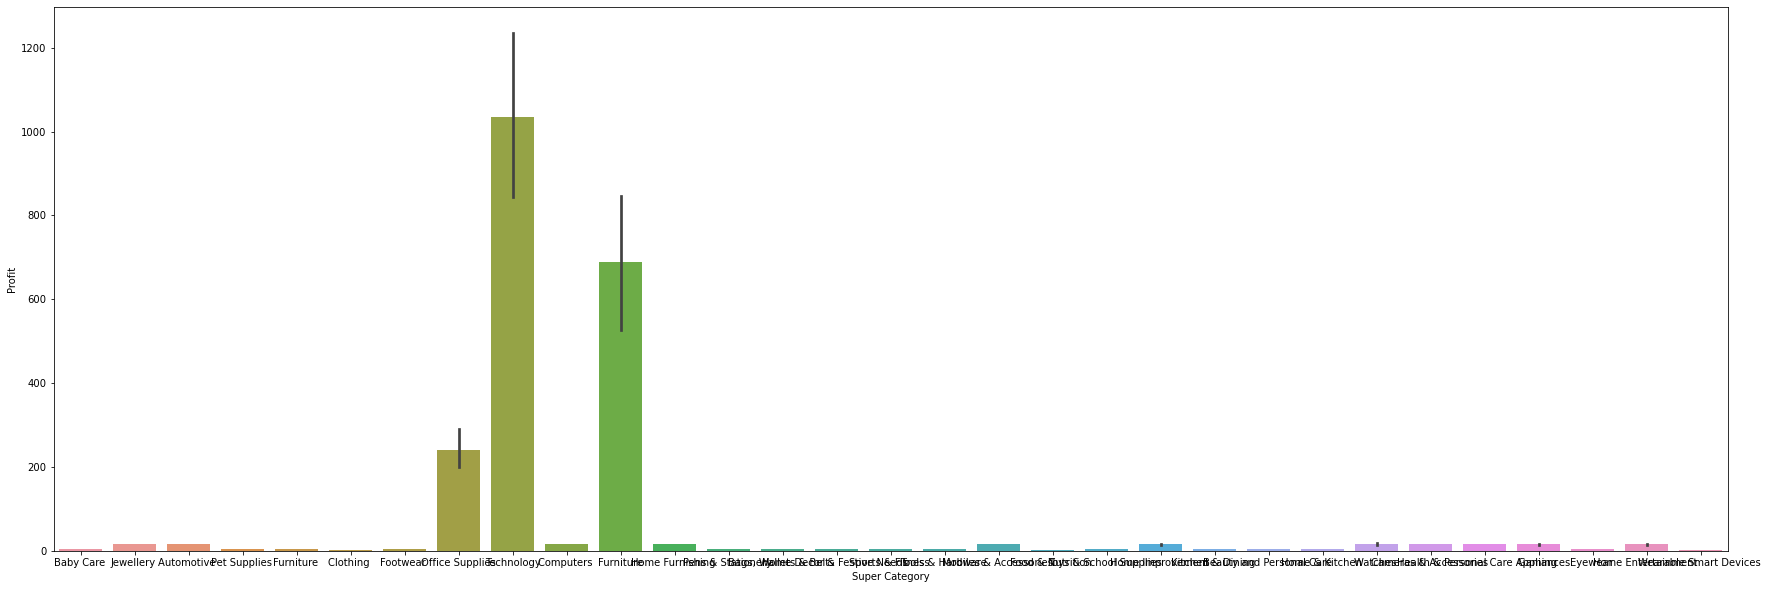

Visualizing Numerical Features with Super Category


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


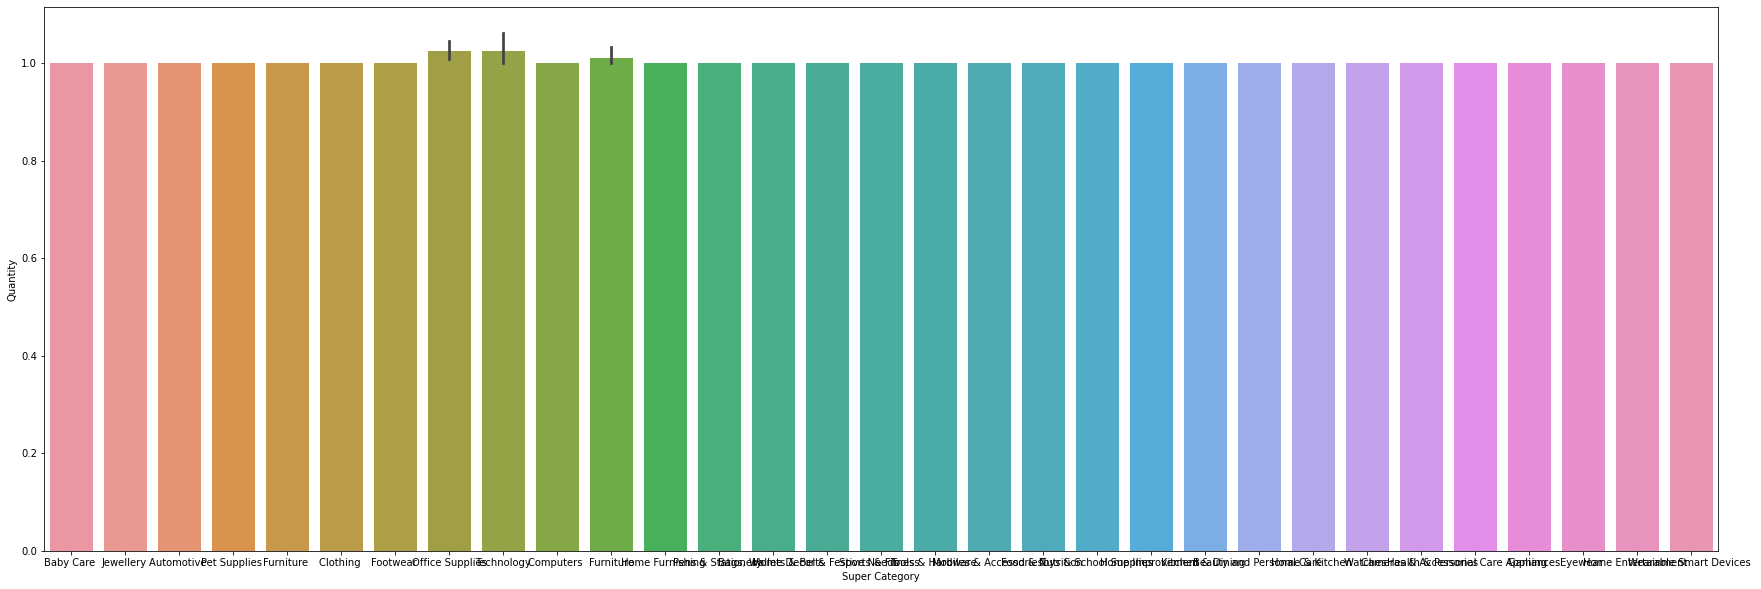

Visualizing Numerical Features with Super Category


In [41]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.barplot(ds['Super Category'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Super Category")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


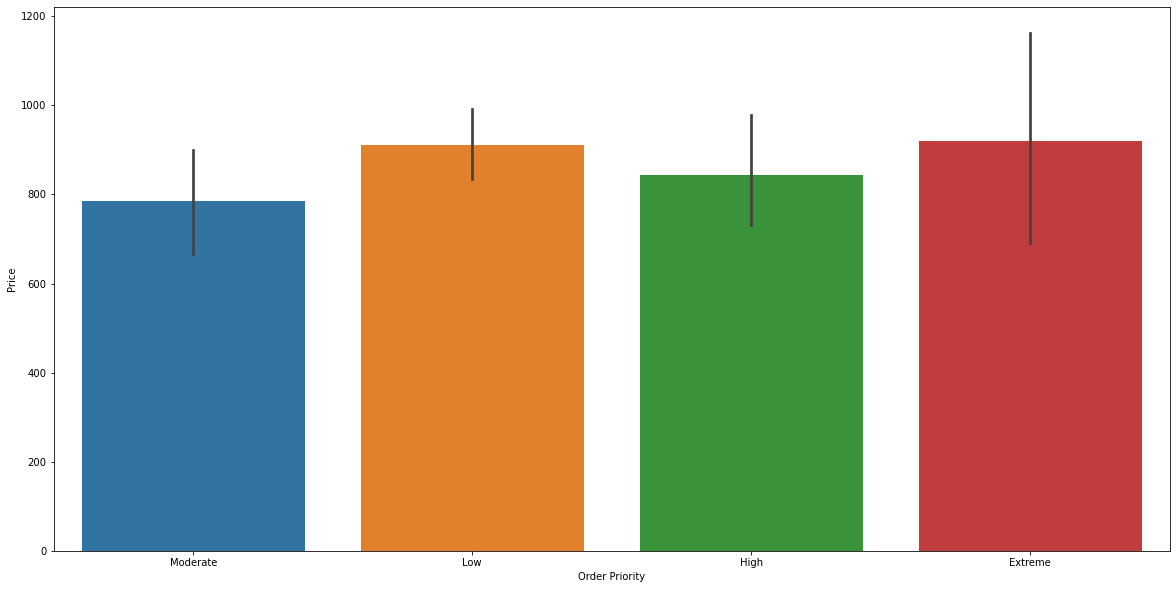

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


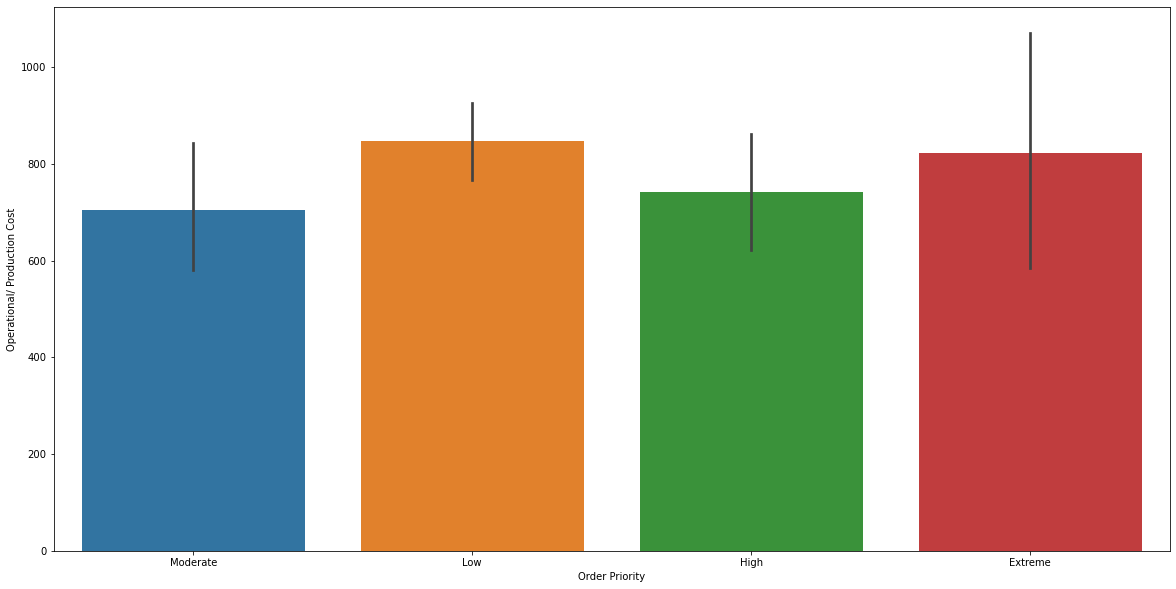

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


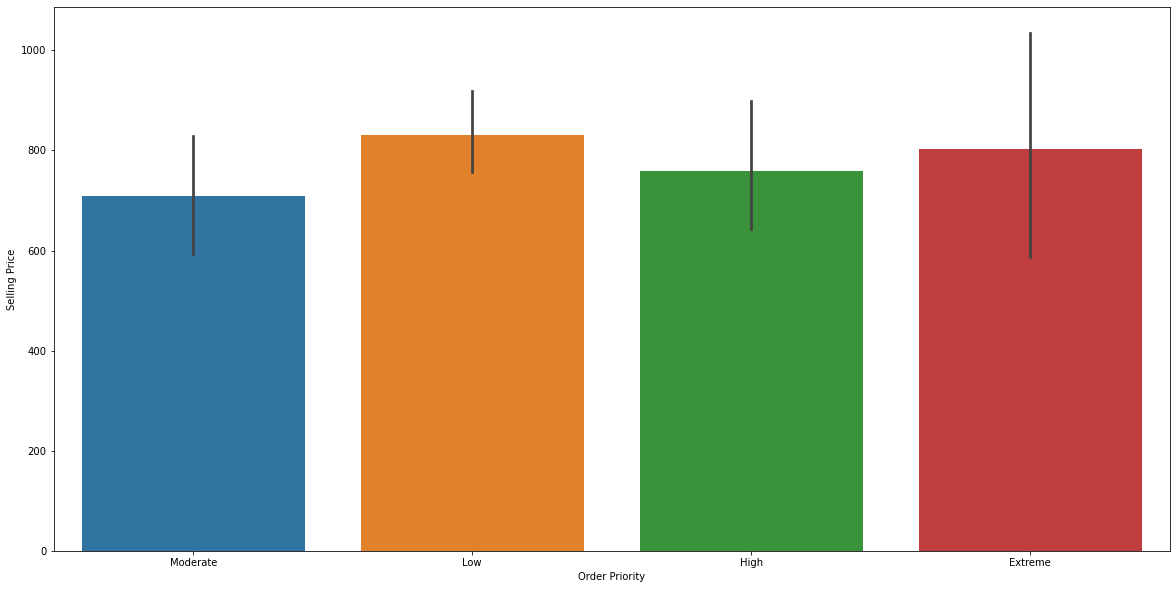

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


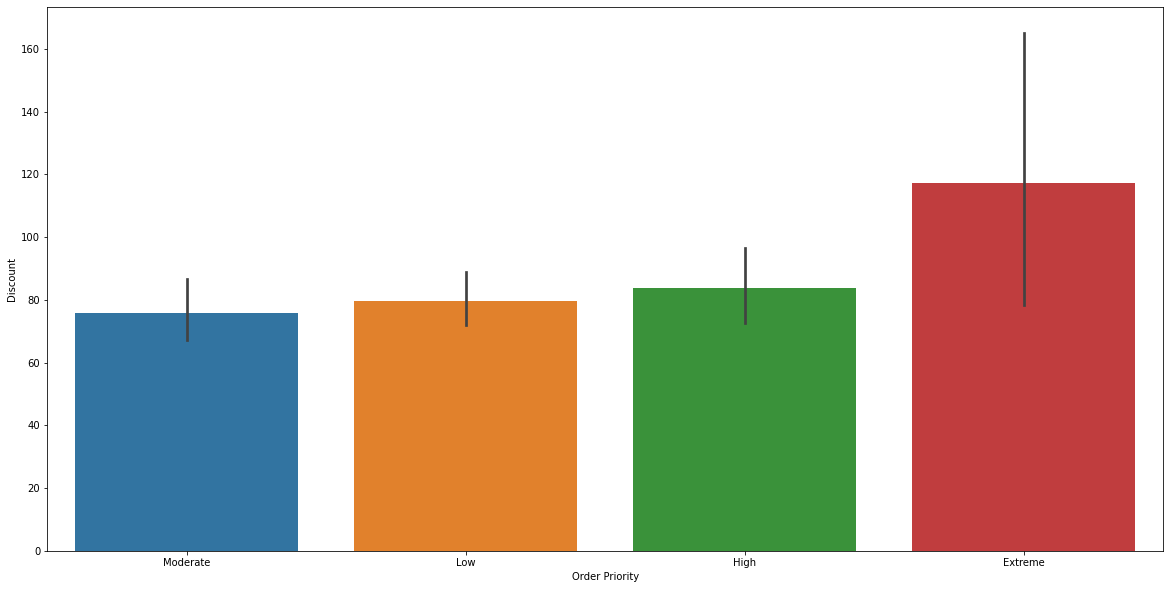

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


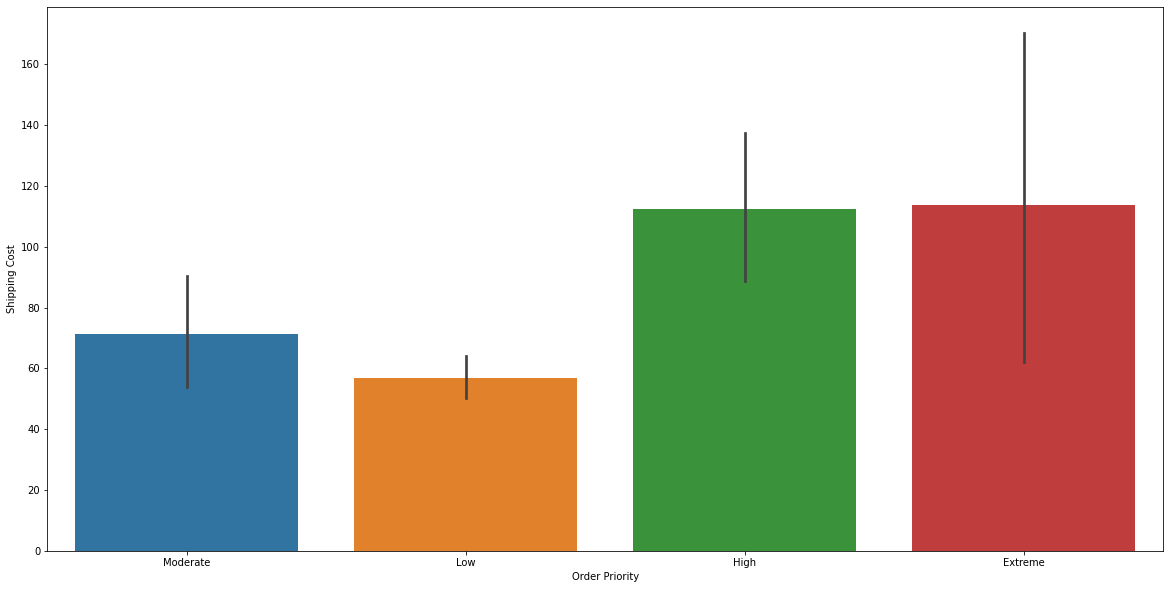

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


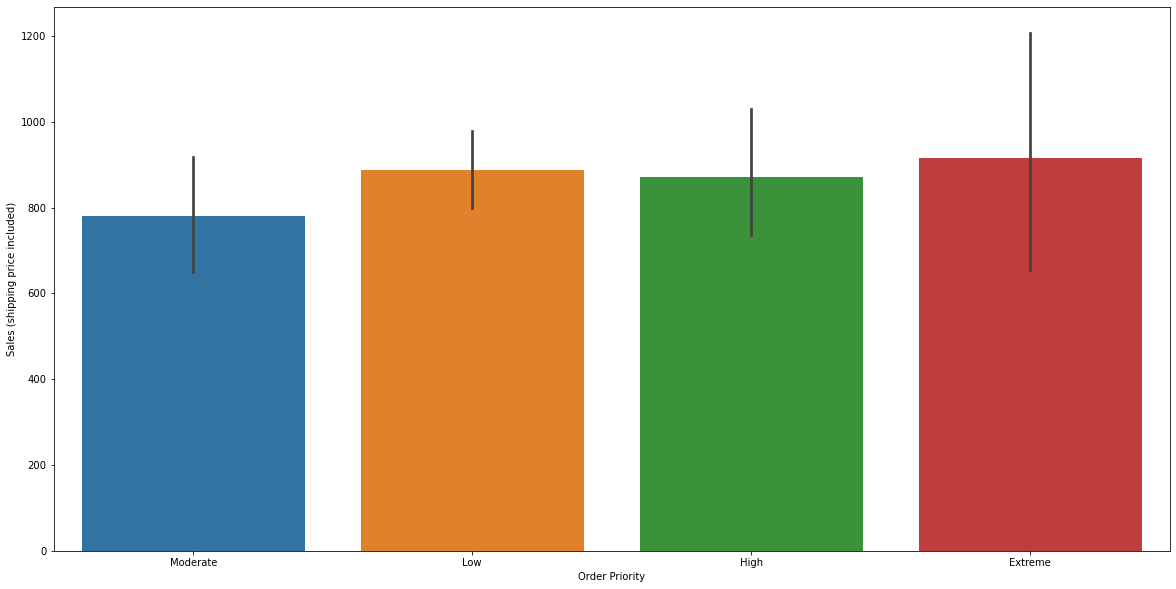

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


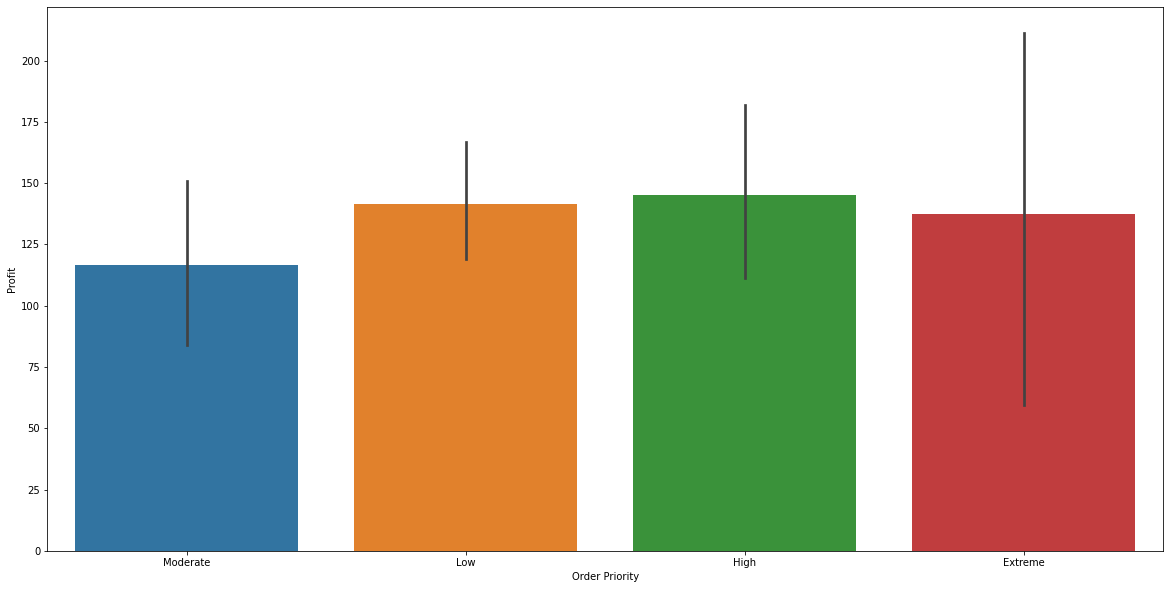

Visualizing Numerical Features with Order Priority


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


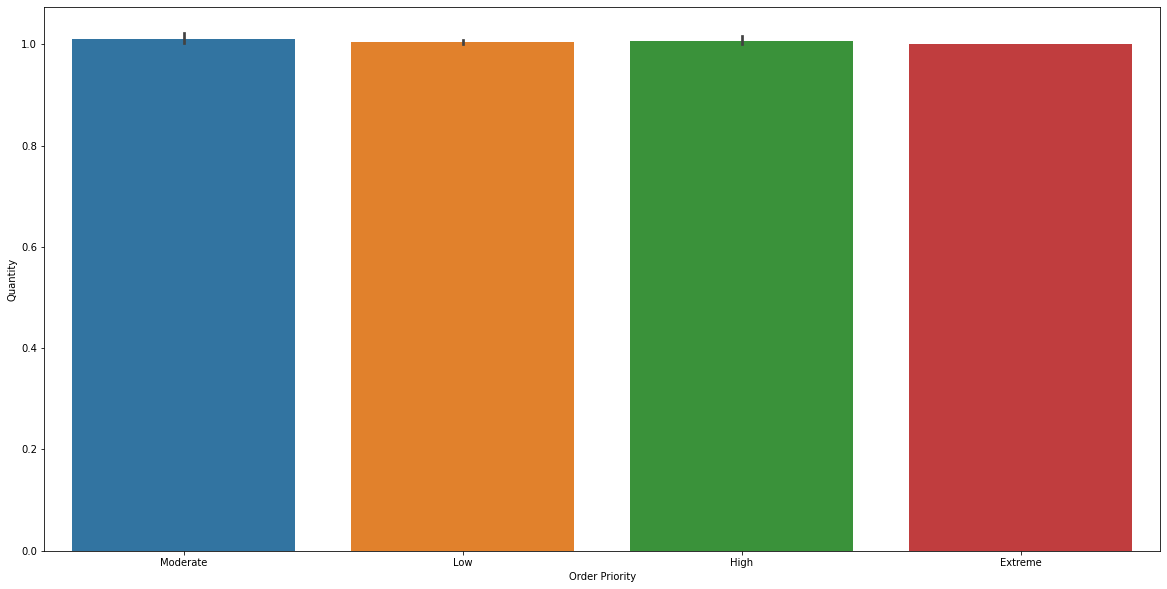

Visualizing Numerical Features with Order Priority


In [42]:
for i in ds[num_cols]:
    plt.figure(figsize=(20,10))
    sns.barplot(ds['Order Priority'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Order Priority")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


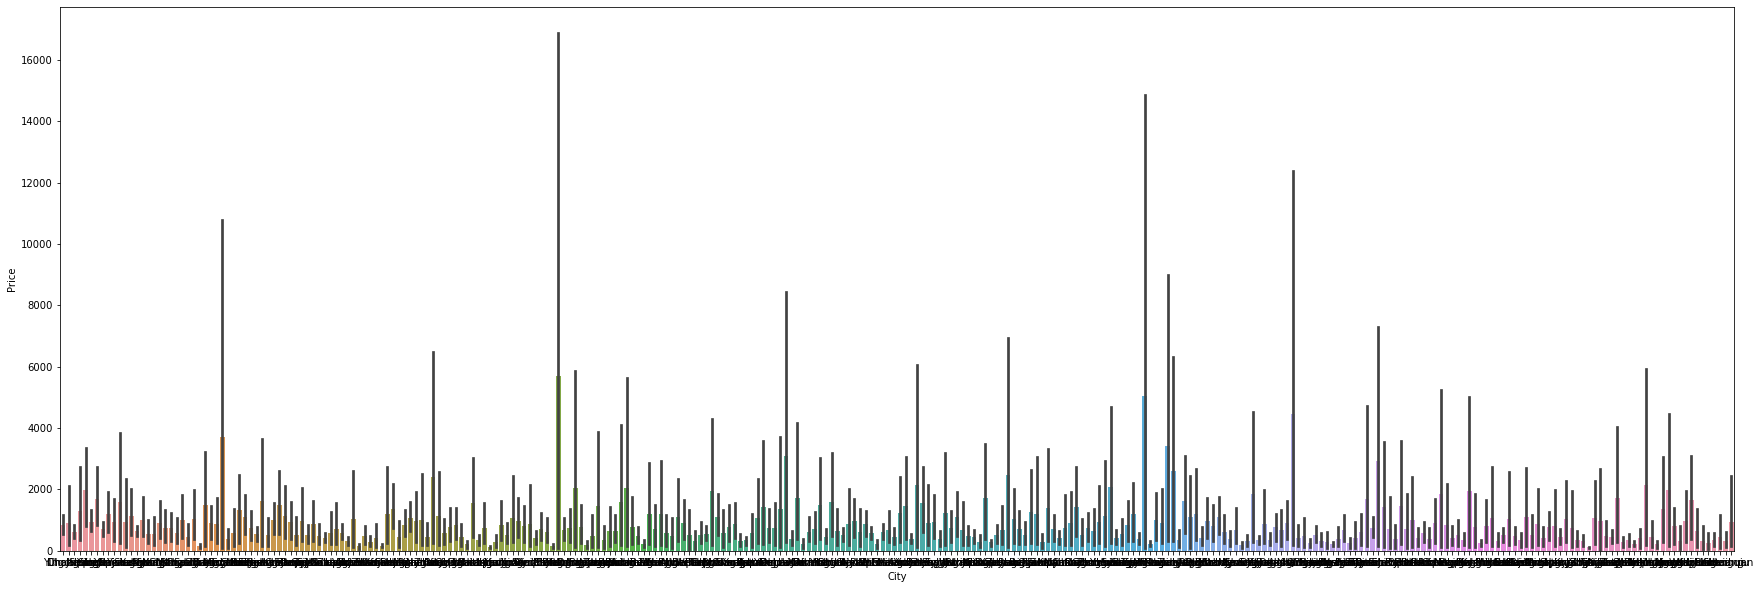

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


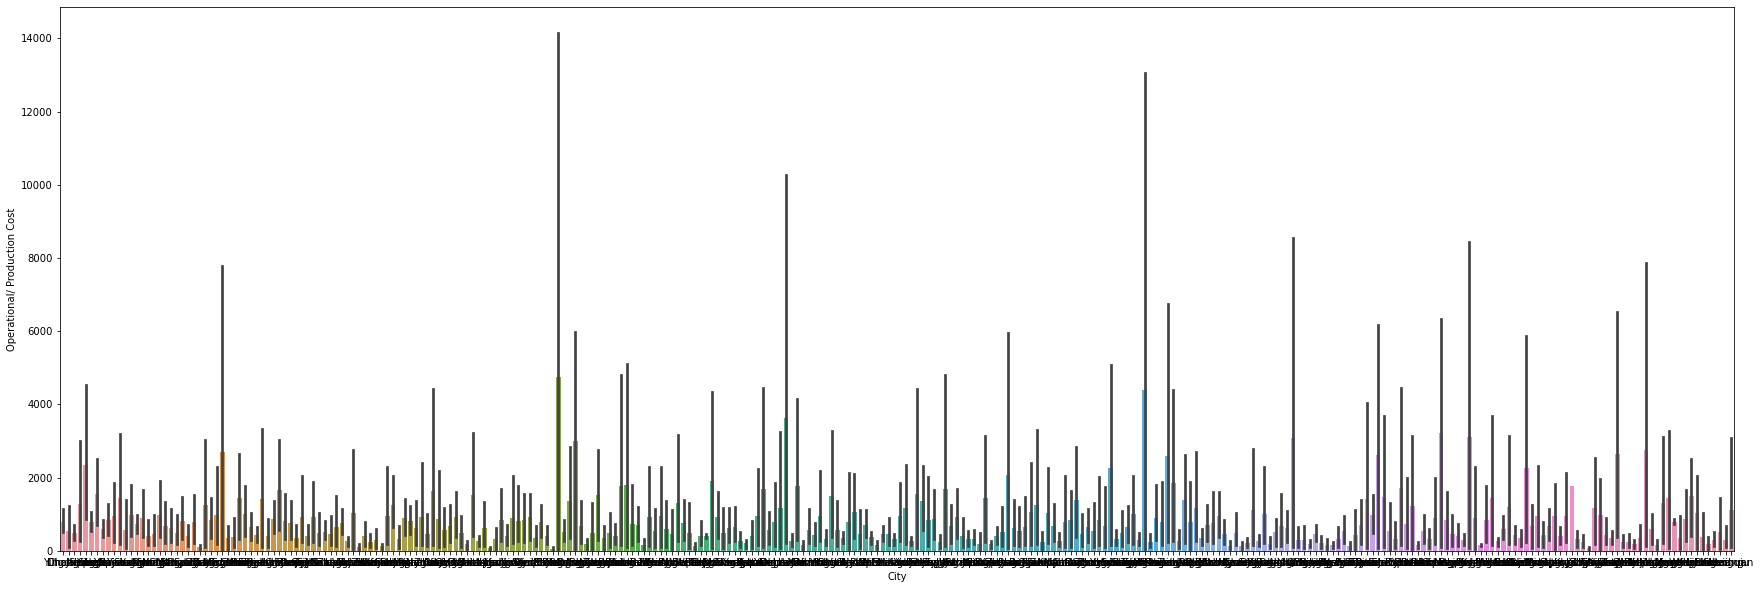

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


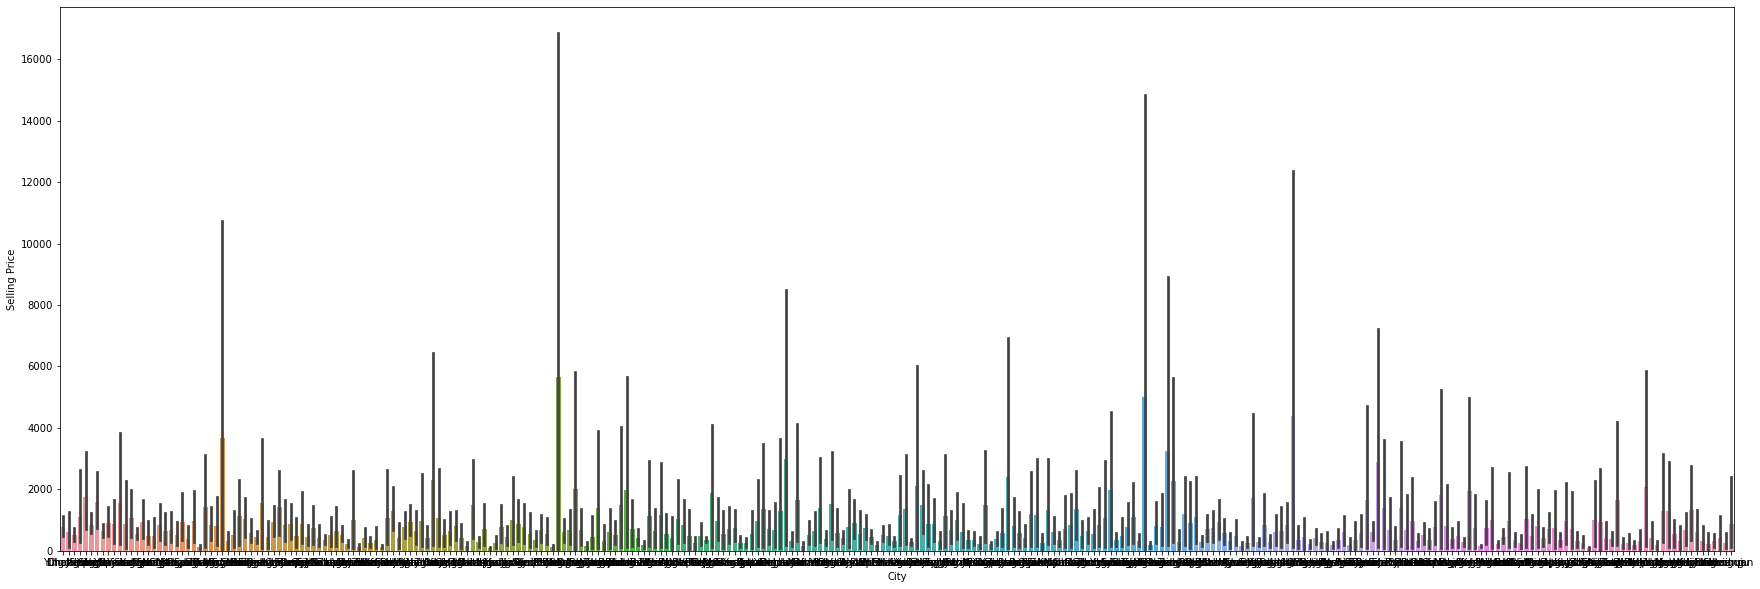

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


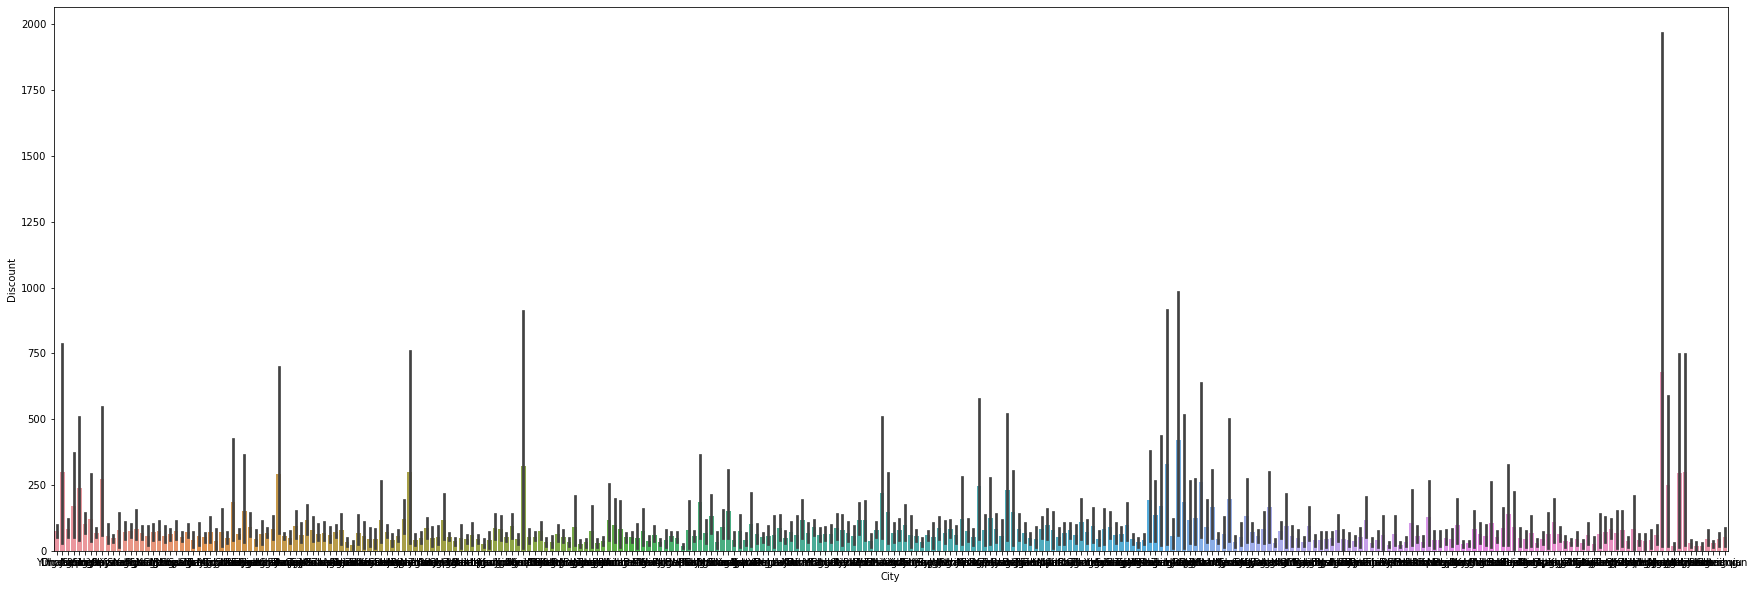

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


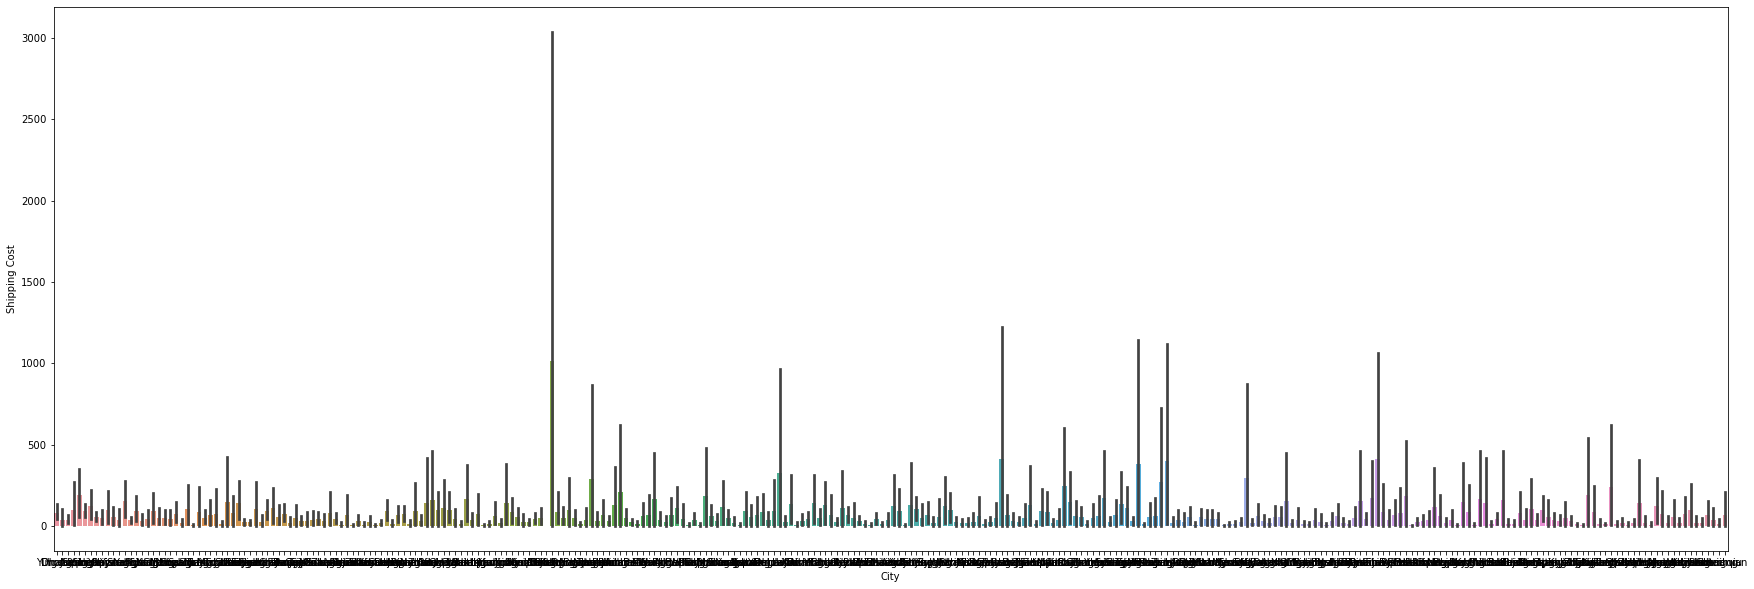

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


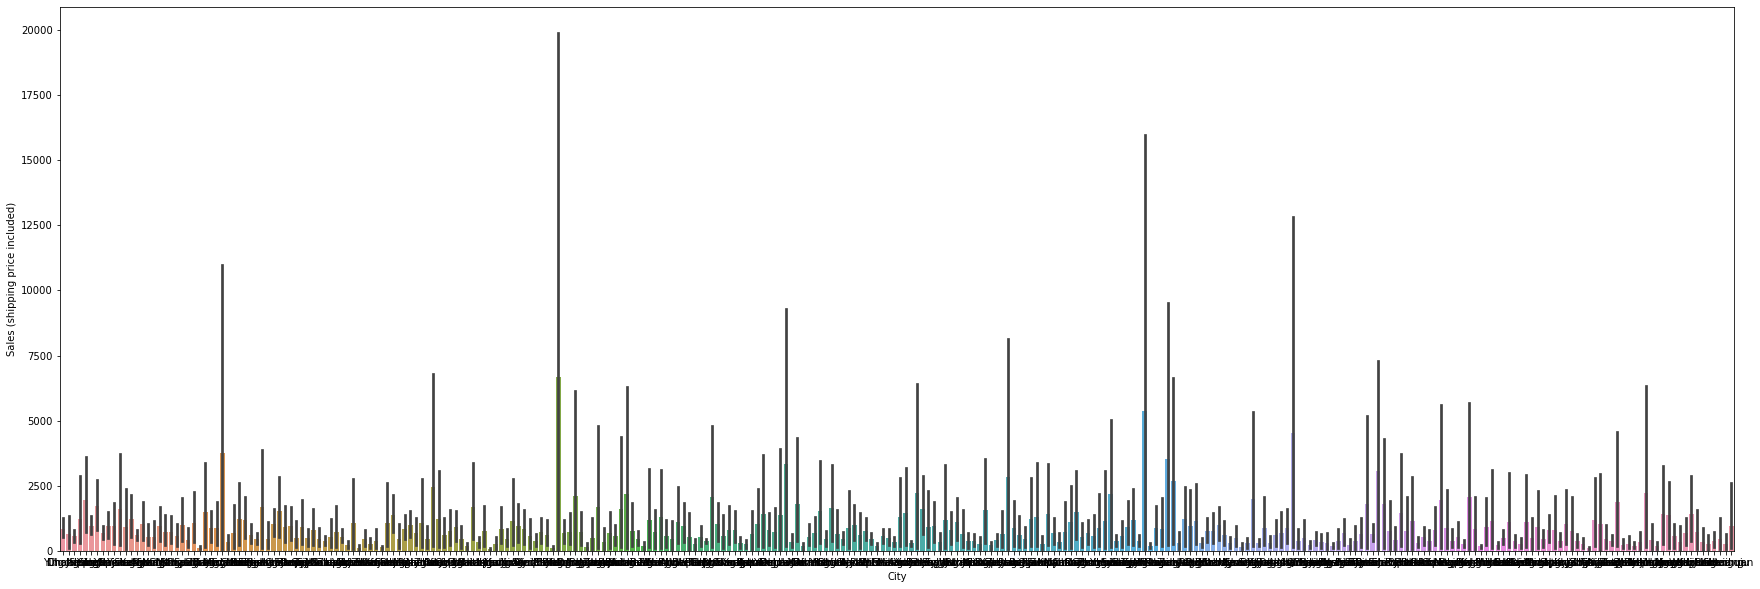

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


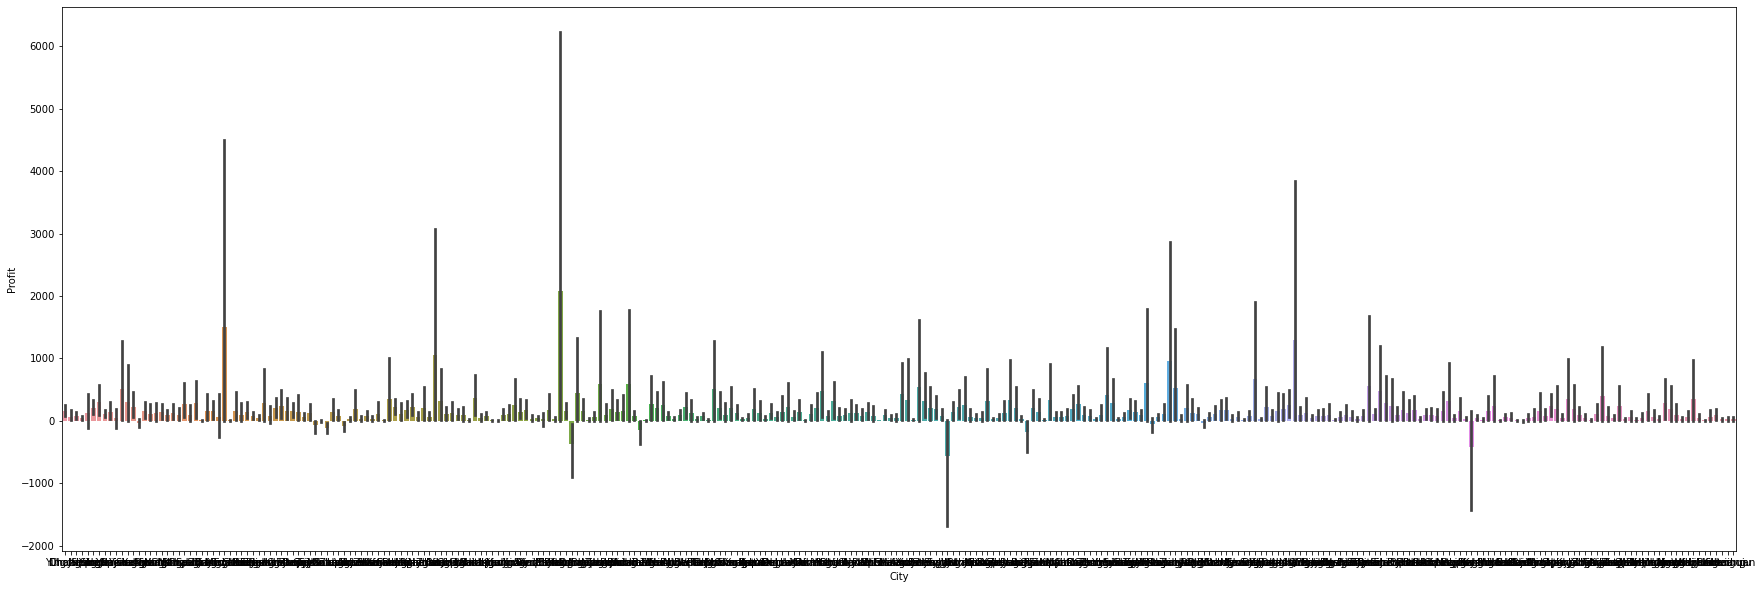

Visualizing Numerical Features with Order City


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


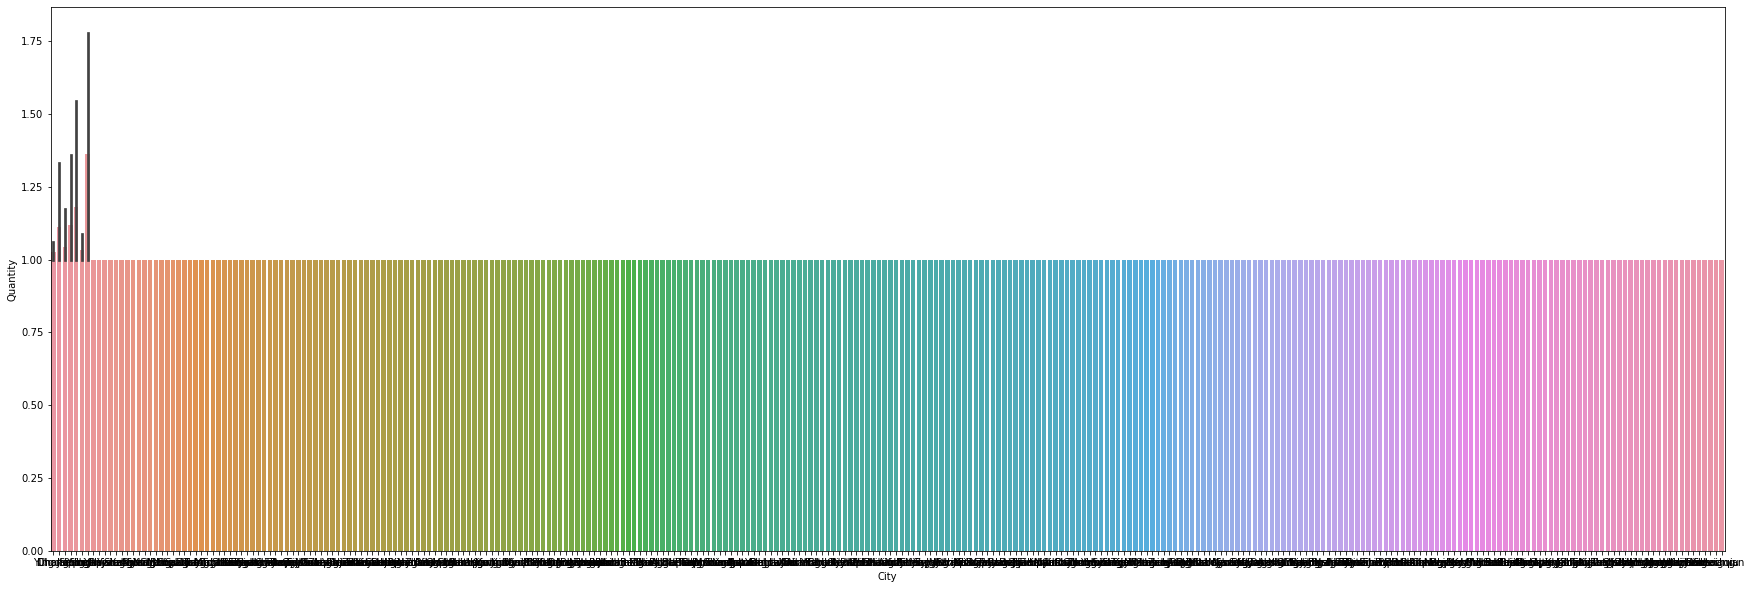

Visualizing Numerical Features with Order City


In [43]:
for i in ds[num_cols]:
    plt.figure(figsize=(30,10))
    sns.barplot(ds['City'],ds[i])
    plt.show()
    print("Visualizing Numerical Features with Order City")

#### j. Pair plot - All Numeric Variables 

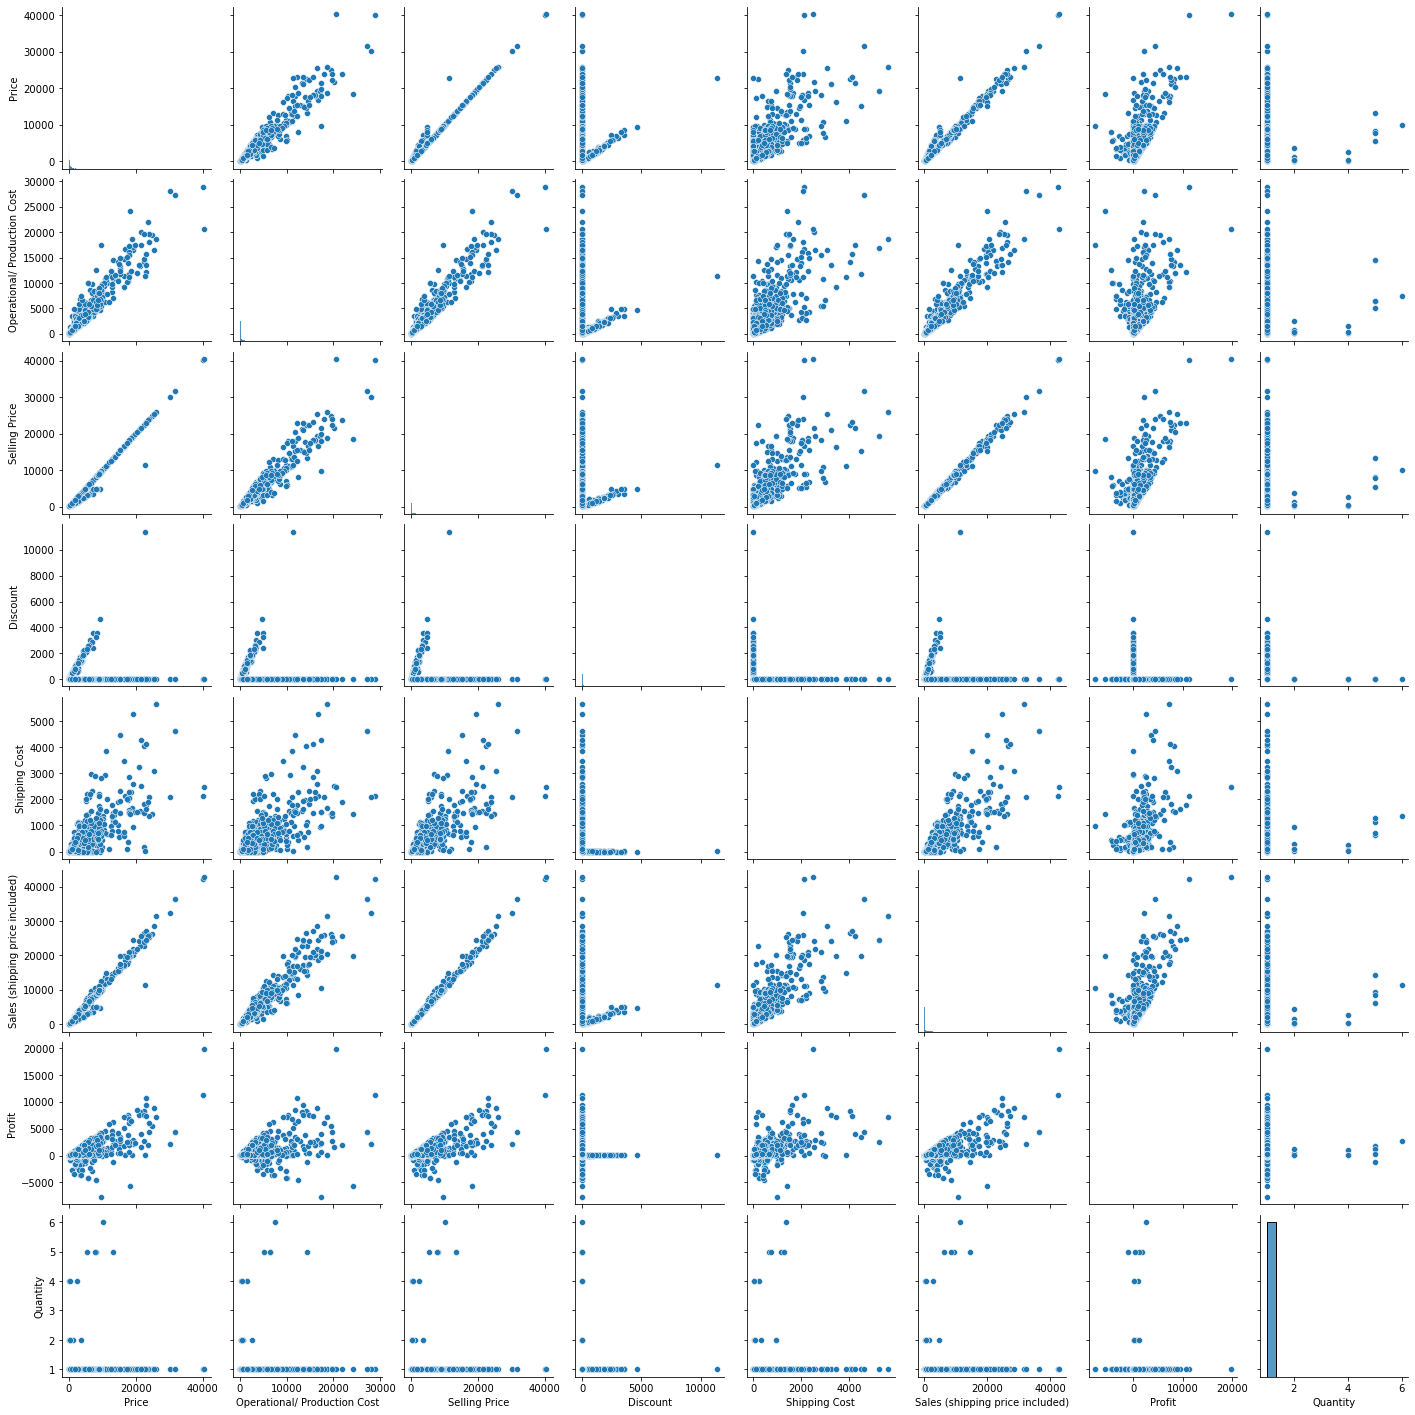

In [44]:
sns.pairplot(ds)

#### k. Line chart to show the trend of data - All Numeric/Date Variables

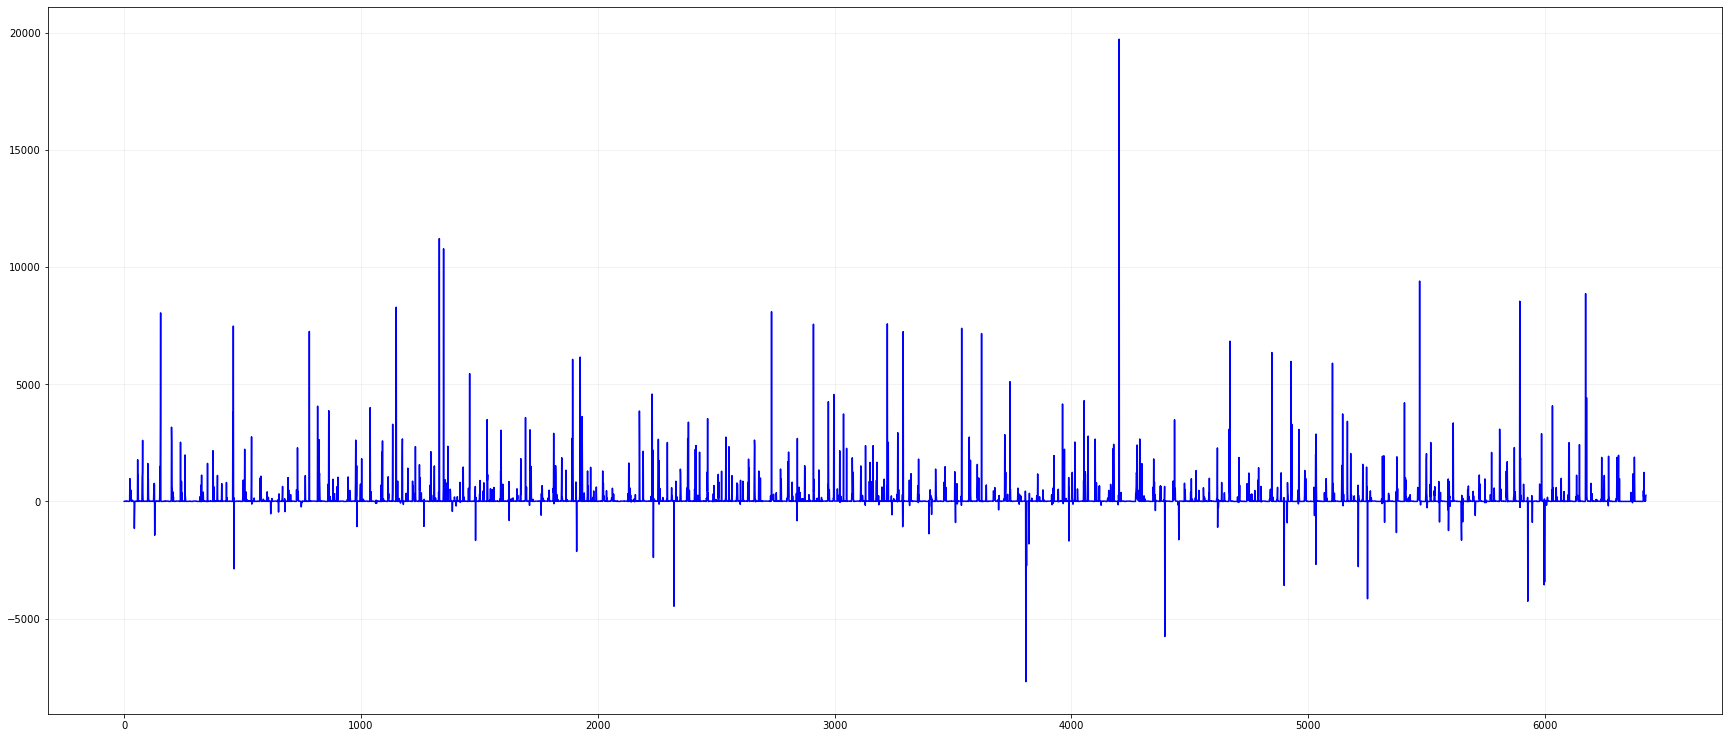

In [45]:
plt.figure(figsize=(30,13))
plt.plot(ds['Profit'], color='blue')
plt.grid(alpha=0.2)

In [46]:
ds['year'] = pd.DatetimeIndex(ds['Order Date']).year
ds['month'] = pd.DatetimeIndex(ds['Order Date']).month

In [47]:
ds.head()

Order Date Order Priority  Ship Type       City      State     Country  \
0   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1   1/2/2015       Moderate  Named Day  Yingcheng      Hubei       China   
2   1/2/2015       Moderate  Named Day  Chongqing  Chongqing       China   
3   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4   1/2/2015       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category        Price  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   1205.000000   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts    528.235294   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts    215.686274   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts    528.235294   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts    137.450980   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   
2                    142.098039     145.098039   70.588235            0.0   
3                    318.823529     323.823529  204.411765            0.0   
4                     71.372549      76.372549   61.078431            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  
0                       869.294118     4.0         1  2015      1  
1                       324.823529     3.0         1  2015      1  
2                       145.098039     3.0         1  2015      1  
3                       323.823529     5.0         1  2015      1  
4                        77.372549     5.0         1  2015      1

In [48]:
#convert month number to month name
ds['monthName'] = ds['month'].apply(lambda x: calendar.month_name[x])

In [49]:
ds['monthName']

0        January
1        January
2        January
3        January
4        January
          ...   
6423    December
6424    December
6425    December
6426    December
6427    December
Name: monthName, Length: 6428, dtype: object

In [50]:
ds['Order Date'] = pd.to_datetime(ds['Order Date'])

In [51]:
ds15 = (ds['Order Date'] > '01-01-2015') & (ds['Order Date'] <= '31-12-2016')

In [52]:
# locate rows and access them using .loc() function
ds15 = ds.loc[ds15]

In [53]:
ds16 = (ds['Order Date'] > '01-01-2016') & (ds['Order Date'] <= '31-12-2017')

In [54]:
# locate rows and access them using .loc() function
ds16 = ds.loc[ds16]

In [55]:
ds17 = (ds['Order Date'] > '01-01-2017') & (ds['Order Date'] <= '31-12-2018')

In [56]:
# locate rows and access them using .loc() function
ds17 = ds.loc[ds17]

Text(0.5, 1.0, 'Product Profit per Month year 2015')

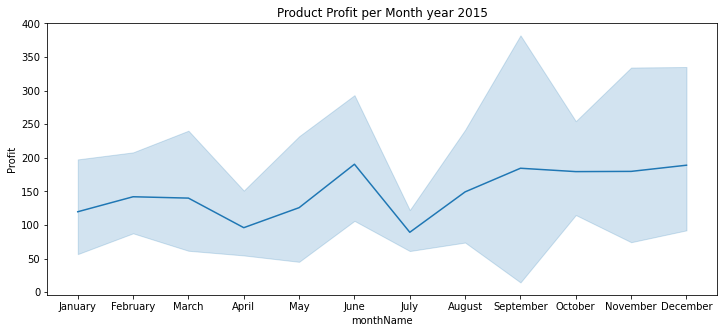

In [57]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Profit',data =ds15).set_title("Product Profit per Month year 2015")

Text(0.5, 1.0, 'Product Profit per Month year 2016')

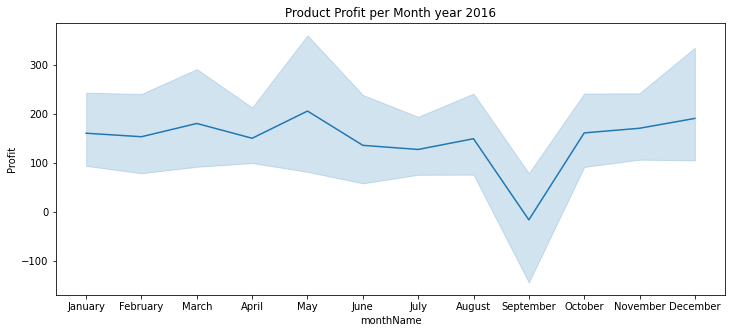

In [58]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Profit',data =ds16).set_title("Product Profit per Month year 2016")

Text(0.5, 1.0, 'Product Profit per Month year 2017')

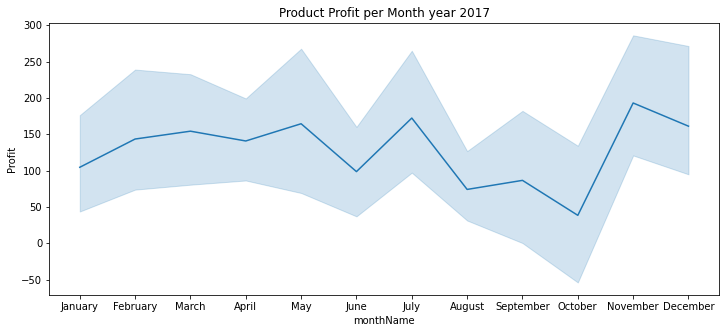

In [59]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Profit',data =ds17).set_title("Product Profit per Month year 2017")

Text(0.5, 1.0, 'Product Sales per Month year 2015')

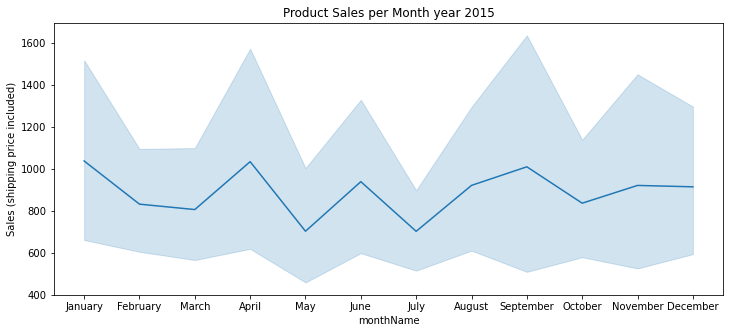

In [60]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Sales (shipping price included)',data =ds15).set_title("Product Sales per Month year 2015")

Text(0.5, 1.0, 'Product Sales per Month year 2016')

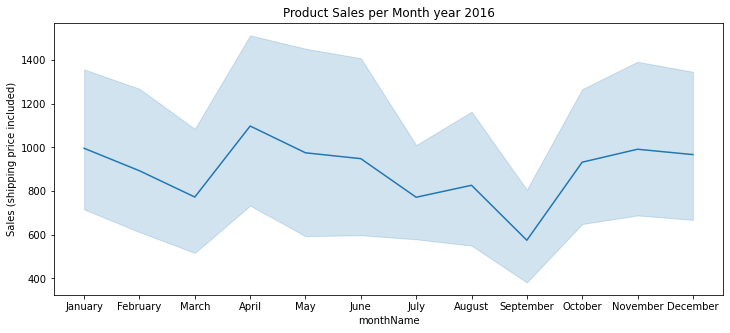

In [61]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Sales (shipping price included)',data =ds16).set_title("Product Sales per Month year 2016")

Text(0.5, 1.0, 'Product Sales per Month year 2017')

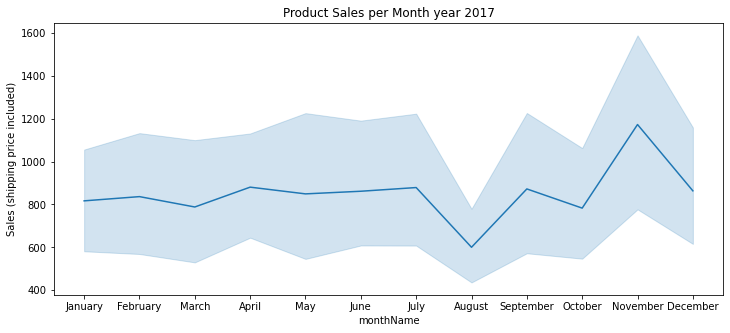

In [62]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Sales (shipping price included)',data =ds17).set_title("Product Sales per Month year 2017")

Text(0.5, 1.0, 'Product shipping cost wrt Month year 2015')

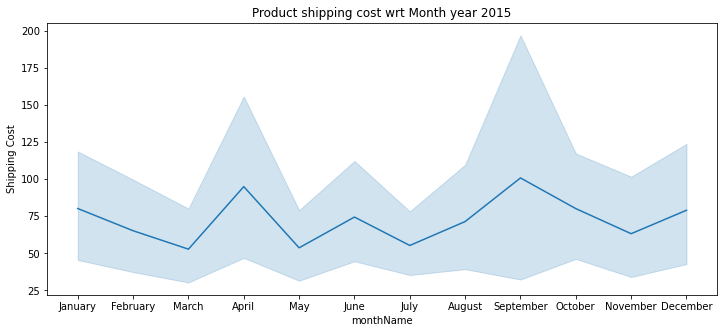

In [63]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Shipping Cost',data =ds15).set_title("Product shipping cost wrt Month year 2015")

Text(0.5, 1.0, 'Product shipping cost wrt Month year 2016')

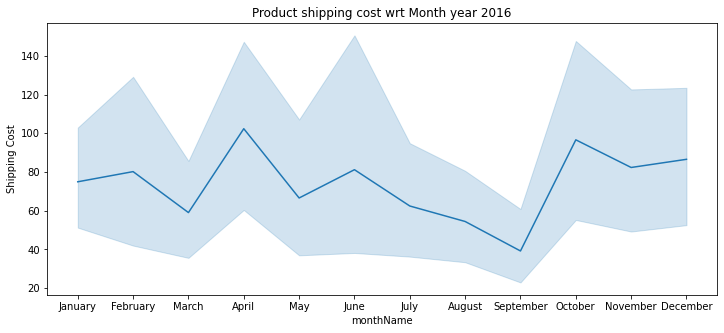

In [64]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Shipping Cost',data =ds16).set_title("Product shipping cost wrt Month year 2016")

Text(0.5, 1.0, 'Product shipping cost wrt Month year 2017')

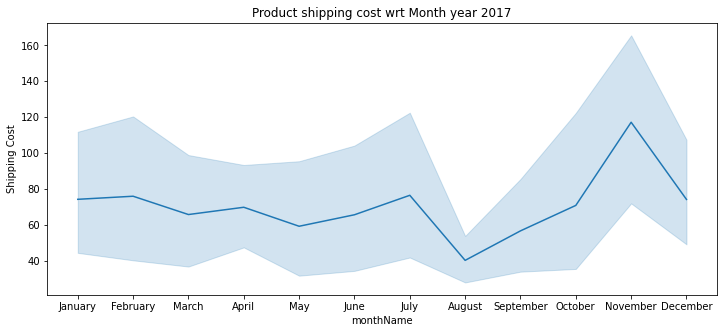

In [65]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Shipping Cost',data =ds17).set_title("Product shipping cost wrt Month year 2017")

Text(0.5, 1.0, 'Product Discount wrt Month year 2015')

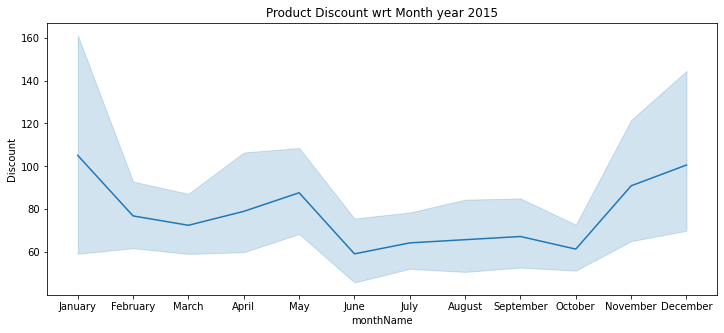

In [66]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Discount',data =ds15).set_title("Product Discount wrt Month year 2015")

Text(0.5, 1.0, 'Product Discount wrt Month year 2016')

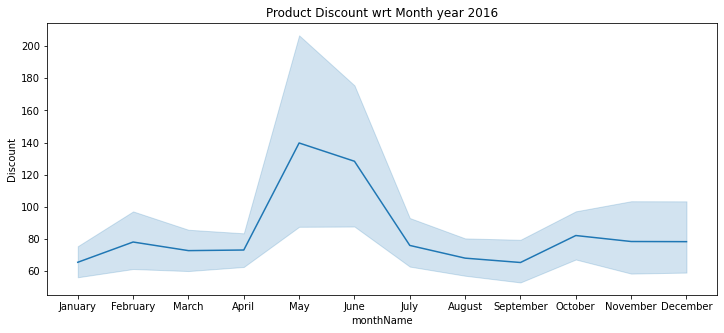

In [67]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Discount',data =ds16).set_title("Product Discount wrt Month year 2016")

Text(0.5, 1.0, 'Product Discount wrt Month year 2017')

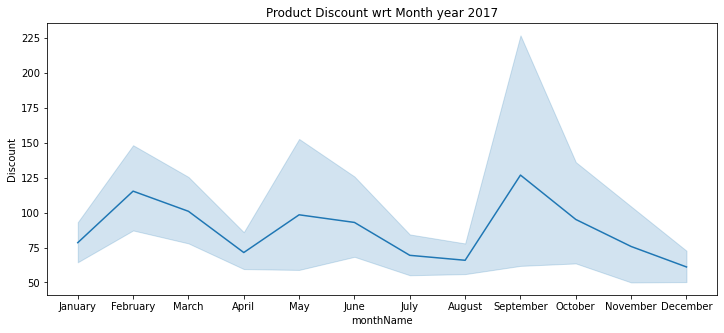

In [68]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Discount',data =ds17).set_title("Product Discount wrt Month year 2017")

Text(0.5, 1.0, 'Product Operational/ Production Cost wrt Month year 2015')

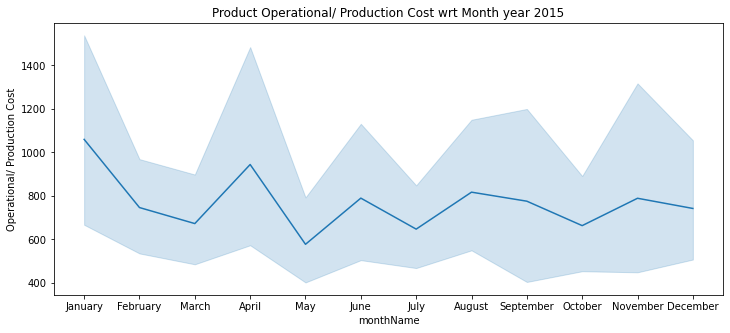

In [69]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Operational/ Production Cost',data =ds15).set_title("Product Operational/ Production Cost wrt Month year 2015")

Text(0.5, 1.0, 'Product Operational/ Production Cost wrt Month year 2016')

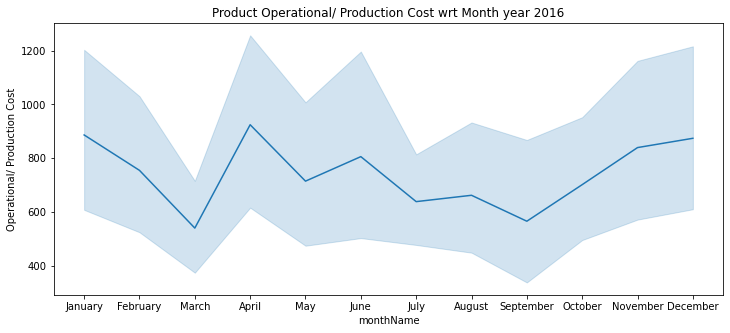

In [70]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Operational/ Production Cost',data =ds16).set_title("Product Operational/ Production Cost wrt Month year 2016")

Text(0.5, 1.0, 'Product Operational/ Production Cost wrt Month year 2017')

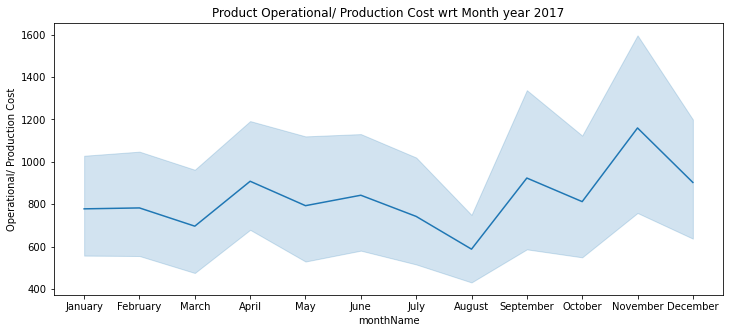

In [71]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Operational/ Production Cost',data =ds17).set_title("Product Operational/ Production Cost wrt Month year 2017")

Text(0.5, 1.0, 'Product Selling Price wrt Month year 2015')

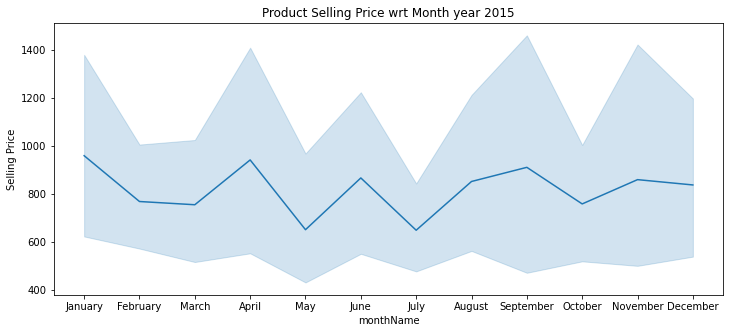

In [72]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Selling Price',data =ds15).set_title("Product Selling Price wrt Month year 2015")

Text(0.5, 1.0, 'Product Selling Price wrt Month year 2016')

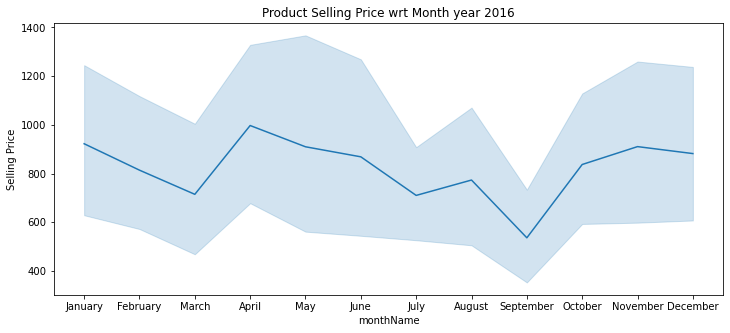

In [73]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Selling Price',data =ds16).set_title("Product Selling Price wrt Month year 2016")

Text(0.5, 1.0, 'Product Selling Price wrt Month year 2017')

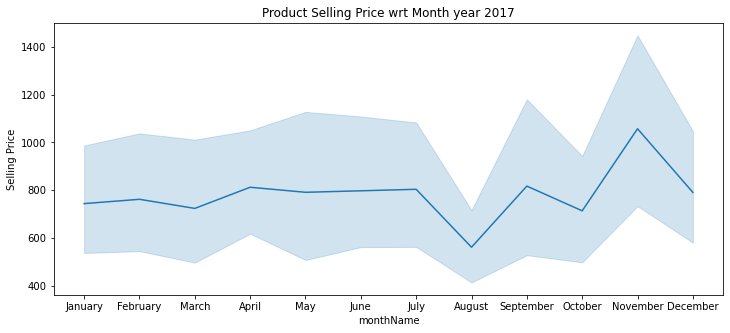

In [74]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Selling Price',data =ds17).set_title("Product Selling Price wrt Month year 2017")

Text(0.5, 1.0, 'Product Shipping Cost wrt Month')

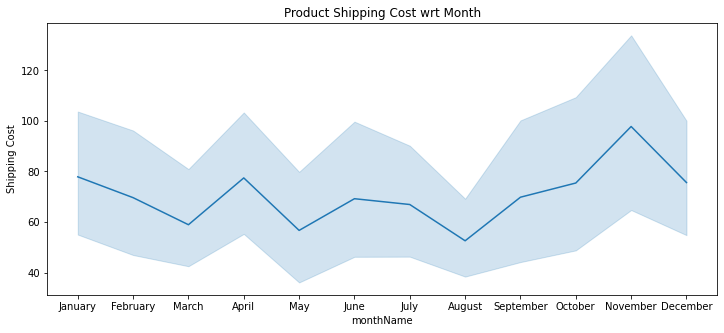

In [75]:
plt.figure(figsize=(12,5))
sns.lineplot(x="monthName",  y = 'Shipping Cost',data =ds).set_title("Product Shipping Cost wrt Month")

Text(0.5, 1.0, 'Product Profit per Month year 2015')

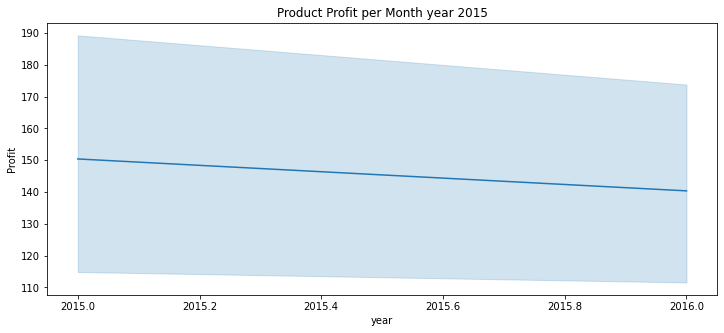

In [76]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Profit',data =ds15).set_title("Product Profit per Month year 2015")

Text(0.5, 1.0, 'Product Profit per Month year 2016')

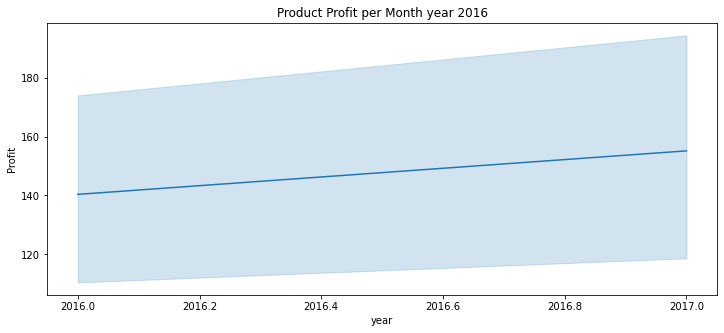

In [77]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Profit',data =ds16).set_title("Product Profit per Month year 2016")

Text(0.5, 1.0, 'Product Profit per Month year 2017')

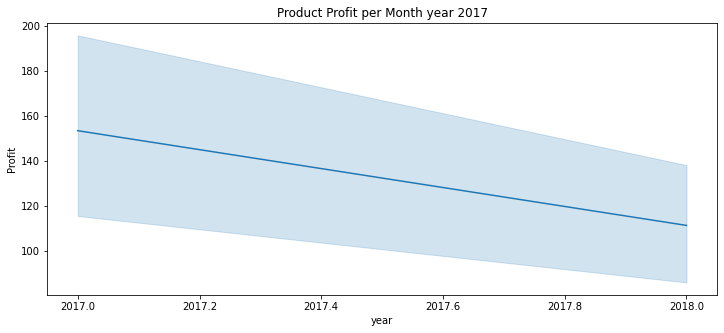

In [78]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Profit',data =ds17).set_title("Product Profit per Month year 2017")

Text(0.5, 1.0, 'Product Sales per Month')

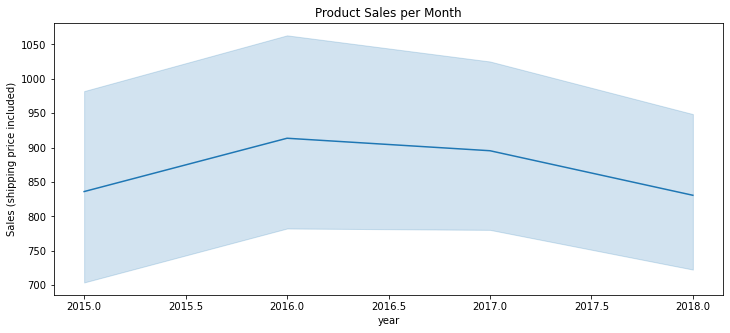

In [79]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Sales (shipping price included)',data =ds).set_title("Product Sales per Month")

Text(0.5, 1.0, 'Product shipping cost wrt Month')

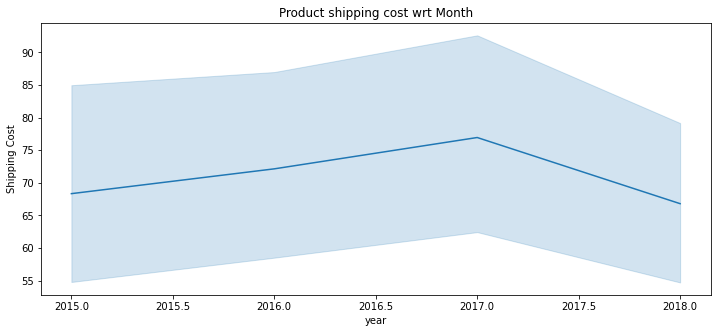

In [80]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Shipping Cost',data =ds).set_title("Product shipping cost wrt Month")

Text(0.5, 1.0, 'Product Discount wrt Month')

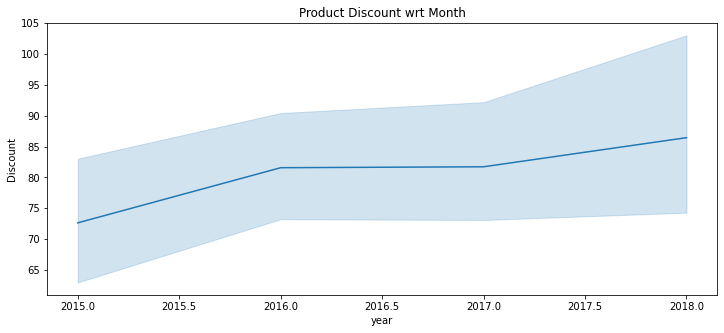

In [81]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Discount',data =ds).set_title("Product Discount wrt Month")

Text(0.5, 1.0, 'Product Operational/ Production Cost wrt Month')

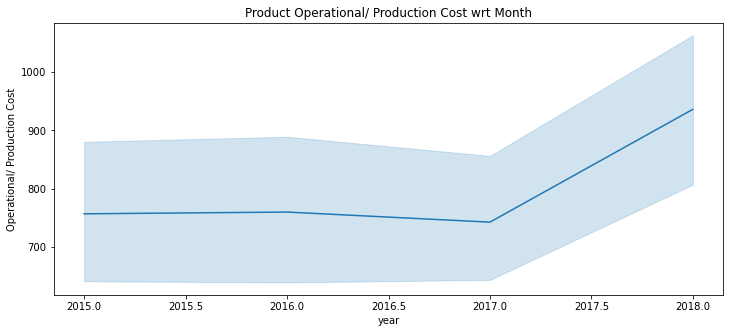

In [82]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Operational/ Production Cost',data =ds).set_title("Product Operational/ Production Cost wrt Month")

Text(0.5, 1.0, 'Product Selling Price wrt Month')

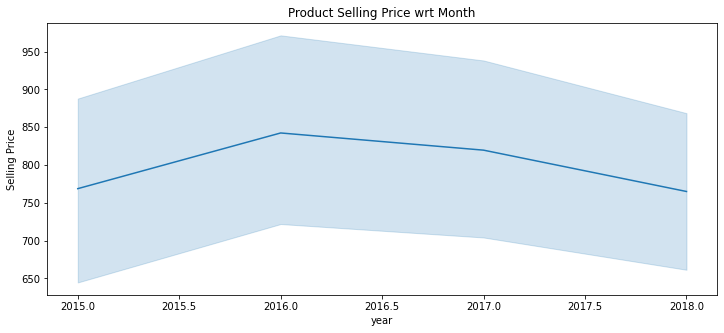

In [83]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Selling Price',data =ds).set_title("Product Selling Price wrt Month")

Text(0.5, 1.0, 'Product Shipping Cost wrt Month')

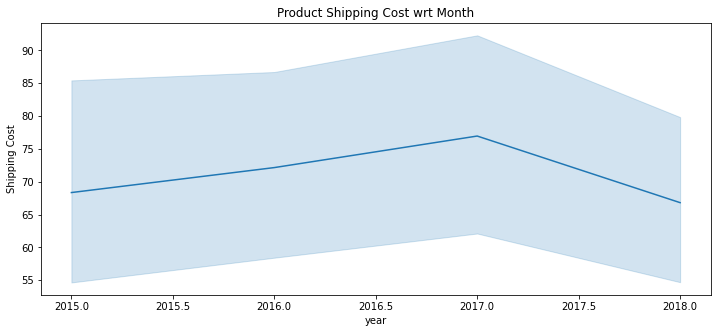

In [84]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",  y = 'Shipping Cost',data =ds).set_title("Product Shipping Cost wrt Month")

In [85]:
year_set = set(ds['year'])

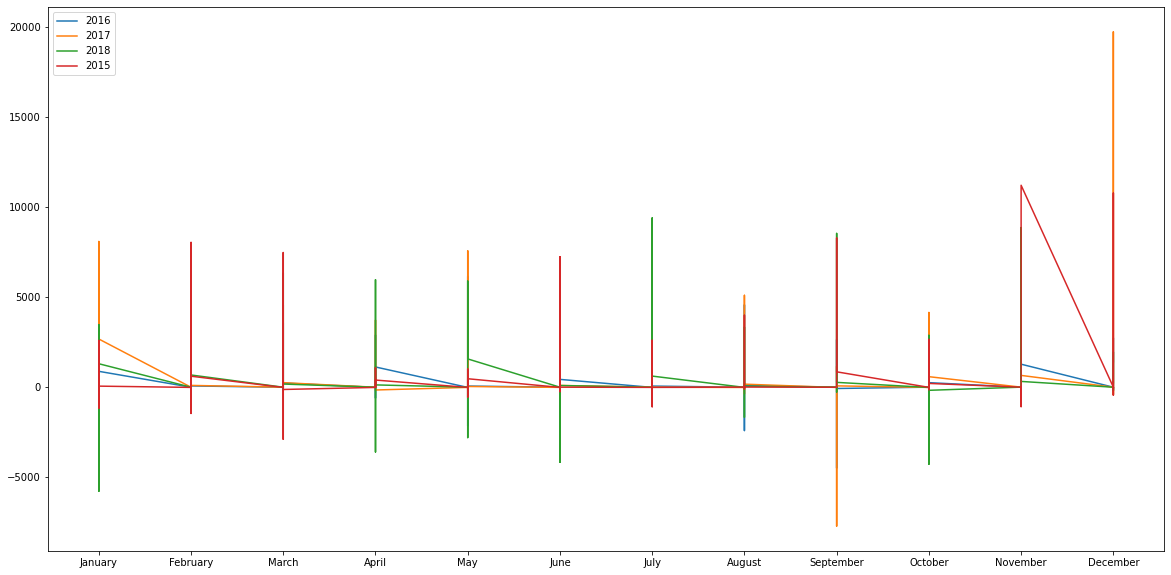

In [86]:
plt.figure(figsize=(20,10))
for year in year_set:
     selected_data = ds.loc[ds['year'] == year]
     plt.plot(selected_data['monthName'], selected_data['Profit'], label=year)
     
plt.legend()
plt.show()

#### l. Plot the skewness - All Numeric Variables 

In [87]:
ds.skew(axis = 1, skipna = True)

0       0.922636
1       2.634634
2       3.067149
3       2.636612
4       3.130609
          ...   
6423    2.803158
6424    1.368058
6425    2.596169
6426    1.045715
6427    0.059885
Length: 6428, dtype: float64

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


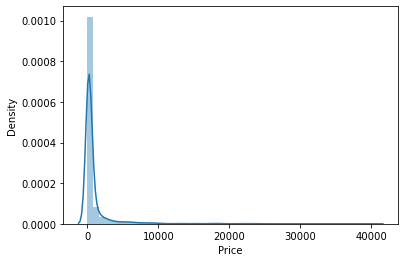

The skewness of this distribution is 6.753461493179549
The Median of this distribution 197.6716402 is greater than mean 876.5168009894962 of this distribution


In [88]:
sns.distplot(ds['Price'])
plt.show()
print('The skewness of this distribution is',ds['Price'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(ds.Price.median(),ds.Price.mean()))

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


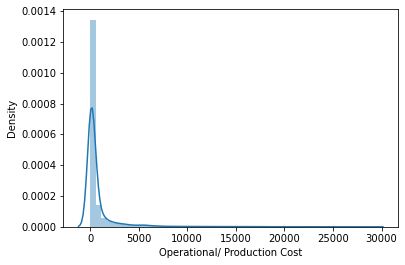

The skewness of this distribution is 5.793952720626479


In [89]:
sns.distplot(ds['Operational/ Production Cost'])
plt.show()
print('The skewness of this distribution is',ds['Operational/ Production Cost'].skew())

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


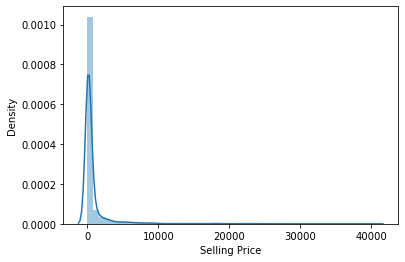

The skewness of this distribution is 6.883939016747458


In [90]:
sns.distplot(ds['Selling Price'])
plt.show()
print('The skewness of this distribution is',ds['Selling Price'].skew())

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


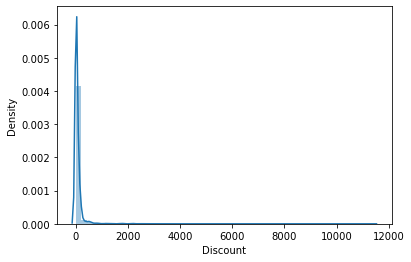

The skewness of this distribution is 20.303269343762853
The Median of this distribution 36.911764704999996 is greater than mean 81.22549091589579 of this distribution


In [91]:
sns.distplot(ds['Discount'])
plt.show()
print('The skewness of this distribution is',ds['Discount'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(ds.Discount.median(),ds.Discount.mean()))

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


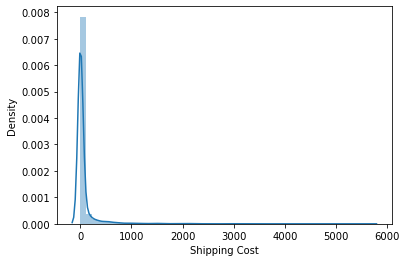

The skewness of this distribution is 8.540613965915657


In [92]:
sns.distplot(ds['Shipping Cost'])
plt.show()
print('The skewness of this distribution is',ds['Shipping Cost'].skew())

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


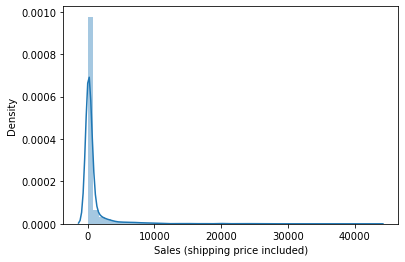

The skewness of this distribution is 6.80988226401001


In [93]:
sns.distplot(ds['Sales (shipping price included)'])
plt.show()
print('The skewness of this distribution is',ds['Sales (shipping price included)'].skew())

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


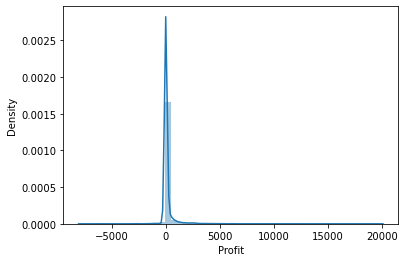

The skewness of this distribution is 8.937449716919835
The Median of this distribution 14.0 is greater than mean 137.1150944373054 of this distribution


In [94]:
sns.distplot(ds['Profit'])
plt.show()
print('The skewness of this distribution is',ds['Profit'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(ds.Profit.median(),ds.Profit.mean()))

In [95]:
ds.head(2)

Order Date Order Priority  Ship Type       City  State     Country  \
0 2015-01-02       Moderate  Named Day      Dhaka  Dhaka  Bangladesh   
1 2015-01-02       Moderate  Named Day  Yingcheng  Hubei       China   

         Region Segment Super Category             Category  ...  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  monthName  
0                       869.294118     4.0         1  2015      1    January  
1                       324.823529     3.0         1  2015      1    January  

[2 rows x 21 columns]

### 2. Do certain dates in a month generate more sales consistently? 

In [96]:

ds_so_desc= ds.sort_values('Sales (shipping price included)',ascending=False)

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly sales')

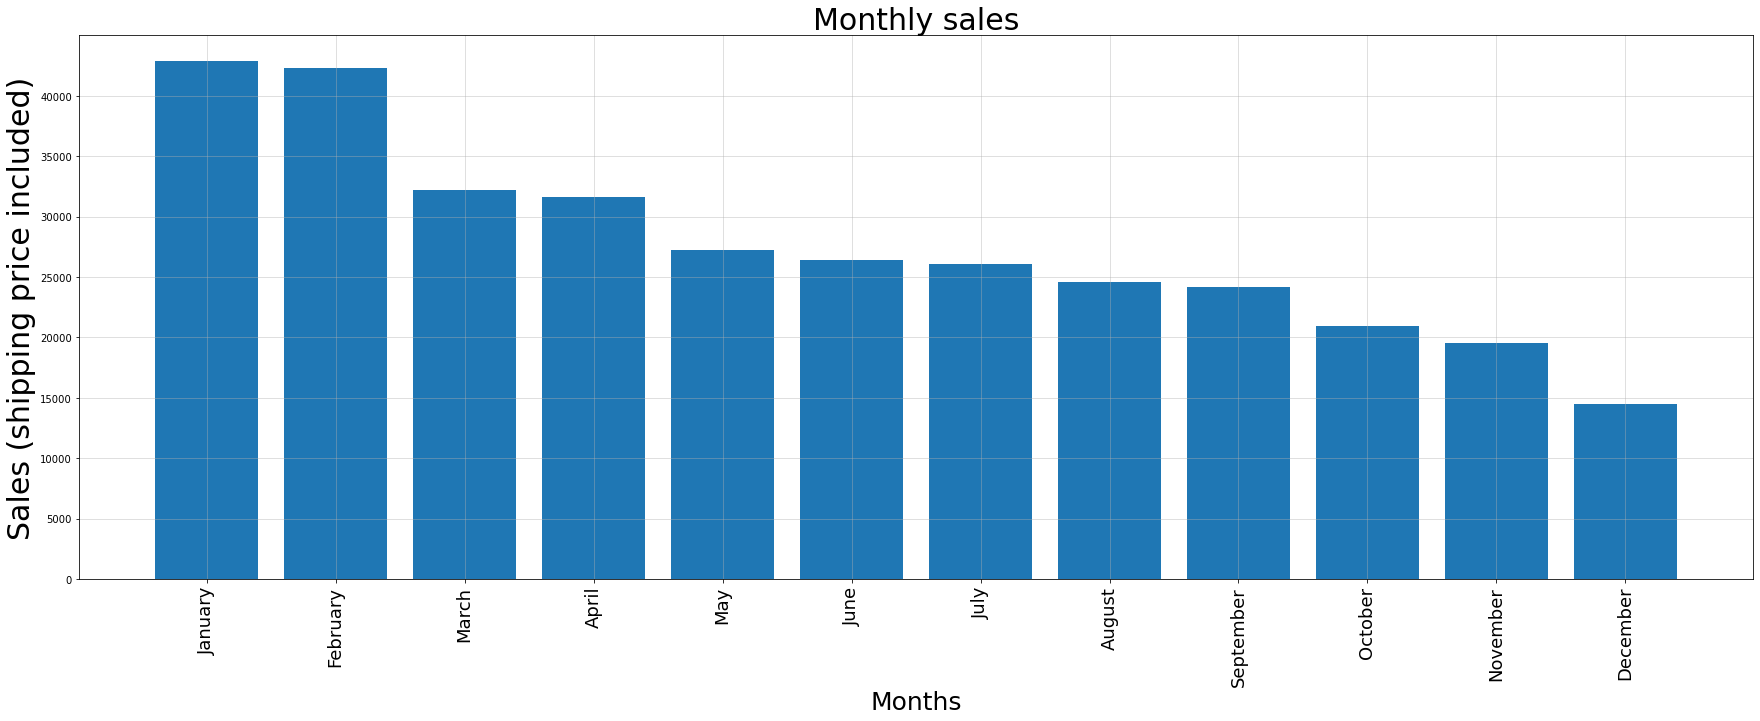

In [97]:
plt.figure(figsize=(30,10))
sns.countplot(ds['monthName'])
plt.xticks(fontsize=18,rotation=90)
plt.bar('monthName', 'Sales (shipping price included)',data=ds_so_desc)
plt.xlabel("Months", size=25)
plt.ylabel("Sales (shipping price included)", size=30)
plt.grid(alpha=0.5)
plt.title("Monthly sales", size=30)

### 3. Top 5 performing cities in terms of Sales 

In [98]:
cities_sales = ds.groupby(by=['City'], as_index=False)['Sales (shipping price included)'].sum()
print(cities_sales)

          City  Sales (shipping price included)
0         Agra                     65838.354066
1        Ajmer                     31224.676084
2        Akola                     13947.157229
3      Aligarh                     35485.179427
4    Allahabad                     37004.311096
..         ...                              ...
289     Zhuhai                       715.939535
290  Zhumadian                      7069.869159
291    Zhuzhou                      7128.005504
292     Zigong                     11636.084510
293      Zunyi                       580.166363

[294 rows x 2 columns]


In [99]:
cities_sales.sort_values(by='Sales (shipping price included)', ascending=False).head()

City  Sales (shipping price included)
197   Shanghai                    172090.212575
56       Dhaka                    165180.436842
54       Delhi                    160275.315473
219     Suzhou                    144554.442282
211  Singapore                    118592.295555

### 4. Top 5 performing cities in terms of Profit 

In [100]:
cities_profit = ds.groupby(by=['City'], as_index=False)['Profit'].sum()
print(cities_profit)

          City      Profit
0         Agra  10536.8193
1        Ajmer   4185.7800
2        Akola   3767.0111
3      Aligarh   3057.9628
4    Allahabad  11389.0087
..         ...         ...
289     Zhuhai     49.9127
290  Zhumadian   1191.4427
291    Zhuzhou    826.1816
292     Zigong   3381.0348
293      Zunyi     65.5264

[294 rows x 2 columns]


In [101]:
cities_profit.sort_values(by='Profit', ascending=False).head()

City      Profit
197   Shanghai  37981.6820
56       Dhaka  30605.2077
219     Suzhou  27468.5393
54       Delhi  25144.6974
67   Gorakhpur  22406.2398

### 5. Top 5 Performing Segments in terms of sales 

In [102]:
seg_sales = ds.groupby(by=['Segment'], as_index=False)['Sales (shipping price included)'].sum()
print(seg_sales)

      Segment  Sales (shipping price included)
0   Corporate                     1.372237e+06
1      Retail                     3.226431e+06
2  Whole Sale                     9.630521e+05


In [103]:
seg_sales.sort_values(by='Sales (shipping price included)', ascending=False).head()

Segment  Sales (shipping price included)
1      Retail                     3.226431e+06
0   Corporate                     1.372237e+06
2  Whole Sale                     9.630521e+05

In [104]:
# in dataset have only 3 segment so we cannot calculate top 5

### 6. What is the average profit across all categories? 

In [105]:
ds.head()

Order Date Order Priority  Ship Type       City      State     Country  \
0 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1 2015-01-02       Moderate  Named Day  Yingcheng      Hubei       China   
2 2015-01-02       Moderate  Named Day  Chongqing  Chongqing       China   
3 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category  ...  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   
2                    142.098039     145.098039   70.588235            0.0   
3                    318.823529     323.823529  204.411765            0.0   
4                     71.372549      76.372549   61.078431            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  monthName  
0                       869.294118     4.0         1  2015      1    January  
1                       324.823529     3.0         1  2015      1    January  
2                       145.098039     3.0         1  2015      1    January  
3                       323.823529     5.0         1  2015      1    January  
4                        77.372549     5.0         1  2015      1    January  

[5 rows x 21 columns]

In [106]:
ds_category = ds.groupby(['Category'])[['Profit']].mean()
ds_category

Profit
Category                                
 Accessories & Spare parts     15.900000
 Anklets                       18.000000
 Art Supplies                   5.000000
 Audio Players                 18.000000
 Baby & Kids Gifts              4.044118
...                                  ...
Paper                         229.571619
Phones                       1407.537967
Storage                       400.672715
Supplies                      157.109466
Tables                       -165.446543

[137 rows x 1 columns]

### 7. What is the average sales across all categories? 

In [107]:
ds_category = ds.groupby(['Category'])[['Sales (shipping price included)']].mean()
ds_category

Sales (shipping price included)
Category                                                    
 Accessories & Spare parts                        182.213445
 Anklets                                           78.333333
 Art Supplies                                     426.000000
 Audio Players                                    413.215686
 Baby & Kids Gifts                                187.270617
...                                                      ...
Paper                                            1027.044797
Phones                                           6705.253335
Storage                                          2358.587470
Supplies                                          921.198765
Tables                                           9956.892513

[137 rows x 1 columns]

In [108]:
ds.head()

Order Date Order Priority  Ship Type       City      State     Country  \
0 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1 2015-01-02       Moderate  Named Day  Yingcheng      Hubei       China   
2 2015-01-02       Moderate  Named Day  Chongqing  Chongqing       China   
3 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category  ...  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   
2                    142.098039     145.098039   70.588235            0.0   
3                    318.823529     323.823529  204.411765            0.0   
4                     71.372549      76.372549   61.078431            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  monthName  
0                       869.294118     4.0         1  2015      1    January  
1                       324.823529     3.0         1  2015      1    January  
2                       145.098039     3.0         1  2015      1    January  
3                       323.823529     5.0         1  2015      1    January  
4                        77.372549     5.0         1  2015      1    January  

[5 rows x 21 columns]

### 8. Which state provides more discount and what is the average sales trend of that state in the last 6 months?

In [109]:
ds.dtypes

Order Date                         datetime64[ns]
Order Priority                             object
Ship Type                                  object
City                                       object
State                                      object
Country                                    object
Region                                     object
Segment                                    object
Super Category                             object
Category                                   object
Price                                     float64
Operational/ Production Cost              float64
Selling Price                             float64
Discount                                  float64
Shipping Cost                             float64
Sales (shipping price included)           float64
Profit                                    float64
Quantity                                    int64
year                                        int64
month                                       int64


In [110]:
state_dis = ds.groupby(by=['State'], as_index=False)['Discount'].sum()
print(state_dis)

             State      Discount
0   Andhra Pradesh   5495.542157
1            Anhui  12054.855097
2            Assam   2526.128040
3      Baluchistan   1007.892745
4          Beijing   2659.707059
..             ...           ...
62         Western    584.509804
63  Xinjiang Uygur    449.019608
64          Yangon  13927.299475
65          Yunnan   4186.815098
66        Zhejiang  10016.371040

[67 rows x 2 columns]


In [111]:
state_dis.sort_values(by='Discount', ascending=False).head()

State      Discount
39    Maharashtra  36375.479903
16      Guangdong  35347.750646
56     Tamil Nadu  28658.779410
43         Punjab  28427.582508
59  Uttar Pradesh  22807.802157

In [112]:
ds['Order Date'] = pd.to_datetime(ds['Order Date'])

In [113]:
last6 = (ds['Order Date'] > '12-06-2018') & (ds['Order Date'] <= '12-12-2018')
  
# locate rows and access them using .loc() function
last6 = ds.loc[last6]

Text(0.5, 1.0, 'Trend of Sales in the last 12 months')

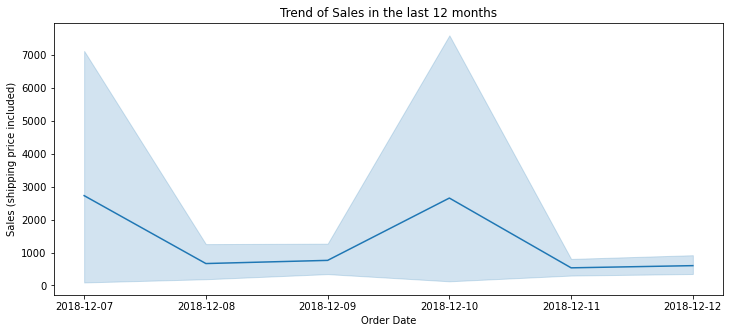

In [114]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Order Date",  y = 'Sales (shipping price included)',data =last6).set_title("Trend of Sales in the last 12 months")

### 9. Trend of Profit vs Sales in the last 12 months 

In [115]:
ds['Order Date'] = pd.to_datetime(ds['Order Date'])

In [116]:
newdf = (ds['Order Date'] > '01-01-2018') & (ds['Order Date'] <= '12-12-2018')
  
# locate rows and access them using .loc() function
newdf = ds.loc[newdf]

In [117]:
newdf.head()

Order Date Order Priority          Ship Type     City           State  \
4360 2018-01-03            Low  Standard Delivery  Asansol     West Bengal   
4361 2018-01-03            Low  Standard Delivery  Nantong         Jiangsu   
4362 2018-01-03            Low  Standard Delivery   Ratlam  Madhya Pradesh   
4363 2018-01-03            Low  Standard Delivery  Nantong         Jiangsu   
4364 2018-01-03            Low  Standard Delivery   Ratlam  Madhya Pradesh   

     Country        Region Segment          Super Category  \
4360   India  Central Asia  Retail              Computers    
4361   China    North Asia  Retail              Computers    
4362   India  Central Asia  Retail  Mobiles & Accessories    
4363   China    North Asia  Retail  Mobiles & Accessories    
4364   India  Central Asia  Retail  Mobiles & Accessories    

                  Category  ...  Operational/ Production Cost  Selling Price  \
4360   Laptop Accessories   ...                    119.156863     137.156863   
4361   Laptop Accessories   ...                    120.156863     137.156863   
4362   Mobile Accessories   ...                     42.725490      58.725490   
4363   Mobile Accessories   ...                     49.725490      63.725490   
4364   Mobile Accessories   ...                     65.235294      83.235294   

       Discount  Shipping Cost  Sales (shipping price included)  Profit  \
4360  68.529412            1.0                       138.156863    18.0   
4361  68.529412            1.0                       138.156863    17.0   
4362  58.725490            2.0                        60.725490    16.0   
4363  26.470588            0.0                        63.725490    14.0   
4364  14.607843            1.0                        84.235294    18.0   

      Quantity  year  month  monthName  
4360         1  2018      1    January  
4361         1  2018      1    January  
4362         1  2018      1    January  
4363         1  2018      1    January  
4364         1  2018      1    January  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Trend of Profit in the last 12 months')

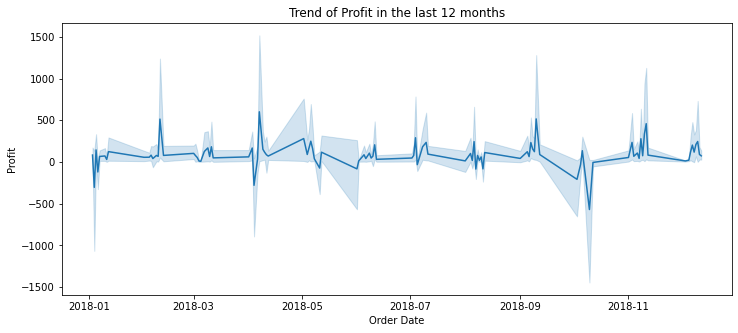

In [118]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Order Date",  y = 'Profit',data =newdf).set_title("Trend of Profit in the last 12 months")

Text(0.5, 1.0, 'Trend of Sales in the last 12 months')

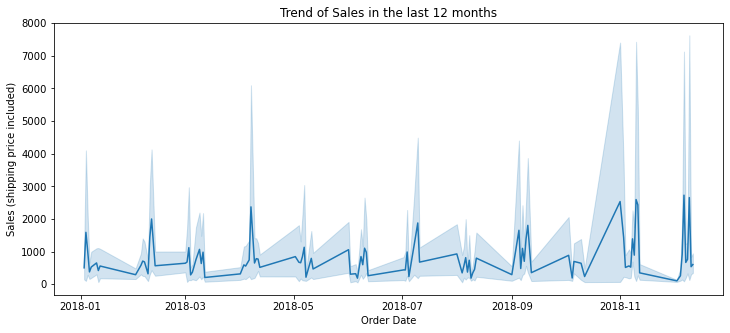

In [119]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Order Date",  y = 'Sales (shipping price included)',data =newdf).set_title("Trend of Sales in the last 12 months")

### 11. Best performing states in every region – Plot two charts for sales and profit 
 

In [120]:
ds_sort_desc= ds.sort_values('Sales (shipping price included)',ascending=False)

Text(0.5, 1.0, 'performing states in every region(Profit)')

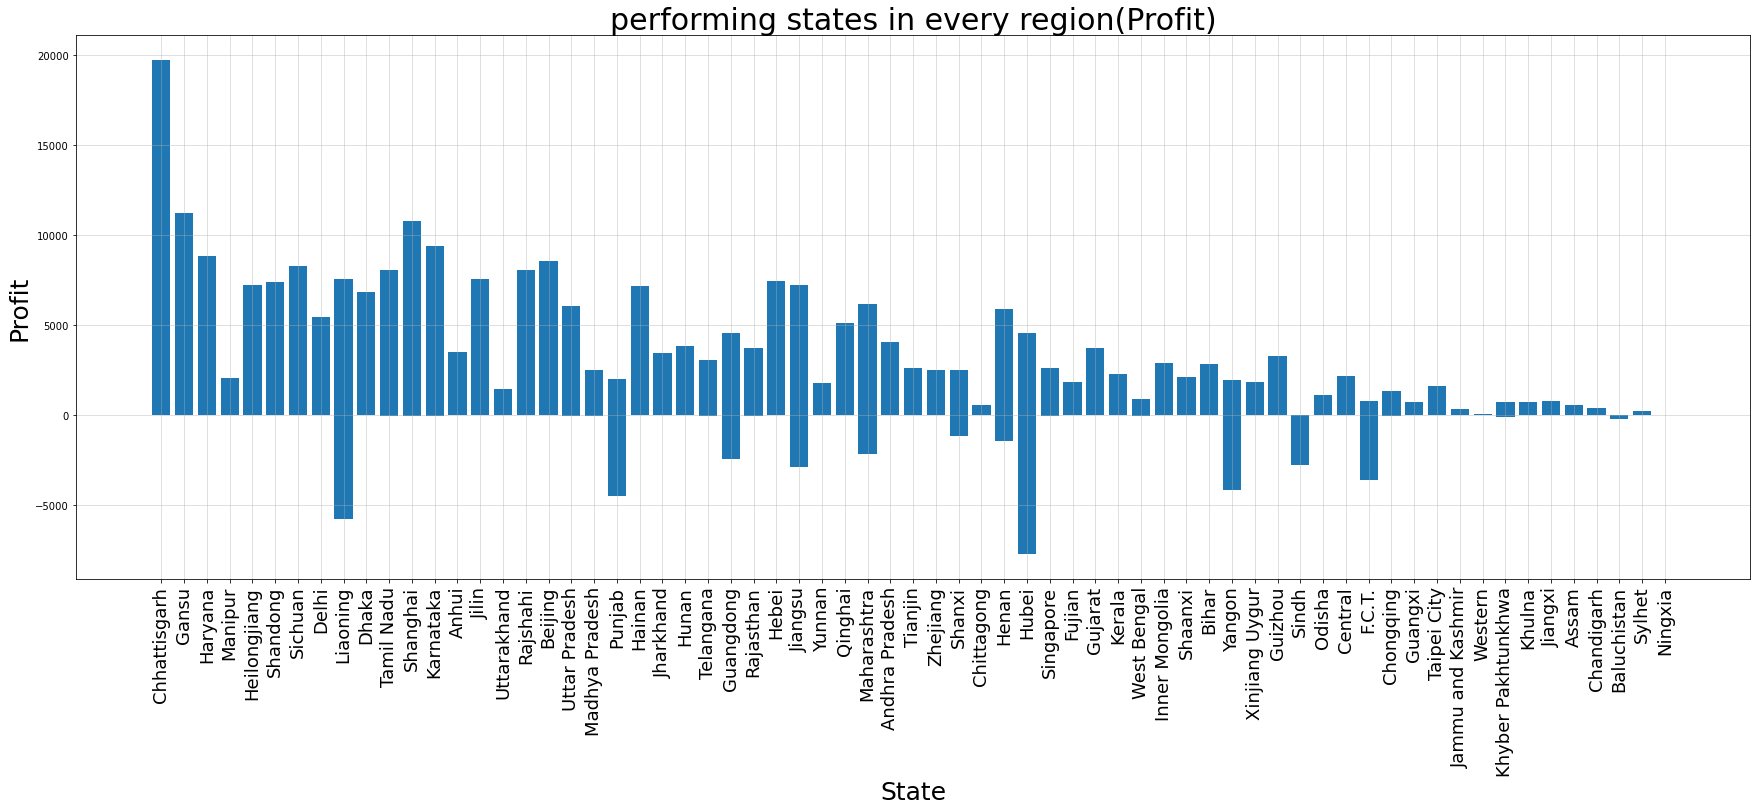

In [121]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18,rotation=90)
plt.bar('State', 'Profit',data=ds_sort_desc)
plt.xlabel("State", size=25)
plt.ylabel("Profit", size=25)
plt.grid(alpha=0.5)
plt.title("performing states in every region(Profit)", size=30)

In [122]:

ds_sorted_desc= ds.sort_values('Sales (shipping price included)',ascending=False)

Text(0.5, 1.0, 'performing states in every region(Sales (shipping price included))')

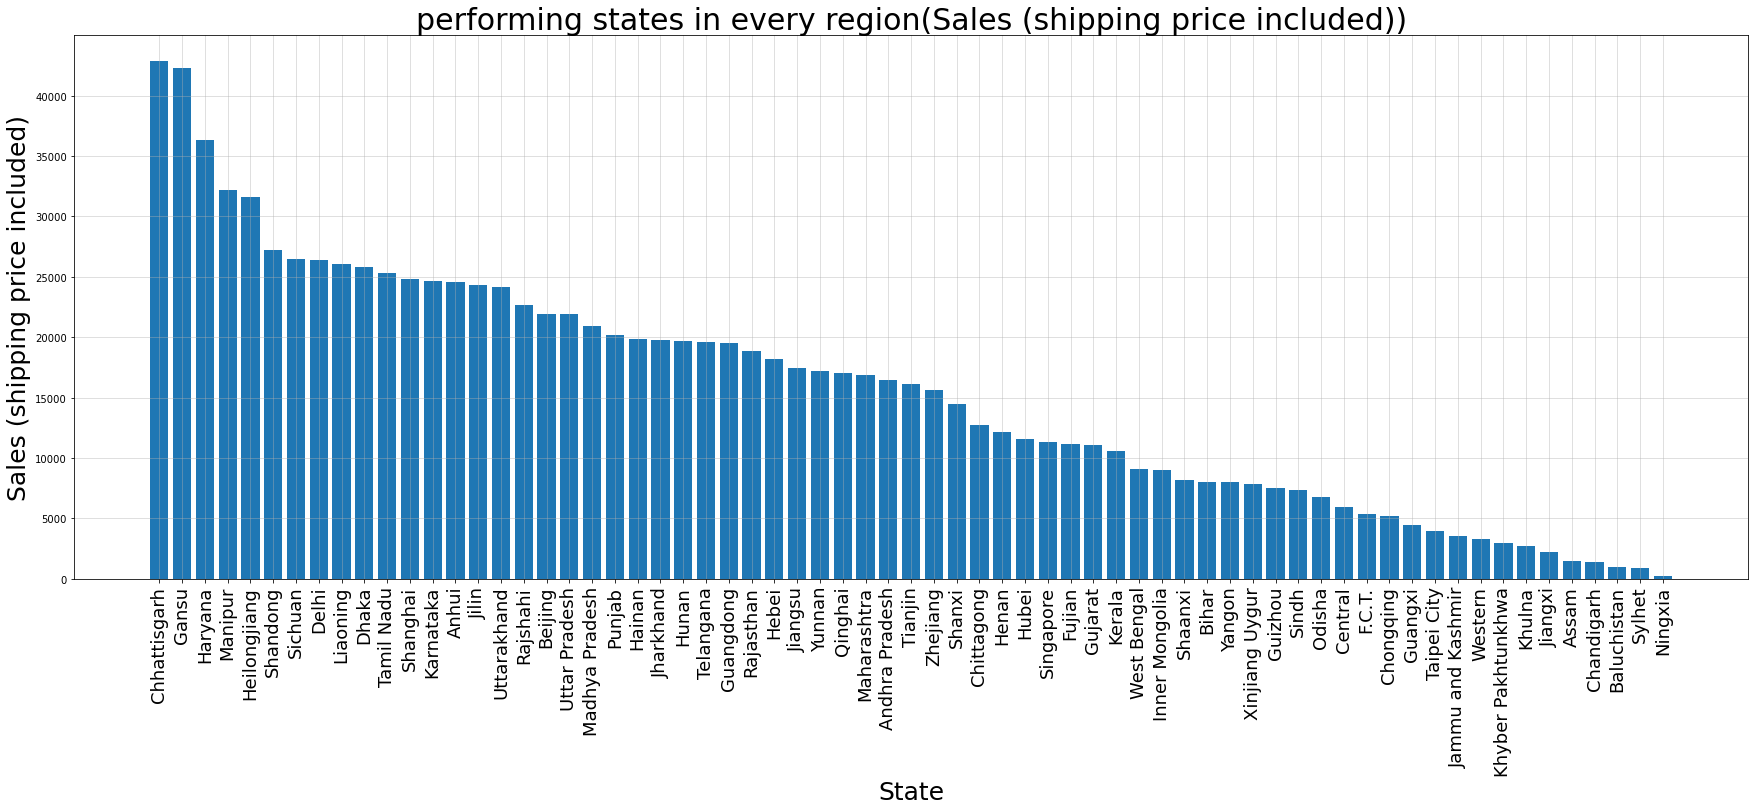

In [123]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18,rotation=90)
plt.bar('State', 'Sales (shipping price included)',data=ds_sorted_desc)
plt.xlabel("State", size=25)
plt.ylabel("Sales (shipping price included)", size=25)
plt.grid(alpha=0.5)
plt.title("performing states in every region(Sales (shipping price included))", size=30)

### 12. Does Shipping cost impact profit? 

In [124]:
ds.head()

Order Date Order Priority  Ship Type       City      State     Country  \
0 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
1 2015-01-02       Moderate  Named Day  Yingcheng      Hubei       China   
2 2015-01-02       Moderate  Named Day  Chongqing  Chongqing       China   
3 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   
4 2015-01-02       Moderate  Named Day      Dhaka      Dhaka  Bangladesh   

         Region Segment Super Category             Category  ...  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
2    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
3  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
4  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   
2                    142.098039     145.098039   70.588235            0.0   
3                    318.823529     323.823529  204.411765            0.0   
4                     71.372549      76.372549   61.078431            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  monthName  
0                       869.294118     4.0         1  2015      1    January  
1                       324.823529     3.0         1  2015      1    January  
2                       145.098039     3.0         1  2015      1    January  
3                       323.823529     5.0         1  2015      1    January  
4                        77.372549     5.0         1  2015      1    January  

[5 rows x 21 columns]

In [152]:
Profit_sum = ds['Profit'].sum()

In [153]:
Profit_sum

881375.827043

In [155]:
pro=ds['Profit']
proship=ds['Shipping Cost']

In [158]:
from scipy import stats

t_value,p_value=stats.ttest_rel(pro,proship)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that the Shipping cost impact profit. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the Shipping cost Does not impact profit. i.e., d = 0 at %.2f level of significance.'''%alpha)


Test statistic is 9.479531
p-value for one_tailed_test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 

So we conclude that the Shipping cost impact profit. i.e., d = 0 at 0.05 level of significance.


### 13. What are the categories with higher MRP and what is the profit ratio for the same? 

In [136]:
ds.head(2)

Order Date Order Priority  Ship Type       City  State     Country  \
0 2015-01-02       Moderate  Named Day      Dhaka  Dhaka  Bangladesh   
1 2015-01-02       Moderate  Named Day  Yingcheng  Hubei       China   

         Region Segment Super Category             Category  ...  \
0  Central Asia  Retail     Baby Care    Baby & Kids Gifts   ...   
1    North Asia  Retail     Baby Care    Baby & Kids Gifts   ...   

   Operational/ Production Cost  Selling Price    Discount  Shipping Cost  \
0                    866.294118     870.294118  334.705882           -1.0   
1                    320.823529     323.823529  204.411765            1.0   

   Sales (shipping price included)  Profit  Quantity  year  month  monthName  
0                       869.294118     4.0         1  2015      1    January  
1                       324.823529     3.0         1  2015      1    January  

[2 rows x 21 columns]

In [137]:
ds_s= ds.sort_values('Price',ascending=False)

Text(0.5, 1.0, 'Category')

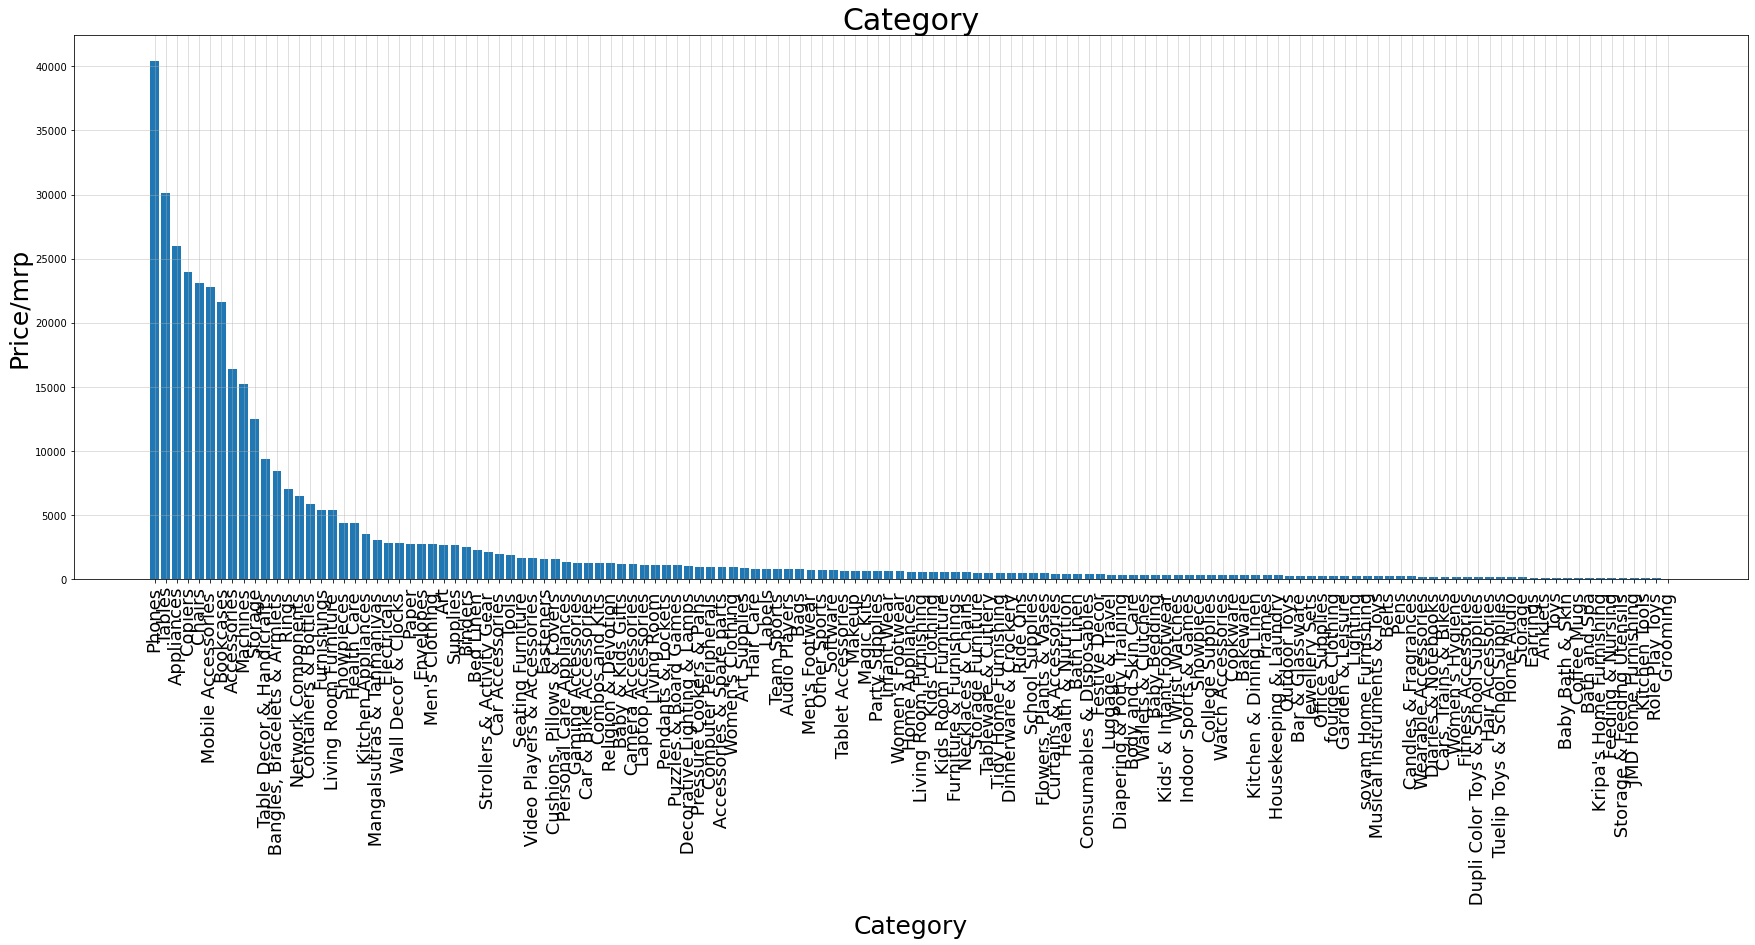

In [138]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18,rotation=90)
plt.bar('Category', 'Price',data=ds_s)
plt.xlabel("Category", size=25)
plt.ylabel("Price/mrp", size=25)
plt.grid(alpha=0.5)
plt.title("Category", size=30)

In [139]:
cmrp = ds.groupby(by=['Category'], as_index=False)['Price'].sum()
print(cities_sales)

          City  Sales (shipping price included)
0         Agra                     65838.354066
1        Ajmer                     31224.676084
2        Akola                     13947.157229
3      Aligarh                     35485.179427
4    Allahabad                     37004.311096
..         ...                              ...
289     Zhuhai                       715.939535
290  Zhumadian                      7069.869159
291    Zhuzhou                      7128.005504
292     Zigong                     11636.084510
293      Zunyi                       580.166363

[294 rows x 2 columns]


In [140]:
cmrp.sort_values(by='Price', ascending=False).head()

Category          Price
126    Copiers  659586.375276
133     Phones  641412.273110
125     Chairs  582506.306574
124  Bookcases  562171.439204
131   Machines  286333.509350

In [141]:
ds1=ds0=ds[["Shipping Cost","Profit","Sales (shipping price included)","Discount"]]

In [142]:
ds1.head(2)

Shipping Cost  Profit  Sales (shipping price included)    Discount
0           -1.0     4.0                       869.294118  334.705882
1            1.0     3.0                       324.823529  204.411765

In [143]:
ds1['Total expencess']=ds1['Discount']+ds1['Shipping Cost']

<ipython-input-143-127bbf4bb48c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['Total expencess']=ds1['Discount']+ds1['Shipping Cost']


In [144]:
# here total revenue = Sales (shipping price included)

In [145]:
ds1['Profit Ratio']=ds1['Sales (shipping price included)']-ds1['Total expencess']/ds1['Sales (shipping price included)']

<ipython-input-145-33f781e68c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['Profit Ratio']=ds1['Sales (shipping price included)']-ds1['Total expencess']/ds1['Sales (shipping price included)']


In [146]:
ds1.head()

Shipping Cost  Profit  Sales (shipping price included)    Discount  \
0           -1.0     4.0                       869.294118  334.705882   
1            1.0     3.0                       324.823529  204.411765   
2            0.0     3.0                       145.098039   70.588235   
3            0.0     5.0                       323.823529  204.411765   
4            1.0     5.0                        77.372549   61.078431   

   Total expencess  Profit Ratio  
0       333.705882    868.910236  
1       205.411765    324.191150  
2        70.588235    144.611553  
3       204.411765    323.192285  
4        62.078431     76.570218